# The Transient Universe: part 2

In [1]:
import numpy as np
from scipy import stats, interpolate
import scipy.stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import optimize
from scipy.optimize import curve_fit
import emcee
import dynesty

plt.rcParams['figure.figsize'] = [4, 4]

#### Data Catalogue
We have access to a catalouge containing some time-series measurements from a transient phenomenon. It's shaped in an (100x3) array. The first column is time (arbitrary units), the second column is the flux (arbitrary units), and the third column are homoescedastic measurement uncertainties on the flux.

Text(0.5, 1.0, 'Transient phenomenas')

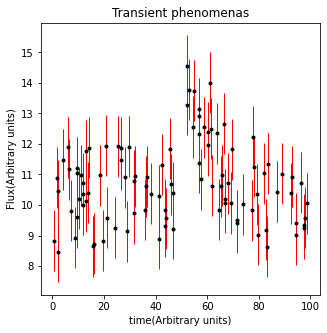

In [2]:
# Define the dimensionality of our problem.

x = np.load('../../solutions/transient.npy')
time = x[:,0]
flux = x[:,1]
d_flux = x[:,2]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.errorbar(time, flux, d_flux, fmt='.k', lw=1, ecolor='red')
ax.set_xlabel('time(Arbitrary units)')
ax.set_ylabel('Flux(Arbitrary units)')
ax.set_title('Transient phenomenas')

#### defining values for our problem

In [3]:
ndim = 4 #b,A,to,alpha

t0min,t0max = 0,100
Amin,Amax=0,50
bmin,bmax=0,50
alphamin,alphamax=np.exp(-5),np.exp(5)

#### defining the two models we use to describe our data

In [4]:
def burst(t, par):
    b, A, to, alpha  = par
    return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

def gaussian(t,par):
    b, A, to, sigma  = par
    return  b+A*np.exp(-(((t-to)/sigma)**2)/2)

## Nested sampling for burst model

In [5]:
def loglike_burst(par, time):
    y = burst(time, par)
    L = -0.5*np.sum((flux-y)**2 / d_flux**2)
    
    if not np.isfinite(L):
        L = -1e300
    
    return L
 
# Define our uniform prior.
def ptform_burst(u):
    
    x = np.array(u)  # copy u, u belongs to the hypercube [0,1]

    x[0] = scipy.stats.uniform(loc=Amin,scale=Amax-Amin).ppf(u[0])
    x[1] = scipy.stats.uniform(loc=bmin,scale=bmax-bmin).ppf(u[1])
    x[2] = scipy.stats.uniform(loc=t0min,scale=t0max-t0min).ppf(u[2])
    x[3] = scipy.stats.loguniform.ppf(u[3],alphamin,alphamax)

    return x

In [6]:
# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike_burst, ptform_burst, ndim, logl_args=[time], nlive=300) #nlive = 250 by default
sampler.run_nested()
sresults = sampler.results

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
1115it [00:34,  9.18it/s, bound: 0 | nc: 74 | ncall: 11143 | eff(%): 10.006 | loglstar:   -inf < -170.591 <    inf | logz: -179.163 +/-  0.159 | dlogz: 93.257 >  0.309]    C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
1125it [00:34, 15.07it/s, bound: 1 | nc: 2 | ncall: 11270 | eff(%):  9.982 | loglstar:   -inf < -164.257 <    inf | logz: -173.039 +/-  0.161 | dlogz: 87.140 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.ex

1771it [00:56, 16.92it/s, bound: 13 | nc: 8 | ncall: 16697 | eff(%): 10.607 | loglstar:   -inf < -89.192 <    inf | logz: -96.467 +/-  0.147 | dlogz: 28.981 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
1832it [00:58, 30.94it/s, bound: 14 | nc: 1 | ncall: 17098 | eff(%): 10.715 | loglstar:   -inf < -88.390 <    inf | logz: -95.694 +/-  0.146 | dlogz: 28.003 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
1878it [00:59, 25.56it/s, bound: 14 | nc: 7 | ncall: 17524 | eff(%): 10.717 | loglstar:   -inf < -88.074 <    inf | logz: -95.239 +/-  0.145 | dlogz: 27.39

2076it [01:25,  2.60it/s, bound: 27 | nc: 191 | ncall: 22970 | eff(%):  9.038 | loglstar:   -inf < -87.292 <    inf | logz: -94.176 +/-  0.143 | dlogz: 34.125 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2090it [01:26,  7.94it/s, bound: 27 | nc: 51 | ncall: 23340 | eff(%):  8.955 | loglstar:   -inf < -87.262 <    inf | logz: -94.132 +/-  0.143 | dlogz: 34.035 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2091it [01:27,  5.79it/s, bound: 28 | nc: 65 | ncall: 23405 | eff(%):  8.934 | loglstar:   -inf < -87.261 <    inf | logz: -94.129 +/-  0.143 | dlogz: 34.028 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-a

2262it [01:55,  1.19it/s, bound: 41 | nc: 275 | ncall: 29538 | eff(%):  7.658 | loglstar:   -inf < -87.103 <    inf | logz: -93.769 +/-  0.141 | dlogz: 33.098 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2263it [01:56,  1.24it/s, bound: 42 | nc: 160 | ncall: 29698 | eff(%):  7.620 | loglstar:   -inf < -87.102 <    inf | logz: -93.768 +/-  0.141 | dlogz: 33.093 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2265it [01:57,  1.40it/s, bound: 42 | nc: 31 | ncall: 30024 | eff(%):  7.544 | loglstar:   -inf < -87.102 <    inf | logz: -93.765 +/-  0.141 | dlogz: 33.083 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha

2321it [02:29,  1.24it/s, bound: 56 | nc: 217 | ncall: 36415 | eff(%):  6.374 | loglstar:   -inf < -87.091 <    inf | logz: -93.696 +/-  0.141 | dlogz: 32.828 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2325it [02:31,  1.98it/s, bound: 57 | nc: 54 | ncall: 36844 | eff(%):  6.310 | loglstar:   -inf < -87.091 <    inf | logz: -93.692 +/-  0.141 | dlogz: 32.810 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2326it [02:31,  2.07it/s, bound: 58 | nc: 70 | ncall: 36914 | eff(%):  6.301 | loglstar:   -inf < -87.091 <    inf | logz: -93.691 +/-  0.141 | dlogz: 32.806 

2383it [02:56,  3.40it/s, bound: 71 | nc: 114 | ncall: 43120 | eff(%):  5.526 | loglstar:   -inf < -86.978 <    inf | logz: -93.636 +/-  0.141 | dlogz: 34.622 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2391it [02:58,  4.67it/s, bound: 72 | nc: 33 | ncall: 43629 | eff(%):  5.480 | loglstar:   -inf < -86.935 <    inf | logz: -93.628 +/-  0.141 | dlogz: 34.588 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-a

2423it [03:24,  1.37it/s, bound: 85 | nc: 141 | ncall: 49415 | eff(%):  4.903 | loglstar:   -inf < -86.650 <    inf | logz: -93.596 +/-  0.141 | dlogz: 34.450 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2429it [03:26,  2.46it/s, bound: 87 | nc: 16 | ncall: 49945 | eff(%):  4.863 | loglstar:   -inf < -86.581 <    inf | logz: -93.590 +/-  0.141 | dlogz: 34.423 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-a

2560it [03:51,  7.31it/s, bound: 100 | nc: 55 | ncall: 56208 | eff(%):  4.555 | loglstar:   -inf < -84.076 <    inf | logz: -93.269 +/-  0.145 | dlogz: 34.705 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2563it [03:53,  2.98it/s, bound: 101 | nc: 212 | ncall: 56570 | eff(%):  4.531 | loglstar:   -inf < -83.931 <    inf | logz: -93.248 +/-  0.145 | dlogz: 34.675 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(

2743it [04:15,  9.38it/s, bound: 115 | nc: 43 | ncall: 62912 | eff(%):  4.360 | loglstar:   -inf < -78.718 <    inf | logz: -90.095 +/-  0.181 | dlogz: 31.333 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2745it [04:16,  6.51it/s, bound: 116 | nc: 84 | ncall: 63049 | eff(%):  4.354 | loglstar:   -inf < -78.698 <    inf | logz: -90.034 +/-  0.181 | dlogz: 31.264 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
2750it [04:17,  5.47it/s, bound: 116 | nc: 66 | ncall: 63409 | eff(%):  4.337 | loglstar:   -inf < -78.539 <    inf | logz: -89.887 +/-  0.181 | dlogz: 31.100 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alph

#### Now we plot a summary of the run

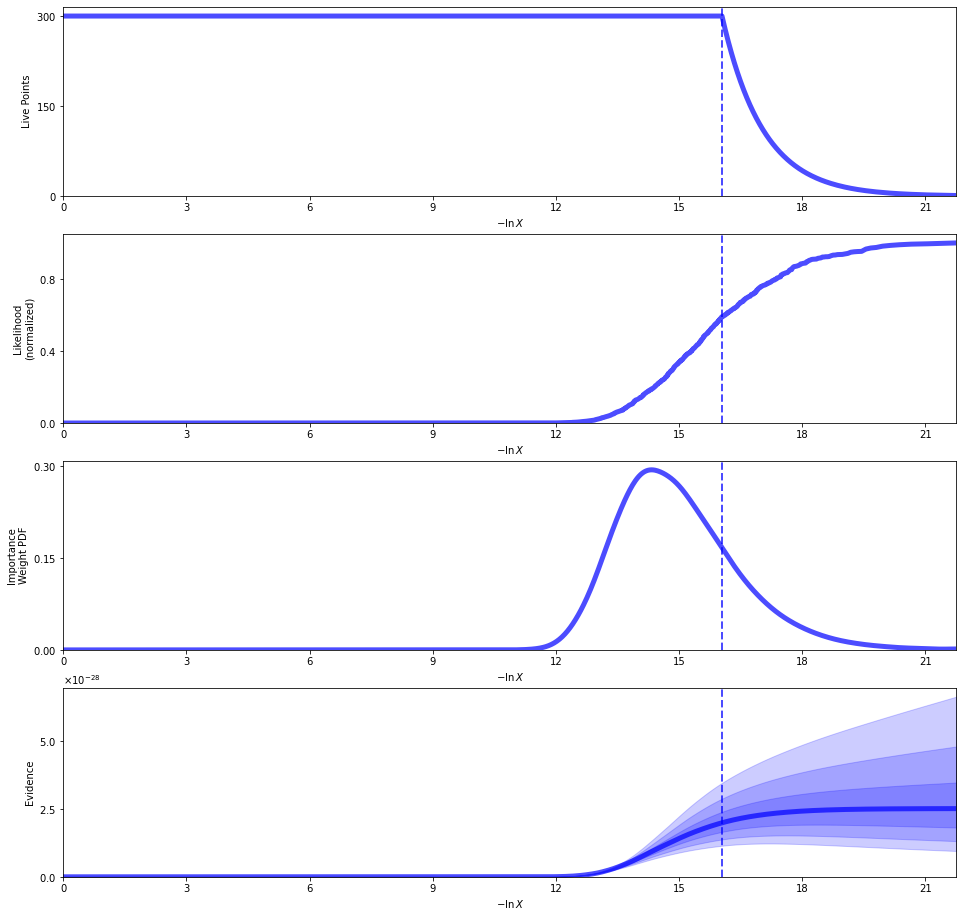

In [7]:
plt.rcParams['figure.figsize'] = [2, 2]
from dynesty import plotting as dyplot
rfig, raxes = dyplot.runplot(sresults)

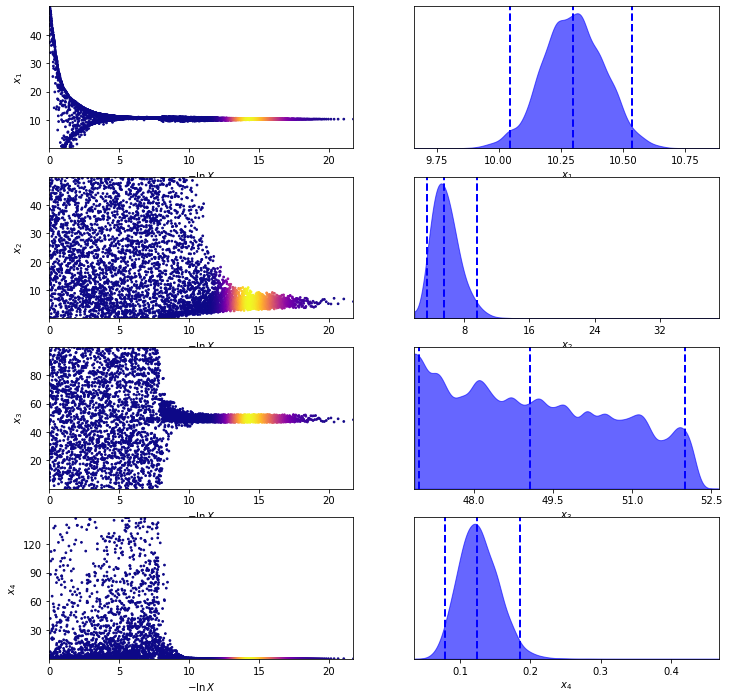

In [8]:
tfig, taxes = dyplot.traceplot(sresults)

Text(0.5, 1.04, 'Corner plot 4-D parameter space')

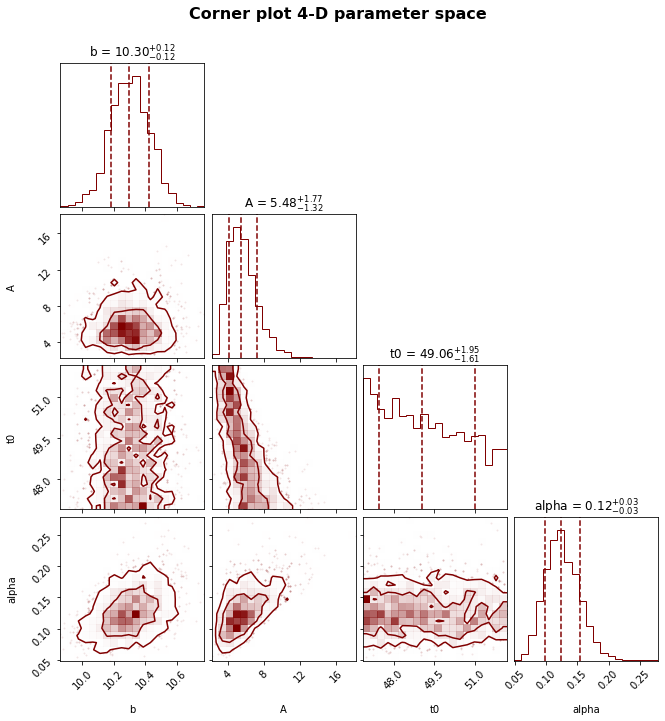

In [9]:
from dynesty import utils as dyfunc
import corner

samples = sresults.samples  # samples
weights = np.exp(sresults.logwt - sresults.logz[-1])  # normalized weights

labels = ["b","A","t0","alpha"]

samples_equal = dyfunc.resample_equal(samples, weights)

fig = corner.corner(samples_equal, labels=labels, levels=[0.68,0.95], quantiles =[0.16,0.5,0.84], show_titles= True, color = 'maroon');
fig.suptitle('Corner plot 4-D parameter space', fontsize = 16, fontweight="bold",  y=1.04)

In [10]:
evidence = sresults.logz[-1] #evidence
print("Bayesian evidence", np.exp(evidence))

# Compute 16%-84% quantiles.
quantiles = [dyfunc.quantile(samps, [0.16, 0.84], weights=weights) for samps in samples.T]
print("16%-84% quantiles ")
for i,j in zip(np.arange(0,4,1), labels):
    print(j + ": " + str(quantiles[i]) + '\n')

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)
print('Mean and covariance of parameters are: ' + str(mean) + '\n' + str(cov))


Bayesian evidence 2.504554070538903e-28
16%-84% quantiles 
b: [10.179085695317994, 10.421774581570867]

A: [4.157701247357382, 7.270062157510175]

t0: [47.4492267318109, 51.01873517214654]

alpha: [0.09900303256333058, 0.1537117120355813]

Mean and covariance of parameters are: [10.29940387  5.73727404 49.1961687   0.12650346]
[[ 1.50797981e-02  4.75602803e-03  3.97324697e-03  1.28394918e-03]
 [ 4.75602803e-03  2.73972802e+00 -1.70785368e+00  2.58112185e-02]
 [ 3.97324697e-03 -1.70785368e+00  2.30974388e+00 -6.77347005e-04]
 [ 1.28394918e-03  2.58112185e-02 -6.77347005e-04  7.82511559e-04]]


In [11]:
sresults.summary()

Summary
nlive: 300
niter: 4821
ncall: 81125
eff(%):  6.312
logz: -63.554 +/-  0.324


## Gaussian Model

In [12]:
sigmamin,sigmamax=np.exp(-2),np.exp(2)


def loglike_gaussian(par, time):
    y = gaussian(time, par)
    L = -0.5*np.sum((flux-y)**2 / d_flux**2)
    
    if not np.isfinite(L):
        L = -1e300
    
    return L
 
# Define our uniform prior.
def ptform_gaussian(u):
    
    x = np.array(u)  # copy u, u belongs to the hypercube [0,1]

    x[0] = scipy.stats.uniform(loc=Amin,scale=Amax-Amin).ppf(u[0])
    x[1] = scipy.stats.uniform(loc=bmin,scale=bmax-bmin).ppf(u[1])
    x[2] = scipy.stats.uniform(loc=t0min,scale=t0max-t0min).ppf(u[2])
    x[3] = scipy.stats.loguniform.ppf(u[3],sigmamin,sigmamax)

    return x

In [13]:
# "Static" nested sampling.
sampler_gaussian = dynesty.NestedSampler(loglike_gaussian, ptform_gaussian, ndim, logl_args=[time], nlive=300) #nlive = 250 by default
sampler_gaussian.run_nested()
sresults_gaussian = sampler_gaussian.results

2391it [03:07,  1.29it/s, bound: 99 | nc: 198 | ncall: 54761 | eff(%):  4.366 | loglstar:   -inf < -86.430 <    inf | logz: -94.208 +/-  0.148 | dlogz: 32.762 >  0.309]    C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2754it [03:57,  4.68it/s, bound: 131 | nc: 46 | ncall: 69255 | eff(%):  3.977 | loglstar:   -inf < -76.934 <    inf | logz: -88.046 +/-  0.183 | dlogz: 25.412 >  0.309]  C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are

#### Now we plot a summary of the run

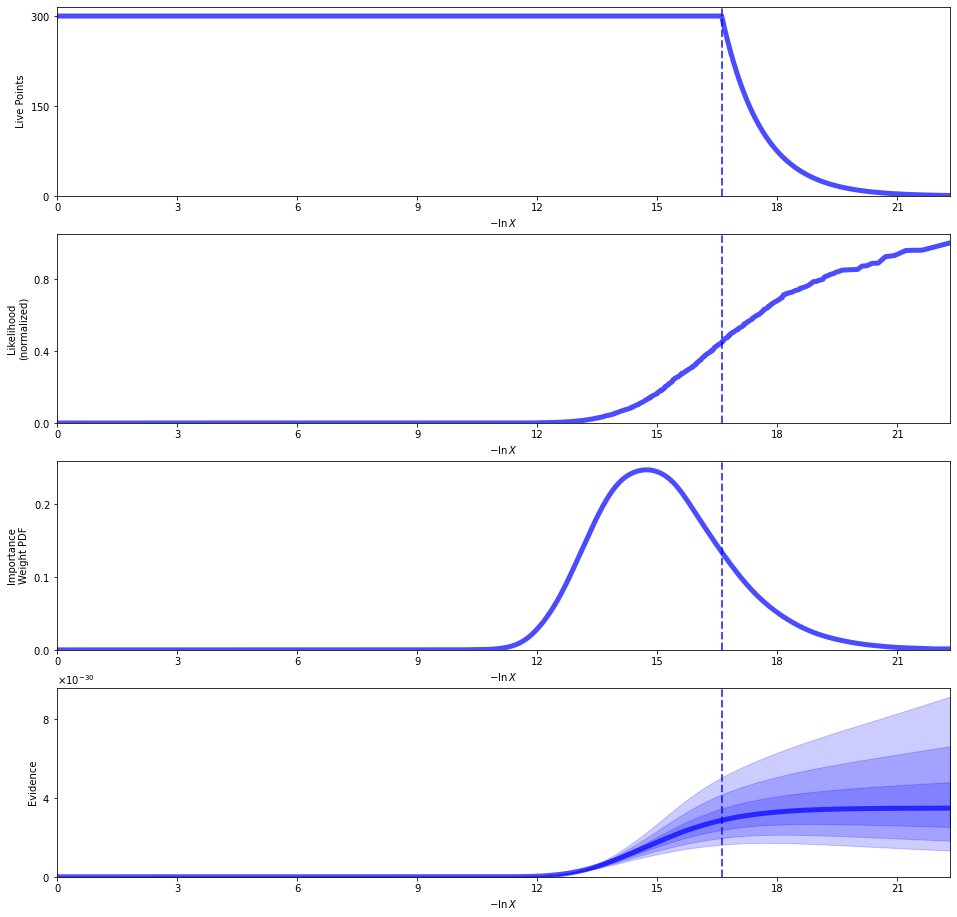

In [14]:
plt.rcParams['figure.figsize'] = [2, 2]
rfig, raxes = dyplot.runplot(sresults_gaussian)

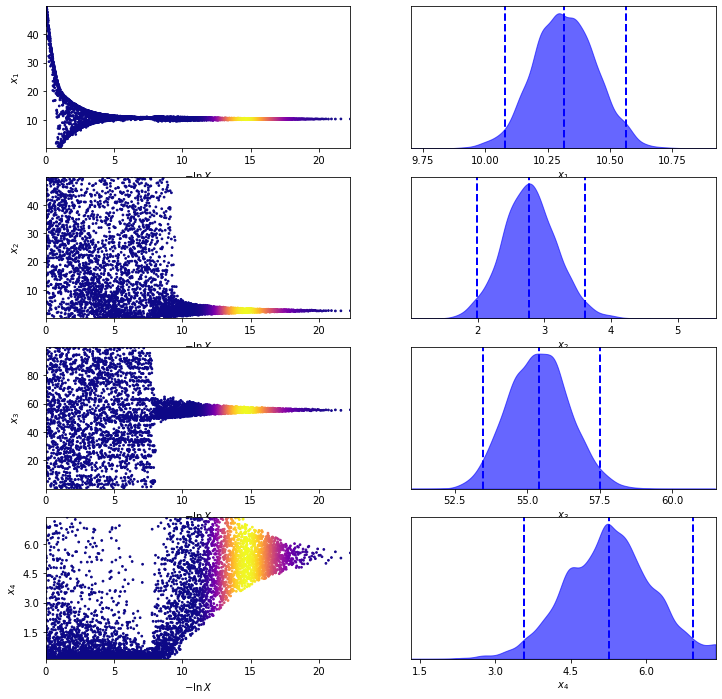

In [15]:
tfig, taxes = dyplot.traceplot(sresults_gaussian)

Text(0.5, 1.04, 'Corner plot 4-D parameter space')

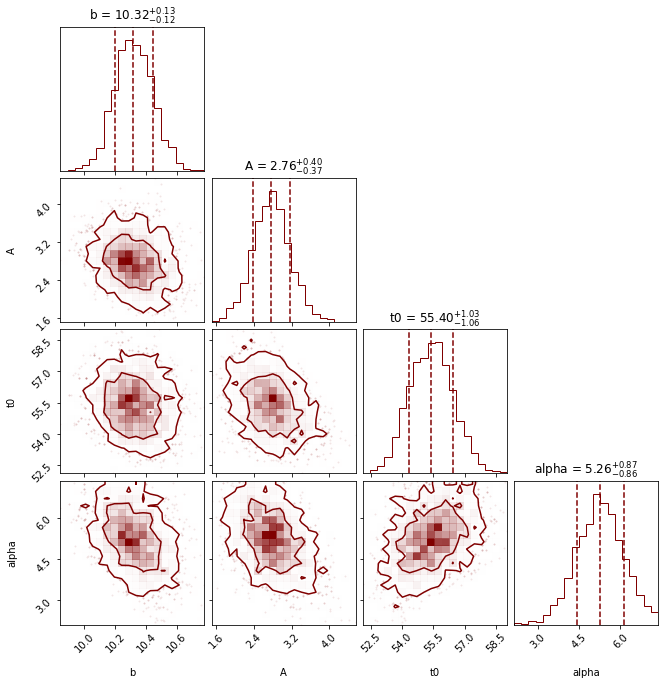

In [16]:
samples_gaussian = sresults_gaussian.samples  # samples
weights_gaussian = np.exp(sresults_gaussian.logwt - sresults_gaussian.logz[-1])  # normalized weights

labels = ["b","A","t0","alpha"]

samples_gaussian_equal = dyfunc.resample_equal(samples_gaussian, weights_gaussian)


ig = corner.corner(samples_gaussian_equal, labels=labels, levels=[0.68,0.95], quantiles =[0.16,0.5,0.84], show_titles= True, color = 'maroon');
fig.suptitle('Corner plot 4-D parameter space', fontsize = 16, fontweight="bold",  y=1.04)

In [17]:
evidence_gaussian = sresults_gaussian.logz[-1] #evidence
print("Bayesian evidence", np.exp(evidence_gaussian))

# Compute 16%-84% quantiles.
#quantiles = [dyfunc.quantile(samps, [0.16, 0.84], weights=weights_gaussian) for samps in samples.T]
#for i,j in zip(np.arange(0,4,1), labels):
#    print(j + ": " + str(quantiles[i]) + '\n')

# Compute weighted mean and covariance.
mean_gaussian, cov_gaussian = dyfunc.mean_and_cov(samples_gaussian, weights_gaussian)
print('Mean and covariance of parameters are: ' + str(mean_gaussian) + '\n' + str(cov_gaussian))


Bayesian evidence 3.476944981849304e-30
Mean and covariance of parameters are: [10.31841     2.77790771 55.39914052  5.24505264]
[[ 0.01551412 -0.01171412 -0.01912128 -0.04058549]
 [-0.01171412  0.16293018 -0.14638149 -0.13640483]
 [-0.01912128 -0.14638149  1.07711089  0.32068955]
 [-0.04058549 -0.13640483  0.32068955  0.73027053]]


## Model Comparison

To compare the two models, burst and gaussian, we relay on the computation of the Odds Ratio:

$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} $$

where $M_{1}$ is the burst model and $M_{2}$ is the gaussian model.

Supposing equal hyperpriors, we can just take the ratio between the two evidences $Z_{1}$ and $Z_{2}$.

In [18]:
O = np.exp(sresults.logz[-1])/np.exp(sresults_gaussian.logz[-1])
print("The Odds ratio is: %.3f" %O)

The Odds ratio is: 72.033


Using the Jeffrey's scale to convert the results in a qualitative phrase we can say there is a "very strong" evidence in favour of the burst model

## Robustness of the Odds Ratio 

let's variate the number of lives point to check if the odds ratio is robust with respect to the nested sampling hyperparameters

In [19]:
from tqdm import tqdm

O21 = []
live_point=np.arange(250, 500, 50)

for i in tqdm(range (5)):
    
    "Burst"
    sampler_b = dynesty.NestedSampler(loglike_burst, ptform_burst, ndim, logl_args=[time], nlive=live_point[i]) 
    sampler_b.run_nested()
    sresults_b = sampler_b.results
    evidence_b = sresults.logz[-1]
    
    "Gaussian"
    sampler_g = dynesty.NestedSampler(loglike_gaussian, ptform_gaussian, ndim, logl_args=[time], nlive=live_point[i]) 
    sampler_g.run_nested()
    sresults_g = sampler_g.results
    evidence_g = sresults.logz[-1]
    
    "Odds Ratio"
    O21.append(np.exp(sresults_b.logz[-1])/np.exp(sresults_g.logz[-1]))
    
    
O21 = np.array(O21)
print(O21)

  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

0it [00:00, ?it/s]
18it [00:00, 175.52it/s, bound: 0 | nc: 1 | ncall: 269 | eff(%):  6.691 | loglstar:   -inf < -68877.721 <    inf | logz: -68884.008 +/-  0.158 | dlogz: 68981.667 >  0.259]
37it [00:00, 183.60it/s, bound: 0 | nc: 1 | ncall: 291 | eff(%): 12.715 | loglstar:   -inf < -55287.024 <    inf | logz: -55293.347 +/-  0.157 | dlogz: 55208.748 >  0.259]
58it [00:00, 192.17it/s, bound: 0 | nc: 1 | ncall: 315 | eff(%): 18.413 | loglstar:   -inf < -40296.804 <    inf | logz: -40303.250 +/-  0.160 | dlogz: 41251.202 >  0.259]
80it [00:00, 194.81it/s, bound: 0 | nc: 2 | ncall: 343 | eff(%): 23.324 | loglstar:   -i

484it [00:06, 29.21it/s, bound: 0 | nc: 14 | ncall: 1891 | eff(%): 25.595 | loglstar:   -inf < -1036.969 <    inf | logz: -1045.116 +/-  0.180 | dlogz: 979.910 >  0.259]
488it [00:06, 27.30it/s, bound: 0 | nc: 20 | ncall: 1936 | eff(%): 25.207 | loglstar:   -inf < -1009.682 <    inf | logz: -1017.844 +/-  0.180 | dlogz: 939.379 >  0.259]
492it [00:06, 28.70it/s, bound: 0 | nc: 10 | ncall: 1969 | eff(%): 24.987 | loglstar:   -inf < -994.994 <    inf | logz: -1003.164 +/-  0.180 | dlogz: 921.515 >  0.259] 
496it [00:06, 31.07it/s, bound: 0 | nc: 3 | ncall: 1994 | eff(%): 24.875 | loglstar:   -inf < -992.524 <    inf | logz: -999.863 +/-  0.160 | dlogz: 913.969 >  0.259]  
500it [00:06, 30.97it/s, bound: 0 | nc: 17 | ncall: 2034 | eff(%): 24.582 | loglstar:   -inf < -971.495 <    inf | logz: -978.950 +/-  0.166 | dlogz: 893.275 >  0.259]
504it [00:06, 31.43it/s, bound: 0 | nc: 7 | ncall: 2065 | eff(%): 24.407 | loglstar:   -inf < -935.754 <    inf | logz: -943.979 +/-  0.181 | dlogz: 864.

667it [00:13, 17.84it/s, bound: 0 | nc: 24 | ncall: 4115 | eff(%): 16.209 | loglstar:   -inf < -384.880 <    inf | logz: -393.665 +/-  0.184 | dlogz: 309.258 >  0.259]
670it [00:14, 11.79it/s, bound: 0 | nc: 73 | ncall: 4281 | eff(%): 15.651 | loglstar:   -inf < -376.343 <    inf | logz: -385.159 +/-  0.185 | dlogz: 300.902 >  0.259]
673it [00:14, 13.21it/s, bound: 0 | nc: 15 | ncall: 4322 | eff(%): 15.571 | loglstar:   -inf < -370.739 <    inf | logz: -379.412 +/-  0.181 | dlogz: 294.129 >  0.259]
676it [00:14, 15.29it/s, bound: 0 | nc: 21 | ncall: 4354 | eff(%): 15.526 | loglstar:   -inf < -359.707 <    inf | logz: -368.467 +/-  0.183 | dlogz: 283.548 >  0.259]
678it [00:14, 15.03it/s, bound: 0 | nc: 13 | ncall: 4406 | eff(%): 15.388 | loglstar:   -inf < -354.691 <    inf | logz: -363.572 +/-  0.186 | dlogz: 279.684 >  0.259]
682it [00:14, 17.05it/s, bound: 0 | nc: 32 | ncall: 4461 | eff(%): 15.288 | loglstar:   -inf < -349.502 <    inf | logz: -357.172 +/-  0.169 | dlogz: 270.252 > 

787it [00:22, 20.84it/s, bound: 0 | nc: 21 | ncall: 7011 | eff(%): 11.225 | loglstar:   -inf < -219.610 <    inf | logz: -228.758 +/-  0.185 | dlogz: 169.399 >  0.259]
790it [00:22, 20.03it/s, bound: 0 | nc: 8 | ncall: 7064 | eff(%): 11.183 | loglstar:   -inf < -217.643 <    inf | logz: -225.802 +/-  0.175 | dlogz: 165.122 >  0.259] 
794it [00:22, 23.11it/s, bound: 0 | nc: 14 | ncall: 7100 | eff(%): 11.183 | loglstar:   -inf < -214.037 <    inf | logz: -222.455 +/-  0.176 | dlogz: 161.976 >  0.259]
797it [00:23, 15.90it/s, bound: 0 | nc: 14 | ncall: 7216 | eff(%): 11.045 | loglstar:   -inf < -207.907 <    inf | logz: -217.238 +/-  0.190 | dlogz: 159.047 >  0.259]
800it [00:23, 15.81it/s, bound: 0 | nc: 14 | ncall: 7275 | eff(%): 10.997 | loglstar:   -inf < -206.896 <    inf | logz: -215.038 +/-  0.173 | dlogz: 154.095 >  0.259]
802it [00:23, 15.93it/s, bound: 0 | nc: 27 | ncall: 7310 | eff(%): 10.971 | loglstar:   -inf < -206.064 <    inf | logz: -213.950 +/-  0.170 | dlogz: 152.951 > 

1019it [00:30, 40.46it/s, bound: 3 | nc: 6 | ncall: 9148 | eff(%): 11.139 | loglstar:   -inf < -111.443 <    inf | logz: -119.612 +/-  0.167 | dlogz: 57.511 >  0.259] 
1026it [00:30, 45.29it/s, bound: 3 | nc: 7 | ncall: 9181 | eff(%): 11.175 | loglstar:   -inf < -109.850 <    inf | logz: -118.088 +/-  0.168 | dlogz: 55.943 >  0.259]
1034it [00:30, 52.98it/s, bound: 3 | nc: 2 | ncall: 9201 | eff(%): 11.238 | loglstar:   -inf < -108.877 <    inf | logz: -116.586 +/-  0.167 | dlogz: 54.307 >  0.259]
1041it [00:30, 56.15it/s, bound: 3 | nc: 5 | ncall: 9227 | eff(%): 11.282 | loglstar:   -inf < -108.423 <    inf | logz: -115.761 +/-  0.164 | dlogz: 53.406 >  0.259]
1053it [00:30, 71.08it/s, bound: 3 | nc: 3 | ncall: 9258 | eff(%): 11.374 | loglstar:   -inf < -106.066 <    inf | logz: -114.069 +/-  0.164 | dlogz: 51.749 >  0.259]
1064it [00:31, 80.95it/s, bound: 3 | nc: 2 | ncall: 9284 | eff(%): 11.461 | loglstar:   -inf < -104.623 <    inf | logz: -112.314 +/-  0.166 | dlogz: 49.901 >  0.25


1296it [00:36, 19.21it/s, bound: 6 | nc: 29 | ncall: 10325 | eff(%): 12.552 | loglstar:   -inf < -90.508 <    inf | logz: -97.750 +/-  0.158 | dlogz: 34.313 >  0.259]
1299it [00:37, 17.81it/s, bound: 6 | nc: 15 | ncall: 10379 | eff(%): 12.516 | loglstar:   -inf < -90.489 <    inf | logz: -97.659 +/-  0.158 | dlogz: 34.208 >  0.259]
1302it [00:37, 17.01it/s, bound: 6 | nc: 26 | ncall: 10419 | eff(%): 12.496 | loglstar:   -inf < -90.362 <    inf | logz: -97.570 +/-  0.158 | dlogz: 34.108 >  0.259]
1304it [00:37, 15.56it/s, bound: 6 | nc: 35 | ncall: 10463 | eff(%): 12.463 | loglstar:   -inf < -90.303 <    inf | logz: -97.512 +/-  0.158 | dlogz: 34.041 >  0.259]
1306it [00:37, 14.49it/s, bound: 6 | nc: 39 | ncall: 10505 | eff(%): 12.432 | loglstar:   -inf < -90.256 <    inf | logz: -97.454 +/-  0.158 | dlogz: 33.974 >  0.259]
1308it [00:37, 11.97it/s, bound: 6 | nc: 36 | ncall: 10559 | eff(%): 12.388 | loglstar:   -inf < -90.236 <    inf | logz: -97.397 +/-  0.158 | dlogz: 33.909 >  0.25

1404it [00:45, 12.03it/s, bound: 10 | nc: 37 | ncall: 11981 | eff(%): 11.719 | loglstar:   -inf < -88.413 <    inf | logz: -95.430 +/-  0.155 | dlogz: 36.360 >  0.259]
1406it [00:45, 10.23it/s, bound: 10 | nc: 34 | ncall: 12047 | eff(%): 11.671 | loglstar:   -inf < -88.404 <    inf | logz: -95.398 +/-  0.155 | dlogz: 36.319 >  0.259]
1408it [00:45,  9.40it/s, bound: 10 | nc: 23 | ncall: 12099 | eff(%): 11.637 | loglstar:   -inf < -88.386 <    inf | logz: -95.366 +/-  0.155 | dlogz: 36.280 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1410it [00:46,  6.43it/s, bound: 11 | nc: 11 | ncall: 12192 | eff(%): 11.565 | loglstar:   -inf < -88.355 <    inf | logz: -95.335 +/-  0.155 | dlogz: 36.240 >  0.259]
1412it [00:46,  7.74it/s, bound: 11 | nc: 18 | ncall: 12217 | eff(%): 11.558 | loglstar:   -inf < -88.303 <    inf | logz: -95.304 +/-  0.155 | dlogz: 36.201 >  

1481it [00:55,  3.72it/s, bound: 17 | nc: 64 | ncall: 14384 | eff(%): 10.296 | loglstar:   -inf < -87.778 <    inf | logz: -94.486 +/-  0.154 | dlogz: 35.101 >  0.259]
1482it [00:55,  3.99it/s, bound: 17 | nc: 39 | ncall: 14423 | eff(%): 10.275 | loglstar:   -inf < -87.778 <    inf | logz: -94.477 +/-  0.154 | dlogz: 35.088 >  0.259]
1483it [00:55,  4.10it/s, bound: 17 | nc: 59 | ncall: 14482 | eff(%): 10.240 | loglstar:   -inf < -87.769 <    inf | logz: -94.469 +/-  0.154 | dlogz: 35.076 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1485it [00:56,  5.41it/s, bound: 17 | nc: 21 | ncall: 14524 | eff(%): 10.224 | loglstar:   -inf < -87.760 <    inf | logz: -94.451 +/-  0.154 | dlogz: 35.050 >  0.259]
1486it [00:56,  5.89it/s, bound: 17 | nc: 25 | ncall: 14549 | eff(%): 10.214 | loglstar:   -inf < -87.750 <    inf | logz: -94.443 +/-  0.154 | dlogz: 35.03

1547it [01:06,  5.33it/s, bound: 22 | nc: 44 | ncall: 16483 | eff(%):  9.385 | loglstar:   -inf < -87.440 <    inf | logz: -94.004 +/-  0.152 | dlogz: 34.353 >  0.259]
1548it [01:06,  5.36it/s, bound: 22 | nc: 46 | ncall: 16529 | eff(%):  9.365 | loglstar:   -inf < -87.437 <    inf | logz: -93.999 +/-  0.152 | dlogz: 34.343 >  0.259]
1550it [01:06,  6.86it/s, bound: 22 | nc: 19 | ncall: 16550 | eff(%):  9.366 | loglstar:   -inf < -87.433 <    inf | logz: -93.987 +/-  0.152 | dlogz: 34.324 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1552it [01:06,  6.09it/s, bound: 23 | nc: 65 | ncall: 16639 | eff(%):  9.327 | loglstar:   -inf < -87.421 <    inf | logz: -93.975 +/-  0.152 | dlogz: 34.304 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha

1585it [01:16,  6.06it/s, bound: 30 | nc: 16 | ncall: 19293 | eff(%):  8.215 | loglstar:   -inf < -87.343 <    inf | logz: -93.808 +/-  0.152 | dlogz: 34.003 >  0.259]
1587it [01:16,  6.48it/s, bound: 30 | nc: 72 | ncall: 19371 | eff(%):  8.193 | loglstar:   -inf < -87.339 <    inf | logz: -93.799 +/-  0.152 | dlogz: 33.986 >  0.259]
1588it [01:17,  3.73it/s, bound: 30 | nc: 208 | ncall: 19579 | eff(%):  8.111 | loglstar:   -inf < -87.337 <    inf | logz: -93.794 +/-  0.152 | dlogz: 33.978 >  0.259]
1589it [01:17,  4.19it/s, bound: 30 | nc: 26 | ncall: 19605 | eff(%):  8.105 | loglstar:   -inf < -87.333 <    inf | logz: -93.790 +/-  0.152 | dlogz: 33.969 >  0.259] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1591it [01:18,  5.07it/s, bound: 31 | nc: 30 | ncall: 19637 | eff(%):  8.102 | loglstar:   -inf < -87.327 <    inf | logz: -93.781 +/-  0.152 | dlogz: 33.952 >

1675it [01:25, 12.65it/s, bound: 36 | nc: 13 | ncall: 21522 | eff(%):  7.783 | loglstar:   -inf < -87.154 <    inf | logz: -93.485 +/-  0.150 | dlogz: 36.219 >  0.259]
1677it [01:25, 13.43it/s, bound: 36 | nc: 16 | ncall: 21549 | eff(%):  7.782 | loglstar:   -inf < -87.153 <    inf | logz: -93.480 +/-  0.150 | dlogz: 36.205 >  0.259]
1679it [01:25, 11.69it/s, bound: 36 | nc: 61 | ncall: 21620 | eff(%):  7.766 | loglstar:   -inf < -87.152 <    inf | logz: -93.474 +/-  0.150 | dlogz: 36.192 >  0.259]
1681it [01:26,  9.10it/s, bound: 36 | nc: 5 | ncall: 21730 | eff(%):  7.736 | loglstar:   -inf < -87.151 <    inf | logz: -93.469 +/-  0.150 | dlogz: 36.178 >  0.259] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1683it [01:26,  6.74it/s, bound: 37 | nc: 91 | ncall: 21869 | eff(%):  7.696 | loglstar:   -inf < -87.149 <    inf | logz: -93.464 +/-  0.150 | dlogz: 36.165 >  

1726it [01:38,  3.67it/s, bound: 44 | nc: 159 | ncall: 24663 | eff(%):  6.998 | loglstar:   -inf < -87.117 <    inf | logz: -93.362 +/-  0.150 | dlogz: 35.891 >  0.259]
1727it [01:38,  3.90it/s, bound: 44 | nc: 52 | ncall: 24715 | eff(%):  6.988 | loglstar:   -inf < -87.116 <    inf | logz: -93.360 +/-  0.150 | dlogz: 35.885 >  0.259] 
1728it [01:38,  4.30it/s, bound: 44 | nc: 34 | ncall: 24749 | eff(%):  6.982 | loglstar:   -inf < -87.113 <    inf | logz: -93.358 +/-  0.150 | dlogz: 35.879 >  0.259]
1729it [01:39,  4.38it/s, bound: 44 | nc: 52 | ncall: 24801 | eff(%):  6.971 | loglstar:   -inf < -87.112 <    inf | logz: -93.356 +/-  0.150 | dlogz: 35.873 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alp

1773it [01:49,  2.34it/s, bound: 52 | nc: 44 | ncall: 27538 | eff(%):  6.438 | loglstar:   -inf < -87.099 <    inf | logz: -93.275 +/-  0.149 | dlogz: 35.616 >  0.259] 
1775it [01:49,  3.73it/s, bound: 52 | nc: 18 | ncall: 27566 | eff(%):  6.439 | loglstar:   -inf < -87.099 <    inf | logz: -93.272 +/-  0.149 | dlogz: 35.605 >  0.259]
1777it [01:49,  5.32it/s, bound: 52 | nc: 39 | ncall: 27606 | eff(%):  6.437 | loglstar:   -inf < -87.099 <    inf | logz: -93.269 +/-  0.149 | dlogz: 35.594 >  0.259]
1779it [01:49,  5.70it/s, bound: 52 | nc: 88 | ncall: 27699 | eff(%):  6.423 | loglstar:   -inf < -87.098 <    inf | logz: -93.265 +/-  0.149 | dlogz: 35.582 >  0.259]
1780it [01:49,  4.98it/s, bound: 52 | nc: 98 | ncall: 27797 | eff(%):  6.404 | loglstar:   -inf < -87.097 <    inf | logz: -93.264 +/-  0.149 | dlogz: 35.577 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t

1813it [02:03,  3.51it/s, bound: 62 | nc: 64 | ncall: 31346 | eff(%):  5.784 | loglstar:   -inf < -87.093 <    inf | logz: -93.217 +/-  0.149 | dlogz: 35.398 >  0.259] 
1814it [02:03,  3.42it/s, bound: 62 | nc: 100 | ncall: 31446 | eff(%):  5.769 | loglstar:   -inf < -87.093 <    inf | logz: -93.215 +/-  0.149 | dlogz: 35.392 >  0.259]
1816it [02:03,  4.47it/s, bound: 62 | nc: 46 | ncall: 31503 | eff(%):  5.765 | loglstar:   -inf < -87.092 <    inf | logz: -93.213 +/-  0.149 | dlogz: 35.382 >  0.259] 
1818it [02:03,  5.87it/s, bound: 62 | nc: 40 | ncall: 31544 | eff(%):  5.763 | loglstar:   -inf < -87.092 <    inf | logz: -93.210 +/-  0.149 | dlogz: 35.371 >  0.259]
1819it [02:03,  6.14it/s, bound: 62 | nc: 36 | ncall: 31580 | eff(%):  5.760 | loglstar:   -inf < -87.092 <    inf | logz: -93.209 +/-  0.149 | dlogz: 35.366 >  0.259]
1820it [02:03,  6.61it/s, bound: 62 | nc: 24 | ncall: 31604 | eff(%):  5.759 | loglstar:   -inf < -87.092 <    inf | logz: -93.208 +/-  0.149 | dlogz: 35.361

1855it [02:13,  2.71it/s, bound: 70 | nc: 219 | ncall: 34265 | eff(%):  5.414 | loglstar:   -inf < -87.089 <    inf | logz: -93.167 +/-  0.149 | dlogz: 35.180 >  0.259]
1856it [02:13,  2.89it/s, bound: 70 | nc: 77 | ncall: 34342 | eff(%):  5.404 | loglstar:   -inf < -87.085 <    inf | logz: -93.166 +/-  0.149 | dlogz: 35.175 >  0.259] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1857it [02:14,  2.84it/s, bound: 70 | nc: 106 | ncall: 34448 | eff(%):  5.391 | loglstar:   -inf < -87.085 <    inf | logz: -93.165 +/-  0.149 | dlogz: 35.170 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp

1893it [02:25,  5.34it/s, bound: 79 | nc: 32 | ncall: 37769 | eff(%):  5.012 | loglstar:   -inf < -86.835 <    inf | logz: -93.127 +/-  0.148 | dlogz: 34.988 >  0.259]
1895it [02:25,  7.13it/s, bound: 79 | nc: 22 | ncall: 37797 | eff(%):  5.014 | loglstar:   -inf < -86.823 <    inf | logz: -93.125 +/-  0.148 | dlogz: 34.978 >  0.259]
1897it [02:25,  8.08it/s, bound: 79 | nc: 20 | ncall: 37849 | eff(%):  5.012 | loglstar:   -inf < -86.804 <    inf | logz: -93.122 +/-  0.148 | dlogz: 34.968 >  0.259]
1900it [02:25, 10.21it/s, bound: 79 | nc: 33 | ncall: 37898 | eff(%):  5.013 | loglstar:   -inf < -86.793 <    inf | logz: -93.119 +/-  0.148 | dlogz: 34.952 >  0.259]
1902it [02:25, 11.52it/s, bound: 79 | nc: 28 | ncall: 37933 | eff(%):  5.014 | loglstar:   -inf < -86.771 <    inf | logz: -93.117 +/-  0.148 | dlogz: 34.942 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-

1925it [02:42,  1.31it/s, bound: 92 | nc: 36 | ncall: 42549 | eff(%):  4.524 | loglstar:   -inf < -86.543 <    inf | logz: -93.089 +/-  0.148 | dlogz: 34.823 >  0.259] 
1926it [02:42,  1.52it/s, bound: 92 | nc: 119 | ncall: 42668 | eff(%):  4.514 | loglstar:   -inf < -86.512 <    inf | logz: -93.087 +/-  0.148 | dlogz: 34.817 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1928it [02:44,  1.34it/s, bound: 93 | nc: 529 | ncall: 43204 | eff(%):  4.463 | loglstar:   -inf < -86.500 <    inf | logz: -93.085 +/-  0.148 | dlogz: 34.807 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alp

1988it [02:52,  7.99it/s, bound: 99 | nc: 8 | ncall: 45407 | eff(%):  4.378 | loglstar:   -inf < -85.083 <    inf | logz: -92.949 +/-  0.150 | dlogz: 34.434 >  0.259]  C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1990it [02:53,  5.48it/s, bound: 100 | nc: 111 | ncall: 45605 | eff(%):  4.364 | loglstar:   -inf < -85.056 <    inf | logz: -92.942 +/-  0.150 | dlogz: 34.418 >  0.259]
1992it [02:53,  5.35it/s, bound: 100 | nc: 78 | ncall: 45735 | eff(%):  4.356 | loglstar:   -inf < -85.053 <    inf | logz: -92.934 +/-  0.150 | dlogz: 34.403 >  0.259] 
1995it [02:53,  6.62it/s, bound: 100 | nc: 62 | ncall: 45815 | eff(%):  4.354 | loglstar:   -inf < -85.012 <    inf | logz: -92.923 +/-  0.150 | dlogz: 

2030it [03:03,  2.04it/s, bound: 108 | nc: 81 | ncall: 48694 | eff(%):  4.169 | loglstar:   -inf < -84.094 <    inf | logz: -92.739 +/-  0.154 | dlogz: 34.059 >  0.259]
2033it [03:04,  4.01it/s, bound: 108 | nc: 35 | ncall: 48734 | eff(%):  4.172 | loglstar:   -inf < -84.063 <    inf | logz: -92.719 +/-  0.154 | dlogz: 34.027 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2035it [03:04,  3.64it/s, bound: 109 | nc: 152 | ncall: 48904 | eff(%):  4.161 | loglstar:   -inf < -84.043 <    inf | logz: -92.705 +/-  0.155 | dlogz: 34.005 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2036it [03:05,  3.70it/s, bound: 109 | nc: 66 | ncall: 48970 | eff(%):  4.158 | loglstar:   -inf < -84.038 <    inf | logz: -92.698 +/-  0.155 | dlogz: 3

2083it [03:15,  5.91it/s, bound: 117 | nc: 25 | ncall: 52071 | eff(%):  4.000 | loglstar:   -inf < -82.399 <    inf | logz: -92.209 +/-  0.166 | dlogz: 34.117 >  0.259]
2085it [03:16,  7.17it/s, bound: 117 | nc: 29 | ncall: 52112 | eff(%):  4.001 | loglstar:   -inf < -82.265 <    inf | logz: -92.172 +/-  0.167 | dlogz: 34.073 >  0.259]C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\L

2136it [03:29, 15.56it/s, bound: 127 | nc: 28 | ncall: 55955 | eff(%):  3.817 | loglstar:   -inf < -80.502 <    inf | logz: -91.012 +/-  0.184 | dlogz: 32.719 >  0.259]
2138it [03:29, 15.85it/s, bound: 127 | nc: 23 | ncall: 55984 | eff(%):  3.819 | loglstar:   -inf < -80.457 <    inf | logz: -90.955 +/-  0.185 | dlogz: 32.654 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2140it [03:29, 13.55it/s, bound: 128 | nc: 22 | ncall: 56010 | eff(%):  3.821 | loglstar:   -inf < -80.273 <    inf | logz: -90.896 +/-  0.186 | dlogz: 32.588 >  0.259]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2142it [03:30,  8.99it/s, bound: 128 | nc: 118 | ncall: 56149 | eff(%):  3.815 | loglstar:   -inf < -80.242 <    inf | logz: -90.833 +/-  0.186 | dlogz: 3

2200it [03:38,  9.13it/s, bound: 134 | nc: 13 | ncall: 58586 | eff(%):  3.755 | loglstar:   -inf < -77.999 <    inf | logz: -88.856 +/-  0.196 | dlogz: 30.310 >  0.259]
2202it [03:39,  8.87it/s, bound: 135 | nc: 32 | ncall: 58626 | eff(%):  3.756 | loglstar:   -inf < -77.931 <    inf | logz: -88.792 +/-  0.197 | dlogz: 30.238 >  0.259]
2204it [03:39, 10.37it/s, bound: 135 | nc: 8 | ncall: 58653 | eff(%):  3.758 | loglstar:   -inf < -77.736 <    inf | logz: -88.726 +/-  0.197 | dlogz: 30.166 >  0.259] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2206it [03:39,  8.99it/s, bound: 135 | nc: 49 | ncall: 58734 | eff(%):  3.756 | loglstar:   -inf < -77.670 <    inf | logz: -88.655 +/-  0.197 | dlogz: 30

2316it [03:47, 42.96it/s, bound: 140 | nc: 26 | ncall: 60810 | eff(%):  3.809 | loglstar:   -inf < -73.115 <    inf | logz: -84.536 +/-  0.204 | dlogz: 25.685 >  0.259]
2323it [03:47, 45.99it/s, bound: 140 | nc: 16 | ncall: 60848 | eff(%):  3.818 | loglstar:   -inf < -72.656 <    inf | logz: -84.246 +/-  0.204 | dlogz: 25.374 >  0.259]
2328it [03:47, 34.56it/s, bound: 141 | nc: 8 | ncall: 60884 | eff(%):  3.824 | loglstar:   -inf < -72.395 <    inf | logz: -84.043 +/-  0.204 | dlogz: 25.152 >  0.259] 
2332it [03:47, 32.07it/s, bound: 141 | nc: 1 | ncall: 60928 | eff(%):  3.827 | loglstar:   -inf < -72.201 <    inf | logz: -83.868 +/-  0.205 | dlogz: 24.962 >  0.259]
2336it [03:47, 28.85it/s, bound: 141 | nc: 8 | ncall: 60978 | eff(%):  3.831 | loglstar:   -inf < -71.966 <    inf | logz: -83.693 +/-  0.205 | dlogz: 24.772 >  0.259]
2342it [03:48, 34.59it/s, bound: 141 | nc: 8 | ncall: 61006 | eff(%):  3.839 | loglstar:   -inf < -71.815 <    inf | logz: -83.448 +/-  0.205 | dlogz: 24.498

2517it [03:55, 18.36it/s, bound: 146 | nc: 21 | ncall: 62990 | eff(%):  3.996 | loglstar:   -inf < -65.739 <    inf | logz: -77.843 +/-  0.210 | dlogz: 18.852 >  0.259]
2520it [03:55, 18.23it/s, bound: 146 | nc: 12 | ncall: 63036 | eff(%):  3.998 | loglstar:   -inf < -65.626 <    inf | logz: -77.748 +/-  0.210 | dlogz: 18.746 >  0.259]
2523it [03:55, 17.72it/s, bound: 146 | nc: 28 | ncall: 63095 | eff(%):  3.999 | loglstar:   -inf < -65.575 <    inf | logz: -77.657 +/-  0.210 | dlogz: 18.641 >  0.259]
2525it [03:56, 15.31it/s, bound: 147 | nc: 3 | ncall: 63115 | eff(%):  4.001 | loglstar:   -inf < -65.450 <    inf | logz: -77.597 +/-  0.210 | dlogz: 18.573 >  0.259] 
2529it [03:56, 18.77it/s, bound: 147 | nc: 13 | ncall: 63149 | eff(%):  4.005 | loglstar:   -inf < -65.234 <    inf | logz: -77.462 +/-  0.210 | dlogz: 18.426 >  0.259]
2536it [03:56, 27.07it/s, bound: 147 | nc: 10 | ncall: 63181 | eff(%):  4.014 | loglstar:   -inf < -64.953 <    inf | logz: -77.226 +/-  0.211 | dlogz: 18.

2722it [04:02, 49.04it/s, bound: 151 | nc: 1 | ncall: 64755 | eff(%):  4.204 | loglstar:   -inf < -59.493 <    inf | logz: -71.984 +/-  0.214 | dlogz: 12.164 >  0.259]
2729it [04:02, 52.79it/s, bound: 151 | nc: 10 | ncall: 64790 | eff(%):  4.212 | loglstar:   -inf < -59.369 <    inf | logz: -71.843 +/-  0.214 | dlogz: 11.994 >  0.259]
2735it [04:02, 48.26it/s, bound: 151 | nc: 12 | ncall: 64833 | eff(%):  4.219 | loglstar:   -inf < -59.280 <    inf | logz: -71.730 +/-  0.214 | dlogz: 11.857 >  0.259]
2743it [04:02, 55.23it/s, bound: 151 | nc: 4 | ncall: 64857 | eff(%):  4.229 | loglstar:   -inf < -59.164 <    inf | logz: -71.588 +/-  0.214 | dlogz: 11.681 >  0.259] 
2752it [04:03, 62.62it/s, bound: 151 | nc: 4 | ncall: 64890 | eff(%):  4.241 | loglstar:   -inf < -58.896 <    inf | logz: -71.422 +/-  0.214 | dlogz: 11.481 >  0.259]
2759it [04:03, 60.81it/s, bound: 151 | nc: 4 | ncall: 64915 | eff(%):  4.250 | loglstar:   -inf < -58.756 <    inf | logz: -71.295 +/-  0.214 | dlogz: 11.325

2961it [04:09, 36.53it/s, bound: 156 | nc: 26 | ncall: 66614 | eff(%):  4.445 | loglstar:   -inf < -54.479 <    inf | logz: -67.579 +/-  0.219 | dlogz:  6.880 >  0.259]
2967it [04:10, 39.40it/s, bound: 156 | nc: 5 | ncall: 66643 | eff(%):  4.452 | loglstar:   -inf < -54.343 <    inf | logz: -67.491 +/-  0.219 | dlogz:  6.769 >  0.259] 
2972it [04:10, 41.07it/s, bound: 156 | nc: 1 | ncall: 66671 | eff(%):  4.458 | loglstar:   -inf < -54.213 <    inf | logz: -67.414 +/-  0.219 | dlogz:  6.673 >  0.259]
2978it [04:10, 44.90it/s, bound: 156 | nc: 3 | ncall: 66698 | eff(%):  4.465 | loglstar:   -inf < -54.138 <    inf | logz: -67.325 +/-  0.219 | dlogz:  6.558 >  0.259]
2983it [04:10, 45.98it/s, bound: 156 | nc: 9 | ncall: 66723 | eff(%):  4.471 | loglstar:   -inf < -54.021 <    inf | logz: -67.251 +/-  0.219 | dlogz:  6.465 >  0.259]
2988it [04:10, 44.11it/s, bound: 156 | nc: 2 | ncall: 66754 | eff(%):  4.476 | loglstar:   -inf < -53.970 <    inf | logz: -67.177 +/-  0.219 | dlogz:  6.371 

3157it [04:18, 34.14it/s, bound: 162 | nc: 7 | ncall: 68738 | eff(%):  4.593 | loglstar:   -inf < -52.162 <    inf | logz: -65.454 +/-  0.220 | dlogz:  4.093 >  0.259]
3165it [04:18, 42.69it/s, bound: 162 | nc: 4 | ncall: 68768 | eff(%):  4.602 | loglstar:   -inf < -52.051 <    inf | logz: -65.390 +/-  0.220 | dlogz:  3.999 >  0.259]
3175it [04:18, 53.73it/s, bound: 162 | nc: 5 | ncall: 68802 | eff(%):  4.615 | loglstar:   -inf < -51.968 <    inf | logz: -65.310 +/-  0.221 | dlogz:  3.882 >  0.259]
3185it [04:18, 64.19it/s, bound: 162 | nc: 5 | ncall: 68826 | eff(%):  4.628 | loglstar:   -inf < -51.847 <    inf | logz: -65.232 +/-  0.221 | dlogz:  3.766 >  0.259]
3193it [04:18, 61.11it/s, bound: 162 | nc: 3 | ncall: 68865 | eff(%):  4.637 | loglstar:   -inf < -51.781 <    inf | logz: -65.171 +/-  0.221 | dlogz:  3.675 >  0.259]
3200it [04:19, 60.68it/s, bound: 162 | nc: 4 | ncall: 68896 | eff(%):  4.645 | loglstar:   -inf < -51.743 <    inf | logz: -65.119 +/-  0.221 | dlogz:  3.597 > 

3444it [04:25, 30.83it/s, bound: 166 | nc: 1 | ncall: 70443 | eff(%):  4.889 | loglstar:   -inf < -50.338 <    inf | logz: -63.892 +/-  0.222 | dlogz:  1.592 >  0.259]
3449it [04:25, 34.94it/s, bound: 166 | nc: 12 | ncall: 70468 | eff(%):  4.894 | loglstar:   -inf < -50.330 <    inf | logz: -63.875 +/-  0.222 | dlogz:  1.563 >  0.259]
3453it [04:25, 35.57it/s, bound: 166 | nc: 2 | ncall: 70493 | eff(%):  4.898 | loglstar:   -inf < -50.320 <    inf | logz: -63.863 +/-  0.222 | dlogz:  1.540 >  0.259] 
3459it [04:25, 39.45it/s, bound: 166 | nc: 10 | ncall: 70529 | eff(%):  4.904 | loglstar:   -inf < -50.297 <    inf | logz: -63.844 +/-  0.222 | dlogz:  1.507 >  0.259]
3464it [04:25, 38.85it/s, bound: 166 | nc: 5 | ncall: 70565 | eff(%):  4.909 | loglstar:   -inf < -50.276 <    inf | logz: -63.829 +/-  0.223 | dlogz:  1.480 >  0.259] 
3472it [04:25, 47.04it/s, bound: 166 | nc: 10 | ncall: 70591 | eff(%):  4.918 | loglstar:   -inf < -50.248 <    inf | logz: -63.805 +/-  0.223 | dlogz:  1.4

3702it [04:32, 53.73it/s, bound: 171 | nc: 9 | ncall: 72207 | eff(%):  5.127 | loglstar:   -inf < -49.596 <    inf | logz: -63.323 +/-  0.223 | dlogz:  0.584 >  0.259] 
3709it [04:32, 57.29it/s, bound: 171 | nc: 8 | ncall: 72235 | eff(%):  5.135 | loglstar:   -inf < -49.578 <    inf | logz: -63.313 +/-  0.223 | dlogz:  0.568 >  0.259]
3716it [04:32, 56.19it/s, bound: 171 | nc: 2 | ncall: 72268 | eff(%):  5.142 | loglstar:   -inf < -49.569 <    inf | logz: -63.304 +/-  0.223 | dlogz:  0.552 >  0.259]
3722it [04:32, 52.77it/s, bound: 171 | nc: 5 | ncall: 72304 | eff(%):  5.148 | loglstar:   -inf < -49.554 <    inf | logz: -63.296 +/-  0.223 | dlogz:  0.538 >  0.259]
3730it [04:33, 57.01it/s, bound: 171 | nc: 5 | ncall: 72331 | eff(%):  5.157 | loglstar:   -inf < -49.538 <    inf | logz: -63.286 +/-  0.223 | dlogz:  0.521 >  0.259]
3736it [04:33, 51.07it/s, bound: 171 | nc: 3 | ncall: 72369 | eff(%):  5.162 | loglstar:   -inf < -49.527 <    inf | logz: -63.278 +/-  0.223 | dlogz:  0.508 >

325it [00:02, 59.02it/s, bound: 0 | nc: 20 | ncall: 1015 | eff(%): 32.020 | loglstar:   -inf < -3344.547 <    inf | logz: -3352.038 +/-  0.172 | dlogz: 3267.804 >  0.259]
332it [00:02, 55.02it/s, bound: 0 | nc: 6 | ncall: 1064 | eff(%): 31.203 | loglstar:   -inf < -3285.553 <    inf | logz: -3293.092 +/-  0.173 | dlogz: 3212.987 >  0.259] 
338it [00:03, 54.04it/s, bound: 0 | nc: 5 | ncall: 1094 | eff(%): 30.896 | loglstar:   -inf < -3216.085 <    inf | logz: -3223.647 +/-  0.174 | dlogz: 3142.284 >  0.259]
347it [00:03, 62.07it/s, bound: 0 | nc: 4 | ncall: 1123 | eff(%): 30.899 | loglstar:   -inf < -3066.398 <    inf | logz: -3073.997 +/-  0.174 | dlogz: 3040.415 >  0.259]
354it [00:03, 63.99it/s, bound: 0 | nc: 13 | ncall: 1150 | eff(%): 30.783 | loglstar:   -inf < -2975.895 <    inf | logz: -2983.516 +/-  0.174 | dlogz: 2901.190 >  0.259]
361it [00:03, 57.69it/s, bound: 0 | nc: 7 | ncall: 1187 | eff(%): 30.413 | loglstar:   -inf < -2760.906 <    inf | logz: -2768.562 +/-  0.175 | dlo

582it [00:09, 23.95it/s, bound: 0 | nc: 10 | ncall: 2891 | eff(%): 20.131 | loglstar:   -inf < -937.535 <    inf | logz: -946.064 +/-  0.184 | dlogz: 862.359 >  0.259]
585it [00:09, 21.22it/s, bound: 0 | nc: 7 | ncall: 2946 | eff(%): 19.857 | loglstar:   -inf < -916.712 <    inf | logz: -925.258 +/-  0.184 | dlogz: 842.509 >  0.259] 
588it [00:09, 20.72it/s, bound: 0 | nc: 15 | ncall: 2990 | eff(%): 19.666 | loglstar:   -inf < -884.063 <    inf | logz: -892.624 +/-  0.185 | dlogz: 823.584 >  0.259]
591it [00:10, 21.33it/s, bound: 0 | nc: 9 | ncall: 3023 | eff(%): 19.550 | loglstar:   -inf < -881.118 <    inf | logz: -889.196 +/-  0.170 | dlogz: 801.487 >  0.259] 
595it [00:10, 25.55it/s, bound: 0 | nc: 2 | ncall: 3053 | eff(%): 19.489 | loglstar:   -inf < -866.403 <    inf | logz: -874.992 +/-  0.185 | dlogz: 793.417 >  0.259]
598it [00:10, 26.56it/s, bound: 0 | nc: 8 | ncall: 3079 | eff(%): 19.422 | loglstar:   -inf < -859.390 <    inf | logz: -866.968 +/-  0.173 | dlogz: 779.070 >  0

726it [00:16, 20.91it/s, bound: 0 | nc: 13 | ncall: 4958 | eff(%): 14.643 | loglstar:   -inf < -506.511 <    inf | logz: -514.949 +/-  0.176 | dlogz: 426.466 >  0.259]
729it [00:16, 18.80it/s, bound: 0 | nc: 16 | ncall: 5004 | eff(%): 14.568 | loglstar:   -inf < -502.604 <    inf | logz: -510.979 +/-  0.174 | dlogz: 422.410 >  0.259]
731it [00:17, 17.17it/s, bound: 0 | nc: 28 | ncall: 5046 | eff(%): 14.487 | loglstar:   -inf < -501.657 <    inf | logz: -509.637 +/-  0.169 | dlogz: 420.706 >  0.259]
734it [00:17, 17.07it/s, bound: 0 | nc: 36 | ncall: 5094 | eff(%): 14.409 | loglstar:   -inf < -493.086 <    inf | logz: -501.592 +/-  0.180 | dlogz: 413.462 >  0.259]
742it [00:17, 28.76it/s, bound: 0 | nc: 9 | ncall: 5132 | eff(%): 14.458 | loglstar:   -inf < -483.436 <    inf | logz: -492.495 +/-  0.185 | dlogz: 405.348 >  0.259] 
746it [00:17, 30.06it/s, bound: 0 | nc: 4 | ncall: 5164 | eff(%): 14.446 | loglstar:   -inf < -468.683 <    inf | logz: -476.620 +/-  0.174 | dlogz: 387.739 >  

851it [00:26, 12.25it/s, bound: 0 | nc: 22 | ncall: 7755 | eff(%): 10.974 | loglstar:   -inf < -319.849 <    inf | logz: -328.940 +/-  0.180 | dlogz: 241.169 >  0.259]
853it [00:26, 11.15it/s, bound: 0 | nc: 54 | ncall: 7817 | eff(%): 10.912 | loglstar:   -inf < -317.612 <    inf | logz: -326.551 +/-  0.180 | dlogz: 238.720 >  0.259]
856it [00:26, 11.27it/s, bound: 0 | nc: 61 | ncall: 7897 | eff(%): 10.840 | loglstar:   -inf < -315.119 <    inf | logz: -323.659 +/-  0.179 | dlogz: 235.586 >  0.259]
858it [00:26, 12.28it/s, bound: 0 | nc: 7 | ncall: 7930 | eff(%): 10.820 | loglstar:   -inf < -313.887 <    inf | logz: -322.464 +/-  0.175 | dlogz: 234.111 >  0.259] 
860it [00:26, 10.09it/s, bound: 0 | nc: 7 | ncall: 8022 | eff(%): 10.721 | loglstar:   -inf < -313.068 <    inf | logz: -321.385 +/-  0.173 | dlogz: 232.904 >  0.259]
862it [00:27, 10.49it/s, bound: 0 | nc: 17 | ncall: 8079 | eff(%): 10.670 | loglstar:   -inf < -310.808 <    inf | logz: -319.222 +/-  0.178 | dlogz: 231.064 >  

1045it [00:33, 42.63it/s, bound: 3 | nc: 3 | ncall: 9914 | eff(%): 10.541 | loglstar:   -inf < -176.165 <    inf | logz: -184.815 +/-  0.176 | dlogz: 99.459 >  0.259] 
1050it [00:34, 44.63it/s, bound: 3 | nc: 11 | ncall: 9940 | eff(%): 10.563 | loglstar:   -inf < -174.389 <    inf | logz: -182.956 +/-  0.175 | dlogz: 97.510 >  0.259]
1058it [00:34, 52.70it/s, bound: 3 | nc: 2 | ncall: 9968 | eff(%): 10.614 | loglstar:   -inf < -171.049 <    inf | logz: -179.686 +/-  0.177 | dlogz: 94.238 >  0.259] 
1066it [00:34, 59.96it/s, bound: 3 | nc: 3 | ncall: 9998 | eff(%): 10.662 | loglstar:   -inf < -168.104 <    inf | logz: -176.718 +/-  0.175 | dlogz: 91.231 >  0.259]
1073it [00:34, 59.82it/s, bound: 3 | nc: 5 | ncall: 10025 | eff(%): 10.703 | loglstar:   -inf < -165.442 <    inf | logz: -174.138 +/-  0.176 | dlogz: 88.616 >  0.259]
1080it [00:34, 53.10it/s, bound: 3 | nc: 2 | ncall: 10068 | eff(%): 10.727 | loglstar:   -inf < -162.113 <    inf | logz: -171.498 +/-  0.178 | dlogz: 86.126 >  

1280it [00:41, 21.03it/s, bound: 8 | nc: 31 | ncall: 11839 | eff(%): 10.812 | loglstar:   -inf < -110.330 <    inf | logz: -118.739 +/-  0.175 | dlogz: 39.837 >  0.259]
1283it [00:41, 19.76it/s, bound: 8 | nc: 31 | ncall: 11893 | eff(%): 10.788 | loglstar:   -inf < -109.428 <    inf | logz: -118.307 +/-  0.176 | dlogz: 39.446 >  0.259]
1286it [00:41, 17.63it/s, bound: 8 | nc: 27 | ncall: 11950 | eff(%): 10.762 | loglstar:   -inf < -109.167 <    inf | logz: -117.823 +/-  0.176 | dlogz: 38.930 >  0.259]
1289it [00:42, 19.80it/s, bound: 8 | nc: 13 | ncall: 11979 | eff(%): 10.760 | loglstar:   -inf < -108.606 <    inf | logz: -117.322 +/-  0.177 | dlogz: 38.425 >  0.259]
1292it [00:42, 16.15it/s, bound: 9 | nc: 4 | ncall: 12021 | eff(%): 10.748 | loglstar:   -inf < -108.146 <    inf | logz: -116.891 +/-  0.176 | dlogz: 37.971 >  0.259] 
1295it [00:42, 17.34it/s, bound: 9 | nc: 25 | ncall: 12064 | eff(%): 10.734 | loglstar:   -inf < -107.831 <    inf | logz: -116.503 +/-  0.176 | dlogz: 37.

1420it [00:51, 13.31it/s, bound: 16 | nc: 1 | ncall: 14655 | eff(%):  9.690 | loglstar:   -inf < -97.008 <    inf | logz: -105.328 +/-  0.173 | dlogz: 25.813 >  0.259] 
1422it [00:52, 12.52it/s, bound: 16 | nc: 24 | ncall: 14710 | eff(%):  9.667 | loglstar:   -inf < -96.966 <    inf | logz: -105.220 +/-  0.173 | dlogz: 25.693 >  0.259]
1427it [00:52, 17.01it/s, bound: 16 | nc: 20 | ncall: 14751 | eff(%):  9.674 | loglstar:   -inf < -96.556 <    inf | logz: -104.949 +/-  0.172 | dlogz: 25.405 >  0.259]
1430it [00:52, 16.50it/s, bound: 16 | nc: 18 | ncall: 14806 | eff(%):  9.658 | loglstar:   -inf < -96.430 <    inf | logz: -104.774 +/-  0.172 | dlogz: 25.219 >  0.259]
1432it [00:52, 15.64it/s, bound: 16 | nc: 43 | ncall: 14850 | eff(%):  9.643 | loglstar:   -inf < -96.317 <    inf | logz: -104.664 +/-  0.172 | dlogz: 25.099 >  0.259]
1435it [00:52, 17.65it/s, bound: 16 | nc: 12 | ncall: 14878 | eff(%):  9.645 | loglstar:   -inf < -96.150 <    inf | logz: -104.497 +/-  0.172 | dlogz: 24.

1544it [01:01, 19.41it/s, bound: 23 | nc: 8 | ncall: 17355 | eff(%):  8.897 | loglstar:   -inf < -91.399 <    inf | logz: -99.607 +/-  0.170 | dlogz: 37.320 >  0.259] 
1547it [01:02, 19.08it/s, bound: 23 | nc: 19 | ncall: 17399 | eff(%):  8.891 | loglstar:   -inf < -91.292 <    inf | logz: -99.513 +/-  0.170 | dlogz: 37.215 >  0.259]
1550it [01:02, 19.83it/s, bound: 23 | nc: 11 | ncall: 17437 | eff(%):  8.889 | loglstar:   -inf < -91.190 <    inf | logz: -99.418 +/-  0.170 | dlogz: 37.108 >  0.259]
1555it [01:02, 23.31it/s, bound: 23 | nc: 20 | ncall: 17476 | eff(%):  8.898 | loglstar:   -inf < -91.072 <    inf | logz: -99.272 +/-  0.170 | dlogz: 36.939 >  0.259]
1558it [01:02, 23.74it/s, bound: 23 | nc: 2 | ncall: 17506 | eff(%):  8.900 | loglstar:   -inf < -91.014 <    inf | logz: -99.186 +/-  0.170 | dlogz: 36.840 >  0.259] 
1561it [01:02, 20.68it/s, bound: 23 | nc: 19 | ncall: 17563 | eff(%):  8.888 | loglstar:   -inf < -90.963 <    inf | logz: -99.103 +/-  0.170 | dlogz: 36.744 > 

1659it [01:13,  3.06it/s, bound: 31 | nc: 37 | ncall: 20284 | eff(%):  8.179 | loglstar:   -inf < -88.848 <    inf | logz: -96.882 +/-  0.169 | dlogz: 34.121 >  0.259] 
1660it [01:13,  3.18it/s, bound: 31 | nc: 70 | ncall: 20354 | eff(%):  8.156 | loglstar:   -inf < -88.827 <    inf | logz: -96.866 +/-  0.169 | dlogz: 34.101 >  0.259]
1661it [01:13,  3.74it/s, bound: 31 | nc: 39 | ncall: 20393 | eff(%):  8.145 | loglstar:   -inf < -88.822 <    inf | logz: -96.849 +/-  0.169 | dlogz: 34.080 >  0.259]
1662it [01:14,  3.30it/s, bound: 31 | nc: 118 | ncall: 20511 | eff(%):  8.103 | loglstar:   -inf < -88.812 <    inf | logz: -96.833 +/-  0.169 | dlogz: 34.060 >  0.259]
1663it [01:14,  3.35it/s, bound: 31 | nc: 78 | ncall: 20589 | eff(%):  8.077 | loglstar:   -inf < -88.803 <    inf | logz: -96.817 +/-  0.169 | dlogz: 34.040 >  0.259] 
1664it [01:15,  2.77it/s, bound: 32 | nc: 124 | ncall: 20713 | eff(%):  8.034 | loglstar:   -inf < -88.782 <    inf | logz: -96.802 +/-  0.169 | dlogz: 34.02

1753it [01:25,  4.90it/s, bound: 39 | nc: 46 | ncall: 23268 | eff(%):  7.534 | loglstar:   -inf < -87.743 <    inf | logz: -95.654 +/-  0.168 | dlogz: 32.512 >  0.259]
1756it [01:25,  7.30it/s, bound: 39 | nc: 24 | ncall: 23310 | eff(%):  7.533 | loglstar:   -inf < -87.697 <    inf | logz: -95.624 +/-  0.167 | dlogz: 32.469 >  0.259]
1757it [01:25,  7.36it/s, bound: 39 | nc: 19 | ncall: 23329 | eff(%):  7.531 | loglstar:   -inf < -87.696 <    inf | logz: -95.614 +/-  0.167 | dlogz: 32.455 >  0.259]
1758it [01:25,  6.82it/s, bound: 39 | nc: 24 | ncall: 23353 | eff(%):  7.528 | loglstar:   -inf < -87.696 <    inf | logz: -95.604 +/-  0.167 | dlogz: 32.441 >  0.259]
1760it [01:25,  7.63it/s, bound: 39 | nc: 15 | ncall: 23376 | eff(%):  7.529 | loglstar:   -inf < -87.694 <    inf | logz: -95.585 +/-  0.167 | dlogz: 32.414 >  0.259]
1762it [01:25,  9.13it/s, bound: 39 | nc: 14 | ncall: 23393 | eff(%):  7.532 | loglstar:   -inf < -87.682 <    inf | logz: -95.566 +/-  0.167 | dlogz: 32.387 > 

1848it [01:36,  8.70it/s, bound: 45 | nc: 21 | ncall: 25845 | eff(%):  7.150 | loglstar:   -inf < -87.297 <    inf | logz: -94.953 +/-  0.166 | dlogz: 31.427 >  0.259]
1850it [01:36,  9.11it/s, bound: 46 | nc: 17 | ncall: 25869 | eff(%):  7.151 | loglstar:   -inf < -87.293 <    inf | logz: -94.943 +/-  0.166 | dlogz: 31.409 >  0.259]
1852it [01:36,  8.52it/s, bound: 46 | nc: 18 | ncall: 25943 | eff(%):  7.139 | loglstar:   -inf < -87.289 <    inf | logz: -94.933 +/-  0.166 | dlogz: 31.390 >  0.259]
1853it [01:37,  8.05it/s, bound: 46 | nc: 39 | ncall: 25982 | eff(%):  7.132 | loglstar:   -inf < -87.288 <    inf | logz: -94.927 +/-  0.166 | dlogz: 31.381 >  0.259]
1855it [01:37,  7.35it/s, bound: 46 | nc: 84 | ncall: 26077 | eff(%):  7.114 | loglstar:   -inf < -87.281 <    inf | logz: -94.917 +/-  0.166 | dlogz: 31.363 >  0.259]
1856it [01:37,  7.40it/s, bound: 46 | nc: 32 | ncall: 26109 | eff(%):  7.109 | loglstar:   -inf < -87.279 <    inf | logz: -94.912 +/-  0.166 | dlogz: 31.354 > 

1929it [01:52,  1.90it/s, bound: 58 | nc: 309 | ncall: 30379 | eff(%):  6.350 | loglstar:   -inf < -87.109 <    inf | logz: -94.614 +/-  0.165 | dlogz: 30.762 >  0.259]
1931it [01:53,  2.36it/s, bound: 58 | nc: 139 | ncall: 30536 | eff(%):  6.324 | loglstar:   -inf < -87.108 <    inf | logz: -94.607 +/-  0.165 | dlogz: 30.748 >  0.259]
1933it [01:53,  3.00it/s, bound: 58 | nc: 100 | ncall: 30642 | eff(%):  6.308 | loglstar:   -inf < -87.107 <    inf | logz: -94.601 +/-  0.165 | dlogz: 30.733 >  0.259]
1934it [01:53,  3.36it/s, bound: 58 | nc: 43 | ncall: 30685 | eff(%):  6.303 | loglstar:   -inf < -87.106 <    inf | logz: -94.598 +/-  0.165 | dlogz: 30.726 >  0.259] 
1935it [01:54,  3.35it/s, bound: 59 | nc: 59 | ncall: 30744 | eff(%):  6.294 | loglstar:   -inf < -87.105 <    inf | logz: -94.594 +/-  0.165 | dlogz: 30.719 >  0.259]
1936it [01:54,  2.63it/s, bound: 59 | nc: 226 | ncall: 30970 | eff(%):  6.251 | loglstar:   -inf < -87.105 <    inf | logz: -94.591 +/-  0.165 | dlogz: 30.7

2000it [02:10,  6.56it/s, bound: 70 | nc: 23 | ncall: 35204 | eff(%):  5.681 | loglstar:   -inf < -86.884 <    inf | logz: -94.424 +/-  0.164 | dlogz: 30.288 >  0.259]
2003it [02:11,  7.42it/s, bound: 71 | nc: 55 | ncall: 35277 | eff(%):  5.678 | loglstar:   -inf < -86.846 <    inf | logz: -94.416 +/-  0.164 | dlogz: 30.268 >  0.259]
2004it [02:11,  5.68it/s, bound: 71 | nc: 107 | ncall: 35384 | eff(%):  5.664 | loglstar:   -inf < -86.815 <    inf | logz: -94.413 +/-  0.164 | dlogz: 30.262 >  0.259]
2005it [02:11,  5.44it/s, bound: 71 | nc: 59 | ncall: 35443 | eff(%):  5.657 | loglstar:   -inf < -86.812 <    inf | logz: -94.411 +/-  0.164 | dlogz: 30.255 >  0.259] 
2006it [02:11,  5.05it/s, bound: 71 | nc: 71 | ncall: 35514 | eff(%):  5.648 | loglstar:   -inf < -86.798 <    inf | logz: -94.408 +/-  0.164 | dlogz: 30.248 >  0.259]
2008it [02:12,  6.64it/s, bound: 71 | nc: 29 | ncall: 35555 | eff(%):  5.648 | loglstar:   -inf < -86.782 <    inf | logz: -94.403 +/-  0.164 | dlogz: 30.235 

2061it [02:26,  4.24it/s, bound: 82 | nc: 26 | ncall: 39444 | eff(%):  5.225 | loglstar:   -inf < -85.777 <    inf | logz: -94.224 +/-  0.165 | dlogz: 29.847 >  0.259]
2062it [02:26,  4.92it/s, bound: 82 | nc: 24 | ncall: 39468 | eff(%):  5.224 | loglstar:   -inf < -85.753 <    inf | logz: -94.219 +/-  0.165 | dlogz: 29.838 >  0.259]
2063it [02:26,  4.79it/s, bound: 82 | nc: 67 | ncall: 39535 | eff(%):  5.218 | loglstar:   -inf < -85.745 <    inf | logz: -94.214 +/-  0.165 | dlogz: 29.829 >  0.259]
2066it [02:26,  5.98it/s, bound: 82 | nc: 111 | ncall: 39661 | eff(%):  5.209 | loglstar:   -inf < -85.671 <    inf | logz: -94.199 +/-  0.165 | dlogz: 29.802 >  0.259]
2067it [02:26,  6.22it/s, bound: 82 | nc: 31 | ncall: 39692 | eff(%):  5.208 | loglstar:   -inf < -85.661 <    inf | logz: -94.194 +/-  0.165 | dlogz: 29.793 >  0.259] 
2068it [02:27,  6.74it/s, bound: 82 | nc: 26 | ncall: 39718 | eff(%):  5.207 | loglstar:   -inf < -85.636 <    inf | logz: -94.188 +/-  0.165 | dlogz: 29.784 

2168it [02:37, 11.54it/s, bound: 90 | nc: 46 | ncall: 42469 | eff(%):  5.105 | loglstar:   -inf < -82.849 <    inf | logz: -93.085 +/-  0.180 | dlogz: 28.295 >  0.259]
2170it [02:37,  9.47it/s, bound: 90 | nc: 76 | ncall: 42573 | eff(%):  5.097 | loglstar:   -inf < -82.745 <    inf | logz: -93.044 +/-  0.180 | dlogz: 28.247 >  0.259]
2172it [02:37, 10.93it/s, bound: 90 | nc: 5 | ncall: 42591 | eff(%):  5.100 | loglstar:   -inf < -82.689 <    inf | logz: -93.002 +/-  0.181 | dlogz: 28.198 >  0.259] 
2174it [02:37, 10.78it/s, bound: 90 | nc: 16 | ncall: 42646 | eff(%):  5.098 | loglstar:   -inf < -82.646 <    inf | logz: -92.961 +/-  0.181 | dlogz: 28.149 >  0.259]
2176it [02:38,  8.02it/s, bound: 91 | nc: 24 | ncall: 42750 | eff(%):  5.090 | loglstar:   -inf < -82.542 <    inf | logz: -92.918 +/-  0.182 | dlogz: 28.099 >  0.259]
2178it [02:38,  9.01it/s, bound: 91 | nc: 19 | ncall: 42796 | eff(%):  5.089 | loglstar:   -inf < -82.456 <    inf | logz: -92.874 +/-  0.182 | dlogz: 28.047 > 

2253it [02:50,  5.54it/s, bound: 100 | nc: 60 | ncall: 46277 | eff(%):  4.869 | loglstar:   -inf < -80.502 <    inf | logz: -91.204 +/-  0.193 | dlogz: 26.484 >  0.259] 
2255it [02:51,  6.20it/s, bound: 100 | nc: 42 | ncall: 46334 | eff(%):  4.867 | loglstar:   -inf < -80.455 <    inf | logz: -91.160 +/-  0.194 | dlogz: 26.432 >  0.259]
2257it [02:51,  6.41it/s, bound: 100 | nc: 74 | ncall: 46411 | eff(%):  4.863 | loglstar:   -inf < -80.437 <    inf | logz: -91.117 +/-  0.194 | dlogz: 26.380 >  0.259]
2260it [02:51,  6.77it/s, bound: 101 | nc: 65 | ncall: 46496 | eff(%):  4.861 | loglstar:   -inf < -80.348 <    inf | logz: -91.054 +/-  0.194 | dlogz: 26.305 >  0.259]
2261it [02:52,  5.42it/s, bound: 101 | nc: 134 | ncall: 46630 | eff(%):  4.849 | loglstar:   -inf < -80.332 <    inf | logz: -91.032 +/-  0.194 | dlogz: 26.280 >  0.259]
2267it [02:52, 10.54it/s, bound: 101 | nc: 9 | ncall: 46662 | eff(%):  4.858 | loglstar:   -inf < -80.118 <    inf | logz: -90.903 +/-  0.194 | dlogz: 26

2317it [03:05, 10.03it/s, bound: 111 | nc: 10 | ncall: 50558 | eff(%):  4.583 | loglstar:   -inf < -78.645 <    inf | logz: -89.801 +/-  0.197 | dlogz: 25.757 >  0.259]
2319it [03:06,  8.62it/s, bound: 112 | nc: 7 | ncall: 50619 | eff(%):  4.581 | loglstar:   -inf < -78.583 <    inf | logz: -89.747 +/-  0.198 | dlogz: 25.696 >  0.259] 
2321it [03:06,  6.66it/s, bound: 112 | nc: 7 | ncall: 50770 | eff(%):  4.572 | loglstar:   -inf < -78.533 <    inf | logz: -89.694 +/-  0.198 | dlogz: 25.634 >  0.259]
2323it [03:07,  6.21it/s, bound: 112 | nc: 99 | ncall: 50892 | eff(%):  4.565 | loglstar:   -inf < -78.425 <    inf | logz: -89.638 +/-  0.198 | dlogz: 25.572 >  0.259]C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You ma


2386it [03:24,  1.01s/it, bound: 126 | nc: 1147 | ncall: 55876 | eff(%):  4.270 | loglstar:   -inf < -77.045 <    inf | logz: -88.223 +/-  0.200 | dlogz: 23.899 >  0.259]
2387it [03:24,  1.22it/s, bound: 126 | nc: 77 | ncall: 55953 | eff(%):  4.266 | loglstar:   -inf < -77.018 <    inf | logz: -88.202 +/-  0.200 | dlogz: 23.874 >  0.259]  
2391it [03:24,  2.69it/s, bound: 126 | nc: 27 | ncall: 55998 | eff(%):  4.270 | loglstar:   -inf < -76.927 <    inf | logz: -88.119 +/-  0.200 | dlogz: 23.774 >  0.259]
2394it [03:24,  4.03it/s, bound: 126 | nc: 18 | ncall: 56032 | eff(%):  4.273 | loglstar:   -inf < -76.874 <    inf | logz: -88.058 +/-  0.201 | dlogz: 23.701 >  0.259]
2396it [03:24,  4.80it/s, bound: 126 | nc: 39 | ncall: 56088 | eff(%):  4.272 | loglstar:   -inf < -76.839 <    inf | logz: -88.017 +/-  0.201 | dlogz: 23.652 >  0.259]
2399it [03:25,  6.59it/s, bound: 126 | nc: 27 | ncall: 56128 | eff(%):  4.274 | loglstar:   -inf < -76.798 <    inf | logz: -87.958 +/-  0.201 | dlogz

2497it [03:36, 12.15it/s, bound: 135 | nc: 20 | ncall: 59496 | eff(%):  4.197 | loglstar:   -inf < -74.273 <    inf | logz: -85.951 +/-  0.204 | dlogz: 22.325 >  0.259]
2499it [03:36, 13.23it/s, bound: 135 | nc: 16 | ncall: 59525 | eff(%):  4.198 | loglstar:   -inf < -74.185 <    inf | logz: -85.905 +/-  0.204 | dlogz: 22.272 >  0.259]
2504it [03:36, 17.73it/s, bound: 135 | nc: 15 | ncall: 59564 | eff(%):  4.204 | loglstar:   -inf < -74.028 <    inf | logz: -85.790 +/-  0.205 | dlogz: 22.138 >  0.259]
2507it [03:37, 19.11it/s, bound: 135 | nc: 24 | ncall: 59599 | eff(%):  4.206 | loglstar:   -inf < -73.965 <    inf | logz: -85.721 +/-  0.205 | dlogz: 22.056 >  0.259]
2510it [03:37, 17.32it/s, bound: 136 | nc: 9 | ncall: 59626 | eff(%):  4.210 | loglstar:   -inf < -73.903 <    inf | logz: -85.653 +/-  0.205 | dlogz: 21.976 >  0.259] 
2512it [03:37, 13.59it/s, bound: 136 | nc: 21 | ncall: 59701 | eff(%):  4.208 | loglstar:   -inf < -73.833 <    inf | logz: -85.607 +/-  0.205 | dlogz: 21.

2821it [03:45, 77.27it/s, bound: 141 | nc: 3 | ncall: 61698 | eff(%):  4.572 | loglstar:   -inf < -64.910 <    inf | logz: -77.991 +/-  0.218 | dlogz: 13.792 >  0.259]
2829it [03:45, 74.64it/s, bound: 141 | nc: 2 | ncall: 61729 | eff(%):  4.583 | loglstar:   -inf < -64.761 <    inf | logz: -77.804 +/-  0.218 | dlogz: 13.572 >  0.259]
2837it [03:45, 70.31it/s, bound: 141 | nc: 5 | ncall: 61765 | eff(%):  4.593 | loglstar:   -inf < -64.595 <    inf | logz: -77.620 +/-  0.218 | dlogz: 13.355 >  0.259]
2849it [03:45, 82.18it/s, bound: 141 | nc: 2 | ncall: 61792 | eff(%):  4.611 | loglstar:   -inf < -64.240 <    inf | logz: -77.350 +/-  0.219 | dlogz: 13.038 >  0.259]
2859it [03:45, 84.25it/s, bound: 141 | nc: 9 | ncall: 61826 | eff(%):  4.624 | loglstar:   -inf < -63.963 <    inf | logz: -77.118 +/-  0.219 | dlogz: 12.766 >  0.259]
2870it [03:45, 90.99it/s, bound: 141 | nc: 2 | ncall: 61855 | eff(%):  4.640 | loglstar:   -inf < -63.692 <    inf | logz: -76.860 +/-  0.219 | dlogz: 12.464 > 

3246it [03:51, 95.69it/s, bound: 145 | nc: 4 | ncall: 63205 | eff(%):  5.136 | loglstar:   -inf < -57.872 <    inf | logz: -71.682 +/-  0.224 | dlogz:  5.889 >  0.259]
3256it [03:51, 96.62it/s, bound: 145 | nc: 4 | ncall: 63237 | eff(%):  5.149 | loglstar:   -inf < -57.804 <    inf | logz: -71.590 +/-  0.224 | dlogz:  5.758 >  0.259]
3266it [03:51, 85.10it/s, bound: 145 | nc: 8 | ncall: 63271 | eff(%):  5.162 | loglstar:   -inf < -57.619 <    inf | logz: -71.503 +/-  0.224 | dlogz:  5.797 >  0.259]
3276it [03:51, 86.07it/s, bound: 145 | nc: 4 | ncall: 63307 | eff(%):  5.175 | loglstar:   -inf < -57.518 <    inf | logz: -71.411 +/-  0.225 | dlogz:  5.666 >  0.259]
3285it [03:51, 83.00it/s, bound: 145 | nc: 2 | ncall: 63339 | eff(%):  5.186 | loglstar:   -inf < -57.410 <    inf | logz: -71.331 +/-  0.225 | dlogz:  5.550 >  0.259]
3303it [03:51, 81.81it/s, bound: 146 | nc: 4 | ncall: 63370 | eff(%):  5.212 | loglstar:   -inf < -57.272 <    inf | logz: -71.179 +/-  0.225 | dlogz:  5.326 > 

3869it [03:56, 121.01it/s, bound: 149 | nc: 1 | ncall: 64673 | eff(%):  5.982 | loglstar:   -inf < -53.951 <    inf | logz: -68.656 +/-  0.231 | dlogz:  1.064 >  0.259]
3883it [03:57, 116.55it/s, bound: 149 | nc: 8 | ncall: 64710 | eff(%):  6.001 | loglstar:   -inf < -53.912 <    inf | logz: -68.629 +/-  0.231 | dlogz:  1.011 >  0.259]
3895it [03:57, 114.46it/s, bound: 149 | nc: 1 | ncall: 64737 | eff(%):  6.017 | loglstar:   -inf < -53.869 <    inf | logz: -68.608 +/-  0.231 | dlogz:  1.010 >  0.259]
3907it [03:57, 113.50it/s, bound: 149 | nc: 6 | ncall: 64763 | eff(%):  6.033 | loglstar:   -inf < -53.854 <    inf | logz: -68.587 +/-  0.231 | dlogz:  0.967 >  0.259]
3919it [03:57, 109.95it/s, bound: 149 | nc: 3 | ncall: 64791 | eff(%):  6.049 | loglstar:   -inf < -53.811 <    inf | logz: -68.567 +/-  0.231 | dlogz:  0.926 >  0.259]
3931it [03:57, 104.15it/s, bound: 149 | nc: 2 | ncall: 64823 | eff(%):  6.064 | loglstar:   -inf < -53.794 <    inf | logz: -68.548 +/-  0.231 | dlogz:  0.

288it [00:01, 119.93it/s, bound: 0 | nc: 2 | ncall: 779 | eff(%): 36.970 | loglstar:   -inf < -6117.151 <    inf | logz: -6124.507 +/-  0.156 | dlogz: 6100.384 >  0.309]
301it [00:02, 113.46it/s, bound: 0 | nc: 3 | ncall: 815 | eff(%): 36.933 | loglstar:   -inf < -5644.211 <    inf | logz: -5651.610 +/-  0.157 | dlogz: 5582.205 >  0.309]
315it [00:02, 119.78it/s, bound: 0 | nc: 3 | ncall: 843 | eff(%): 37.367 | loglstar:   -inf < -5193.005 <    inf | logz: -5199.449 +/-  0.145 | dlogz: 5111.649 >  0.309]
328it [00:02, 112.66it/s, bound: 0 | nc: 1 | ncall: 878 | eff(%): 37.358 | loglstar:   -inf < -4623.355 <    inf | logz: -4630.843 +/-  0.158 | dlogz: 4554.030 >  0.309]
340it [00:02, 88.49it/s, bound: 0 | nc: 7 | ncall: 939 | eff(%): 36.209 | loglstar:   -inf < -4392.629 <    inf | logz: -4400.157 +/-  0.158 | dlogz: 4324.734 >  0.309] 
350it [00:02, 89.83it/s, bound: 0 | nc: 2 | ncall: 968 | eff(%): 36.157 | loglstar:   -inf < -4220.392 <    inf | logz: -4227.953 +/-  0.159 | dlogz: 

618it [00:08, 39.94it/s, bound: 0 | nc: 22 | ncall: 2417 | eff(%): 25.569 | loglstar:   -inf < -967.169 <    inf | logz: -975.600 +/-  0.166 | dlogz: 890.683 >  0.309]
623it [00:08, 33.66it/s, bound: 0 | nc: 12 | ncall: 2479 | eff(%): 25.131 | loglstar:   -inf < -954.203 <    inf | logz: -962.383 +/-  0.160 | dlogz: 875.284 >  0.309]
627it [00:08, 34.48it/s, bound: 0 | nc: 5 | ncall: 2505 | eff(%): 25.030 | loglstar:   -inf < -929.436 <    inf | logz: -937.920 +/-  0.168 | dlogz: 857.991 >  0.309] 
631it [00:08, 31.19it/s, bound: 0 | nc: 1 | ncall: 2554 | eff(%): 24.706 | loglstar:   -inf < -923.987 <    inf | logz: -931.602 +/-  0.156 | dlogz: 843.598 >  0.309]
636it [00:08, 31.77it/s, bound: 0 | nc: 32 | ncall: 2594 | eff(%): 24.518 | loglstar:   -inf < -885.073 <    inf | logz: -893.586 +/-  0.168 | dlogz: 836.192 >  0.309]
640it [00:08, 31.42it/s, bound: 0 | nc: 1 | ncall: 2628 | eff(%): 24.353 | loglstar:   -inf < -868.058 <    inf | logz: -876.224 +/-  0.160 | dlogz: 788.885 >  0

779it [00:15, 16.42it/s, bound: 0 | nc: 3 | ncall: 4362 | eff(%): 17.859 | loglstar:   -inf < -475.976 <    inf | logz: -484.916 +/-  0.171 | dlogz: 400.213 >  0.309] 
781it [00:15, 11.46it/s, bound: 0 | nc: 42 | ncall: 4467 | eff(%): 17.484 | loglstar:   -inf < -473.982 <    inf | logz: -482.138 +/-  0.159 | dlogz: 394.752 >  0.309]
785it [00:15, 15.52it/s, bound: 0 | nc: 18 | ncall: 4499 | eff(%): 17.448 | loglstar:   -inf < -460.251 <    inf | logz: -468.703 +/-  0.163 | dlogz: 381.780 >  0.309]
787it [00:15, 12.64it/s, bound: 0 | nc: 64 | ncall: 4578 | eff(%): 17.191 | loglstar:   -inf < -458.858 <    inf | logz: -466.813 +/-  0.156 | dlogz: 379.150 >  0.309]
790it [00:15, 15.35it/s, bound: 0 | nc: 4 | ncall: 4606 | eff(%): 17.152 | loglstar:   -inf < -443.660 <    inf | logz: -452.432 +/-  0.167 | dlogz: 366.138 >  0.309] 
794it [00:16, 19.42it/s, bound: 0 | nc: 5 | ncall: 4636 | eff(%): 17.127 | loglstar:   -inf < -436.384 <    inf | logz: -445.365 +/-  0.170 | dlogz: 360.172 >  

903it [00:23, 12.37it/s, bound: 0 | nc: 31 | ncall: 6801 | eff(%): 13.277 | loglstar:   -inf < -286.683 <    inf | logz: -294.978 +/-  0.158 | dlogz: 206.785 >  0.309]
906it [00:23, 12.05it/s, bound: 0 | nc: 74 | ncall: 6879 | eff(%): 13.171 | loglstar:   -inf < -284.531 <    inf | logz: -292.753 +/-  0.158 | dlogz: 204.625 >  0.309]
908it [00:24,  8.05it/s, bound: 0 | nc: 94 | ncall: 7036 | eff(%): 12.905 | loglstar:   -inf < -283.719 <    inf | logz: -291.697 +/-  0.155 | dlogz: 203.320 >  0.309]
911it [00:24,  9.63it/s, bound: 0 | nc: 32 | ncall: 7085 | eff(%): 12.858 | loglstar:   -inf < -278.928 <    inf | logz: -287.291 +/-  0.163 | dlogz: 199.359 >  0.309]
914it [00:24, 10.21it/s, bound: 0 | nc: 62 | ncall: 7169 | eff(%): 12.749 | loglstar:   -inf < -274.433 <    inf | logz: -283.537 +/-  0.167 | dlogz: 196.390 >  0.309]
916it [00:24, 10.94it/s, bound: 0 | nc: 10 | ncall: 7213 | eff(%): 12.699 | loglstar:   -inf < -272.150 <    inf | logz: -280.993 +/-  0.164 | dlogz: 193.318 > 

1006it [00:33,  8.36it/s, bound: 0 | nc: 98 | ncall: 9728 | eff(%): 10.341 | loglstar:   -inf < -204.560 <    inf | logz: -212.733 +/-  0.155 | dlogz: 131.825 >  0.309]
1008it [00:33,  9.70it/s, bound: 0 | nc: 8 | ncall: 9765 | eff(%): 10.323 | loglstar:   -inf < -204.212 <    inf | logz: -212.080 +/-  0.154 | dlogz: 131.100 >  0.309] 
1010it [00:33,  9.83it/s, bound: 0 | nc: 17 | ncall: 9814 | eff(%): 10.291 | loglstar:   -inf < -199.966 <    inf | logz: -209.551 +/-  0.172 | dlogz: 130.336 >  0.309]
1013it [00:33, 12.84it/s, bound: 0 | nc: 17 | ncall: 9848 | eff(%): 10.286 | loglstar:   -inf < -198.133 <    inf | logz: -206.775 +/-  0.162 | dlogz: 126.111 >  0.309]
1015it [00:34, 12.58it/s, bound: 0 | nc: 40 | ncall: 9889 | eff(%): 10.264 | loglstar:   -inf < -195.468 <    inf | logz: -204.664 +/-  0.166 | dlogz: 124.561 >  0.309]
1017it [00:34, 13.24it/s, bound: 0 | nc: 19 | ncall: 9928 | eff(%): 10.244 | loglstar:   -inf < -195.089 <    inf | logz: -203.325 +/-  0.161 | dlogz: 122.

1174it [00:39, 53.99it/s, bound: 2 | nc: 14 | ncall: 11280 | eff(%): 10.408 | loglstar:   -inf < -128.556 <    inf | logz: -137.054 +/-  0.157 | dlogz: 55.523 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1180it [00:40, 37.71it/s, bound: 3 | nc: 6 | ncall: 11320 | eff(%): 10.424 | loglstar:   -inf < -126.725 <    inf | logz: -135.498 +/-  0.157 | dlogz: 53.994 >  0.309] 
1186it [00:40, 38.88it/s, bound: 3 | nc: 12 | ncall: 11356 | eff(%): 10.444 | loglstar:   -inf < -125.156 <    inf | logz: -133.660 +/-  0.157 | dlogz: 57.934 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1191it [00:40, 39.51it/s, bound: 3 | nc: 1 | ncall: 11378 | eff(%): 10.468 | loglstar:   -inf < -124.412 <    inf | logz: -132.486 +/-  0.156 | dlogz: 56.

1405it [00:46, 17.27it/s, bound: 6 | nc: 4 | ncall: 12880 | eff(%): 10.908 | loglstar:   -inf < -98.006 <    inf | logz: -105.758 +/-  0.151 | dlogz: 43.602 >  0.309] 
1410it [00:47, 20.77it/s, bound: 6 | nc: 24 | ncall: 12925 | eff(%): 10.909 | loglstar:   -inf < -97.546 <    inf | logz: -105.410 +/-  0.151 | dlogz: 43.234 >  0.309]
1415it [00:47, 25.13it/s, bound: 6 | nc: 14 | ncall: 12954 | eff(%): 10.923 | loglstar:   -inf < -97.273 <    inf | logz: -105.054 +/-  0.151 | dlogz: 42.860 >  0.309]
1418it [00:47, 26.07it/s, bound: 6 | nc: 6 | ncall: 12974 | eff(%): 10.930 | loglstar:   -inf < -96.846 <    inf | logz: -104.828 +/-  0.151 | dlogz: 42.635 >  0.309] 
1421it [00:47, 25.30it/s, bound: 6 | nc: 5 | ncall: 13010 | eff(%): 10.922 | loglstar:   -inf < -96.490 <    inf | logz: -104.558 +/-  0.151 | dlogz: 42.368 >  0.309]
1424it [00:47, 25.23it/s, bound: 6 | nc: 2 | ncall: 13039 | eff(%): 10.921 | loglstar:   -inf < -96.298 <    inf | logz: -104.298 +/-  0.152 | dlogz: 42.089 >  0

1553it [00:53, 25.12it/s, bound: 10 | nc: 5 | ncall: 14462 | eff(%): 10.738 | loglstar:   -inf < -91.656 <    inf | logz: -98.878 +/-  0.145 | dlogz: 36.182 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1557it [00:54, 26.86it/s, bound: 10 | nc: 10 | ncall: 14489 | eff(%): 10.746 | loglstar:   -inf < -91.448 <    inf | logz: -98.772 +/-  0.145 | dlogz: 36.064 >  0.309]
1562it [00:54, 31.83it/s, bound: 10 | nc: 6 | ncall: 14516 | eff(%): 10.761 | loglstar:   -inf < -91.375 <    inf | logz: -98.635 +/-  0.145 | dlogz: 35.909 >  0.309] 
1566it [00:54, 28.37it/s, bound: 10 | nc: 19 | ncall: 14561 | eff(%): 10.755 | loglstar:   -inf < -91.364 <    inf | logz: -98.536 +/-  0.145 | dlogz: 35.794 >  0.309]
1571it [00:54, 32.92it/s, bound: 10 | nc: 8 | ncall: 14589 | eff(%): 10.768 | loglstar:   -inf < -91.258 <    inf | logz: -98.420 +/-  0.144 | dlogz: 35.661 

1755it [01:01, 30.92it/s, bound: 13 | nc: 23 | ncall: 16243 | eff(%): 10.805 | loglstar:   -inf < -88.437 <    inf | logz: -95.379 +/-  0.142 | dlogz: 32.061 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1759it [01:01, 25.41it/s, bound: 14 | nc: 3 | ncall: 16265 | eff(%): 10.815 | loglstar:   -inf < -88.400 <    inf | logz: -95.340 +/-  0.142 | dlogz: 32.008 >  0.309] 
1764it [01:01, 30.00it/s, bound: 14 | nc: 10 | ncall: 16292 | eff(%): 10.827 | loglstar:   -inf < -88.380 <    inf | logz: -95.292 +/-  0.142 | dlogz: 31.942 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1768it [01:01, 31.03it/s, bound: 14 | nc: 4 | ncall: 16317 | eff(%): 10.835 | loglstar:   -inf < -88.343 <    inf | logz: -95.254 +/-  0.142 | dlogz: 31.892 

1885it [01:08, 14.84it/s, bound: 17 | nc: 14 | ncall: 17909 | eff(%): 10.525 | loglstar:   -inf < -87.675 <    inf | logz: -94.416 +/-  0.141 | dlogz: 30.660 >  0.309]
1887it [01:08, 10.64it/s, bound: 17 | nc: 88 | ncall: 18010 | eff(%): 10.478 | loglstar:   -inf < -87.661 <    inf | logz: -94.406 +/-  0.140 | dlogz: 30.643 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1889it [01:09,  7.73it/s, bound: 18 | nc: 83 | ncall: 18102 | eff(%): 10.435 | loglstar:   -inf < -87.657 <    inf | logz: -94.395 +/-  0.140 | dlogz: 30.626 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1893it [01:09,  9.97it/s, bound: 18 | nc: 45 | ncall: 18165 | eff(%): 10.421 | loglstar:   -inf < -87.645 <    inf | logz: -94.374 +/-  0.140 | dlogz: 30.592

1967it [01:18,  6.26it/s, bound: 23 | nc: 37 | ncall: 20372 | eff(%):  9.655 | loglstar:   -inf < -87.427 <    inf | logz: -94.052 +/-  0.140 | dlogz: 30.021 >  0.309]
1968it [01:18,  6.74it/s, bound: 23 | nc: 19 | ncall: 20391 | eff(%):  9.651 | loglstar:   -inf < -87.426 <    inf | logz: -94.048 +/-  0.140 | dlogz: 30.014 >  0.309]
1969it [01:18,  7.11it/s, bound: 23 | nc: 31 | ncall: 20422 | eff(%):  9.642 | loglstar:   -inf < -87.424 <    inf | logz: -94.045 +/-  0.140 | dlogz: 30.007 >  0.309]
1970it [01:18,  6.83it/s, bound: 23 | nc: 43 | ncall: 20465 | eff(%):  9.626 | loglstar:   -inf < -87.424 <    inf | logz: -94.041 +/-  0.140 | dlogz: 30.000 >  0.309]
1972it [01:18,  7.88it/s, bound: 23 | nc: 42 | ncall: 20520 | eff(%):  9.610 | loglstar:   -inf < -87.415 <    inf | logz: -94.034 +/-  0.140 | dlogz: 29.987 >  0.309]
1978it [01:18, 17.39it/s, bound: 23 | nc: 5 | ncall: 20547 | eff(%):  9.627 | loglstar:   -inf < -87.400 <    inf | logz: -94.013 +/-  0.140 | dlogz: 29.946 >  

2029it [01:29,  3.35it/s, bound: 29 | nc: 158 | ncall: 23412 | eff(%):  8.666 | loglstar:   -inf < -87.296 <    inf | logz: -93.856 +/-  0.139 | dlogz: 29.618 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2030it [01:30,  1.68it/s, bound: 30 | nc: 391 | ncall: 23803 | eff(%):  8.528 | loglstar:   -inf < -87.294 <    inf | logz: -93.853 +/-  0.139 | dlogz: 29.612 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2031it [01:31,  1.80it/s, bound: 31 | nc: 105 | ncall: 23908 | eff(%):  8.495 | loglstar:   -inf < -87.292 <    inf | logz: -93.851 +/-  0.139 | dlogz: 29.6

2094it [01:40,  7.24it/s, bound: 36 | nc: 37 | ncall: 26339 | eff(%):  7.950 | loglstar:   -inf < -87.185 <    inf | logz: -93.699 +/-  0.139 | dlogz: 35.458 >  0.309]
2095it [01:40,  4.64it/s, bound: 36 | nc: 189 | ncall: 26528 | eff(%):  7.897 | loglstar:   -inf < -87.184 <    inf | logz: -93.697 +/-  0.139 | dlogz: 35.453 >  0.309]
2096it [01:40,  5.09it/s, bound: 36 | nc: 25 | ncall: 26553 | eff(%):  7.894 | loglstar:   -inf < -87.183 <    inf | logz: -93.695 +/-  0.139 | dlogz: 35.447 >  0.309] 
2098it [01:41,  5.49it/s, bound: 37 | nc: 32 | ncall: 26612 | eff(%):  7.884 | loglstar:   -inf < -87.179 <    inf | logz: -93.691 +/-  0.139 | dlogz: 35.436 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2099it [01:41,  5.83it/s, bound: 37 | nc: 30 | ncall: 26642 | eff(%):  7.879 | loglstar:   -inf < -87.177 <    inf | logz: -93.689 +/-  0.139 | dlogz: 35.431 >

2156it [01:49,  6.56it/s, bound: 42 | nc: 37 | ncall: 29013 | eff(%):  7.431 | loglstar:   -inf < -87.132 <    inf | logz: -93.584 +/-  0.138 | dlogz: 35.136 >  0.309]
2157it [01:49,  7.08it/s, bound: 42 | nc: 27 | ncall: 29040 | eff(%):  7.428 | loglstar:   -inf < -87.132 <    inf | logz: -93.582 +/-  0.138 | dlogz: 35.131 >  0.309]
2158it [01:50,  5.58it/s, bound: 42 | nc: 81 | ncall: 29121 | eff(%):  7.410 | loglstar:   -inf < -87.132 <    inf | logz: -93.581 +/-  0.138 | dlogz: 36.935 >  0.309]
2159it [01:50,  4.15it/s, bound: 42 | nc: 137 | ncall: 29258 | eff(%):  7.379 | loglstar:   -inf < -87.131 <    inf | logz: -93.579 +/-  0.138 | dlogz: 36.930 >  0.309]
2160it [01:50,  4.44it/s, bound: 42 | nc: 48 | ncall: 29306 | eff(%):  7.371 | loglstar:   -inf < -87.131 <    inf | logz: -93.578 +/-  0.138 | dlogz: 36.925 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(

2208it [01:59,  6.64it/s, bound: 48 | nc: 23 | ncall: 31840 | eff(%):  6.935 | loglstar:   -inf < -87.105 <    inf | logz: -93.509 +/-  0.138 | dlogz: 36.696 >  0.309] 
2209it [02:00,  6.51it/s, bound: 48 | nc: 43 | ncall: 31883 | eff(%):  6.928 | loglstar:   -inf < -87.104 <    inf | logz: -93.507 +/-  0.138 | dlogz: 36.691 >  0.309]
2210it [02:00,  5.98it/s, bound: 48 | nc: 65 | ncall: 31948 | eff(%):  6.917 | loglstar:   -inf < -87.104 <    inf | logz: -93.506 +/-  0.138 | dlogz: 36.687 >  0.309]
2211it [02:00,  6.42it/s, bound: 48 | nc: 35 | ncall: 31983 | eff(%):  6.913 | loglstar:   -inf < -87.104 <    inf | logz: -93.505 +/-  0.138 | dlogz: 36.682 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alph

2248it [02:13,  1.62it/s, bound: 56 | nc: 189 | ncall: 35583 | eff(%):  6.318 | loglstar:   -inf < -87.096 <    inf | logz: -93.461 +/-  0.138 | dlogz: 36.515 >  0.309]
2250it [02:13,  2.54it/s, bound: 57 | nc: 24 | ncall: 35611 | eff(%):  6.318 | loglstar:   -inf < -87.095 <    inf | logz: -93.459 +/-  0.138 | dlogz: 36.506 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2252it [02:13,  3.85it/s, bound: 57 | nc: 24 | ncall: 35639 | eff(%):  6.319 | loglstar:   -inf < -87.094 <    inf | logz: -93.457 +/-  0.138 | dlogz: 36.498 >  0.309]
2253it [02:13,  4.44it/s, bound: 57 | nc: 21 | ncall: 35660 | eff(%):  6.318 | loglstar:   -inf < -87.094 <    inf | logz: -93.456 +/-  0.138 | dlogz: 36.493 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alp

2289it [02:25,  5.09it/s, bound: 64 | nc: 47 | ncall: 38806 | eff(%):  5.899 | loglstar:   -inf < -87.090 <    inf | logz: -93.420 +/-  0.138 | dlogz: 36.337 >  0.309]
2293it [02:25,  9.06it/s, bound: 64 | nc: 21 | ncall: 38837 | eff(%):  5.904 | loglstar:   -inf < -87.090 <    inf | logz: -93.416 +/-  0.138 | dlogz: 36.321 >  0.309]
2295it [02:25,  6.32it/s, bound: 64 | nc: 165 | ncall: 39012 | eff(%):  5.883 | loglstar:   -inf < -87.090 <    inf | logz: -93.415 +/-  0.138 | dlogz: 36.312 >  0.309]
2299it [02:26,  7.11it/s, bound: 64 | nc: 118 | ncall: 39151 | eff(%):  5.872 | loglstar:   -inf < -87.089 <    inf | logz: -93.411 +/-  0.138 | dlogz: 36.295 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alp

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2353it [02:38,  2.15it/s, bound: 72 | nc: 609 | ncall: 42423 | eff(%):  5.547 | loglstar:   -inf < -86.854 <    inf | logz: -93.364 +/-  0.137 | dlogz: 36.069 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2354it [02:40,  1.53it/s, bound: 73 | nc: 397 | ncall: 42820 | eff(%):  5.497 | loglstar:   -inf < -86.853 <    inf | logz: -93.363 +/-  0.137 | dlogz: 36.064 >  0.309]
2355it [02:40,  1.72it/s, bound: 73 | nc: 69 | ncall: 42889 | eff(%):  5.491 | loglstar:   -inf < -86.851 <    inf | logz: -93.362 +/-  0.137 | dlogz: 36.060 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.ex

2383it [02:53,  1.54it/s, bound: 81 | nc: 348 | ncall: 46423 | eff(%):  5.133 | loglstar:   -inf < -86.549 <    inf | logz: -93.336 +/-  0.137 | dlogz: 35.940 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2384it [02:55,  1.08it/s, bound: 82 | nc: 461 | ncall: 46884 | eff(%):  5.085 | loglstar:   -inf < -86.538 <    inf | logz: -93.335 +/-  0.137 | dlogz: 35.936 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2385it [02:55,  1.28it/s, bound: 82 | nc: 57 | ncall: 46941 | eff(%):  5.081 | loglstar:   -inf < -86.535 <    inf | logz: -93.334 +/-  0.137 | dlogz: 35.932 >  0.309] 
2386it [02:56,  1.43it/s, bound: 82 | nc: 83 | ncall: 47024 | eff(%):  5.074 | loglstar:   -inf < -86.529 <    inf | logz: -93.333 +/-  0.137 | dlogz: 35.

2435it [03:05, 12.57it/s, bound: 87 | nc: 23 | ncall: 49332 | eff(%):  4.936 | loglstar:   -inf < -85.452 <    inf | logz: -93.255 +/-  0.138 | dlogz: 35.688 >  0.309]
2437it [03:05,  9.68it/s, bound: 87 | nc: 61 | ncall: 49420 | eff(%):  4.931 | loglstar:   -inf < -85.398 <    inf | logz: -93.250 +/-  0.138 | dlogz: 35.677 >  0.309]
2439it [03:05,  9.26it/s, bound: 87 | nc: 44 | ncall: 49486 | eff(%):  4.929 | loglstar:   -inf < -85.381 <    inf | logz: -93.245 +/-  0.138 | dlogz: 35.665 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2441it [03:06,  6.76it/s, bound: 88 | nc: 84 | ncall: 49598 | eff(%):  4.922 | loglstar:   -inf < -85.333 <    inf | logz: -93.240 +/-  0.138 | dlogz: 35.653

2503it [03:17,  2.12it/s, bound: 95 | nc: 217 | ncall: 52734 | eff(%):  4.746 | loglstar:   -inf < -84.142 <    inf | logz: -92.982 +/-  0.143 | dlogz: 35.191 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2504it [03:17,  2.50it/s, bound: 95 | nc: 48 | ncall: 52782 | eff(%):  4.744 | loglstar:   -inf < -84.116 <    inf | logz: -92.976 +/-  0.143 | dlogz: 35.183 >  0.309] 
2505it [03:18,  2.36it/s, bound: 95 | nc: 150 | ncall: 52932 | eff(%):  4.732 | loglstar:   -inf < -84.068 <    inf | logz: -92.970 +/-  0.143 | dlogz: 35.174 >  0.309]
2506it [03:18,  2.93it/s, bound: 95 | nc: 35 | ncall: 52967 | eff(%):  4.731 | loglstar:   -inf < -84.047 <    inf | logz: -92.964 +/-  0.143 | dlogz: 35.165 >  0.309] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-a

2548it [03:29,  5.61it/s, bound: 102 | nc: 74 | ncall: 55902 | eff(%):  4.558 | loglstar:   -inf < -83.260 <    inf | logz: -92.654 +/-  0.150 | dlogz: 34.717 >  0.309]
2553it [03:29, 10.24it/s, bound: 102 | nc: 23 | ncall: 55946 | eff(%):  4.563 | loglstar:   -inf < -83.172 <    inf | logz: -92.612 +/-  0.150 | dlogz: 34.658 >  0.309]
2556it [03:29, 12.42it/s, bound: 102 | nc: 15 | ncall: 55987 | eff(%):  4.565 | loglstar:   -inf < -83.098 <    inf | logz: -92.586 +/-  0.151 | dlogz: 34.623 >  0.309]
2558it [03:29, 11.99it/s, bound: 102 | nc: 8 | ncall: 56034 | eff(%):  4.565 | loglstar:   -inf < -83.097 <    inf | logz: -92.568 +/-  0.151 | dlogz: 34.598 >  0.309] 
2560it [03:29, 12.16it/s, bound: 102 | nc: 21 | ncall: 56070 | eff(%):  4.566 | loglstar:   -inf < -83.073 <    inf | logz: -92.551 +/-  0.151 | dlogz: 34.574 >  0.309]
2562it [03:30, 13.09it/s, bound: 102 | nc: 11 | ncall: 56099 | eff(%):  4.567 | loglstar:   -inf < -83.066 <    inf | logz: -92.534 +/-  0.152 | dlogz: 34.

2605it [03:42,  1.84it/s, bound: 110 | nc: 485 | ncall: 59509 | eff(%):  4.377 | loglstar:   -inf < -81.903 <    inf | logz: -92.030 +/-  0.160 | dlogz: 33.909 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2606it [03:42,  1.93it/s, bound: 110 | nc: 126 | ncall: 59635 | eff(%):  4.370 | loglstar:   -inf < -81.897 <    inf | logz: -92.016 +/-  0.160 | dlogz: 33.892 >  0.309]
2607it [03:43,  2.20it/s, bound: 110 | nc: 81 | ncall: 59716 | eff(%):  4.366 | loglstar:   -inf < -81.895 <    inf | logz: -92.002 +/-  0.160 | dlogz: 33.874 >  0.309] 
2608it [03:43,  2.69it/s, bound: 110 | nc: 33 | ncall: 59749 | eff(%):  4.365 | loglstar:   -inf < -81.880 <    inf | logz: -91.988 +/-  0.161 | dlogz: 33.857 >  0.309]
2609it [03:43,  3.30it/s, bound: 110 | nc: 31 | ncall: 59780 | eff(%):  4.364 | loglstar:   -inf < -81.872 <    inf | logz: -91.974 +/-  0.161 | dlog

2646it [03:56,  2.71it/s, bound: 118 | nc: 37 | ncall: 63398 | eff(%):  4.174 | loglstar:   -inf < -80.594 <    inf | logz: -91.336 +/-  0.169 | dlogz: 33.087 >  0.309] 
2647it [03:56,  3.15it/s, bound: 118 | nc: 53 | ncall: 63451 | eff(%):  4.172 | loglstar:   -inf < -80.594 <    inf | logz: -91.313 +/-  0.169 | dlogz: 33.061 >  0.309]
2648it [03:56,  3.87it/s, bound: 118 | nc: 19 | ncall: 63470 | eff(%):  4.172 | loglstar:   -inf < -80.585 <    inf | logz: -91.291 +/-  0.169 | dlogz: 33.035 >  0.309]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2650it [03:57,  2.95it/s, bound: 119 | nc: 215 | ncall: 63700 | eff(%):  4.160 | loglstar:   -inf < -80.519 <    inf | logz: -91.246 +/-  0.170 | dlogz: 

2734it [04:04, 13.58it/s, bound: 123 | nc: 23 | ncall: 65619 | eff(%):  4.166 | loglstar:   -inf < -77.631 <    inf | logz: -89.098 +/-  0.182 | dlogz: 30.569 >  0.309]
2736it [04:05,  9.75it/s, bound: 123 | nc: 67 | ncall: 65721 | eff(%):  4.163 | loglstar:   -inf < -77.603 <    inf | logz: -89.028 +/-  0.182 | dlogz: 30.492 >  0.309]
2738it [04:05, 10.82it/s, bound: 123 | nc: 28 | ncall: 65754 | eff(%):  4.164 | loglstar:   -inf < -77.558 <    inf | logz: -88.962 +/-  0.182 | dlogz: 30.417 >  0.309]
2740it [04:05,  9.97it/s, bound: 124 | nc: 8 | ncall: 65774 | eff(%):  4.166 | loglstar:   -inf < -77.396 <    inf | logz: -88.890 +/-  0.183 | dlogz: 30.342 >  0.309] 
2742it [04:05, 11.15it/s, bound: 124 | nc: 9 | ncall: 65803 | eff(%):  4.167 | loglstar:   -inf < -77.287 <    inf | logz: -88.816 +/-  0.183 | dlogz: 30.262 >  0.309]
2746it [04:05, 15.56it/s, bound: 124 | nc: 14 | ncall: 65841 | eff(%):  4.171 | loglstar:   -inf < -77.132 <    inf | logz: -88.670 +/-  0.184 | dlogz: 30.1

2896it [04:12, 18.47it/s, bound: 127 | nc: 8 | ncall: 67465 | eff(%):  4.293 | loglstar:   -inf < -71.877 <    inf | logz: -83.712 +/-  0.190 | dlogz: 24.648 >  0.309] 
2899it [04:12, 19.19it/s, bound: 127 | nc: 9 | ncall: 67499 | eff(%):  4.295 | loglstar:   -inf < -71.769 <    inf | logz: -83.623 +/-  0.190 | dlogz: 24.549 >  0.309]
2903it [04:12, 22.63it/s, bound: 127 | nc: 4 | ncall: 67529 | eff(%):  4.299 | loglstar:   -inf < -71.676 <    inf | logz: -83.503 +/-  0.190 | dlogz: 24.415 >  0.309]
2906it [04:13, 17.66it/s, bound: 128 | nc: 2 | ncall: 67564 | eff(%):  4.301 | loglstar:   -inf < -71.629 <    inf | logz: -83.416 +/-  0.190 | dlogz: 24.318 >  0.309]
2912it [04:13, 23.60it/s, bound: 128 | nc: 13 | ncall: 67606 | eff(%):  4.307 | loglstar:   -inf < -71.500 <    inf | logz: -83.256 +/-  0.190 | dlogz: 24.136 >  0.309]
2915it [04:13, 24.74it/s, bound: 128 | nc: 1 | ncall: 67631 | eff(%):  4.310 | loglstar:   -inf < -71.453 <    inf | logz: -83.179 +/-  0.190 | dlogz: 24.047 

3072it [04:21, 23.26it/s, bound: 132 | nc: 11 | ncall: 69704 | eff(%):  4.407 | loglstar:   -inf < -66.629 <    inf | logz: -78.905 +/-  0.194 | dlogz: 19.390 >  0.309]
3076it [04:21, 24.06it/s, bound: 132 | nc: 8 | ncall: 69745 | eff(%):  4.410 | loglstar:   -inf < -66.499 <    inf | logz: -78.798 +/-  0.194 | dlogz: 19.270 >  0.309] 
3080it [04:21, 23.53it/s, bound: 132 | nc: 11 | ncall: 69798 | eff(%):  4.413 | loglstar:   -inf < -66.337 <    inf | logz: -78.694 +/-  0.194 | dlogz: 19.153 >  0.309]
3083it [04:21, 15.55it/s, bound: 133 | nc: 40 | ncall: 69885 | eff(%):  4.412 | loglstar:   -inf < -66.229 <    inf | logz: -78.611 +/-  0.194 | dlogz: 19.061 >  0.309]
3086it [04:22, 16.46it/s, bound: 133 | nc: 2 | ncall: 69927 | eff(%):  4.413 | loglstar:   -inf < -66.111 <    inf | logz: -78.527 +/-  0.194 | dlogz: 18.968 >  0.309] 
3089it [04:22, 18.11it/s, bound: 133 | nc: 21 | ncall: 69959 | eff(%):  4.415 | loglstar:   -inf < -66.043 <    inf | logz: -78.442 +/-  0.194 | dlogz: 18.

3272it [04:29, 27.09it/s, bound: 137 | nc: 7 | ncall: 71924 | eff(%):  4.549 | loglstar:   -inf < -61.530 <    inf | logz: -74.140 +/-  0.196 | dlogz: 14.070 >  0.309] 
3275it [04:30, 27.28it/s, bound: 137 | nc: 11 | ncall: 71950 | eff(%):  4.552 | loglstar:   -inf < -61.430 <    inf | logz: -74.082 +/-  0.196 | dlogz: 14.002 >  0.309]
3279it [04:30, 29.14it/s, bound: 137 | nc: 14 | ncall: 71980 | eff(%):  4.555 | loglstar:   -inf < -61.245 <    inf | logz: -73.998 +/-  0.197 | dlogz: 13.907 >  0.309]
3284it [04:30, 28.41it/s, bound: 137 | nc: 29 | ncall: 72026 | eff(%):  4.559 | loglstar:   -inf < -61.091 <    inf | logz: -73.890 +/-  0.197 | dlogz: 13.782 >  0.309]
3288it [04:30, 22.36it/s, bound: 138 | nc: 16 | ncall: 72062 | eff(%):  4.563 | loglstar:   -inf < -60.973 <    inf | logz: -73.802 +/-  0.197 | dlogz: 13.682 >  0.309]
3292it [04:30, 23.91it/s, bound: 138 | nc: 22 | ncall: 72093 | eff(%):  4.566 | loglstar:   -inf < -60.918 <    inf | logz: -73.717 +/-  0.197 | dlogz: 13.

3449it [04:37, 28.76it/s, bound: 141 | nc: 1 | ncall: 73722 | eff(%):  4.678 | loglstar:   -inf < -57.655 <    inf | logz: -70.819 +/-  0.200 | dlogz: 10.225 >  0.309] 
3454it [04:37, 30.58it/s, bound: 141 | nc: 17 | ncall: 73765 | eff(%):  4.682 | loglstar:   -inf < -57.569 <    inf | logz: -70.728 +/-  0.200 | dlogz: 10.118 >  0.309]
3458it [04:37, 30.20it/s, bound: 141 | nc: 3 | ncall: 73801 | eff(%):  4.686 | loglstar:   -inf < -57.493 <    inf | logz: -70.659 +/-  0.200 | dlogz: 10.035 >  0.309] 
3462it [04:37, 28.82it/s, bound: 141 | nc: 22 | ncall: 73837 | eff(%):  4.689 | loglstar:   -inf < -57.450 <    inf | logz: -70.591 +/-  0.200 | dlogz:  9.953 >  0.309]
3467it [04:37, 26.31it/s, bound: 142 | nc: 6 | ncall: 73862 | eff(%):  4.694 | loglstar:   -inf < -57.317 <    inf | logz: -70.507 +/-  0.200 | dlogz:  9.853 >  0.309] 
3474it [04:38, 34.66it/s, bound: 142 | nc: 5 | ncall: 73895 | eff(%):  4.701 | loglstar:   -inf < -57.195 <    inf | logz: -70.386 +/-  0.200 | dlogz:  9.7

3678it [04:44, 39.45it/s, bound: 145 | nc: 1 | ncall: 75327 | eff(%):  4.883 | loglstar:   -inf < -54.184 <    inf | logz: -67.578 +/-  0.203 | dlogz:  6.499 >  0.309]
3683it [04:44, 41.68it/s, bound: 145 | nc: 5 | ncall: 75354 | eff(%):  4.888 | loglstar:   -inf < -54.120 <    inf | logz: -67.525 +/-  0.203 | dlogz:  6.429 >  0.309]
3688it [04:44, 35.46it/s, bound: 145 | nc: 12 | ncall: 75408 | eff(%):  4.891 | loglstar:   -inf < -54.002 <    inf | logz: -67.472 +/-  0.203 | dlogz:  6.359 >  0.309]
3693it [04:44, 32.46it/s, bound: 145 | nc: 5 | ncall: 75453 | eff(%):  4.894 | loglstar:   -inf < -53.954 <    inf | logz: -67.417 +/-  0.203 | dlogz:  6.288 >  0.309] 
3706it [04:44, 49.68it/s, bound: 145 | nc: 9 | ncall: 75489 | eff(%):  4.909 | loglstar:   -inf < -53.819 <    inf | logz: -67.279 +/-  0.203 | dlogz:  6.107 >  0.309]
3712it [04:44, 49.93it/s, bound: 145 | nc: 1 | ncall: 75521 | eff(%):  4.915 | loglstar:   -inf < -53.763 <    inf | logz: -67.218 +/-  0.203 | dlogz:  6.026 

3962it [04:51, 16.66it/s, bound: 149 | nc: 9 | ncall: 77098 | eff(%):  5.139 | loglstar:   -inf < -51.395 <    inf | logz: -65.246 +/-  0.205 | dlogz:  3.307 >  0.309] 
3965it [04:51, 14.79it/s, bound: 149 | nc: 2 | ncall: 77184 | eff(%):  5.137 | loglstar:   -inf < -51.384 <    inf | logz: -65.227 +/-  0.205 | dlogz:  3.279 >  0.309]
3968it [04:51, 14.43it/s, bound: 149 | nc: 4 | ncall: 77247 | eff(%):  5.137 | loglstar:   -inf < -51.366 <    inf | logz: -65.208 +/-  0.205 | dlogz:  3.251 >  0.309]
3971it [04:52, 16.58it/s, bound: 149 | nc: 2 | ncall: 77267 | eff(%):  5.139 | loglstar:   -inf < -51.343 <    inf | logz: -65.189 +/-  0.205 | dlogz:  3.223 >  0.309]
3974it [04:52, 17.45it/s, bound: 149 | nc: 27 | ncall: 77309 | eff(%):  5.140 | loglstar:   -inf < -51.329 <    inf | logz: -65.170 +/-  0.205 | dlogz:  3.196 >  0.309]
3977it [04:52, 17.22it/s, bound: 149 | nc: 35 | ncall: 77357 | eff(%):  5.141 | loglstar:   -inf < -51.315 <    inf | logz: -65.152 +/-  0.205 | dlogz:  3.168

4152it [04:59, 39.47it/s, bound: 153 | nc: 12 | ncall: 79012 | eff(%):  5.255 | loglstar:   -inf < -50.464 <    inf | logz: -64.336 +/-  0.206 | dlogz:  1.889 >  0.309]
4161it [04:59, 51.13it/s, bound: 153 | nc: 4 | ncall: 79040 | eff(%):  5.264 | loglstar:   -inf < -50.448 <    inf | logz: -64.305 +/-  0.206 | dlogz:  1.837 >  0.309] 
4167it [04:59, 45.57it/s, bound: 153 | nc: 6 | ncall: 79085 | eff(%):  5.269 | loglstar:   -inf < -50.435 <    inf | logz: -64.285 +/-  0.206 | dlogz:  1.804 >  0.309]
4172it [04:59, 45.98it/s, bound: 153 | nc: 10 | ncall: 79110 | eff(%):  5.274 | loglstar:   -inf < -50.410 <    inf | logz: -64.269 +/-  0.206 | dlogz:  1.776 >  0.309]
4177it [04:59, 44.39it/s, bound: 153 | nc: 1 | ncall: 79137 | eff(%):  5.278 | loglstar:   -inf < -50.389 <    inf | logz: -64.253 +/-  0.206 | dlogz:  1.749 >  0.309] 
4182it [04:59, 40.69it/s, bound: 153 | nc: 15 | ncall: 79178 | eff(%):  5.282 | loglstar:   -inf < -50.368 <    inf | logz: -64.237 +/-  0.206 | dlogz:  1.7

4455it [05:06, 54.31it/s, bound: 157 | nc: 3 | ncall: 80710 | eff(%):  5.520 | loglstar:   -inf < -49.667 <    inf | logz: -63.641 +/-  0.207 | dlogz:  0.705 >  0.309]
4462it [05:06, 50.21it/s, bound: 157 | nc: 4 | ncall: 80756 | eff(%):  5.525 | loglstar:   -inf < -49.651 <    inf | logz: -63.632 +/-  0.207 | dlogz:  0.688 >  0.309]
4468it [05:06, 52.20it/s, bound: 157 | nc: 8 | ncall: 80780 | eff(%):  5.531 | loglstar:   -inf < -49.637 <    inf | logz: -63.623 +/-  0.207 | dlogz:  0.674 >  0.309]
4475it [05:06, 56.56it/s, bound: 157 | nc: 6 | ncall: 80801 | eff(%):  5.538 | loglstar:   -inf < -49.624 <    inf | logz: -63.614 +/-  0.207 | dlogz:  0.658 >  0.309]
4482it [05:06, 55.71it/s, bound: 157 | nc: 8 | ncall: 80830 | eff(%):  5.545 | loglstar:   -inf < -49.606 <    inf | logz: -63.604 +/-  0.207 | dlogz:  0.643 >  0.309]
4489it [05:06, 53.95it/s, bound: 157 | nc: 10 | ncall: 80863 | eff(%):  5.551 | loglstar:   -inf < -49.586 <    inf | logz: -63.595 +/-  0.207 | dlogz:  0.630 >

252it [00:01, 132.48it/s, bound: 0 | nc: 6 | ncall: 692 | eff(%): 36.416 | loglstar:   -inf < -8451.182 <    inf | logz: -8458.418 +/-  0.155 | dlogz: 8572.053 >  0.309]
266it [00:01, 129.08it/s, bound: 0 | nc: 2 | ncall: 718 | eff(%): 37.047 | loglstar:   -inf < -7727.961 <    inf | logz: -7735.244 +/-  0.156 | dlogz: 7678.564 >  0.309]
279it [00:01, 124.13it/s, bound: 0 | nc: 2 | ncall: 745 | eff(%): 37.450 | loglstar:   -inf < -7048.984 <    inf | logz: -7055.647 +/-  0.145 | dlogz: 6968.575 >  0.309]
292it [00:01, 120.35it/s, bound: 0 | nc: 6 | ncall: 780 | eff(%): 37.436 | loglstar:   -inf < -6469.483 <    inf | logz: -6476.851 +/-  0.157 | dlogz: 6428.034 >  0.309]
305it [00:02, 122.24it/s, bound: 0 | nc: 1 | ncall: 807 | eff(%): 37.794 | loglstar:   -inf < -5888.308 <    inf | logz: -5895.720 +/-  0.157 | dlogz: 5847.161 >  0.309]
318it [00:02, 114.19it/s, bound: 0 | nc: 1 | ncall: 842 | eff(%): 37.767 | loglstar:   -inf < -5478.461 <    inf | logz: -5485.916 +/-  0.158 | dlogz:

634it [00:07, 43.09it/s, bound: 0 | nc: 2 | ncall: 2369 | eff(%): 26.762 | loglstar:   -inf < -1350.046 <    inf | logz: -1358.215 +/-  0.160 | dlogz: 1270.458 >  0.309]
639it [00:08, 32.73it/s, bound: 0 | nc: 8 | ncall: 2437 | eff(%): 26.221 | loglstar:   -inf < -1335.899 <    inf | logz: -1343.686 +/-  0.157 | dlogz: 1255.296 >  0.309]
643it [00:08, 34.09it/s, bound: 0 | nc: 7 | ncall: 2464 | eff(%): 26.096 | loglstar:   -inf < -1318.664 <    inf | logz: -1327.201 +/-  0.169 | dlogz: 1247.470 >  0.309]
647it [00:08, 32.87it/s, bound: 0 | nc: 9 | ncall: 2498 | eff(%): 25.901 | loglstar:   -inf < -1304.083 <    inf | logz: -1312.624 +/-  0.168 | dlogz: 1228.365 >  0.309]
651it [00:08, 34.44it/s, bound: 0 | nc: 1 | ncall: 2526 | eff(%): 25.772 | loglstar:   -inf < -1291.508 <    inf | logz: -1299.976 +/-  0.165 | dlogz: 1213.305 >  0.309]
655it [00:08, 33.24it/s, bound: 0 | nc: 9 | ncall: 2560 | eff(%): 25.586 | loglstar:   -inf < -1267.779 <    inf | logz: -1276.356 +/-  0.169 | dlogz:

825it [00:15, 15.27it/s, bound: 0 | nc: 28 | ncall: 4344 | eff(%): 18.992 | loglstar:   -inf < -657.149 <    inf | logz: -666.255 +/-  0.172 | dlogz: 580.154 >  0.309]
827it [00:15, 13.90it/s, bound: 0 | nc: 20 | ncall: 4391 | eff(%): 18.834 | loglstar:   -inf < -652.907 <    inf | logz: -661.987 +/-  0.171 | dlogz: 575.187 >  0.309]
829it [00:15, 13.14it/s, bound: 0 | nc: 18 | ncall: 4439 | eff(%): 18.675 | loglstar:   -inf < -649.925 <    inf | logz: -658.829 +/-  0.166 | dlogz: 570.843 >  0.309]
831it [00:15, 12.85it/s, bound: 0 | nc: 24 | ncall: 4491 | eff(%): 18.504 | loglstar:   -inf < -648.637 <    inf | logz: -656.556 +/-  0.159 | dlogz: 567.488 >  0.309]
834it [00:15, 15.55it/s, bound: 0 | nc: 13 | ncall: 4518 | eff(%): 18.459 | loglstar:   -inf < -643.716 <    inf | logz: -652.697 +/-  0.168 | dlogz: 565.030 >  0.309]
837it [00:16, 11.63it/s, bound: 0 | nc: 101 | ncall: 4641 | eff(%): 18.035 | loglstar:   -inf < -632.335 <    inf | logz: -641.515 +/-  0.175 | dlogz: 558.536 >

955it [00:23, 15.36it/s, bound: 0 | nc: 26 | ncall: 6742 | eff(%): 14.165 | loglstar:   -inf < -409.113 <    inf | logz: -417.957 +/-  0.161 | dlogz: 329.164 >  0.309]
957it [00:23, 14.34it/s, bound: 0 | nc: 26 | ncall: 6787 | eff(%): 14.100 | loglstar:   -inf < -408.358 <    inf | logz: -416.684 +/-  0.158 | dlogz: 327.519 >  0.309]
959it [00:23, 14.06it/s, bound: 0 | nc: 8 | ncall: 6831 | eff(%): 14.039 | loglstar:   -inf < -404.459 <    inf | logz: -413.807 +/-  0.170 | dlogz: 326.010 >  0.309] 
963it [00:23, 18.07it/s, bound: 0 | nc: 19 | ncall: 6863 | eff(%): 14.032 | loglstar:   -inf < -397.771 <    inf | logz: -406.900 +/-  0.169 | dlogz: 318.793 >  0.309]
965it [00:23, 16.73it/s, bound: 0 | nc: 12 | ncall: 6904 | eff(%): 13.977 | loglstar:   -inf < -391.616 <    inf | logz: -401.212 +/-  0.178 | dlogz: 316.166 >  0.309]
967it [00:24, 13.69it/s, bound: 0 | nc: 70 | ncall: 6979 | eff(%): 13.856 | loglstar:   -inf < -390.519 <    inf | logz: -398.892 +/-  0.164 | dlogz: 309.913 > 

1049it [00:33,  6.90it/s, bound: 0 | nc: 61 | ncall: 9693 | eff(%): 10.822 | loglstar:   -inf < -302.657 <    inf | logz: -311.446 +/-  0.165 | dlogz: 236.725 >  0.309]
1051it [00:33,  7.80it/s, bound: 0 | nc: 49 | ncall: 9751 | eff(%): 10.778 | loglstar:   -inf < -301.409 <    inf | logz: -310.276 +/-  0.162 | dlogz: 235.326 >  0.309]
1053it [00:33,  6.88it/s, bound: 0 | nc: 109 | ncall: 9865 | eff(%): 10.674 | loglstar:   -inf < -300.709 <    inf | logz: -309.104 +/-  0.160 | dlogz: 234.020 >  0.309]
1054it [00:34,  5.62it/s, bound: 0 | nc: 95 | ncall: 9960 | eff(%): 10.582 | loglstar:   -inf < -300.028 <    inf | logz: -308.598 +/-  0.160 | dlogz: 233.505 >  0.309] 
1055it [00:34,  5.91it/s, bound: 0 | nc: 41 | ncall: 10001 | eff(%): 10.549 | loglstar:   -inf < -298.947 <    inf | logz: -307.887 +/-  0.161 | dlogz: 232.996 >  0.309]
1057it [00:34,  7.37it/s, bound: 0 | nc: 47 | ncall: 10049 | eff(%): 10.518 | loglstar:   -inf < -297.655 <    inf | logz: -306.252 +/-  0.163 | dlogz: 

1284it [00:41, 39.64it/s, bound: 3 | nc: 1 | ncall: 11850 | eff(%): 10.835 | loglstar:   -inf < -158.265 <    inf | logz: -167.198 +/-  0.163 | dlogz: 91.225 >  0.309]
1289it [00:41, 32.74it/s, bound: 3 | nc: 1 | ncall: 11913 | eff(%): 10.820 | loglstar:   -inf < -157.307 <    inf | logz: -165.680 +/-  0.161 | dlogz: 89.516 >  0.309]
1293it [00:41, 33.64it/s, bound: 3 | nc: 11 | ncall: 11943 | eff(%): 10.826 | loglstar:   -inf < -154.150 <    inf | logz: -163.885 +/-  0.167 | dlogz: 88.155 >  0.309]
1297it [00:41, 31.51it/s, bound: 3 | nc: 12 | ncall: 11979 | eff(%): 10.827 | loglstar:   -inf < -153.250 <    inf | logz: -162.142 +/-  0.165 | dlogz: 86.079 >  0.309]
1301it [00:41, 27.76it/s, bound: 3 | nc: 3 | ncall: 12036 | eff(%): 10.809 | loglstar:   -inf < -152.228 <    inf | logz: -160.981 +/-  0.162 | dlogz: 84.833 >  0.309] 
1304it [00:42, 27.87it/s, bound: 3 | nc: 26 | ncall: 12070 | eff(%): 10.804 | loglstar:   -inf < -152.038 <    inf | logz: -160.329 +/-  0.160 | dlogz: 84.08

1482it [00:48, 45.67it/s, bound: 7 | nc: 9 | ncall: 13779 | eff(%): 10.755 | loglstar:   -inf < -118.588 <    inf | logz: -127.549 +/-  0.162 | dlogz: 55.695 >  0.309]
1487it [00:49, 43.29it/s, bound: 7 | nc: 2 | ncall: 13817 | eff(%): 10.762 | loglstar:   -inf < -117.523 <    inf | logz: -126.608 +/-  0.163 | dlogz: 54.724 >  0.309]
1494it [00:49, 47.67it/s, bound: 7 | nc: 10 | ncall: 13846 | eff(%): 10.790 | loglstar:   -inf < -116.710 <    inf | logz: -125.392 +/-  0.162 | dlogz: 61.580 >  0.309]
1501it [00:49, 53.28it/s, bound: 7 | nc: 4 | ncall: 13867 | eff(%): 10.824 | loglstar:   -inf < -116.012 <    inf | logz: -124.520 +/-  0.160 | dlogz: 60.657 >  0.309] 
1507it [00:49, 40.01it/s, bound: 7 | nc: 15 | ncall: 13934 | eff(%): 10.815 | loglstar:   -inf < -115.050 <    inf | logz: -123.753 +/-  0.160 | dlogz: 59.888 >  0.309]
1515it [00:49, 47.82it/s, bound: 7 | nc: 3 | ncall: 13964 | eff(%): 10.849 | loglstar:   -inf < -113.965 <    inf | logz: -122.553 +/-  0.161 | dlogz: 58.654

1712it [00:57,  9.19it/s, bound: 11 | nc: 95 | ncall: 15703 | eff(%): 10.902 | loglstar:   -inf < -97.400 <    inf | logz: -105.667 +/-  0.158 | dlogz: 41.034 >  0.309]
1714it [00:57,  8.72it/s, bound: 11 | nc: 4 | ncall: 15778 | eff(%): 10.863 | loglstar:   -inf < -97.398 <    inf | logz: -105.584 +/-  0.158 | dlogz: 40.941 >  0.309] 
1716it [00:58,  8.50it/s, bound: 12 | nc: 9 | ncall: 15808 | eff(%): 10.855 | loglstar:   -inf < -97.378 <    inf | logz: -105.507 +/-  0.157 | dlogz: 40.854 >  0.309]
1718it [00:58,  9.66it/s, bound: 12 | nc: 19 | ncall: 15845 | eff(%): 10.843 | loglstar:   -inf < -97.313 <    inf | logz: -105.434 +/-  0.157 | dlogz: 40.773 >  0.309]
1720it [00:58, 11.37it/s, bound: 12 | nc: 10 | ncall: 15865 | eff(%): 10.841 | loglstar:   -inf < -97.212 <    inf | logz: -105.361 +/-  0.157 | dlogz: 40.694 >  0.309]
1727it [00:58, 19.77it/s, bound: 12 | nc: 18 | ncall: 15912 | eff(%): 10.853 | loglstar:   -inf < -96.930 <    inf | logz: -105.107 +/-  0.156 | dlogz: 40.4

1866it [01:05, 13.35it/s, bound: 15 | nc: 16 | ncall: 17501 | eff(%): 10.662 | loglstar:   -inf < -91.320 <    inf | logz: -99.759 +/-  0.156 | dlogz: 34.600 >  0.309]
1869it [01:05, 15.26it/s, bound: 15 | nc: 28 | ncall: 17535 | eff(%): 10.659 | loglstar:   -inf < -91.229 <    inf | logz: -99.667 +/-  0.156 | dlogz: 34.498 >  0.309]
1871it [01:05, 10.39it/s, bound: 16 | nc: 35 | ncall: 17596 | eff(%): 10.633 | loglstar:   -inf < -91.167 <    inf | logz: -99.607 +/-  0.156 | dlogz: 34.431 >  0.309]
1873it [01:06,  9.35it/s, bound: 16 | nc: 61 | ncall: 17675 | eff(%): 10.597 | loglstar:   -inf < -91.097 <    inf | logz: -99.545 +/-  0.157 | dlogz: 34.363 >  0.309]
1875it [01:06,  7.34it/s, bound: 16 | nc: 83 | ncall: 17798 | eff(%): 10.535 | loglstar:   -inf < -91.039 <    inf | logz: -99.485 +/-  0.157 | dlogz: 34.295 >  0.309]
1877it [01:06,  8.42it/s, bound: 16 | nc: 40 | ncall: 17842 | eff(%): 10.520 | loglstar:   -inf < -90.978 <    inf | logz: -99.424 +/-  0.157 | dlogz: 34.228 > 

1981it [01:14, 13.24it/s, bound: 20 | nc: 3 | ncall: 19715 | eff(%): 10.048 | loglstar:   -inf < -89.108 <    inf | logz: -97.185 +/-  0.155 | dlogz: 31.628 >  0.309] 
1983it [01:14, 14.27it/s, bound: 20 | nc: 2 | ncall: 19741 | eff(%): 10.045 | loglstar:   -inf < -89.063 <    inf | logz: -97.156 +/-  0.155 | dlogz: 31.592 >  0.309]
1987it [01:15, 14.80it/s, bound: 20 | nc: 60 | ncall: 19812 | eff(%): 10.029 | loglstar:   -inf < -89.039 <    inf | logz: -97.098 +/-  0.155 | dlogz: 31.520 >  0.309]
1989it [01:15, 11.81it/s, bound: 21 | nc: 33 | ncall: 19849 | eff(%): 10.021 | loglstar:   -inf < -89.001 <    inf | logz: -97.069 +/-  0.155 | dlogz: 31.485 >  0.309]
1991it [01:15, 11.73it/s, bound: 21 | nc: 4 | ncall: 19894 | eff(%): 10.008 | loglstar:   -inf < -88.992 <    inf | logz: -97.041 +/-  0.155 | dlogz: 31.450 >  0.309] 
1993it [01:15, 13.08it/s, bound: 21 | nc: 4 | ncall: 19912 | eff(%): 10.009 | loglstar:   -inf < -88.969 <    inf | logz: -97.014 +/-  0.155 | dlogz: 31.415 >  0

2083it [01:26,  4.81it/s, bound: 27 | nc: 38 | ncall: 22672 | eff(%):  9.188 | loglstar:   -inf < -87.998 <    inf | logz: -95.985 +/-  0.154 | dlogz: 30.082 >  0.309]
2084it [01:26,  4.77it/s, bound: 27 | nc: 53 | ncall: 22725 | eff(%):  9.171 | loglstar:   -inf < -87.998 <    inf | logz: -95.975 +/-  0.154 | dlogz: 30.070 >  0.309]
2085it [01:26,  5.11it/s, bound: 27 | nc: 35 | ncall: 22760 | eff(%):  9.161 | loglstar:   -inf < -87.996 <    inf | logz: -95.966 +/-  0.153 | dlogz: 30.057 >  0.309]
2086it [01:26,  5.02it/s, bound: 27 | nc: 56 | ncall: 22816 | eff(%):  9.143 | loglstar:   -inf < -87.994 <    inf | logz: -95.956 +/-  0.153 | dlogz: 30.044 >  0.309]
2088it [01:27,  6.83it/s, bound: 27 | nc: 38 | ncall: 22855 | eff(%):  9.136 | loglstar:   -inf < -87.983 <    inf | logz: -95.938 +/-  0.153 | dlogz: 30.019 >  0.309]
2089it [01:27,  7.16it/s, bound: 27 | nc: 30 | ncall: 22885 | eff(%):  9.128 | loglstar:   -inf < -87.980 <    inf | logz: -95.929 +/-  0.153 | dlogz: 30.006 > 

2157it [01:39,  6.22it/s, bound: 34 | nc: 54 | ncall: 25849 | eff(%):  8.345 | loglstar:   -inf < -87.607 <    inf | logz: -95.421 +/-  0.153 | dlogz: 32.435 >  0.309]
2159it [01:39,  6.74it/s, bound: 34 | nc: 58 | ncall: 25921 | eff(%):  8.329 | loglstar:   -inf < -87.604 <    inf | logz: -95.409 +/-  0.153 | dlogz: 32.416 >  0.309]
2161it [01:39,  6.01it/s, bound: 34 | nc: 112 | ncall: 26034 | eff(%):  8.301 | loglstar:   -inf < -87.598 <    inf | logz: -95.397 +/-  0.152 | dlogz: 32.397 >  0.309]
2163it [01:39,  7.29it/s, bound: 34 | nc: 24 | ncall: 26069 | eff(%):  8.297 | loglstar:   -inf < -87.591 <    inf | logz: -95.384 +/-  0.152 | dlogz: 32.378 >  0.309] 
2165it [01:40,  6.10it/s, bound: 35 | nc: 83 | ncall: 26159 | eff(%):  8.276 | loglstar:   -inf < -87.582 <    inf | logz: -95.372 +/-  0.152 | dlogz: 32.360 >  0.309]
2168it [01:40,  7.27it/s, bound: 35 | nc: 68 | ncall: 26241 | eff(%):  8.262 | loglstar:   -inf < -87.573 <    inf | logz: -95.355 +/-  0.152 | dlogz: 32.332 

2242it [01:52,  4.18it/s, bound: 41 | nc: 38 | ncall: 29223 | eff(%):  7.672 | loglstar:   -inf < -87.328 <    inf | logz: -94.992 +/-  0.152 | dlogz: 31.721 >  0.309] 
2243it [01:52,  4.89it/s, bound: 41 | nc: 27 | ncall: 29250 | eff(%):  7.668 | loglstar:   -inf < -87.326 <    inf | logz: -94.988 +/-  0.152 | dlogz: 31.714 >  0.309]
2244it [01:52,  4.31it/s, bound: 42 | nc: 38 | ncall: 29288 | eff(%):  7.662 | loglstar:   -inf < -87.325 <    inf | logz: -94.984 +/-  0.152 | dlogz: 31.707 >  0.309]
2247it [01:52,  7.86it/s, bound: 42 | nc: 12 | ncall: 29315 | eff(%):  7.665 | loglstar:   -inf < -87.309 <    inf | logz: -94.972 +/-  0.151 | dlogz: 31.684 >  0.309]
2249it [01:52,  9.62it/s, bound: 42 | nc: 18 | ncall: 29347 | eff(%):  7.663 | loglstar:   -inf < -87.304 <    inf | logz: -94.964 +/-  0.151 | dlogz: 31.670 >  0.309]
2252it [01:52, 13.05it/s, bound: 42 | nc: 12 | ncall: 29374 | eff(%):  7.667 | loglstar:   -inf < -87.296 <    inf | logz: -94.952 +/-  0.151 | dlogz: 31.648 >

2308it [02:28,  1.32s/it, bound: 66 | nc: 229 | ncall: 40255 | eff(%):  5.733 | loglstar:   -inf < -87.175 <    inf | logz: -94.759 +/-  0.151 | dlogz: 31.267 >  0.309]
2309it [02:29,  1.27s/it, bound: 67 | nc: 357 | ncall: 40612 | eff(%):  5.686 | loglstar:   -inf < -87.174 <    inf | logz: -94.756 +/-  0.151 | dlogz: 31.261 >  0.309]
2311it [02:30,  1.24it/s, bound: 67 | nc: 153 | ncall: 40774 | eff(%):  5.668 | loglstar:   -inf < -87.169 <    inf | logz: -94.750 +/-  0.151 | dlogz: 31.248 >  0.309]
2312it [02:30,  1.35it/s, bound: 67 | nc: 176 | ncall: 40950 | eff(%):  5.646 | loglstar:   -inf < -87.169 <    inf | logz: -94.747 +/-  0.151 | dlogz: 31.242 >  0.309]
2313it [02:31,  1.44it/s, bound: 68 | nc: 153 | ncall: 41103 | eff(%):  5.627 | loglstar:   -inf < -87.165 <    inf | logz: -94.744 +/-  0.151 | dlogz: 31.235 >  0.309]
2314it [02:31,  1.69it/s, bound: 68 | nc: 88 | ncall: 41191 | eff(%):  5.618 | loglstar:   -inf < -87.164 <    inf | logz: -94.741 +/-  0.151 | dlogz: 31.2

2366it [02:55,  1.11it/s, bound: 83 | nc: 658 | ncall: 47940 | eff(%):  4.935 | loglstar:   -inf < -87.105 <    inf | logz: -94.606 +/-  0.150 | dlogz: 30.920 >  0.309]
2367it [02:56,  1.04it/s, bound: 84 | nc: 309 | ncall: 48249 | eff(%):  4.906 | loglstar:   -inf < -87.104 <    inf | logz: -94.604 +/-  0.150 | dlogz: 30.915 >  0.309]
2368it [02:56,  1.34it/s, bound: 84 | nc: 47 | ncall: 48296 | eff(%):  4.903 | loglstar:   -inf < -87.104 <    inf | logz: -94.601 +/-  0.150 | dlogz: 30.909 >  0.309] 
2369it [02:56,  1.66it/s, bound: 84 | nc: 70 | ncall: 48366 | eff(%):  4.898 | loglstar:   -inf < -87.104 <    inf | logz: -94.599 +/-  0.150 | dlogz: 30.903 >  0.309]
2370it [02:56,  2.07it/s, bound: 84 | nc: 52 | ncall: 48418 | eff(%):  4.895 | loglstar:   -inf < -87.103 <    inf | logz: -94.597 +/-  0.150 | dlogz: 30.898 >  0.309]
2372it [02:57,  2.84it/s, bound: 84 | nc: 108 | ncall: 48534 | eff(%):  4.887 | loglstar:   -inf < -87.101 <    inf | logz: -94.592 +/-  0.150 | dlogz: 30.88

2429it [03:19,  1.16it/s, bound: 99 | nc: 496 | ncall: 54946 | eff(%):  4.421 | loglstar:   -inf < -86.836 <    inf | logz: -94.475 +/-  0.150 | dlogz: 30.579 >  0.309]
2430it [03:19,  1.49it/s, bound: 99 | nc: 58 | ncall: 55004 | eff(%):  4.418 | loglstar:   -inf < -86.833 <    inf | logz: -94.472 +/-  0.150 | dlogz: 30.574 >  0.309] 
2431it [03:20,  1.61it/s, bound: 99 | nc: 153 | ncall: 55157 | eff(%):  4.407 | loglstar:   -inf < -86.831 <    inf | logz: -94.470 +/-  0.150 | dlogz: 30.568 >  0.309]
2432it [03:20,  1.74it/s, bound: 99 | nc: 145 | ncall: 55302 | eff(%):  4.398 | loglstar:   -inf < -86.827 <    inf | logz: -94.468 +/-  0.150 | dlogz: 30.563 >  0.309]
2433it [03:21,  2.12it/s, bound: 99 | nc: 67 | ncall: 55369 | eff(%):  4.394 | loglstar:   -inf < -86.823 <    inf | logz: -94.466 +/-  0.150 | dlogz: 30.557 >  0.309] 
2435it [03:21,  2.51it/s, bound: 100 | nc: 165 | ncall: 55537 | eff(%):  4.384 | loglstar:   -inf < -86.816 <    inf | logz: -94.462 +/-  0.150 | dlogz: 30

2511it [03:35,  6.09it/s, bound: 108 | nc: 52 | ncall: 59211 | eff(%):  4.241 | loglstar:   -inf < -85.706 <    inf | logz: -94.236 +/-  0.151 | dlogz: 30.070 >  0.309]
2513it [03:35,  6.36it/s, bound: 108 | nc: 50 | ncall: 59277 | eff(%):  4.239 | loglstar:   -inf < -85.696 <    inf | logz: -94.228 +/-  0.151 | dlogz: 30.055 >  0.309]
2514it [03:35,  5.86it/s, bound: 108 | nc: 66 | ncall: 59343 | eff(%):  4.236 | loglstar:   -inf < -85.683 <    inf | logz: -94.224 +/-  0.151 | dlogz: 30.048 >  0.309]
2515it [03:35,  6.35it/s, bound: 108 | nc: 29 | ncall: 59372 | eff(%):  4.236 | loglstar:   -inf < -85.677 <    inf | logz: -94.220 +/-  0.151 | dlogz: 30.040 >  0.309]
2516it [03:35,  6.76it/s, bound: 108 | nc: 28 | ncall: 59400 | eff(%):  4.236 | loglstar:   -inf < -85.660 <    inf | logz: -94.216 +/-  0.151 | dlogz: 30.033 >  0.309]
2517it [03:36,  5.46it/s, bound: 109 | nc: 41 | ncall: 59441 | eff(%):  4.234 | loglstar:   -inf < -85.635 <    inf | logz: -94.212 +/-  0.151 | dlogz: 30.

2631it [03:45,  5.78it/s, bound: 114 | nc: 27 | ncall: 61965 | eff(%):  4.246 | loglstar:   -inf < -82.687 <    inf | logz: -93.070 +/-  0.166 | dlogz: 30.468 >  0.309]
2633it [03:45,  7.14it/s, bound: 114 | nc: 22 | ncall: 61996 | eff(%):  4.247 | loglstar:   -inf < -82.636 <    inf | logz: -93.036 +/-  0.166 | dlogz: 30.428 >  0.309]
2635it [03:45,  7.75it/s, bound: 114 | nc: 26 | ncall: 62062 | eff(%):  4.246 | loglstar:   -inf < -82.618 <    inf | logz: -93.002 +/-  0.167 | dlogz: 30.387 >  0.309]C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(

2637it [03:49,  1.69it/s

2726it [04:01,  7.23it/s, bound: 124 | nc: 45 | ncall: 66274 | eff(%):  4.113 | loglstar:   -inf < -80.302 <    inf | logz: -91.243 +/-  0.178 | dlogz: 28.329 >  0.309]
2728it [04:01,  4.47it/s, bound: 124 | nc: 253 | ncall: 66564 | eff(%):  4.098 | loglstar:   -inf < -80.258 <    inf | logz: -91.200 +/-  0.178 | dlogz: 28.280 >  0.309]
2730it [04:02,  4.39it/s, bound: 125 | nc: 89 | ncall: 66672 | eff(%):  4.095 | loglstar:   -inf < -80.224 <    inf | logz: -91.157 +/-  0.178 | dlogz: 28.230 >  0.309] 
2733it [04:02,  6.09it/s, bound: 125 | nc: 37 | ncall: 66722 | eff(%):  4.096 | loglstar:   -inf < -80.073 <    inf | logz: -91.092 +/-  0.179 | dlogz: 28.156 >  0.309]
2734it [04:02,  6.26it/s, bound: 125 | nc: 36 | ncall: 66758 | eff(%):  4.095 | loglstar:   -inf < -80.068 <    inf | logz: -91.069 +/-  0.179 | dlogz: 28.130 >  0.309]
2737it [04:03,  3.92it/s, bound: 126 | nc: 337 | ncall: 67116 | eff(%):  4.078 | loglstar:   -inf < -79.976 <    inf | logz: -91.003 +/-  0.179 | dlogz: 

2824it [04:16,  9.52it/s, bound: 133 | nc: 19 | ncall: 70666 | eff(%):  3.996 | loglstar:   -inf < -77.824 <    inf | logz: -89.112 +/-  0.183 | dlogz: 25.874 >  0.309]
2826it [04:17,  4.97it/s, bound: 134 | nc: 237 | ncall: 70914 | eff(%):  3.985 | loglstar:   -inf < -77.758 <    inf | logz: -89.068 +/-  0.183 | dlogz: 25.823 >  0.309]
2828it [04:19,  2.49it/s, bound: 135 | nc: 560 | ncall: 71495 | eff(%):  3.956 | loglstar:   -inf < -77.732 <    inf | logz: -89.024 +/-  0.183 | dlogz: 25.772 >  0.309]
2829it [04:19,  2.37it/s, bound: 136 | nc: 125 | ncall: 71620 | eff(%):  3.950 | loglstar:   -inf < -77.710 <    inf | logz: -89.002 +/-  0.183 | dlogz: 25.747 >  0.309]
2833it [04:20,  4.39it/s, bound: 136 | nc: 4 | ncall: 71651 | eff(%):  3.954 | loglstar:   -inf < -77.665 <    inf | logz: -88.918 +/-  0.183 | dlogz: 25.648 >  0.309]  
2836it [04:20,  6.22it/s, bound: 136 | nc: 14 | ncall: 71674 | eff(%):  3.957 | loglstar:   -inf < -77.442 <    inf | logz: -88.851 +/-  0.184 | dlogz:

C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding

3016it [04:50, 24.69it/s, bound: 155 | nc: 1 | ncall: 80156 | eff(%):  3.763 | loglstar:   -inf < -73.073 <    inf | logz: -85.163 +/-  0.190 | dlogz: 21.289 >  0.309]
3025it [04:50, 36.02it/s, bound: 155 | nc: 3 | ncall: 80181 | eff(%):  3.773 | loglstar:   -inf < -72.842 <    inf | logz: -84.928 +/-  0.191 | dlogz: 21.024 >  0.309]
3033it [04:50, 44.88it/s, bound: 155 | nc: 2 | ncall: 80204 | eff(%):  3.782 | loglstar:   -inf < -72.710 <    inf | logz: -84.738 +/-  0.191 | dlogz: 20.804 >  0.309]
3043it [04:50, 56.70it/s, bound: 155 | nc: 3 | ncall: 80232 | eff(%):  3.793 | loglstar:   -inf < -72.402 <    inf | logz: -84.507 +/-  0.191 | dlogz: 20.541 >  0.309]
3051it [04:51, 62.23it/s, bound: 155 | nc: 2 | ncall: 80253 | eff(%):  3.802 | loglstar:   -inf < -72.253 <    inf | logz: -84.321 +/-  0.191 | dlogz: 20.327 >  0.309]
3062it [04:51, 73.71it/s, bound: 155 | nc: 4 | ncall: 80278 | eff(%):  3.814 | loglstar:   -inf < -71.876 <    inf | logz: -84.067 +/-  0.191 | dlogz: 20.038 > 

3421it [04:57, 82.62it/s, bound: 158 | nc: 18 | ncall: 81693 | eff(%):  4.188 | loglstar:   -inf < -63.702 <    inf | logz: -76.778 +/-  0.199 | dlogz: 12.523 >  0.309]
3430it [04:57, 74.54it/s, bound: 158 | nc: 1 | ncall: 81737 | eff(%):  4.196 | loglstar:   -inf < -63.420 <    inf | logz: -76.606 +/-  0.200 | dlogz: 12.323 >  0.309] 
3438it [04:57, 65.12it/s, bound: 158 | nc: 3 | ncall: 81777 | eff(%):  4.204 | loglstar:   -inf < -63.284 <    inf | logz: -76.454 +/-  0.200 | dlogz: 12.143 >  0.309]
3446it [04:57, 67.10it/s, bound: 158 | nc: 3 | ncall: 81802 | eff(%):  4.213 | loglstar:   -inf < -63.116 <    inf | logz: -76.302 +/-  0.200 | dlogz: 11.965 >  0.309]
3454it [04:57, 56.25it/s, bound: 158 | nc: 6 | ncall: 81865 | eff(%):  4.219 | loglstar:   -inf < -62.933 <    inf | logz: -76.154 +/-  0.200 | dlogz: 11.790 >  0.309]
3463it [04:57, 62.88it/s, bound: 158 | nc: 3 | ncall: 81892 | eff(%):  4.229 | loglstar:   -inf < -62.805 <    inf | logz: -75.989 +/-  0.200 | dlogz: 11.594 

3835it [05:03, 73.49it/s, bound: 161 | nc: 4 | ncall: 83147 | eff(%):  4.612 | loglstar:   -inf < -58.316 <    inf | logz: -71.782 +/-  0.203 | dlogz:  6.276 >  0.309]
3844it [05:03, 72.11it/s, bound: 161 | nc: 17 | ncall: 83187 | eff(%):  4.621 | loglstar:   -inf < -58.253 <    inf | logz: -71.722 +/-  0.203 | dlogz:  6.187 >  0.309]
3854it [05:03, 78.81it/s, bound: 161 | nc: 4 | ncall: 83213 | eff(%):  4.631 | loglstar:   -inf < -58.168 <    inf | logz: -71.657 +/-  0.203 | dlogz:  6.089 >  0.309] 
3863it [05:03, 74.94it/s, bound: 161 | nc: 2 | ncall: 83250 | eff(%):  4.640 | loglstar:   -inf < -58.062 <    inf | logz: -71.598 +/-  0.203 | dlogz:  6.000 >  0.309]
3871it [05:03, 76.24it/s, bound: 161 | nc: 1 | ncall: 83273 | eff(%):  4.649 | loglstar:   -inf < -57.998 <    inf | logz: -71.545 +/-  0.203 | dlogz:  5.921 >  0.309]
3879it [05:03, 52.60it/s, bound: 162 | nc: 1 | ncall: 83305 | eff(%):  4.656 | loglstar:   -inf < -57.938 <    inf | logz: -71.494 +/-  0.203 | dlogz:  5.843 

4329it [05:09, 96.85it/s, bound: 164 | nc: 3 | ncall: 84573 | eff(%):  5.119 | loglstar:   -inf < -55.081 <    inf | logz: -69.351 +/-  0.208 | dlogz:  2.532 >  0.309] 
4340it [05:09, 86.65it/s, bound: 164 | nc: 2 | ncall: 84616 | eff(%):  5.129 | loglstar:   -inf < -55.035 <    inf | logz: -69.320 +/-  0.208 | dlogz:  2.469 >  0.309]
4350it [05:09, 66.95it/s, bound: 165 | nc: 1 | ncall: 84641 | eff(%):  5.139 | loglstar:   -inf < -54.994 <    inf | logz: -69.291 +/-  0.208 | dlogz:  2.413 >  0.309]
4374it [05:09, 100.18it/s, bound: 165 | nc: 1 | ncall: 84670 | eff(%):  5.166 | loglstar:   -inf < -54.941 <    inf | logz: -69.228 +/-  0.208 | dlogz:  2.283 >  0.309]
4390it [05:09, 108.67it/s, bound: 165 | nc: 2 | ncall: 84699 | eff(%):  5.183 | loglstar:   -inf < -54.896 <    inf | logz: -69.188 +/-  0.208 | dlogz:  2.200 >  0.309]
4410it [05:09, 126.25it/s, bound: 165 | nc: 3 | ncall: 84730 | eff(%):  5.205 | loglstar:   -inf < -54.800 <    inf | logz: -69.140 +/-  0.208 | dlogz:  2.09

5007it [05:15, 122.57it/s, bound: 167 | nc: 5 | ncall: 85927 | eff(%):  5.827 | loglstar:   -inf < -53.346 <    inf | logz: -68.316 +/-  0.211 | dlogz:  0.386 >  0.309]
5020it [05:15, 113.90it/s, bound: 167 | nc: 2 | ncall: 85959 | eff(%):  5.840 | loglstar:   -inf < -53.316 <    inf | logz: -68.308 +/-  0.211 | dlogz:  0.370 >  0.309]
5032it [05:15, 80.18it/s, bound: 168 | nc: 3 | ncall: 85993 | eff(%):  5.852 | loglstar:   -inf < -53.298 <    inf | logz: -68.301 +/-  0.211 | dlogz:  0.356 >  0.309] 
5049it [05:15, 96.01it/s, bound: 168 | nc: 4 | ncall: 86026 | eff(%):  5.869 | loglstar:   -inf < -53.260 <    inf | logz: -68.291 +/-  0.211 | dlogz:  0.336 >  0.309]
5061it [05:15, 91.22it/s, bound: 168 | nc: 2 | ncall: 86062 | eff(%):  5.881 | loglstar:   -inf < -53.245 <    inf | logz: -68.285 +/-  0.211 | dlogz:  0.323 >  0.309]
5074it [05:15, 16.07it/s, +300 | bound: 168 | nc: 1 | ncall: 86380 | eff(%):  6.243 | loglstar:   -inf < -52.410 <    inf | logz: -68.083 +/-  0.222 | dlogz:

494it [00:04, 69.02it/s, bound: 0 | nc: 2 | ncall: 1488 | eff(%): 33.199 | loglstar:   -inf < -3152.983 <    inf | logz: -3160.038 +/-  0.140 | dlogz: 3072.886 >  0.359]
507it [00:04, 80.99it/s, bound: 0 | nc: 14 | ncall: 1521 | eff(%): 33.333 | loglstar:   -inf < -2959.820 <    inf | logz: -2967.814 +/-  0.151 | dlogz: 2885.912 >  0.359]
516it [00:05, 71.45it/s, bound: 0 | nc: 3 | ncall: 1566 | eff(%): 32.950 | loglstar:   -inf < -2848.087 <    inf | logz: -2856.109 +/-  0.151 | dlogz: 2774.711 >  0.359] 
524it [00:05, 70.49it/s, bound: 0 | nc: 6 | ncall: 1599 | eff(%): 32.770 | loglstar:   -inf < -2760.176 <    inf | logz: -2768.222 +/-  0.152 | dlogz: 2700.888 >  0.359]
532it [00:05, 69.42it/s, bound: 0 | nc: 3 | ncall: 1632 | eff(%): 32.598 | loglstar:   -inf < -2667.250 <    inf | logz: -2675.319 +/-  0.152 | dlogz: 2599.287 >  0.359]
540it [00:05, 70.80it/s, bound: 0 | nc: 1 | ncall: 1655 | eff(%): 32.628 | loglstar:   -inf < -2569.095 <    inf | logz: -2577.186 +/-  0.152 | dlog

791it [00:11, 32.48it/s, bound: 0 | nc: 7 | ncall: 3172 | eff(%): 24.937 | loglstar:   -inf < -856.222 <    inf | logz: -864.695 +/-  0.151 | dlogz: 779.932 >  0.359] 
795it [00:11, 32.17it/s, bound: 0 | nc: 1 | ncall: 3207 | eff(%): 24.790 | loglstar:   -inf < -839.285 <    inf | logz: -847.973 +/-  0.154 | dlogz: 764.015 >  0.359]
799it [00:11, 30.14it/s, bound: 0 | nc: 27 | ncall: 3248 | eff(%): 24.600 | loglstar:   -inf < -830.935 <    inf | logz: -838.942 +/-  0.148 | dlogz: 753.431 >  0.359]
807it [00:11, 38.79it/s, bound: 0 | nc: 14 | ncall: 3290 | eff(%): 24.529 | loglstar:   -inf < -795.020 <    inf | logz: -803.527 +/-  0.151 | dlogz: 718.689 >  0.359]
812it [00:11, 33.59it/s, bound: 0 | nc: 11 | ncall: 3337 | eff(%): 24.333 | loglstar:   -inf < -780.404 <    inf | logz: -788.268 +/-  0.147 | dlogz: 702.565 >  0.359]
816it [00:11, 33.71it/s, bound: 0 | nc: 4 | ncall: 3363 | eff(%): 24.264 | loglstar:   -inf < -771.835 <    inf | logz: -779.793 +/-  0.149 | dlogz: 694.204 >  0

981it [00:18, 22.32it/s, bound: 0 | nc: 3 | ncall: 5310 | eff(%): 18.475 | loglstar:   -inf < -412.093 <    inf | logz: -419.859 +/-  0.145 | dlogz: 333.107 >  0.359] 
984it [00:19, 18.95it/s, bound: 0 | nc: 4 | ncall: 5379 | eff(%): 18.293 | loglstar:   -inf < -408.079 <    inf | logz: -416.699 +/-  0.149 | dlogz: 330.488 >  0.359]
988it [00:19, 22.59it/s, bound: 0 | nc: 13 | ncall: 5405 | eff(%): 18.279 | loglstar:   -inf < -400.465 <    inf | logz: -409.487 +/-  0.155 | dlogz: 323.879 >  0.359]
991it [00:19, 20.61it/s, bound: 0 | nc: 4 | ncall: 5461 | eff(%): 18.147 | loglstar:   -inf < -398.746 <    inf | logz: -406.844 +/-  0.147 | dlogz: 320.301 >  0.359] 
996it [00:19, 26.37it/s, bound: 0 | nc: 8 | ncall: 5490 | eff(%): 18.142 | loglstar:   -inf < -394.496 <    inf | logz: -402.423 +/-  0.145 | dlogz: 315.686 >  0.359]
1000it [00:19, 24.28it/s, bound: 0 | nc: 4 | ncall: 5546 | eff(%): 18.031 | loglstar:   -inf < -384.163 <    inf | logz: -392.948 +/-  0.152 | dlogz: 306.878 >  0

1115it [00:27, 12.64it/s, bound: 0 | nc: 57 | ncall: 7928 | eff(%): 14.064 | loglstar:   -inf < -258.662 <    inf | logz: -267.167 +/-  0.151 | dlogz: 185.563 >  0.359]
1117it [00:27, 12.62it/s, bound: 0 | nc: 35 | ncall: 7969 | eff(%): 14.017 | loglstar:   -inf < -258.474 <    inf | logz: -266.360 +/-  0.146 | dlogz: 184.331 >  0.359]
1119it [00:28, 11.48it/s, bound: 0 | nc: 35 | ncall: 8020 | eff(%): 13.953 | loglstar:   -inf < -256.929 <    inf | logz: -265.177 +/-  0.147 | dlogz: 183.370 >  0.359]
1122it [00:28, 14.50it/s, bound: 0 | nc: 11 | ncall: 8060 | eff(%): 13.921 | loglstar:   -inf < -256.076 <    inf | logz: -264.071 +/-  0.144 | dlogz: 182.045 >  0.359]
1124it [00:28, 12.61it/s, bound: 0 | nc: 38 | ncall: 8121 | eff(%): 13.841 | loglstar:   -inf < -255.528 <    inf | logz: -263.371 +/-  0.142 | dlogz: 181.312 >  0.359]
1126it [00:28, 10.48it/s, bound: 0 | nc: 19 | ncall: 8206 | eff(%): 13.722 | loglstar:   -inf < -254.766 <    inf | logz: -262.774 +/-  0.141 | dlogz: 180.

1214it [00:37,  7.27it/s, bound: 0 | nc: 38 | ncall: 10710 | eff(%): 11.335 | loglstar:   -inf < -203.565 <    inf | logz: -211.624 +/-  0.143 | dlogz: 129.301 >  0.359]
1216it [00:37,  9.12it/s, bound: 0 | nc: 23 | ncall: 10753 | eff(%): 11.308 | loglstar:   -inf < -203.279 <    inf | logz: -211.096 +/-  0.142 | dlogz: 128.689 >  0.359]
1218it [00:37, 10.61it/s, bound: 0 | nc: 30 | ncall: 10786 | eff(%): 11.292 | loglstar:   -inf < -202.239 <    inf | logz: -210.415 +/-  0.143 | dlogz: 128.109 >  0.359]
1220it [00:37, 12.65it/s, bound: 0 | nc: 23 | ncall: 10814 | eff(%): 11.282 | loglstar:   -inf < -201.624 <    inf | logz: -209.847 +/-  0.143 | dlogz: 127.475 >  0.359]
1222it [00:38,  8.83it/s, bound: 0 | nc: 73 | ncall: 10929 | eff(%): 11.181 | loglstar:   -inf < -199.900 <    inf | logz: -208.904 +/-  0.147 | dlogz: 126.833 >  0.359]
1224it [00:38,  9.69it/s, bound: 0 | nc: 16 | ncall: 10980 | eff(%): 11.148 | loglstar:   -inf < -199.515 <    inf | logz: -207.850 +/-  0.148 | dlogz

1347it [00:45, 76.58it/s, bound: 1 | nc: 2 | ncall: 13014 | eff(%): 10.350 | loglstar:   -inf < -149.715 <    inf | logz: -158.859 +/-  0.155 | dlogz: 83.175 >  0.359]
1356it [00:45, 69.02it/s, bound: 1 | nc: 1 | ncall: 13059 | eff(%): 10.384 | loglstar:   -inf < -146.659 <    inf | logz: -155.187 +/-  0.149 | dlogz: 79.037 >  0.359]
1364it [00:45, 70.81it/s, bound: 1 | nc: 2 | ncall: 13082 | eff(%): 10.427 | loglstar:   -inf < -144.053 <    inf | logz: -152.675 +/-  0.149 | dlogz: 76.548 >  0.359]
1372it [00:45, 65.20it/s, bound: 1 | nc: 11 | ncall: 13124 | eff(%): 10.454 | loglstar:   -inf < -142.374 <    inf | logz: -150.892 +/-  0.145 | dlogz: 74.630 >  0.359]
1379it [00:46, 55.24it/s, bound: 1 | nc: 1 | ncall: 13170 | eff(%): 10.471 | loglstar:   -inf < -140.671 <    inf | logz: -149.062 +/-  0.146 | dlogz: 72.782 >  0.359] 
1387it [00:46, 60.26it/s, bound: 1 | nc: 2 | ncall: 13190 | eff(%): 10.516 | loglstar:   -inf < -139.631 <    inf | logz: -147.605 +/-  0.143 | dlogz: 71.215 

1674it [00:51, 44.52it/s, bound: 3 | nc: 11 | ncall: 14348 | eff(%): 11.667 | loglstar:   -inf < -99.351 <    inf | logz: -106.908 +/-  0.138 | dlogz: 33.716 >  0.359]
1679it [00:51, 43.60it/s, bound: 3 | nc: 3 | ncall: 14380 | eff(%): 11.676 | loglstar:   -inf < -98.803 <    inf | logz: -106.673 +/-  0.138 | dlogz: 33.478 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1684it [00:51, 31.29it/s, bound: 4 | nc: 1 | ncall: 14409 | eff(%): 11.687 | loglstar:   -inf < -98.551 <    inf | logz: -106.373 +/-  0.138 | dlogz: 33.165 >  0.359]
1694it [00:51, 43.34it/s, bound: 4 | nc: 9 | ncall: 14441 | eff(%): 11.730 | loglstar:   -inf < -97.881 <    inf | logz: -105.777 +/-  0.139 | dlogz: 34.130 >

1896it [00:57, 15.68it/s, bound: 6 | nc: 9 | ncall: 15865 | eff(%): 11.951 | loglstar:   -inf < -90.943 <    inf | logz: -98.351 +/-  0.136 | dlogz: 28.505 >  0.359] 
1901it [00:57, 20.94it/s, bound: 6 | nc: 13 | ncall: 15896 | eff(%): 11.959 | loglstar:   -inf < -90.874 <    inf | logz: -98.250 +/-  0.136 | dlogz: 28.388 >  0.359]
1904it [00:58, 14.30it/s, bound: 7 | nc: 2 | ncall: 15970 | eff(%): 11.922 | loglstar:   -inf < -90.791 <    inf | logz: -98.190 +/-  0.136 | dlogz: 28.320 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1907it [00:58, 15.75it/s, bound: 7 | nc: 27 | ncall: 16003 | eff(%): 11.917 | loglstar:   -inf < -90.771 <    inf | logz: -98.130 +/-  0.136 | dlogz: 36.231 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-

2053it [01:04, 27.17it/s, bound: 9 | nc: 7 | ncall: 17514 | eff(%): 11.722 | loglstar:   -inf < -88.735 <    inf | logz: -95.898 +/-  0.134 | dlogz: 33.573 >  0.359] 
2056it [01:04, 27.54it/s, bound: 9 | nc: 9 | ncall: 17539 | eff(%): 11.722 | loglstar:   -inf < -88.652 <    inf | logz: -95.865 +/-  0.134 | dlogz: 33.532 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2059it [01:05, 17.25it/s, bound: 10 | nc: 22 | ncall: 17595 | eff(%): 11.702 | loglstar:   -inf < -88.628 <    inf | logz: -95.832 +/-  0.134 | dlogz: 33.490 >  0.359]
2062it [01:05, 18.79it/s, bound: 10 | nc: 7 | ncall: 17621 | eff(%): 11.702 | loglstar:   -inf < -88.614 <    inf | logz: -95.800 +/-  0.134 | dlogz: 33.449 >  0.359] 
2065it [01:05, 19.72it/s, bound: 10 | nc: 8 | ncall: 17654 | eff(%): 11.697 | loglstar:   -inf < -88.564 <    inf | logz: -95.768 +/-  0.134 | dlogz: 33.409 >  0.35

2156it [01:13, 11.21it/s, bound: 13 | nc: 7 | ncall: 19628 | eff(%): 10.984 | loglstar:   -inf < -87.937 <    inf | logz: -94.982 +/-  0.133 | dlogz: 32.360 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2158it [01:13,  9.68it/s, bound: 14 | nc: 7 | ncall: 19663 | eff(%): 10.975 | loglstar:   -inf < -87.918 <    inf | logz: -94.968 +/-  0.133 | dlogz: 32.340 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2160it [01:13,  9.92it/s, bound: 14 | nc: 28 | ncall: 19711 | eff(%): 10.958 | loglstar:   -inf < -87.909 <    inf | logz: -94.954 +/-  0.133 | dlogz: 32.320 >  0.359]
2163it [01:13, 11.97it/s, bound: 14 | nc: 24 | ncall: 19749 | eff(%): 10.952 | loglstar:   -inf < -87.885 <    inf | logz: -94.934 +/-  0.133 | dlogz: 32.291 

2249it [01:22, 12.20it/s, bound: 18 | nc: 3 | ncall: 21792 | eff(%): 10.320 | loglstar:   -inf < -87.525 <    inf | logz: -94.443 +/-  0.132 | dlogz: 31.553 >  0.359] 
2252it [01:22, 14.28it/s, bound: 18 | nc: 14 | ncall: 21823 | eff(%): 10.319 | loglstar:   -inf < -87.521 <    inf | logz: -94.429 +/-  0.132 | dlogz: 31.531 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2254it [01:22, 14.09it/s, bound: 18 | nc: 17 | ncall: 21858 | eff(%): 10.312 | loglstar:   -inf < -87.510 <    inf | logz: -94.420 +/-  0.132 | dlogz: 31.516 >  0.359]
2256it [01:22, 14.72it/s, bound: 18 | nc: 12 | ncall: 21884 | eff(%): 10.309 | loglstar:   -inf < -87.508 <    inf | logz: -94.411 +/-  0.132 | dlogz: 31.501 >  0.359]
2258it [01:22, 12.51it/s, bound: 18 | nc: 51 | ncall: 21952 | eff(%): 10.286 | loglstar:   -inf < -87.505 <    inf | logz: -94.402 +/-  0.132 | dlogz: 31.48

2313it [01:33,  5.63it/s, bound: 23 | nc: 26 | ncall: 24782 | eff(%):  9.333 | loglstar:   -inf < -87.356 <    inf | logz: -94.180 +/-  0.131 | dlogz: 31.106 >  0.359]
2315it [01:33,  7.78it/s, bound: 23 | nc: 5 | ncall: 24805 | eff(%):  9.333 | loglstar:   -inf < -87.353 <    inf | logz: -94.173 +/-  0.131 | dlogz: 31.093 >  0.359] 
2320it [01:34, 11.96it/s, bound: 23 | nc: 52 | ncall: 24882 | eff(%):  9.324 | loglstar:   -inf < -87.346 <    inf | logz: -94.155 +/-  0.131 | dlogz: 31.062 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2322it [01:34,  8.33it/s, bound: 24 | nc: 1 | ncall: 24969 | eff(%):  9.300 | loglstar:   -inf < -87.343 <    inf | logz: -94.149 +/-  0.131 | dlogz: 31.049 

2398it [01:44,  4.15it/s, bound: 29 | nc: 109 | ncall: 27520 | eff(%):  8.714 | loglstar:   -inf < -87.230 <    inf | logz: -93.927 +/-  0.131 | dlogz: 30.609 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2400it [01:44,  5.40it/s, bound: 29 | nc: 28 | ncall: 27571 | eff(%):  8.705 | loglstar:   -inf < -87.227 <    inf | logz: -93.922 +/-  0.131 | dlogz: 30.599 >  0.359] 
2401it [01:44,  5.94it/s, bound: 29 | nc: 22 | ncall: 27593 | eff(%):  8.701 | loglstar:   -inf < -87.225 <    inf | logz: -93.919 +/-  0.131 | dlogz: 30.593 >  0.359]
2402it [01:44,  5.87it/s, bound: 29 | nc: 52 | ncall: 27645 | eff(%):  8.689 | loglstar:   -inf < -87.224 <    inf | logz: -93.917 +/-  0.131 | dlogz: 30.588 >  0.359]
2403it [01:45,  5.76it/s, bound: 29 | nc: 49 | ncall: 27694 | eff(%):  8.677 | loglstar:   -inf < -87.223 <    inf | logz: -93.915 +/-  0.131 | dlogz: 30.

2446it [01:55,  2.80it/s, bound: 34 | nc: 189 | ncall: 30640 | eff(%):  7.983 | loglstar:   -inf < -87.179 <    inf | logz: -93.819 +/-  0.130 | dlogz: 30.365 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2448it [01:56,  3.42it/s, bound: 35 | nc: 55 | ncall: 30703 | eff(%):  7.973 | loglstar:   -inf < -87.177 <    inf | logz: -93.815 +/-  0.130 | dlogz: 30.355 >  0.359] 
2450it [01:56,  4.86it/s, bound: 35 | nc: 15 | ncall: 30730 | eff(%):  7.973 | loglstar:   -inf < -87.175 <    inf | logz: -93.811 +/-  0.130 | dlogz: 30.345 >  0.359]
2452it [01:56,  6.31it/s, bound: 35 | nc: 17 | ncall: 30763 | eff(%):  7.971 | loglstar:   -inf < -87.172 <    inf | logz: -93.807 +/-  0.130 | dlogz: 30.3

2552it [02:03,  5.67it/s, bound: 38 | nc: 118 | ncall: 32609 | eff(%):  7.826 | loglstar:   -inf < -87.118 <    inf | logz: -93.643 +/-  0.130 | dlogz: 33.087 >  0.359]
2553it [02:04,  4.45it/s, bound: 38 | nc: 123 | ncall: 32732 | eff(%):  7.800 | loglstar:   -inf < -87.117 <    inf | logz: -93.642 +/-  0.130 | dlogz: 33.083 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2554it [02:05,  2.38it/s, bound: 39 | nc: 286 | ncall: 33018 | eff(%):  7.735 | loglstar:   -inf < -87.117 <    inf | logz: -93.641 +/-  0.130 | dlogz: 33.079 >  0.359]
2555it [02:05,  2.36it/s, bound: 39 | nc: 142 | ncall: 33160 | eff(%):  7.705 | loglstar:   -inf < -87.116 <    inf | logz: -93.639 +/-  0.130 | dlogz: 33

2611it [02:14,  5.82it/s, bound: 44 | nc: 63 | ncall: 35408 | eff(%):  7.374 | loglstar:   -inf < -87.098 <    inf | logz: -93.572 +/-  0.129 | dlogz: 32.848 >  0.359]
2612it [02:14,  4.92it/s, bound: 44 | nc: 105 | ncall: 35513 | eff(%):  7.355 | loglstar:   -inf < -87.098 <    inf | logz: -93.571 +/-  0.129 | dlogz: 32.844 >  0.359]
2613it [02:14,  5.40it/s, bound: 44 | nc: 33 | ncall: 35546 | eff(%):  7.351 | loglstar:   -inf < -87.098 <    inf | logz: -93.570 +/-  0.129 | dlogz: 32.840 >  0.359] 
2614it [02:14,  5.51it/s, bound: 44 | nc: 41 | ncall: 35587 | eff(%):  7.345 | loglstar:   -inf < -87.098 <    inf | logz: -93.569 +/-  0.129 | dlogz: 32.836 >  0.359]
2615it [02:15,  4.22it/s, bound: 44 | nc: 138 | ncall: 35725 | eff(%):  7.320 | loglstar:   -inf < -87.098 <    inf | logz: -93.568 +/-  0.129 | dlogz: 32.832 >  0.359]
2616it [02:15,  3.83it/s, bound: 44 | nc: 102 | ncall: 35827 | eff(%):  7.302 | loglstar:   -inf < -87.098 <    inf | logz: -93.567 +/-  0.129 | dlogz: 32.82

2666it [02:25,  6.18it/s, bound: 49 | nc: 65 | ncall: 38500 | eff(%):  6.925 | loglstar:   -inf < -87.091 <    inf | logz: -93.519 +/-  0.129 | dlogz: 32.637 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2667it [02:26,  2.22it/s, bound: 50 | nc: 440 | ncall: 38940 | eff(%):  6.849 | loglstar:   -inf < -87.091 <    inf | logz: -93.518 +/-  0.129 | dlogz: 32.633 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2669it [02:27,  2.59it/s, bound: 51 | nc: 139 | ncall: 39083 | eff(%):  6.829 | loglstar:   -inf < -87.091 <    inf | logz: -93.516 +/-  0.129 | dlogz: 32.62

2700it [02:39,  3.61it/s, bound: 58 | nc: 33 | ncall: 42770 | eff(%):  6.313 | loglstar:   -inf < -87.086 <    inf | logz: -93.491 +/-  0.129 | dlogz: 32.512 >  0.359] 
2701it [02:39,  4.06it/s, bound: 58 | nc: 31 | ncall: 42801 | eff(%):  6.311 | loglstar:   -inf < -87.078 <    inf | logz: -93.490 +/-  0.129 | dlogz: 32.508 >  0.359]
2703it [02:39,  5.60it/s, bound: 58 | nc: 32 | ncall: 42839 | eff(%):  6.310 | loglstar:   -inf < -87.072 <    inf | logz: -93.488 +/-  0.129 | dlogz: 32.501 >  0.359]
2704it [02:40,  5.59it/s, bound: 58 | nc: 55 | ncall: 42894 | eff(%):  6.304 | loglstar:   -inf < -87.067 <    inf | logz: -93.488 +/-  0.129 | dlogz: 32.497 >  0.359]
2705it [02:40,  4.55it/s, bound: 58 | nc: 73 | ncall: 42967 | eff(%):  6.296 | loglstar:   -inf < -87.054 <    inf | logz: -93.487 +/-  0.129 | dlogz: 32.494 >  0.359]
2706it [02:41,  2.68it/s, bound: 58 | nc: 210 | ncall: 43177 | eff(%):  6.267 | loglstar:   -inf < -87.046 <    inf | logz: -93.486 +/-  0.129 | dlogz: 32.490 

2743it [02:53,  4.00it/s, bound: 65 | nc: 96 | ncall: 46776 | eff(%):  5.864 | loglstar:   -inf < -86.930 <    inf | logz: -93.457 +/-  0.129 | dlogz: 32.356 >  0.359]
2744it [02:54,  3.65it/s, bound: 65 | nc: 103 | ncall: 46879 | eff(%):  5.853 | loglstar:   -inf < -86.929 <    inf | logz: -93.456 +/-  0.129 | dlogz: 32.352 >  0.359]
2746it [02:54,  5.56it/s, bound: 65 | nc: 15 | ncall: 46905 | eff(%):  5.854 | loglstar:   -inf < -86.926 <    inf | logz: -93.455 +/-  0.129 | dlogz: 32.345 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2747it [02:54,  4.53it/s, bound: 66 | nc: 71 | ncall: 46976 | eff(%):  5.848 | loglstar:   -inf < -86.904 <    inf | logz: -93.454 +/-  0.129 | dlogz: 32.3

2781it [03:09,  1.40s/it, bound: 73 | nc: 1240 | ncall: 51081 | eff(%):  5.444 | loglstar:   -inf < -86.570 <    inf | logz: -93.425 +/-  0.129 | dlogz: 32.215 >  0.359]
2782it [03:09,  1.10s/it, bound: 74 | nc: 60 | ncall: 51141 | eff(%):  5.440 | loglstar:   -inf < -86.564 <    inf | logz: -93.424 +/-  0.129 | dlogz: 32.212 >  0.359]  C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2783it [03:09,  1.14it/s, bound: 74 | nc: 93 | ncall: 51234 | eff(%):  5.432 | loglstar:   -inf < -86.560 <    inf | logz: -93.423 +/-  0.129 | dlogz: 32.208 >  0.359]
2784it [03:10,  1.06it/s, bound: 74 | nc: 349 | ncall: 51583 | eff(%):  5.397 | loglstar:   -inf < -86.555 <    inf | logz: -93.422 +/-  0.129 | dlogz: 3

2803it [03:25,  2.05s/it, bound: 82 | nc: 936 | ncall: 55669 | eff(%):  5.035 | loglstar:   -inf < -86.367 <    inf | logz: -93.402 +/-  0.129 | dlogz: 32.130 >  0.359]C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2804it [03:27,  2.03s/i

2835it [03:40,  4.61it/s, bound: 90 | nc: 33 | ncall: 59650 | eff(%):  4.753 | loglstar:   -inf < -85.985 <    inf | logz: -93.362 +/-  0.129 | dlogz: 34.610 >  0.359]
2836it [03:40,  3.97it/s, bound: 90 | nc: 114 | ncall: 59764 | eff(%):  4.745 | loglstar:   -inf < -85.979 <    inf | logz: -93.361 +/-  0.129 | dlogz: 34.605 >  0.359]
2837it [03:40,  4.42it/s, bound: 90 | nc: 34 | ncall: 59798 | eff(%):  4.744 | loglstar:   -inf < -85.929 <    inf | logz: -93.359 +/-  0.129 | dlogz: 34.601 >  0.359] 
2838it [03:40,  5.06it/s, bound: 90 | nc: 29 | ncall: 59827 | eff(%):  4.744 | loglstar:   -inf < -85.916 <    inf | logz: -93.358 +/-  0.129 | dlogz: 34.597 >  0.359]
2839it [03:40,  5.04it/s, bound: 90 | nc: 54 | ncall: 59881 | eff(%):  4.741 | loglstar:   -inf < -85.911 <    inf | logz: -93.356 +/-  0.129 | dlogz: 34.592 >  0.359]
2840it [03:41,  4.38it/s, bound: 90 | nc: 92 | ncall: 59973 | eff(%):  4.735 | loglstar:   -inf < -85.871 <    inf | logz: -93.355 +/-  0.129 | dlogz: 34.588 


2897it [03:50,  4.21it/s, bound: 95 | nc: 142 | ncall: 62309 | eff(%):  4.649 | loglstar:   -inf < -84.774 <    inf | logz: -93.219 +/-  0.131 | dlogz: 34.292 >  0.359]
2898it [03:50,  3.41it/s, bound: 95 | nc: 137 | ncall: 62446 | eff(%):  4.641 | loglstar:   -inf < -84.771 <    inf | logz: -93.216 +/-  0.131 | dlogz: 34.286 >  0.359]
2899it [03:50,  4.06it/s, bound: 95 | nc: 28 | ncall: 62474 | eff(%):  4.640 | loglstar:   -inf < -84.742 <    inf | logz: -93.212 +/-  0.131 | dlogz: 34.279 >  0.359] 
2900it [03:51,  3.31it/s, bound: 95 | nc: 136 | ncall: 62610 | eff(%):  4.632 | loglstar:   -inf < -84.741 <    inf | logz: -93.209 +/-  0.131 | dlogz: 34.273 >  0.359]
2901it [03:51,  4.06it/s, bound: 95 | nc: 23 | ncall: 62633 | eff(%):  4.632 | loglstar:   -inf < -84.737 <    inf | logz: -93.205 +/-  0.131 | dlogz: 34.267 >  0.359] 
2902it [03:51,  4.55it/s, bound: 95 | nc: 38 | ncall: 62671 | eff(%):  4.631 | loglstar:   -inf < -84.701 <    inf | logz: -93.202 +/-  0.131 | dlogz: 34.

2947it [04:01,  5.55it/s, bound: 101 | nc: 19 | ncall: 65385 | eff(%):  4.507 | loglstar:   -inf < -83.737 <    inf | logz: -92.979 +/-  0.135 | dlogz: 33.912 >  0.359]
2948it [04:01,  5.25it/s, bound: 101 | nc: 67 | ncall: 65452 | eff(%):  4.504 | loglstar:   -inf < -83.735 <    inf | logz: -92.972 +/-  0.135 | dlogz: 33.902 >  0.359]
2950it [04:02,  7.02it/s, bound: 101 | nc: 19 | ncall: 65482 | eff(%):  4.505 | loglstar:   -inf < -83.716 <    inf | logz: -92.959 +/-  0.136 | dlogz: 33.884 >  0.359]
2952it [04:02,  8.85it/s, bound: 101 | nc: 37 | ncall: 65520 | eff(%):  4.505 | loglstar:   -inf < -83.707 <    inf | logz: -92.946 +/-  0.136 | dlogz: 33.865 >  0.359]
2954it [04:02,  6.32it/s, bound: 101 | nc: 3 | ncall: 65676 | eff(%):  4.498 | loglstar:   -inf < -83.662 <    inf | logz: -92.933 +/-  0.136 | dlogz: 33.846 >  0.359] 
2956it [04:02,  6.65it/s, bound: 101 | nc: 71 | ncall: 65749 | eff(%):  4.496 | loglstar:   -inf < -83.643 <    inf | logz: -92.920 +/-  0.136 | dlogz: 33.

2996it [04:13,  6.09it/s, bound: 107 | nc: 54 | ncall: 68483 | eff(%):  4.375 | loglstar:   -inf < -82.867 <    inf | logz: -92.597 +/-  0.142 | dlogz: 33.393 >  0.359]
2997it [04:13,  6.48it/s, bound: 107 | nc: 31 | ncall: 68514 | eff(%):  4.374 | loglstar:   -inf < -82.865 <    inf | logz: -92.588 +/-  0.142 | dlogz: 33.381 >  0.359]
2998it [04:13,  5.62it/s, bound: 107 | nc: 68 | ncall: 68582 | eff(%):  4.371 | loglstar:   -inf < -82.853 <    inf | logz: -92.579 +/-  0.142 | dlogz: 33.369 >  0.359]
2999it [04:13,  5.11it/s, bound: 107 | nc: 73 | ncall: 68655 | eff(%):  4.368 | loglstar:   -inf < -82.823 <    inf | logz: -92.570 +/-  0.142 | dlogz: 33.357 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3000it [04:14,  4.83it/s, bound: 107 | nc: 61 | ncall: 68716 | eff(%):  4.366 | loglstar:   -inf < -82.816 <    inf | logz: -92.560 +/-  0.143 | dlogz: 

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3063it [04:24,  4.53it/s, bound: 112 | nc: 130 | ncall: 71354 | eff(%):  4.293 | loglstar:   -inf < -81.299 <    inf | logz: -91.744 +/-  0.154 | dlogz: 32.438 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3064it [04:26,  1.98it/s, bound: 113 | nc: 594 | ncall: 71948 | eff(%):  4.259 | loglstar:   -inf < -81.295 <    inf | logz: -91.729 +/-  0.154 | dlogz: 32.419 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.ex


3103it [04:41,  5.55it/s, bound: 122 | nc: 52 | ncall: 76500 | eff(%):  4.056 | loglstar:   -inf < -80.411 <    inf | logz: -91.076 +/-  0.160 | dlogz: 32.939 >  0.359]
3104it [04:42,  3.00it/s, bound: 122 | nc: 308 | ncall: 76808 | eff(%):  4.041 | loglstar:   -inf < -80.367 <    inf | logz: -91.059 +/-  0.160 | dlogz: 32.918 >  0.359]
3105it [04:42,  3.44it/s, bound: 122 | nc: 44 | ncall: 76852 | eff(%):  4.040 | loglstar:   -inf < -80.342 <    inf | logz: -91.041 +/-  0.160 | dlogz: 32.898 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3106it [04:43,  3.30it/s, bound: 123 | nc: 55 | ncall: 76907 | eff(%):  4.039 | loglstar:   -inf < -80.309 <    inf | logz: -91.023 +/-  0.160 | dlogz: 32.877 >  0.359]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp

3163it [04:53, 10.50it/s, bound: 128 | nc: 23 | ncall: 79912 | eff(%):  3.958 | loglstar:   -inf < -78.916 <    inf | logz: -89.920 +/-  0.165 | dlogz: 31.615 >  0.359]
3165it [04:53, 11.89it/s, bound: 128 | nc: 4 | ncall: 79935 | eff(%):  3.959 | loglstar:   -inf < -78.902 <    inf | logz: -89.879 +/-  0.165 | dlogz: 31.568 >  0.359] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3167it [04:54,  8.47it/s, bound: 129 | nc: 42 | ncall: 80015 | eff(%):  3.958 | loglstar:   -inf < -78.755 <    inf | logz: -89.838 +/-  0.166 | dlogz: 31.521 >  0.359]
3171it [04:54, 12.65it/s, bound: 129 | nc: 17 | ncall: 80051 | eff(%):  3.961 | loglstar:   -inf < -78.477 <    inf | logz: -89.739 +/-  0.166 | dlogz: 31.416 >  0.359]
3173it [04:54, 13.82it/s, bound: 129 | nc: 19 | ncall: 80074 | eff(%):  3.963 | loglstar:   -inf < -78.436 <    inf | logz: -89.687 +/-  0.166 | dlogz: 

3317it [05:01, 28.65it/s, bound: 132 | nc: 5 | ncall: 81917 | eff(%):  4.049 | loglstar:   -inf < -74.641 <    inf | logz: -86.313 +/-  0.173 | dlogz: 27.572 >  0.359] 
3322it [05:01, 30.75it/s, bound: 132 | nc: 23 | ncall: 81954 | eff(%):  4.053 | loglstar:   -inf < -74.401 <    inf | logz: -86.179 +/-  0.173 | dlogz: 27.428 >  0.359]
3326it [05:02, 29.66it/s, bound: 132 | nc: 7 | ncall: 81987 | eff(%):  4.057 | loglstar:   -inf < -74.349 <    inf | logz: -86.069 +/-  0.173 | dlogz: 27.304 >  0.359] 
3330it [05:02, 30.62it/s, bound: 132 | nc: 27 | ncall: 82024 | eff(%):  4.060 | loglstar:   -inf < -74.301 <    inf | logz: -85.966 +/-  0.173 | dlogz: 27.188 >  0.359]
3334it [05:02, 29.37it/s, bound: 132 | nc: 24 | ncall: 82060 | eff(%):  4.063 | loglstar:   -inf < -74.196 <    inf | logz: -85.869 +/-  0.173 | dlogz: 27.079 >  0.359]
3338it [05:02, 31.64it/s, bound: 132 | nc: 15 | ncall: 82087 | eff(%):  4.066 | loglstar:   -inf < -74.077 <    inf | logz: -85.770 +/-  0.174 | dlogz: 26.

3477it [05:10, 17.48it/s, bound: 136 | nc: 1 | ncall: 84088 | eff(%):  4.135 | loglstar:   -inf < -71.082 <    inf | logz: -82.837 +/-  0.175 | dlogz: 23.632 >  0.359] 
3479it [05:10, 15.47it/s, bound: 136 | nc: 28 | ncall: 84126 | eff(%):  4.135 | loglstar:   -inf < -70.932 <    inf | logz: -82.798 +/-  0.175 | dlogz: 23.590 >  0.359]
3484it [05:10, 17.69it/s, bound: 136 | nc: 45 | ncall: 84193 | eff(%):  4.138 | loglstar:   -inf < -70.716 <    inf | logz: -82.691 +/-  0.175 | dlogz: 23.470 >  0.359]
3487it [05:11, 14.73it/s, bound: 137 | nc: 25 | ncall: 84230 | eff(%):  4.140 | loglstar:   -inf < -70.678 <    inf | logz: -82.627 +/-  0.175 | dlogz: 23.397 >  0.359]
3490it [05:11, 16.41it/s, bound: 137 | nc: 17 | ncall: 84260 | eff(%):  4.142 | loglstar:   -inf < -70.575 <    inf | logz: -82.563 +/-  0.175 | dlogz: 23.325 >  0.359]
3492it [05:11, 13.91it/s, bound: 137 | nc: 24 | ncall: 84328 | eff(%):  4.141 | loglstar:   -inf < -70.553 <    inf | logz: -82.521 +/-  0.175 | dlogz: 23.

3631it [05:19, 15.52it/s, bound: 141 | nc: 1 | ncall: 86354 | eff(%):  4.205 | loglstar:   -inf < -66.893 <    inf | logz: -79.388 +/-  0.180 | dlogz: 19.750 >  0.359] 
3634it [05:19, 16.95it/s, bound: 141 | nc: 8 | ncall: 86382 | eff(%):  4.207 | loglstar:   -inf < -66.826 <    inf | logz: -79.317 +/-  0.180 | dlogz: 19.670 >  0.359]
3637it [05:19, 17.47it/s, bound: 141 | nc: 1 | ncall: 86419 | eff(%):  4.209 | loglstar:   -inf < -66.685 <    inf | logz: -79.241 +/-  0.180 | dlogz: 19.588 >  0.359]
3640it [05:19, 18.77it/s, bound: 141 | nc: 14 | ncall: 86453 | eff(%):  4.210 | loglstar:   -inf < -66.656 <    inf | logz: -79.167 +/-  0.180 | dlogz: 19.504 >  0.359]
3643it [05:20, 15.34it/s, bound: 141 | nc: 37 | ncall: 86538 | eff(%):  4.210 | loglstar:   -inf < -66.620 <    inf | logz: -79.098 +/-  0.180 | dlogz: 19.425 >  0.359]
3648it [05:20, 20.01it/s, bound: 141 | nc: 14 | ncall: 86566 | eff(%):  4.214 | loglstar:   -inf < -66.459 <    inf | logz: -78.981 +/-  0.180 | dlogz: 19.29

3805it [05:26, 36.61it/s, bound: 144 | nc: 1 | ncall: 88196 | eff(%):  4.314 | loglstar:   -inf < -63.090 <    inf | logz: -75.844 +/-  0.182 | dlogz: 15.705 >  0.359] 
3810it [05:27, 39.09it/s, bound: 144 | nc: 7 | ncall: 88220 | eff(%):  4.319 | loglstar:   -inf < -63.004 <    inf | logz: -75.749 +/-  0.182 | dlogz: 15.595 >  0.359]
3815it [05:27, 40.70it/s, bound: 144 | nc: 12 | ncall: 88249 | eff(%):  4.323 | loglstar:   -inf < -62.699 <    inf | logz: -75.650 +/-  0.182 | dlogz: 15.485 >  0.359]
3820it [05:27, 33.54it/s, bound: 144 | nc: 1 | ncall: 88305 | eff(%):  4.326 | loglstar:   -inf < -62.562 <    inf | logz: -75.538 +/-  0.183 | dlogz: 15.360 >  0.359] 
3824it [05:27, 34.87it/s, bound: 144 | nc: 1 | ncall: 88328 | eff(%):  4.329 | loglstar:   -inf < -62.389 <    inf | logz: -75.445 +/-  0.183 | dlogz: 15.257 >  0.359]
3828it [05:27, 33.21it/s, bound: 144 | nc: 8 | ncall: 88358 | eff(%):  4.332 | loglstar:   -inf < -62.250 <    inf | logz: -75.346 +/-  0.183 | dlogz: 15.147

3934it [05:36,  8.22it/s, bound: 149 | nc: 50 | ncall: 90523 | eff(%):  4.346 | loglstar:   -inf < -59.838 <    inf | logz: -72.969 +/-  0.186 | dlogz: 12.462 >  0.359]
3941it [05:36, 16.89it/s, bound: 149 | nc: 3 | ncall: 90548 | eff(%):  4.352 | loglstar:   -inf < -59.768 <    inf | logz: -72.839 +/-  0.186 | dlogz: 12.311 >  0.359] 
3950it [05:36, 27.05it/s, bound: 149 | nc: 17 | ncall: 90585 | eff(%):  4.361 | loglstar:   -inf < -59.629 <    inf | logz: -72.684 +/-  0.186 | dlogz: 12.129 >  0.359]
3954it [05:36, 28.54it/s, bound: 149 | nc: 4 | ncall: 90614 | eff(%):  4.364 | loglstar:   -inf < -59.516 <    inf | logz: -72.614 +/-  0.186 | dlogz: 12.048 >  0.359] 
3958it [05:36, 25.89it/s, bound: 149 | nc: 25 | ncall: 90677 | eff(%):  4.365 | loglstar:   -inf < -59.435 <    inf | logz: -72.544 +/-  0.186 | dlogz: 11.967 >  0.359]
3962it [05:37, 26.59it/s, bound: 149 | nc: 1 | ncall: 90711 | eff(%):  4.368 | loglstar:   -inf < -59.407 <    inf | logz: -72.476 +/-  0.186 | dlogz: 11.8

4143it [05:43, 34.50it/s, bound: 152 | nc: 10 | ncall: 92211 | eff(%):  4.493 | loglstar:   -inf < -56.632 <    inf | logz: -69.881 +/-  0.187 | dlogz:  9.226 >  0.359]
4148it [05:43, 35.41it/s, bound: 152 | nc: 15 | ncall: 92253 | eff(%):  4.496 | loglstar:   -inf < -56.578 <    inf | logz: -69.823 +/-  0.187 | dlogz:  9.153 >  0.359]
4153it [05:43, 38.66it/s, bound: 152 | nc: 7 | ncall: 92282 | eff(%):  4.500 | loglstar:   -inf < -56.514 <    inf | logz: -69.764 +/-  0.187 | dlogz:  9.080 >  0.359] 
4159it [05:43, 40.97it/s, bound: 152 | nc: 10 | ncall: 92317 | eff(%):  4.505 | loglstar:   -inf < -56.459 <    inf | logz: -69.695 +/-  0.187 | dlogz:  8.994 >  0.359]
4164it [05:43, 34.72it/s, bound: 152 | nc: 8 | ncall: 92369 | eff(%):  4.508 | loglstar:   -inf < -56.425 <    inf | logz: -69.640 +/-  0.187 | dlogz:  8.924 >  0.359] 
4168it [05:44, 34.30it/s, bound: 152 | nc: 4 | ncall: 92404 | eff(%):  4.511 | loglstar:   -inf < -56.386 <    inf | logz: -69.597 +/-  0.187 | dlogz:  8.8

4415it [05:50, 23.10it/s, bound: 155 | nc: 7 | ncall: 93920 | eff(%):  4.701 | loglstar:   -inf < -53.672 <    inf | logz: -67.306 +/-  0.189 | dlogz:  5.873 >  0.359]
4419it [05:50, 19.89it/s, bound: 155 | nc: 9 | ncall: 93999 | eff(%):  4.701 | loglstar:   -inf < -53.659 <    inf | logz: -67.274 +/-  0.189 | dlogz:  5.830 >  0.359]
4423it [05:50, 20.16it/s, bound: 155 | nc: 39 | ncall: 94053 | eff(%):  4.703 | loglstar:   -inf < -53.652 <    inf | logz: -67.243 +/-  0.189 | dlogz:  5.788 >  0.359]
4426it [05:50, 20.56it/s, bound: 155 | nc: 8 | ncall: 94087 | eff(%):  4.704 | loglstar:   -inf < -53.609 <    inf | logz: -67.220 +/-  0.189 | dlogz:  5.757 >  0.359] 
4429it [05:51, 19.56it/s, bound: 155 | nc: 4 | ncall: 94141 | eff(%):  4.705 | loglstar:   -inf < -53.608 <    inf | logz: -67.198 +/-  0.189 | dlogz:  5.725 >  0.359]
4432it [05:51, 15.27it/s, bound: 156 | nc: 18 | ncall: 94193 | eff(%):  4.705 | loglstar:   -inf < -53.599 <    inf | logz: -67.176 +/-  0.189 | dlogz:  5.695

4632it [05:57, 38.80it/s, bound: 158 | nc: 6 | ncall: 95729 | eff(%):  4.839 | loglstar:   -inf < -52.133 <    inf | logz: -65.940 +/-  0.190 | dlogz:  3.983 >  0.359]
4639it [05:57, 44.26it/s, bound: 158 | nc: 7 | ncall: 95761 | eff(%):  4.844 | loglstar:   -inf < -52.090 <    inf | logz: -65.904 +/-  0.190 | dlogz:  3.928 >  0.359]
4644it [05:58, 34.06it/s, bound: 159 | nc: 1 | ncall: 95782 | eff(%):  4.849 | loglstar:   -inf < -52.044 <    inf | logz: -65.879 +/-  0.190 | dlogz:  3.889 >  0.359]
4648it [05:58, 34.42it/s, bound: 159 | nc: 2 | ncall: 95806 | eff(%):  4.851 | loglstar:   -inf < -52.019 <    inf | logz: -65.858 +/-  0.190 | dlogz:  3.857 >  0.359]
4655it [05:58, 41.03it/s, bound: 159 | nc: 5 | ncall: 95838 | eff(%):  4.857 | loglstar:   -inf < -51.971 <    inf | logz: -65.823 +/-  0.190 | dlogz:  3.803 >  0.359]
4661it [05:58, 40.88it/s, bound: 159 | nc: 17 | ncall: 95874 | eff(%):  4.862 | loglstar:   -inf < -51.939 <    inf | logz: -65.792 +/-  0.190 | dlogz:  3.757 >

4897it [06:04, 40.76it/s, bound: 161 | nc: 9 | ncall: 97317 | eff(%):  5.032 | loglstar:   -inf < -50.861 <    inf | logz: -64.856 +/-  0.191 | dlogz:  2.234 >  0.359]
4903it [06:04, 30.80it/s, bound: 162 | nc: 17 | ncall: 97346 | eff(%):  5.037 | loglstar:   -inf < -50.825 <    inf | logz: -64.838 +/-  0.191 | dlogz:  2.203 >  0.359]
4908it [06:04, 34.05it/s, bound: 162 | nc: 8 | ncall: 97378 | eff(%):  5.040 | loglstar:   -inf < -50.817 <    inf | logz: -64.824 +/-  0.191 | dlogz:  2.178 >  0.359] 
4914it [06:04, 38.17it/s, bound: 162 | nc: 7 | ncall: 97407 | eff(%):  5.045 | loglstar:   -inf < -50.783 <    inf | logz: -64.807 +/-  0.191 | dlogz:  2.148 >  0.359]
4925it [06:05, 52.81it/s, bound: 162 | nc: 12 | ncall: 97439 | eff(%):  5.054 | loglstar:   -inf < -50.748 <    inf | logz: -64.776 +/-  0.192 | dlogz:  2.092 >  0.359]
4931it [06:05, 54.40it/s, bound: 162 | nc: 7 | ncall: 97468 | eff(%):  5.059 | loglstar:   -inf < -50.737 <    inf | logz: -64.759 +/-  0.192 | dlogz:  2.063

5180it [06:10, 34.81it/s, bound: 164 | nc: 6 | ncall: 98851 | eff(%):  5.240 | loglstar:   -inf < -49.964 <    inf | logz: -64.217 +/-  0.192 | dlogz:  1.087 >  0.359]
5184it [06:11, 31.26it/s, bound: 164 | nc: 10 | ncall: 98882 | eff(%):  5.243 | loglstar:   -inf < -49.959 <    inf | logz: -64.210 +/-  0.192 | dlogz:  1.075 >  0.359]
5188it [06:11, 32.93it/s, bound: 164 | nc: 15 | ncall: 98910 | eff(%):  5.245 | loglstar:   -inf < -49.947 <    inf | logz: -64.204 +/-  0.192 | dlogz:  1.063 >  0.359]
5192it [06:11, 24.22it/s, bound: 165 | nc: 11 | ncall: 98937 | eff(%):  5.248 | loglstar:   -inf < -49.942 <    inf | logz: -64.197 +/-  0.192 | dlogz:  1.051 >  0.359]
5195it [06:11, 24.04it/s, bound: 165 | nc: 22 | ncall: 98967 | eff(%):  5.249 | loglstar:   -inf < -49.938 <    inf | logz: -64.192 +/-  0.192 | dlogz:  1.043 >  0.359]
5201it [06:11, 28.94it/s, bound: 165 | nc: 17 | ncall: 99009 | eff(%):  5.253 | loglstar:   -inf < -49.924 <    inf | logz: -64.183 +/-  0.193 | dlogz:  1.0

5459it [06:17, 64.66it/s, bound: 167 | nc: 4 | ncall: 100396 | eff(%):  5.437 | loglstar:   -inf < -49.477 <    inf | logz: -63.873 +/-  0.193 | dlogz:  0.489 >  0.359]
5466it [06:17, 56.74it/s, bound: 167 | nc: 3 | ncall: 100435 | eff(%):  5.442 | loglstar:   -inf < -49.469 <    inf | logz: -63.867 +/-  0.193 | dlogz:  0.479 >  0.359]
5472it [06:17, 49.45it/s, bound: 167 | nc: 11 | ncall: 100477 | eff(%):  5.446 | loglstar:   -inf < -49.458 <    inf | logz: -63.862 +/-  0.193 | dlogz:  0.471 >  0.359]
5478it [06:18, 36.36it/s, bound: 168 | nc: 6 | ncall: 100510 | eff(%):  5.450 | loglstar:   -inf < -49.450 <    inf | logz: -63.857 +/-  0.193 | dlogz:  0.462 >  0.359] 
5485it [06:18, 41.85it/s, bound: 168 | nc: 8 | ncall: 100541 | eff(%):  5.455 | loglstar:   -inf < -49.442 <    inf | logz: -63.851 +/-  0.193 | dlogz:  0.453 >  0.359]
5490it [06:18, 38.38it/s, bound: 168 | nc: 17 | ncall: 100584 | eff(%):  5.458 | loglstar:   -inf < -49.437 <    inf | logz: -63.847 +/-  0.193 | dlogz: 

412it [00:03, 76.35it/s, bound: 0 | nc: 1 | ncall: 1150 | eff(%): 35.826 | loglstar:   -inf < -4287.829 <    inf | logz: -4295.553 +/-  0.148 | dlogz: 4212.169 >  0.359]
425it [00:03, 88.82it/s, bound: 0 | nc: 4 | ncall: 1177 | eff(%): 36.109 | loglstar:   -inf < -4057.250 <    inf | logz: -4065.013 +/-  0.149 | dlogz: 4016.371 >  0.359]
435it [00:03, 88.12it/s, bound: 0 | nc: 3 | ncall: 1203 | eff(%): 36.160 | loglstar:   -inf < -3970.019 <    inf | logz: -3977.807 +/-  0.149 | dlogz: 3893.480 >  0.359]
447it [00:03, 96.20it/s, bound: 0 | nc: 5 | ncall: 1227 | eff(%): 36.430 | loglstar:   -inf < -3768.591 <    inf | logz: -3776.185 +/-  0.143 | dlogz: 3688.172 >  0.359]
457it [00:03, 83.89it/s, bound: 0 | nc: 4 | ncall: 1263 | eff(%): 36.184 | loglstar:   -inf < -3631.135 <    inf | logz: -3638.943 +/-  0.148 | dlogz: 3552.407 >  0.359]
468it [00:03, 89.32it/s, bound: 0 | nc: 3 | ncall: 1293 | eff(%): 36.195 | loglstar:   -inf < -3410.574 <    inf | logz: -3418.460 +/-  0.150 | dlogz:

718it [00:10, 23.53it/s, bound: 0 | nc: 8 | ncall: 2828 | eff(%): 25.389 | loglstar:   -inf < -1279.963 <    inf | logz: -1288.532 +/-  0.155 | dlogz: 1202.063 >  0.359] 
721it [00:10, 18.38it/s, bound: 0 | nc: 16 | ncall: 2880 | eff(%): 25.035 | loglstar:   -inf < -1274.575 <    inf | logz: -1282.152 +/-  0.142 | dlogz: 1192.484 >  0.359]
727it [00:10, 24.01it/s, bound: 0 | nc: 14 | ncall: 2906 | eff(%): 25.017 | loglstar:   -inf < -1255.329 <    inf | logz: -1263.333 +/-  0.145 | dlogz: 1184.774 >  0.359]
730it [00:10, 25.01it/s, bound: 0 | nc: 1 | ncall: 2925 | eff(%): 24.957 | loglstar:   -inf < -1250.085 <    inf | logz: -1258.036 +/-  0.146 | dlogz: 1179.446 >  0.359] 
733it [00:10, 25.99it/s, bound: 0 | nc: 5 | ncall: 2941 | eff(%): 24.923 | loglstar:   -inf < -1238.394 <    inf | logz: -1246.689 +/-  0.148 | dlogz: 1168.350 >  0.359]
736it [00:10, 25.92it/s, bound: 0 | nc: 5 | ncall: 2966 | eff(%): 24.815 | loglstar:   -inf < -1219.602 <    inf | logz: -1228.253 +/-  0.157 | dl

851it [00:17, 17.98it/s, bound: 0 | nc: 2 | ncall: 4311 | eff(%): 19.740 | loglstar:   -inf < -756.966 <    inf | logz: -765.317 +/-  0.149 | dlogz: 686.421 >  0.359] 
853it [00:17, 12.92it/s, bound: 0 | nc: 39 | ncall: 4395 | eff(%): 19.408 | loglstar:   -inf < -756.760 <    inf | logz: -764.120 +/-  0.142 | dlogz: 684.306 >  0.359]
855it [00:17, 14.30it/s, bound: 0 | nc: 9 | ncall: 4417 | eff(%): 19.357 | loglstar:   -inf < -756.377 <    inf | logz: -763.450 +/-  0.138 | dlogz: 683.484 >  0.359] 
857it [00:17, 15.32it/s, bound: 0 | nc: 14 | ncall: 4452 | eff(%): 19.250 | loglstar:   -inf < -751.131 <    inf | logz: -760.070 +/-  0.157 | dlogz: 682.837 >  0.359]
860it [00:17, 17.37it/s, bound: 0 | nc: 14 | ncall: 4484 | eff(%): 19.179 | loglstar:   -inf < -746.361 <    inf | logz: -755.294 +/-  0.157 | dlogz: 677.925 >  0.359]
862it [00:17, 16.22it/s, bound: 0 | nc: 8 | ncall: 4518 | eff(%): 19.079 | loglstar:   -inf < -741.066 <    inf | logz: -750.022 +/-  0.158 | dlogz: 673.189 >  

987it [00:25, 18.41it/s, bound: 0 | nc: 5 | ncall: 6550 | eff(%): 15.069 | loglstar:   -inf < -501.197 <    inf | logz: -510.318 +/-  0.155 | dlogz: 431.387 >  0.359] 
990it [00:25, 17.38it/s, bound: 0 | nc: 31 | ncall: 6605 | eff(%): 14.989 | loglstar:   -inf < -497.954 <    inf | logz: -507.089 +/-  0.155 | dlogz: 428.172 >  0.359]
992it [00:25, 16.85it/s, bound: 0 | nc: 9 | ncall: 6640 | eff(%): 14.940 | loglstar:   -inf < -493.837 <    inf | logz: -503.134 +/-  0.160 | dlogz: 425.326 >  0.359] 
996it [00:25, 17.11it/s, bound: 0 | nc: 48 | ncall: 6702 | eff(%): 14.861 | loglstar:   -inf < -488.254 <    inf | logz: -497.390 +/-  0.156 | dlogz: 418.598 >  0.359]
998it [00:25, 15.99it/s, bound: 0 | nc: 37 | ncall: 6751 | eff(%): 14.783 | loglstar:   -inf < -483.154 <    inf | logz: -492.301 +/-  0.157 | dlogz: 413.764 >  0.359]
1001it [00:26, 18.65it/s, bound: 0 | nc: 7 | ncall: 6774 | eff(%): 14.777 | loglstar:   -inf < -481.117 <    inf | logz: -489.736 +/-  0.148 | dlogz: 409.895 > 

1093it [00:35,  7.72it/s, bound: 0 | nc: 56 | ncall: 9432 | eff(%): 11.588 | loglstar:   -inf < -345.968 <    inf | logz: -355.217 +/-  0.155 | dlogz: 275.558 >  0.359]
1094it [00:35,  8.05it/s, bound: 0 | nc: 21 | ncall: 9453 | eff(%): 11.573 | loglstar:   -inf < -345.047 <    inf | logz: -354.023 +/-  0.153 | dlogz: 274.258 >  0.359]
1098it [00:35, 11.11it/s, bound: 0 | nc: 64 | ncall: 9534 | eff(%): 11.517 | loglstar:   -inf < -341.992 <    inf | logz: -350.331 +/-  0.150 | dlogz: 270.090 >  0.359]
1101it [00:35, 13.59it/s, bound: 0 | nc: 19 | ncall: 9571 | eff(%): 11.504 | loglstar:   -inf < -338.373 <    inf | logz: -346.899 +/-  0.151 | dlogz: 266.580 >  0.359]
1103it [00:36, 12.18it/s, bound: 0 | nc: 28 | ncall: 9631 | eff(%): 11.453 | loglstar:   -inf < -334.773 <    inf | logz: -344.145 +/-  0.157 | dlogz: 264.870 >  0.359]
1105it [00:36, 11.70it/s, bound: 0 | nc: 42 | ncall: 9686 | eff(%): 11.408 | loglstar:   -inf < -334.368 <    inf | logz: -342.608 +/-  0.150 | dlogz: 262.

1236it [00:44, 32.65it/s, bound: 1 | nc: 6 | ncall: 12036 | eff(%): 10.269 | loglstar:   -inf < -242.961 <    inf | logz: -251.283 +/-  0.146 | dlogz: 170.306 >  0.359]
1240it [00:45, 33.26it/s, bound: 1 | nc: 5 | ncall: 12053 | eff(%): 10.288 | loglstar:   -inf < -241.399 <    inf | logz: -250.014 +/-  0.145 | dlogz: 169.022 >  0.359]
1245it [00:45, 35.80it/s, bound: 1 | nc: 10 | ncall: 12073 | eff(%): 10.312 | loglstar:   -inf < -239.649 <    inf | logz: -248.214 +/-  0.145 | dlogz: 167.233 >  0.359]
1251it [00:45, 38.69it/s, bound: 1 | nc: 13 | ncall: 12094 | eff(%): 10.344 | loglstar:   -inf < -236.812 <    inf | logz: -245.439 +/-  0.148 | dlogz: 173.854 >  0.359]
1255it [00:45, 38.88it/s, bound: 1 | nc: 10 | ncall: 12113 | eff(%): 10.361 | loglstar:   -inf < -235.550 <    inf | logz: -243.794 +/-  0.146 | dlogz: 172.069 >  0.359]
1263it [00:45, 49.30it/s, bound: 1 | nc: 2 | ncall: 12131 | eff(%): 10.411 | loglstar:   -inf < -229.564 <    inf | logz: -238.939 +/-  0.154 | dlogz: 1

1513it [00:51, 21.51it/s, bound: 4 | nc: 3 | ncall: 13589 | eff(%): 11.134 | loglstar:   -inf < -140.161 <    inf | logz: -149.748 +/-  0.152 | dlogz: 77.430 >  0.359] 
1516it [00:52, 19.95it/s, bound: 4 | nc: 34 | ncall: 13640 | eff(%): 11.114 | loglstar:   -inf < -138.194 <    inf | logz: -147.705 +/-  0.159 | dlogz: 75.630 >  0.359]
1520it [00:52, 23.13it/s, bound: 4 | nc: 15 | ncall: 13673 | eff(%): 11.117 | loglstar:   -inf < -137.305 <    inf | logz: -146.190 +/-  0.154 | dlogz: 73.699 >  0.359]
1525it [00:52, 26.97it/s, bound: 4 | nc: 14 | ncall: 13703 | eff(%): 11.129 | loglstar:   -inf < -136.274 <    inf | logz: -144.956 +/-  0.151 | dlogz: 72.380 >  0.359]
1530it [00:52, 28.29it/s, bound: 4 | nc: 18 | ncall: 13746 | eff(%): 11.131 | loglstar:   -inf < -134.263 <    inf | logz: -143.445 +/-  0.152 | dlogz: 71.025 >  0.359]
1533it [00:52, 24.97it/s, bound: 4 | nc: 16 | ncall: 13799 | eff(%): 11.110 | loglstar:   -inf < -133.827 <    inf | logz: -142.591 +/-  0.151 | dlogz: 70.

1741it [00:59, 34.35it/s, bound: 7 | nc: 9 | ncall: 15392 | eff(%): 11.311 | loglstar:   -inf < -110.102 <    inf | logz: -118.826 +/-  0.144 | dlogz: 47.104 >  0.359] 
1745it [00:59, 20.54it/s, bound: 8 | nc: 66 | ncall: 15470 | eff(%): 11.280 | loglstar:   -inf < -109.830 <    inf | logz: -118.377 +/-  0.145 | dlogz: 46.631 >  0.359]
1748it [00:59, 19.14it/s, bound: 8 | nc: 4 | ncall: 15521 | eff(%): 11.262 | loglstar:   -inf < -109.343 <    inf | logz: -118.082 +/-  0.146 | dlogz: 46.328 >  0.359] 
1752it [01:00, 20.85it/s, bound: 8 | nc: 34 | ncall: 15565 | eff(%): 11.256 | loglstar:   -inf < -109.123 <    inf | logz: -117.651 +/-  0.146 | dlogz: 45.879 >  0.359]
1755it [01:00, 19.07it/s, bound: 8 | nc: 27 | ncall: 15622 | eff(%): 11.234 | loglstar:   -inf < -108.780 <    inf | logz: -117.361 +/-  0.146 | dlogz: 45.579 >  0.359]
1758it [01:00, 15.91it/s, bound: 8 | nc: 19 | ncall: 15701 | eff(%): 11.197 | loglstar:   -inf < -108.624 <    inf | logz: -117.069 +/-  0.146 | dlogz: 45.

1910it [01:07, 35.89it/s, bound: 11 | nc: 11 | ncall: 17398 | eff(%): 10.978 | loglstar:   -inf < -98.363 <    inf | logz: -106.820 +/-  0.146 | dlogz: 34.555 >  0.359]
1914it [01:07, 32.34it/s, bound: 11 | nc: 22 | ncall: 17431 | eff(%): 10.980 | loglstar:   -inf < -98.251 <    inf | logz: -106.607 +/-  0.146 | dlogz: 34.325 >  0.359]
1919it [01:07, 34.13it/s, bound: 11 | nc: 11 | ncall: 17461 | eff(%): 10.990 | loglstar:   -inf < -98.086 <    inf | logz: -106.360 +/-  0.146 | dlogz: 34.060 >  0.359]
1923it [01:07, 34.84it/s, bound: 11 | nc: 10 | ncall: 17482 | eff(%): 11.000 | loglstar:   -inf < -97.919 <    inf | logz: -106.178 +/-  0.145 | dlogz: 33.865 >  0.359]
1928it [01:08, 26.64it/s, bound: 12 | nc: 7 | ncall: 17510 | eff(%): 11.011 | loglstar:   -inf < -97.791 <    inf | logz: -105.961 +/-  0.145 | dlogz: 33.629 >  0.359] 
1932it [01:08, 26.99it/s, bound: 12 | nc: 3 | ncall: 17549 | eff(%): 11.009 | loglstar:   -inf < -97.556 <    inf | logz: -105.796 +/-  0.145 | dlogz: 41.5

2082it [01:15, 15.24it/s, bound: 15 | nc: 45 | ncall: 19143 | eff(%): 10.876 | loglstar:   -inf < -91.835 <    inf | logz: -100.221 +/-  0.145 | dlogz: 36.190 >  0.359]
2085it [01:15, 16.59it/s, bound: 15 | nc: 25 | ncall: 19182 | eff(%): 10.870 | loglstar:   -inf < -91.818 <    inf | logz: -100.126 +/-  0.145 | dlogz: 36.084 >  0.359]
2088it [01:15, 17.49it/s, bound: 15 | nc: 30 | ncall: 19222 | eff(%): 10.863 | loglstar:   -inf < -91.773 <    inf | logz: -100.037 +/-  0.145 | dlogz: 35.985 >  0.359]
2091it [01:15, 19.70it/s, bound: 15 | nc: 10 | ncall: 19245 | eff(%): 10.865 | loglstar:   -inf < -91.627 <    inf | logz: -99.946 +/-  0.145 | dlogz: 35.886 >  0.359] 
2094it [01:16, 10.28it/s, bound: 15 | nc: 82 | ncall: 19434 | eff(%): 10.775 | loglstar:   -inf < -91.401 <    inf | logz: -99.849 +/-  0.145 | dlogz: 35.784 >  0.359]
2096it [01:16, 11.04it/s, bound: 15 | nc: 21 | ncall: 19465 | eff(%): 10.768 | loglstar:   -inf < -91.384 <    inf | logz: -99.784 +/-  0.145 | dlogz: 35.71

2194it [01:26, 19.07it/s, bound: 20 | nc: 36 | ncall: 22028 | eff(%):  9.960 | loglstar:   -inf < -89.797 <    inf | logz: -97.728 +/-  0.142 | dlogz: 33.359 >  0.359]
2197it [01:26, 19.89it/s, bound: 20 | nc: 19 | ncall: 22057 | eff(%):  9.961 | loglstar:   -inf < -89.769 <    inf | logz: -97.683 +/-  0.142 | dlogz: 33.305 >  0.359]
2200it [01:27, 14.79it/s, bound: 20 | nc: 40 | ncall: 22152 | eff(%):  9.931 | loglstar:   -inf < -89.684 <    inf | logz: -97.638 +/-  0.142 | dlogz: 33.252 >  0.359]
2203it [01:27, 17.28it/s, bound: 20 | nc: 9 | ncall: 22170 | eff(%):  9.937 | loglstar:   -inf < -89.666 <    inf | logz: -97.593 +/-  0.142 | dlogz: 33.198 >  0.359] 
2206it [01:27, 15.93it/s, bound: 20 | nc: 24 | ncall: 22230 | eff(%):  9.924 | loglstar:   -inf < -89.649 <    inf | logz: -97.549 +/-  0.142 | dlogz: 33.145 >  0.359]
2208it [01:27, 13.43it/s, bound: 21 | nc: 5 | ncall: 22243 | eff(%):  9.927 | loglstar:   -inf < -89.630 <    inf | logz: -97.521 +/-  0.142 | dlogz: 33.111 >  

2294it [01:41,  4.00it/s, bound: 28 | nc: 14 | ncall: 25921 | eff(%):  8.850 | loglstar:   -inf < -88.654 <    inf | logz: -96.449 +/-  0.141 | dlogz: 31.790 >  0.359] 
2295it [01:42,  3.11it/s, bound: 28 | nc: 171 | ncall: 26092 | eff(%):  8.796 | loglstar:   -inf < -88.643 <    inf | logz: -96.439 +/-  0.141 | dlogz: 31.777 >  0.359]
2296it [01:42,  3.12it/s, bound: 28 | nc: 88 | ncall: 26180 | eff(%):  8.770 | loglstar:   -inf < -88.627 <    inf | logz: -96.429 +/-  0.141 | dlogz: 31.764 >  0.359] 
2297it [01:42,  3.29it/s, bound: 28 | nc: 64 | ncall: 26244 | eff(%):  8.752 | loglstar:   -inf < -88.626 <    inf | logz: -96.419 +/-  0.141 | dlogz: 31.751 >  0.359]
2298it [01:43,  3.35it/s, bound: 28 | nc: 78 | ncall: 26322 | eff(%):  8.730 | loglstar:   -inf < -88.608 <    inf | logz: -96.409 +/-  0.141 | dlogz: 31.739 >  0.359]
2300it [01:43,  4.65it/s, bound: 28 | nc: 34 | ncall: 26374 | eff(%):  8.721 | loglstar:   -inf < -88.572 <    inf | logz: -96.390 +/-  0.141 | dlogz: 31.713

2391it [01:52, 16.04it/s, bound: 33 | nc: 34 | ncall: 28614 | eff(%):  8.356 | loglstar:   -inf < -87.896 <    inf | logz: -95.620 +/-  0.140 | dlogz: 30.681 >  0.359]
2394it [01:52, 17.06it/s, bound: 33 | nc: 24 | ncall: 28649 | eff(%):  8.356 | loglstar:   -inf < -87.886 <    inf | logz: -95.599 +/-  0.140 | dlogz: 30.651 >  0.359]
2399it [01:52, 22.14it/s, bound: 33 | nc: 20 | ncall: 28685 | eff(%):  8.363 | loglstar:   -inf < -87.880 <    inf | logz: -95.565 +/-  0.140 | dlogz: 30.603 >  0.359]
2403it [01:52, 24.19it/s, bound: 33 | nc: 11 | ncall: 28719 | eff(%):  8.367 | loglstar:   -inf < -87.860 <    inf | logz: -95.539 +/-  0.140 | dlogz: 30.565 >  0.359]
2406it [01:53, 23.53it/s, bound: 33 | nc: 2 | ncall: 28750 | eff(%):  8.369 | loglstar:   -inf < -87.840 <    inf | logz: -95.519 +/-  0.140 | dlogz: 30.537 >  0.359] 
2409it [01:53, 19.59it/s, bound: 33 | nc: 14 | ncall: 28816 | eff(%):  8.360 | loglstar:   -inf < -87.825 <    inf | logz: -95.500 +/-  0.140 | dlogz: 30.509 > 

2526it [02:03,  4.60it/s, bound: 38 | nc: 26 | ncall: 31304 | eff(%):  8.069 | loglstar:   -inf < -87.305 <    inf | logz: -94.882 +/-  0.139 | dlogz: 32.167 >  0.359] 
2527it [02:03,  4.83it/s, bound: 38 | nc: 41 | ncall: 31345 | eff(%):  8.062 | loglstar:   -inf < -87.303 <    inf | logz: -94.878 +/-  0.139 | dlogz: 32.160 >  0.359]
2530it [02:03,  5.13it/s, bound: 38 | nc: 150 | ncall: 31509 | eff(%):  8.029 | loglstar:   -inf < -87.301 <    inf | logz: -94.866 +/-  0.139 | dlogz: 32.139 >  0.359]
2531it [02:03,  5.47it/s, bound: 38 | nc: 31 | ncall: 31540 | eff(%):  8.025 | loglstar:   -inf < -87.288 <    inf | logz: -94.862 +/-  0.139 | dlogz: 32.132 >  0.359] 
2532it [02:04,  5.68it/s, bound: 38 | nc: 38 | ncall: 31578 | eff(%):  8.018 | loglstar:   -inf < -87.287 <    inf | logz: -94.858 +/-  0.139 | dlogz: 32.125 >  0.359]
2533it [02:04,  5.77it/s, bound: 38 | nc: 42 | ncall: 31620 | eff(%):  8.011 | loglstar:   -inf < -87.286 <    inf | logz: -94.854 +/-  0.139 | dlogz: 32.118

2607it [02:17,  9.70it/s, bound: 45 | nc: 44 | ncall: 35101 | eff(%):  7.427 | loglstar:   -inf < -87.138 <    inf | logz: -94.598 +/-  0.138 | dlogz: 31.650 >  0.359]
2609it [02:17,  9.18it/s, bound: 45 | nc: 58 | ncall: 35175 | eff(%):  7.417 | loglstar:   -inf < -87.137 <    inf | logz: -94.592 +/-  0.138 | dlogz: 31.639 >  0.359]
2611it [02:17, 10.77it/s, bound: 45 | nc: 11 | ncall: 35199 | eff(%):  7.418 | loglstar:   -inf < -87.134 <    inf | logz: -94.587 +/-  0.138 | dlogz: 31.627 >  0.359]
2613it [02:18, 11.21it/s, bound: 45 | nc: 10 | ncall: 35247 | eff(%):  7.413 | loglstar:   -inf < -87.129 <    inf | logz: -94.581 +/-  0.138 | dlogz: 31.616 >  0.359]
2615it [02:18, 11.43it/s, bound: 45 | nc: 41 | ncall: 35290 | eff(%):  7.410 | loglstar:   -inf < -87.127 <    inf | logz: -94.575 +/-  0.138 | dlogz: 31.605 >  0.359]
2621it [02:18, 20.11it/s, bound: 45 | nc: 8 | ncall: 35323 | eff(%):  7.420 | loglstar:   -inf < -87.120 <    inf | logz: -94.559 +/-  0.138 | dlogz: 31.571 >  

2704it [02:29,  3.84it/s, bound: 51 | nc: 106 | ncall: 38322 | eff(%):  7.056 | loglstar:   -inf < -87.054 <    inf | logz: -94.370 +/-  0.137 | dlogz: 31.145 >  0.359]
2705it [02:30,  3.40it/s, bound: 51 | nc: 113 | ncall: 38435 | eff(%):  7.038 | loglstar:   -inf < -87.053 <    inf | logz: -94.368 +/-  0.137 | dlogz: 31.140 >  0.359]
2707it [02:31,  2.08it/s, bound: 52 | nc: 430 | ncall: 38873 | eff(%):  6.964 | loglstar:   -inf < -87.039 <    inf | logz: -94.365 +/-  0.137 | dlogz: 31.131 >  0.359]
2708it [02:31,  2.45it/s, bound: 52 | nc: 37 | ncall: 38910 | eff(%):  6.960 | loglstar:   -inf < -87.037 <    inf | logz: -94.363 +/-  0.137 | dlogz: 31.126 >  0.359] 
2709it [02:32,  2.00it/s, bound: 53 | nc: 201 | ncall: 39111 | eff(%):  6.926 | loglstar:   -inf < -87.019 <    inf | logz: -94.361 +/-  0.137 | dlogz: 31.121 >  0.359]
2710it [02:32,  2.43it/s, bound: 53 | nc: 38 | ncall: 39149 | eff(%):  6.922 | loglstar:   -inf < -87.013 <    inf | logz: -94.359 +/-  0.137 | dlogz: 31.1

2771it [02:52,  3.95it/s, bound: 64 | nc: 47 | ncall: 44843 | eff(%):  6.179 | loglstar:   -inf < -86.393 <    inf | logz: -94.221 +/-  0.137 | dlogz: 30.805 >  0.359]
2772it [02:53,  3.59it/s, bound: 64 | nc: 111 | ncall: 44954 | eff(%):  6.166 | loglstar:   -inf < -86.383 <    inf | logz: -94.219 +/-  0.137 | dlogz: 30.800 >  0.359]
2773it [02:53,  3.72it/s, bound: 64 | nc: 66 | ncall: 45020 | eff(%):  6.159 | loglstar:   -inf < -86.377 <    inf | logz: -94.216 +/-  0.137 | dlogz: 30.794 >  0.359] 
2774it [02:53,  4.25it/s, bound: 64 | nc: 34 | ncall: 45054 | eff(%):  6.157 | loglstar:   -inf < -86.368 <    inf | logz: -94.213 +/-  0.137 | dlogz: 30.789 >  0.359]
2775it [02:53,  4.82it/s, bound: 64 | nc: 35 | ncall: 45089 | eff(%):  6.154 | loglstar:   -inf < -86.265 <    inf | logz: -94.211 +/-  0.137 | dlogz: 30.783 >  0.359]
2779it [02:53, 10.29it/s, bound: 64 | nc: 5 | ncall: 45115 | eff(%):  6.160 | loglstar:   -inf < -86.178 <    inf | logz: -94.198 +/-  0.138 | dlogz: 30.760 >

2857it [03:06, 10.87it/s, bound: 71 | nc: 1 | ncall: 48536 | eff(%):  5.886 | loglstar:   -inf < -84.926 <    inf | logz: -93.885 +/-  0.140 | dlogz: 30.227 >  0.359] 
2861it [03:06, 15.16it/s, bound: 71 | nc: 5 | ncall: 48560 | eff(%):  5.892 | loglstar:   -inf < -84.844 <    inf | logz: -93.858 +/-  0.140 | dlogz: 30.190 >  0.359]
2864it [03:06, 16.00it/s, bound: 71 | nc: 32 | ncall: 48600 | eff(%):  5.893 | loglstar:   -inf < -84.797 <    inf | logz: -93.838 +/-  0.140 | dlogz: 30.161 >  0.359]
2869it [03:06, 22.14it/s, bound: 71 | nc: 6 | ncall: 48628 | eff(%):  5.900 | loglstar:   -inf < -84.672 <    inf | logz: -93.803 +/-  0.141 | dlogz: 30.112 >  0.359] 
2873it [03:07, 20.39it/s, bound: 71 | nc: 3 | ncall: 48692 | eff(%):  5.900 | loglstar:   -inf < -84.552 <    inf | logz: -93.771 +/-  0.141 | dlogz: 30.070 >  0.359]
2876it [03:07, 21.32it/s, bound: 71 | nc: 1 | ncall: 48722 | eff(%):  5.903 | loglstar:   -inf < -84.456 <    inf | logz: -93.747 +/-  0.141 | dlogz: 30.037 >  0.

2987it [03:19,  7.99it/s, bound: 77 | nc: 11 | ncall: 51904 | eff(%):  5.755 | loglstar:   -inf < -81.856 <    inf | logz: -92.172 +/-  0.157 | dlogz: 28.241 >  0.359]
2988it [03:19,  8.20it/s, bound: 77 | nc: 21 | ncall: 51925 | eff(%):  5.754 | loglstar:   -inf < -81.777 <    inf | logz: -92.155 +/-  0.157 | dlogz: 28.221 >  0.359]
2990it [03:19, 10.07it/s, bound: 77 | nc: 12 | ncall: 51956 | eff(%):  5.755 | loglstar:   -inf < -81.745 <    inf | logz: -92.118 +/-  0.157 | dlogz: 28.179 >  0.359]
2992it [03:19,  9.57it/s, bound: 77 | nc: 20 | ncall: 52018 | eff(%):  5.752 | loglstar:   -inf < -81.622 <    inf | logz: -92.081 +/-  0.158 | dlogz: 28.137 >  0.359]
2994it [03:20,  5.67it/s, bound: 78 | nc: 107 | ncall: 52161 | eff(%):  5.740 | loglstar:   -inf < -81.583 <    inf | logz: -92.042 +/-  0.158 | dlogz: 28.093 >  0.359]
2996it [03:20,  6.95it/s, bound: 78 | nc: 37 | ncall: 52202 | eff(%):  5.739 | loglstar:   -inf < -81.561 <    inf | logz: -92.003 +/-  0.158 | dlogz: 28.048 >

3075it [03:34,  6.73it/s, bound: 85 | nc: 2 | ncall: 55993 | eff(%):  5.492 | loglstar:   -inf < -79.537 <    inf | logz: -90.443 +/-  0.164 | dlogz: 26.267 >  0.359] 
3077it [03:34,  7.67it/s, bound: 85 | nc: 27 | ncall: 56036 | eff(%):  5.491 | loglstar:   -inf < -79.513 <    inf | logz: -90.395 +/-  0.165 | dlogz: 26.214 >  0.359]
3081it [03:34, 10.43it/s, bound: 85 | nc: 50 | ncall: 56099 | eff(%):  5.492 | loglstar:   -inf < -79.437 <    inf | logz: -90.304 +/-  0.165 | dlogz: 26.110 >  0.359]
3083it [03:34, 10.94it/s, bound: 85 | nc: 18 | ncall: 56137 | eff(%):  5.492 | loglstar:   -inf < -79.394 <    inf | logz: -90.259 +/-  0.165 | dlogz: 26.059 >  0.359]
3086it [03:35, 12.09it/s, bound: 85 | nc: 33 | ncall: 56188 | eff(%):  5.492 | loglstar:   -inf < -79.345 <    inf | logz: -90.191 +/-  0.165 | dlogz: 26.553 >  0.359]
3088it [03:35, 11.55it/s, bound: 85 | nc: 11 | ncall: 56246 | eff(%):  5.490 | loglstar:   -inf < -79.310 <    inf | logz: -90.148 +/-  0.165 | dlogz: 26.503 > 

3157it [03:48,  1.79it/s, bound: 92 | nc: 399 | ncall: 59874 | eff(%):  5.273 | loglstar:   -inf < -77.716 <    inf | logz: -88.754 +/-  0.167 | dlogz: 24.912 >  0.359]
3158it [03:49,  1.55it/s, bound: 93 | nc: 224 | ncall: 60098 | eff(%):  5.255 | loglstar:   -inf < -77.707 <    inf | logz: -88.733 +/-  0.167 | dlogz: 24.888 >  0.359]
3159it [03:49,  1.87it/s, bound: 93 | nc: 37 | ncall: 60135 | eff(%):  5.253 | loglstar:   -inf < -77.651 <    inf | logz: -88.711 +/-  0.167 | dlogz: 24.864 >  0.359] 
3160it [03:49,  2.35it/s, bound: 93 | nc: 33 | ncall: 60168 | eff(%):  5.252 | loglstar:   -inf < -77.631 <    inf | logz: -88.689 +/-  0.167 | dlogz: 24.839 >  0.359]
3161it [03:49,  2.82it/s, bound: 93 | nc: 44 | ncall: 60212 | eff(%):  5.250 | loglstar:   -inf < -77.625 <    inf | logz: -88.667 +/-  0.167 | dlogz: 24.814 >  0.359]
3162it [03:49,  3.53it/s, bound: 93 | nc: 27 | ncall: 60239 | eff(%):  5.249 | loglstar:   -inf < -77.611 <    inf | logz: -88.646 +/-  0.167 | dlogz: 24.789

3223it [04:05, 21.81it/s, bound: 101 | nc: 10 | ncall: 64502 | eff(%):  4.997 | loglstar:   -inf < -76.338 <    inf | logz: -87.380 +/-  0.169 | dlogz: 23.346 >  0.359]
3226it [04:05, 23.58it/s, bound: 101 | nc: 20 | ncall: 64527 | eff(%):  4.999 | loglstar:   -inf < -76.253 <    inf | logz: -87.326 +/-  0.169 | dlogz: 23.284 >  0.359]
3229it [04:05, 23.31it/s, bound: 101 | nc: 31 | ncall: 64563 | eff(%):  5.001 | loglstar:   -inf < -76.204 <    inf | logz: -87.270 +/-  0.169 | dlogz: 23.219 >  0.359]
3232it [04:05, 13.56it/s, bound: 101 | nc: 16 | ncall: 64703 | eff(%):  4.995 | loglstar:   -inf < -76.112 <    inf | logz: -87.215 +/-  0.169 | dlogz: 23.156 >  0.359]
3234it [04:06, 13.76it/s, bound: 101 | nc: 1 | ncall: 64731 | eff(%):  4.996 | loglstar:   -inf < -76.077 <    inf | logz: -87.178 +/-  0.169 | dlogz: 23.113 >  0.359] 
3237it [04:06, 13.30it/s, bound: 102 | nc: 21 | ncall: 64765 | eff(%):  4.998 | loglstar:   -inf < -76.046 <    inf | logz: -87.123 +/-  0.169 | dlogz: 23.

3345it [04:20, 21.39it/s, bound: 109 | nc: 13 | ncall: 68564 | eff(%):  4.879 | loglstar:   -inf < -73.877 <    inf | logz: -85.264 +/-  0.171 | dlogz: 21.729 >  0.359]
3351it [04:20, 27.09it/s, bound: 109 | nc: 13 | ncall: 68595 | eff(%):  4.885 | loglstar:   -inf < -73.778 <    inf | logz: -85.155 +/-  0.171 | dlogz: 21.603 >  0.359]
3360it [04:20, 37.90it/s, bound: 109 | nc: 3 | ncall: 68622 | eff(%):  4.896 | loglstar:   -inf < -73.323 <    inf | logz: -84.975 +/-  0.171 | dlogz: 21.401 >  0.359] 
3369it [04:20, 47.76it/s, bound: 109 | nc: 3 | ncall: 68643 | eff(%):  4.908 | loglstar:   -inf < -73.172 <    inf | logz: -84.779 +/-  0.172 | dlogz: 21.179 >  0.359]
3379it [04:20, 56.82it/s, bound: 109 | nc: 9 | ncall: 68675 | eff(%):  4.920 | loglstar:   -inf < -72.959 <    inf | logz: -84.572 +/-  0.172 | dlogz: 20.942 >  0.359]
3386it [04:20, 48.31it/s, bound: 109 | nc: 7 | ncall: 68728 | eff(%):  4.927 | loglstar:   -inf < -72.721 <    inf | logz: -84.423 +/-  0.173 | dlogz: 20.775

3702it [04:26, 47.15it/s, bound: 112 | nc: 1 | ncall: 70015 | eff(%):  5.287 | loglstar:   -inf < -66.187 <    inf | logz: -78.471 +/-  0.179 | dlogz: 15.155 >  0.359]
3714it [04:26, 60.67it/s, bound: 112 | nc: 2 | ncall: 70041 | eff(%):  5.303 | loglstar:   -inf < -66.001 <    inf | logz: -78.280 +/-  0.179 | dlogz: 14.929 >  0.359]
3726it [04:26, 71.52it/s, bound: 112 | nc: 2 | ncall: 70072 | eff(%):  5.317 | loglstar:   -inf < -65.856 <    inf | logz: -78.099 +/-  0.179 | dlogz: 14.713 >  0.359]
3735it [04:26, 72.51it/s, bound: 112 | nc: 14 | ncall: 70104 | eff(%):  5.328 | loglstar:   -inf < -65.738 <    inf | logz: -77.971 +/-  0.179 | dlogz: 14.559 >  0.359]
3745it [04:26, 76.46it/s, bound: 112 | nc: 9 | ncall: 70135 | eff(%):  5.340 | loglstar:   -inf < -65.598 <    inf | logz: -77.836 +/-  0.179 | dlogz: 14.395 >  0.359] 
3754it [04:26, 76.28it/s, bound: 112 | nc: 6 | ncall: 70162 | eff(%):  5.350 | loglstar:   -inf < -65.465 <    inf | logz: -77.716 +/-  0.179 | dlogz: 14.249 

4068it [04:32, 46.52it/s, bound: 114 | nc: 1 | ncall: 71531 | eff(%):  5.687 | loglstar:   -inf < -60.641 <    inf | logz: -73.545 +/-  0.184 | dlogz:  9.180 >  0.359]
4076it [04:32, 53.45it/s, bound: 114 | nc: 3 | ncall: 71556 | eff(%):  5.696 | loglstar:   -inf < -60.531 <    inf | logz: -73.462 +/-  0.184 | dlogz:  9.074 >  0.359]
4082it [04:32, 50.92it/s, bound: 114 | nc: 5 | ncall: 71581 | eff(%):  5.703 | loglstar:   -inf < -60.476 <    inf | logz: -73.400 +/-  0.184 | dlogz:  8.994 >  0.359]
4088it [04:33, 40.92it/s, bound: 115 | nc: 6 | ncall: 71601 | eff(%):  5.709 | loglstar:   -inf < -60.403 <    inf | logz: -73.339 +/-  0.184 | dlogz:  8.917 >  0.359]
4094it [04:33, 43.73it/s, bound: 115 | nc: 3 | ncall: 71626 | eff(%):  5.716 | loglstar:   -inf < -60.356 <    inf | logz: -73.280 +/-  0.184 | dlogz:  8.839 >  0.359]
4104it [04:33, 53.46it/s, bound: 115 | nc: 10 | ncall: 71662 | eff(%):  5.727 | loglstar:   -inf < -60.261 <    inf | logz: -73.183 +/-  0.184 | dlogz:  8.714 >

4501it [04:38, 111.34it/s, bound: 117 | nc: 4 | ncall: 72893 | eff(%):  6.175 | loglstar:   -inf < -56.986 <    inf | logz: -70.441 +/-  0.187 | dlogz:  4.976 >  0.359]
4513it [04:38, 99.88it/s, bound: 117 | nc: 2 | ncall: 72929 | eff(%):  6.188 | loglstar:   -inf < -56.910 <    inf | logz: -70.379 +/-  0.187 | dlogz:  4.880 >  0.359] 
4524it [04:38, 99.45it/s, bound: 117 | nc: 2 | ncall: 72964 | eff(%):  6.200 | loglstar:   -inf < -56.844 <    inf | logz: -70.323 +/-  0.187 | dlogz:  4.793 >  0.359]
4535it [04:39, 97.09it/s, bound: 117 | nc: 3 | ncall: 72989 | eff(%):  6.213 | loglstar:   -inf < -56.797 <    inf | logz: -70.268 +/-  0.187 | dlogz:  4.708 >  0.359]
4547it [04:39, 99.27it/s, bound: 117 | nc: 5 | ncall: 73024 | eff(%):  6.227 | loglstar:   -inf < -56.754 <    inf | logz: -70.211 +/-  0.187 | dlogz:  4.617 >  0.359]
4558it [04:39, 101.94it/s, bound: 117 | nc: 1 | ncall: 73045 | eff(%):  6.240 | loglstar:   -inf < -56.717 <    inf | logz: -70.161 +/-  0.187 | dlogz:  4.536

5075it [04:44, 117.26it/s, bound: 120 | nc: 1 | ncall: 74267 | eff(%):  6.833 | loglstar:   -inf < -54.428 <    inf | logz: -68.491 +/-  0.191 | dlogz:  1.748 >  0.359]
5097it [04:44, 138.23it/s, bound: 120 | nc: 4 | ncall: 74295 | eff(%):  6.860 | loglstar:   -inf < -54.378 <    inf | logz: -68.450 +/-  0.191 | dlogz:  1.664 >  0.359]
5113it [04:44, 143.06it/s, bound: 120 | nc: 1 | ncall: 74322 | eff(%):  6.880 | loglstar:   -inf < -54.317 <    inf | logz: -68.422 +/-  0.191 | dlogz:  1.604 >  0.359]
5129it [04:45, 124.93it/s, bound: 120 | nc: 2 | ncall: 74361 | eff(%):  6.897 | loglstar:   -inf < -54.262 <    inf | logz: -68.394 +/-  0.191 | dlogz:  1.546 >  0.359]
5143it [04:45, 119.52it/s, bound: 120 | nc: 1 | ncall: 74396 | eff(%):  6.913 | loglstar:   -inf < -54.240 <    inf | logz: -68.371 +/-  0.191 | dlogz:  1.519 >  0.359]
5156it [04:45, 117.00it/s, bound: 120 | nc: 1 | ncall: 74427 | eff(%):  6.928 | loglstar:   -inf < -54.197 <    inf | logz: -68.349 +/-  0.191 | dlogz:  1.

53it [00:00, 209.79it/s, bound: 0 | nc: 1 | ncall: 458 | eff(%): 11.572 | loglstar:   -inf < -64438.971 <    inf | logz: -64445.788 +/-  0.130 | dlogz: 64946.779 >  0.409]
75it [00:00, 213.05it/s, bound: 0 | nc: 1 | ncall: 481 | eff(%): 15.593 | loglstar:   -inf < -58223.282 <    inf | logz: -58230.154 +/-  0.131 | dlogz: 58899.376 >  0.409]
97it [00:00, 203.32it/s, bound: 0 | nc: 1 | ncall: 508 | eff(%): 19.094 | loglstar:   -inf < -47603.112 <    inf | logz: -47610.038 +/-  0.132 | dlogz: 48300.831 >  0.409]
118it [00:00, 184.33it/s, bound: 0 | nc: 1 | ncall: 538 | eff(%): 21.933 | loglstar:   -inf < -41989.483 <    inf | logz: -41996.462 +/-  0.132 | dlogz: 41946.332 >  0.409]
138it [00:00, 179.73it/s, bound: 0 | nc: 4 | ncall: 567 | eff(%): 24.339 | loglstar:   -inf < -38164.893 <    inf | logz: -38171.922 +/-  0.132 | dlogz: 38140.689 >  0.409]
160it [00:00, 185.26it/s, bound: 0 | nc: 2 | ncall: 597 | eff(%): 26.801 | loglstar:   -inf < -33842.313 <    inf | logz: -33849.388 +/-  

642it [00:06, 59.10it/s, bound: 0 | nc: 4 | ncall: 1939 | eff(%): 33.110 | loglstar:   -inf < -2524.769 <    inf | logz: -2533.054 +/-  0.144 | dlogz: 2468.042 >  0.409] 
649it [00:06, 55.30it/s, bound: 0 | nc: 5 | ncall: 1975 | eff(%): 32.861 | loglstar:   -inf < -2469.871 <    inf | logz: -2477.898 +/-  0.138 | dlogz: 2408.240 >  0.409]
656it [00:06, 53.65it/s, bound: 0 | nc: 15 | ncall: 2010 | eff(%): 32.637 | loglstar:   -inf < -2414.436 <    inf | logz: -2422.707 +/-  0.142 | dlogz: 2354.526 >  0.409]
663it [00:06, 56.10it/s, bound: 0 | nc: 18 | ncall: 2044 | eff(%): 32.436 | loglstar:   -inf < -2384.994 <    inf | logz: -2393.321 +/-  0.144 | dlogz: 2326.612 >  0.409]
670it [00:06, 57.18it/s, bound: 0 | nc: 12 | ncall: 2073 | eff(%): 32.320 | loglstar:   -inf < -2303.918 <    inf | logz: -2312.272 +/-  0.144 | dlogz: 2246.811 >  0.409]
676it [00:06, 52.27it/s, bound: 0 | nc: 1 | ncall: 2106 | eff(%): 32.099 | loglstar:   -inf < -2246.202 <    inf | logz: -2254.358 +/-  0.139 | dl

911it [00:12, 30.39it/s, bound: 0 | nc: 9 | ncall: 3609 | eff(%): 25.242 | loglstar:   -inf < -940.326 <    inf | logz: -949.091 +/-  0.144 | dlogz: 878.716 >  0.409]
915it [00:12, 29.59it/s, bound: 0 | nc: 2 | ncall: 3640 | eff(%): 25.137 | loglstar:   -inf < -931.673 <    inf | logz: -940.445 +/-  0.143 | dlogz: 869.995 >  0.409]
919it [00:13, 30.95it/s, bound: 0 | nc: 10 | ncall: 3670 | eff(%): 25.041 | loglstar:   -inf < -922.361 <    inf | logz: -931.128 +/-  0.143 | dlogz: 860.787 >  0.409]
923it [00:13, 28.99it/s, bound: 0 | nc: 9 | ncall: 3712 | eff(%): 24.865 | loglstar:   -inf < -908.438 <    inf | logz: -917.348 +/-  0.147 | dlogz: 848.174 >  0.409] 
927it [00:13, 28.94it/s, bound: 0 | nc: 4 | ncall: 3743 | eff(%): 24.766 | loglstar:   -inf < -896.071 <    inf | logz: -905.054 +/-  0.149 | dlogz: 837.423 >  0.409]
932it [00:13, 30.84it/s, bound: 0 | nc: 12 | ncall: 3783 | eff(%): 24.637 | loglstar:   -inf < -885.977 <    inf | logz: -894.085 +/-  0.139 | dlogz: 822.770 >  0.

1093it [00:19, 16.91it/s, bound: 0 | nc: 37 | ncall: 5457 | eff(%): 20.029 | loglstar:   -inf < -497.537 <    inf | logz: -506.071 +/-  0.142 | dlogz: 434.346 >  0.409]
1096it [00:19, 18.05it/s, bound: 0 | nc: 28 | ncall: 5489 | eff(%): 19.967 | loglstar:   -inf < -493.813 <    inf | logz: -502.805 +/-  0.143 | dlogz: 431.430 >  0.409]
1099it [00:19, 19.38it/s, bound: 0 | nc: 27 | ncall: 5523 | eff(%): 19.899 | loglstar:   -inf < -488.792 <    inf | logz: -497.654 +/-  0.144 | dlogz: 426.240 >  0.409]
1104it [00:20, 25.52it/s, bound: 0 | nc: 7 | ncall: 5549 | eff(%): 19.895 | loglstar:   -inf < -483.568 <    inf | logz: -492.364 +/-  0.140 | dlogz: 420.401 >  0.409] 
1108it [00:20, 23.16it/s, bound: 0 | nc: 29 | ncall: 5612 | eff(%): 19.743 | loglstar:   -inf < -473.961 <    inf | logz: -483.385 +/-  0.152 | dlogz: 414.670 >  0.409]
1112it [00:20, 22.56it/s, bound: 0 | nc: 29 | ncall: 5662 | eff(%): 19.640 | loglstar:   -inf < -468.563 <    inf | logz: -477.717 +/-  0.145 | dlogz: 406.

1238it [00:27, 15.64it/s, bound: 0 | nc: 28 | ncall: 7771 | eff(%): 15.931 | loglstar:   -inf < -287.129 <    inf | logz: -295.825 +/-  0.138 | dlogz: 223.213 >  0.409]
1240it [00:28, 13.53it/s, bound: 0 | nc: 55 | ncall: 7831 | eff(%): 15.835 | loglstar:   -inf < -285.232 <    inf | logz: -294.002 +/-  0.141 | dlogz: 221.616 >  0.409]
1243it [00:28, 14.24it/s, bound: 0 | nc: 37 | ncall: 7884 | eff(%): 15.766 | loglstar:   -inf < -282.746 <    inf | logz: -291.128 +/-  0.141 | dlogz: 218.523 >  0.409]
1245it [00:28, 12.39it/s, bound: 0 | nc: 26 | ncall: 7946 | eff(%): 15.668 | loglstar:   -inf < -281.430 <    inf | logz: -290.030 +/-  0.139 | dlogz: 217.365 >  0.409]
1247it [00:28, 10.19it/s, bound: 0 | nc: 47 | ncall: 8034 | eff(%): 15.522 | loglstar:   -inf < -280.136 <    inf | logz: -288.540 +/-  0.139 | dlogz: 215.932 >  0.409]
1250it [00:29, 11.45it/s, bound: 0 | nc: 48 | ncall: 8097 | eff(%): 15.438 | loglstar:   -inf < -276.804 <    inf | logz: -285.674 +/-  0.143 | dlogz: 213.

1351it [00:37, 11.47it/s, bound: 0 | nc: 33 | ncall: 10445 | eff(%): 12.934 | loglstar:   -inf < -218.103 <    inf | logz: -226.627 +/-  0.141 | dlogz: 153.604 >  0.409]
1353it [00:37, 11.65it/s, bound: 0 | nc: 11 | ncall: 10493 | eff(%): 12.894 | loglstar:   -inf < -215.822 <    inf | logz: -225.192 +/-  0.143 | dlogz: 152.601 >  0.409]
1355it [00:37, 12.39it/s, bound: 0 | nc: 23 | ncall: 10524 | eff(%): 12.875 | loglstar:   -inf < -215.109 <    inf | logz: -223.700 +/-  0.142 | dlogz: 150.763 >  0.409]
1358it [00:37, 12.38it/s, bound: 0 | nc: 50 | ncall: 10597 | eff(%): 12.815 | loglstar:   -inf < -213.132 <    inf | logz: -222.034 +/-  0.140 | dlogz: 149.071 >  0.409]
1361it [00:37, 14.90it/s, bound: 0 | nc: 17 | ncall: 10632 | eff(%): 12.801 | loglstar:   -inf < -211.676 <    inf | logz: -220.342 +/-  0.140 | dlogz: 147.356 >  0.409]
1363it [00:38, 15.92it/s, bound: 0 | nc: 11 | ncall: 10658 | eff(%): 12.789 | loglstar:   -inf < -210.834 <    inf | logz: -219.298 +/-  0.139 | dlogz

1442it [00:48,  9.58it/s, bound: 0 | nc: 43 | ncall: 13799 | eff(%): 10.450 | loglstar:   -inf < -180.150 <    inf | logz: -188.155 +/-  0.134 | dlogz: 114.599 >  0.409]
1446it [00:48, 13.78it/s, bound: 0 | nc: 10 | ncall: 13828 | eff(%): 10.457 | loglstar:   -inf < -178.216 <    inf | logz: -186.960 +/-  0.136 | dlogz: 113.588 >  0.409]
1449it [00:48, 14.45it/s, bound: 0 | nc: 38 | ncall: 13889 | eff(%): 10.433 | loglstar:   -inf < -177.230 <    inf | logz: -185.762 +/-  0.138 | dlogz: 112.352 >  0.409]
1451it [00:49, 12.13it/s, bound: 0 | nc: 40 | ncall: 13965 | eff(%): 10.390 | loglstar:   -inf < -175.879 <    inf | logz: -184.878 +/-  0.139 | dlogz: 111.612 >  0.409]
1453it [00:49, 10.94it/s, bound: 0 | nc: 37 | ncall: 14037 | eff(%): 10.351 | loglstar:   -inf < -175.173 <    inf | logz: -183.926 +/-  0.140 | dlogz: 110.602 >  0.409]
1455it [00:49, 10.19it/s, bound: 0 | nc: 22 | ncall: 14106 | eff(%): 10.315 | loglstar:   -inf < -174.812 <    inf | logz: -183.193 +/-  0.139 | dlogz

1575it [00:56, 15.91it/s, bound: 2 | nc: 25 | ncall: 15869 | eff(%):  9.925 | loglstar:   -inf < -137.798 <    inf | logz: -146.279 +/-  0.137 | dlogz: 72.440 >  0.409]
1578it [00:56, 17.63it/s, bound: 2 | nc: 18 | ncall: 15901 | eff(%):  9.924 | loglstar:   -inf < -136.633 <    inf | logz: -145.337 +/-  0.139 | dlogz: 71.582 >  0.409]
1581it [00:56, 18.80it/s, bound: 2 | nc: 9 | ncall: 15934 | eff(%):  9.922 | loglstar:   -inf < -136.317 <    inf | logz: -144.656 +/-  0.137 | dlogz: 70.768 >  0.409] 
1584it [00:56, 16.75it/s, bound: 2 | nc: 36 | ncall: 15998 | eff(%):  9.901 | loglstar:   -inf < -135.864 <    inf | logz: -144.112 +/-  0.136 | dlogz: 70.188 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-a

1685it [01:04,  5.78it/s, bound: 6 | nc: 7 | ncall: 17822 | eff(%):  9.455 | loglstar:   -inf < -121.981 <    inf | logz: -130.039 +/-  0.132 | dlogz: 57.146 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1686it [01:04,  5.80it/s, bound: 6 | nc: 46 | ncall: 17868 | eff(%):  9.436 | loglstar:   -inf < -121.912 <    inf | logz: -129.925 +/-  0.132 | dlogz: 57.019 >  0.409]
1688it [01:04,  7.04it/s, bound: 6 | nc: 38 | ncall: 17913 | eff(%):  9.423 | loglstar:   -inf < -121.382 <    inf | logz: -129.669 +/-  0.133 | dlogz: 56.780 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1689it [01:04,  6.96it/s, bound: 6 | nc: 36 | ncall: 17949 | eff(%):  9.410 | loglstar:   -inf < -121.310 <    inf | logz: -129.527 +/-  0.133 | dlogz: 56

1801it [01:10, 16.32it/s, bound: 8 | nc: 34 | ncall: 19369 | eff(%):  9.298 | loglstar:   -inf < -108.025 <    inf | logz: -115.969 +/-  0.132 | dlogz: 42.736 >  0.409]
1803it [01:10, 16.41it/s, bound: 8 | nc: 20 | ncall: 19395 | eff(%):  9.296 | loglstar:   -inf < -108.008 <    inf | logz: -115.823 +/-  0.132 | dlogz: 42.581 >  0.409]
1805it [01:11, 15.02it/s, bound: 8 | nc: 15 | ncall: 19436 | eff(%):  9.287 | loglstar:   -inf < -107.922 <    inf | logz: -115.688 +/-  0.131 | dlogz: 42.437 >  0.409]
1807it [01:11, 14.14it/s, bound: 8 | nc: 16 | ncall: 19486 | eff(%):  9.273 | loglstar:   -inf < -107.753 <    inf | logz: -115.552 +/-  0.131 | dlogz: 42.298 >  0.409]
1809it [01:11, 12.93it/s, bound: 8 | nc: 3 | ncall: 19531 | eff(%):  9.262 | loglstar:   -inf < -107.647 <    inf | logz: -115.424 +/-  0.131 | dlogz: 42.160 >  0.409] 
1812it [01:11, 15.97it/s, bound: 8 | nc: 10 | ncall: 19562 | eff(%):  9.263 | loglstar:   -inf < -107.295 <    inf | logz: -115.215 +/-  0.131 | dlogz: 41.

1974it [01:17, 18.82it/s, bound: 11 | nc: 3 | ncall: 20840 | eff(%):  9.472 | loglstar:   -inf < -96.573 <    inf | logz: -104.486 +/-  0.131 | dlogz: 30.796 >  0.409] 
1977it [01:17, 14.97it/s, bound: 11 | nc: 39 | ncall: 20936 | eff(%):  9.443 | loglstar:   -inf < -96.490 <    inf | logz: -104.343 +/-  0.131 | dlogz: 30.642 >  0.409]
1980it [01:18, 16.95it/s, bound: 11 | nc: 4 | ncall: 20962 | eff(%):  9.446 | loglstar:   -inf < -96.479 <    inf | logz: -104.213 +/-  0.131 | dlogz: 30.500 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

1983it [01:18, 15.60it/s, bound: 11 | nc: 3 | ncall: 21022 | eff(%):  9.433 | loglstar:   -inf < -96.377 <    inf | logz: -104.093 +/-  0.131 | dlogz: 30.371 >  0.409]
1985it [01:18,  7.99it/s, bound: 11 | nc: 44 | ncall: 21251 | eff(%):  9.341 | loglstar:   -inf < -96.345 <    inf | logz: -104.015 +/-  0.131 | dlogz: 3

2092it [01:26, 31.28it/s, bound: 14 | nc: 1 | ncall: 23083 | eff(%):  9.063 | loglstar:   -inf < -92.306 <    inf | logz: -99.820 +/-  0.130 | dlogz: 25.810 >  0.409] 
2097it [01:26, 34.51it/s, bound: 14 | nc: 12 | ncall: 23119 | eff(%):  9.070 | loglstar:   -inf < -92.229 <    inf | logz: -99.701 +/-  0.129 | dlogz: 25.677 >  0.409]
2102it [01:26, 34.19it/s, bound: 14 | nc: 16 | ncall: 23155 | eff(%):  9.078 | loglstar:   -inf < -92.162 <    inf | logz: -99.587 +/-  0.129 | dlogz: 25.550 >  0.409]
2106it [01:26, 33.02it/s, bound: 14 | nc: 10 | ncall: 23187 | eff(%):  9.083 | loglstar:   -inf < -92.101 <    inf | logz: -99.501 +/-  0.129 | dlogz: 25.453 >  0.409]
2111it [01:26, 36.97it/s, bound: 14 | nc: 4 | ncall: 23212 | eff(%):  9.094 | loglstar:   -inf < -91.952 <    inf | logz: -99.392 +/-  0.129 | dlogz: 25.332 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-

2207it [01:34,  4.58it/s, bound: 18 | nc: 100 | ncall: 25030 | eff(%):  8.817 | loglstar:   -inf < -90.169 <    inf | logz: -97.528 +/-  0.127 | dlogz: 23.223 >  0.409]
2213it [01:34,  8.78it/s, bound: 18 | nc: 8 | ncall: 25058 | eff(%):  8.832 | loglstar:   -inf < -90.094 <    inf | logz: -97.435 +/-  0.127 | dlogz: 23.114 >  0.409]  
2215it [01:34,  9.71it/s, bound: 18 | nc: 24 | ncall: 25086 | eff(%):  8.830 | loglstar:   -inf < -90.042 <    inf | logz: -97.404 +/-  0.127 | dlogz: 23.078 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2220it [01:34, 14.40it/s, bound: 18 | nc: 13 | ncall: 25117 | eff(%):  8.839 | loglstar:   -inf < -89.961 <    inf | logz: -97.326 +/-  0.127 | dlogz: 22.988 >  0.409]
2223it [01:35, 15.92it/s, bound: 18 | nc: 17 | ncall: 25143 | eff(%):  8.841 | loglstar:   -inf < -89.949 <    inf | logz: -97.281 +/-  0.127 | dlogz: 22.

2368it [01:42,  8.43it/s, bound: 21 | nc: 16 | ncall: 26859 | eff(%):  8.816 | loglstar:   -inf < -88.451 <    inf | logz: -95.605 +/-  0.125 | dlogz: 31.459 >  0.409]
2370it [01:42,  9.80it/s, bound: 21 | nc: 14 | ncall: 26887 | eff(%):  8.815 | loglstar:   -inf < -88.447 <    inf | logz: -95.588 +/-  0.125 | dlogz: 31.437 >  0.409]
2372it [01:42, 10.62it/s, bound: 21 | nc: 12 | ncall: 26922 | eff(%):  8.811 | loglstar:   -inf < -88.437 <    inf | logz: -95.571 +/-  0.125 | dlogz: 31.415 >  0.409]
2375it [01:42, 14.00it/s, bound: 21 | nc: 20 | ncall: 26945 | eff(%):  8.814 | loglstar:   -inf < -88.417 <    inf | logz: -95.546 +/-  0.125 | dlogz: 31.382 >  0.409]
2380it [01:43, 16.15it/s, bound: 21 | nc: 51 | ncall: 27017 | eff(%):  8.809 | loglstar:   -inf < -88.372 <    inf | logz: -95.504 +/-  0.125 | dlogz: 31.328 >  0.409]
2385it [01:43, 20.63it/s, bound: 21 | nc: 14 | ncall: 27053 | eff(%):  8.816 | loglstar:   -inf < -88.327 <    inf | logz: -95.463 +/-  0.125 | dlogz: 31.275 > 

2500it [01:50,  6.52it/s, bound: 24 | nc: 13 | ncall: 28772 | eff(%):  8.689 | loglstar:   -inf < -87.784 <    inf | logz: -94.733 +/-  0.124 | dlogz: 36.171 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2502it [01:51,  5.79it/s, bound: 24 | nc: 65 | ncall: 28885 | eff(%):  8.662 | loglstar:   -inf < -87.769 <    inf | logz: -94.723 +/-  0.124 | dlogz: 36.156 >  0.409]
2503it [01:51,  6.19it/s, bound: 24 | nc: 28 | ncall: 28913 | eff(%):  8.657 | loglstar:   -inf < -87.759 <    inf | logz: -94.718 +/-  0.124 | dlogz: 36.148 >  0.409]
2504it [01:51,  5.28it/s, bound: 24 | nc: 79 | ncall: 28992 | eff(%):  8.637 | loglstar:   -inf < -87.758 <    inf | logz: -94.712 +/-  0.124 | dlogz: 36.141 >  0.409]
2507it [01:51,  7.18it/s, bound: 24 | nc: 45 | ncall: 29052 | eff(%):  8.629 | loglstar:   -inf < -87.752 <    inf | logz: -94.697 +/-  0.124 | dlogz: 36.1

2585it [01:59,  5.29it/s, bound: 27 | nc: 36 | ncall: 30988 | eff(%):  8.342 | loglstar:   -inf < -87.513 <    inf | logz: -94.360 +/-  0.123 | dlogz: 36.249 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2586it [02:00,  3.74it/s, bound: 28 | nc: 98 | ncall: 31086 | eff(%):  8.319 | loglstar:   -inf < -87.507 <    inf | logz: -94.356 +/-  0.123 | dlogz: 36.243 >  0.409]
2588it [02:00,  5.41it/s, bound: 28 | nc: 15 | ncall: 31117 | eff(%):  8.317 | loglstar:   -inf < -87.504 <    inf | logz: -94.349 +/-  0.123 | dlogz: 36.230 >  0.409]
2590it [02:00,  6.39it/s, bound: 28 | nc: 43 | ncall: 31174 | eff(%):  8.308 | loglstar:   -inf < -87.492 <    inf | logz: -94.341 +/-  0.123 | dlogz: 36.218


2675it [02:08,  6.23it/s, bound: 31 | nc: 135 | ncall: 32961 | eff(%):  8.116 | loglstar:   -inf < -87.316 <    inf | logz: -94.074 +/-  0.122 | dlogz: 35.738 >  0.409]
2677it [02:08,  7.13it/s, bound: 31 | nc: 35 | ncall: 32999 | eff(%):  8.112 | loglstar:   -inf < -87.308 <    inf | logz: -94.069 +/-  0.122 | dlogz: 35.727 >  0.409] 
2679it [02:08,  6.06it/s, bound: 31 | nc: 128 | ncall: 33149 | eff(%):  8.082 | loglstar:   -inf < -87.300 <    inf | logz: -94.064 +/-  0.122 | dlogz: 35.717 >  0.409]
2681it [02:08,  7.10it/s, bound: 31 | nc: 35 | ncall: 33189 | eff(%):  8.078 | loglstar:   -inf < -87.298 <    inf | logz: -94.058 +/-  0.122 | dlogz: 35.706 >  0.409] 
2684it [02:09,  9.57it/s, bound: 31 | nc: 22 | ncall: 33225 | eff(%):  8.078 | loglstar:   -inf < -87.295 <    inf | logz: -94.050 +/-  0.122 | dlogz: 35.691 >  0.409]
2686it [02:09,  6.74it/s, bound: 31 | nc: 56 | ncall: 33404 | eff(%):  8.041 | loglstar:   -inf < -87.290 <    inf | logz: -94.045 +/-  0.122 | dlogz: 35.6

2714it [02:26,  1.62it/s, bound: 40 | nc: 40 | ncall: 38269 | eff(%):  7.092 | loglstar:   -inf < -87.261 <    inf | logz: -93.975 +/-  0.122 | dlogz: 35.541 >  0.409] 
2716it [02:26,  2.10it/s, bound: 40 | nc: 181 | ncall: 38466 | eff(%):  7.061 | loglstar:   -inf < -87.258 <    inf | logz: -93.971 +/-  0.122 | dlogz: 35.531 >  0.409]
2717it [02:27,  1.82it/s, bound: 40 | nc: 250 | ncall: 38716 | eff(%):  7.018 | loglstar:   -inf < -87.255 <    inf | logz: -93.968 +/-  0.122 | dlogz: 35.526 >  0.409]
2718it [02:27,  2.19it/s, bound: 40 | nc: 54 | ncall: 38770 | eff(%):  7.011 | loglstar:   -inf < -87.254 <    inf | logz: -93.966 +/-  0.122 | dlogz: 35.522 >  0.409] 
2719it [02:27,  2.74it/s, bound: 40 | nc: 34 | ncall: 38804 | eff(%):  7.007 | loglstar:   -inf < -87.254 <    inf | logz: -93.964 +/-  0.122 | dlogz: 35.517 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha

2783it [02:38,  4.08it/s, bound: 45 | nc: 317 | ncall: 41523 | eff(%):  6.702 | loglstar:   -inf < -87.181 <    inf | logz: -93.831 +/-  0.122 | dlogz: 36.613 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2784it [02:39,  2.29it/s, bound: 46 | nc: 390 | ncall: 41913 | eff(%):  6.642 | loglstar:   -inf < -87.180 <    inf | logz: -93.829 +/-  0.122 | dlogz: 36.609 >  0.409]
2785it [02:40,  2.14it/s, bound: 46 | nc: 200 | ncall: 42113 | eff(%):  6.613 | loglstar:   -inf < -87.180 <    inf | logz: -93.827 +/-  0.122 | dlogz: 36.604 >  0.409]
2786it [02:40,  2.30it/s, bound: 46 | nc: 102 | ncall: 42215 | eff(%):  6.600 | loglstar:   -inf < -87.178 <    inf | logz: -93.825 +/-  0.122 | dlogz: 36

2837it [02:51,  2.24it/s, bound: 51 | nc: 105 | ncall: 45173 | eff(%):  6.280 | loglstar:   -inf < -87.147 <    inf | logz: -93.740 +/-  0.121 | dlogz: 36.387 >  0.409]
2838it [02:51,  2.27it/s, bound: 51 | nc: 136 | ncall: 45309 | eff(%):  6.264 | loglstar:   -inf < -87.147 <    inf | logz: -93.739 +/-  0.121 | dlogz: 36.383 >  0.409]
2839it [02:51,  2.86it/s, bound: 51 | nc: 35 | ncall: 45344 | eff(%):  6.261 | loglstar:   -inf < -87.147 <    inf | logz: -93.737 +/-  0.121 | dlogz: 36.379 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2840it [02:52,  2.11it/s, bound: 52 | nc: 186 | ncall: 45530 | eff(%):  6.238 | loglstar:   -inf < -87.147 <    inf | logz: -93.736 +/-  0.121 | dlogz: 36


2888it [03:02,  3.74it/s, bound: 56 | nc: 256 | ncall: 48103 | eff(%):  6.004 | loglstar:   -inf < -87.127 <    inf | logz: -93.669 +/-  0.121 | dlogz: 36.188 >  0.409]
2890it [03:02,  4.64it/s, bound: 56 | nc: 49 | ncall: 48157 | eff(%):  6.001 | loglstar:   -inf < -87.126 <    inf | logz: -93.666 +/-  0.121 | dlogz: 36.181 >  0.409] 
2891it [03:02,  4.57it/s, bound: 56 | nc: 66 | ncall: 48223 | eff(%):  5.995 | loglstar:   -inf < -87.125 <    inf | logz: -93.665 +/-  0.121 | dlogz: 36.177 >  0.409]
2893it [03:03,  4.09it/s, bound: 56 | nc: 195 | ncall: 48420 | eff(%):  5.975 | loglstar:   -inf < -87.124 <    inf | logz: -93.662 +/-  0.121 | dlogz: 36.169 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2894it [03:03,  3.88it/s, bound: 57 | nc: 38 | ncall: 48458 | eff(%):  5.972 | loglstar:   -inf < -87.124 <    inf | logz: -93.661 +/-  0.121 | dlogz: 36.166

2939it [03:13,  4.75it/s, bound: 61 | nc: 62 | ncall: 51129 | eff(%):  5.748 | loglstar:   -inf < -87.107 <    inf | logz: -93.609 +/-  0.121 | dlogz: 36.001 >  0.409] 
2941it [03:13,  6.62it/s, bound: 61 | nc: 21 | ncall: 51154 | eff(%):  5.749 | loglstar:   -inf < -87.107 <    inf | logz: -93.607 +/-  0.121 | dlogz: 35.993 >  0.409]
2942it [03:13,  5.35it/s, bound: 61 | nc: 92 | ncall: 51246 | eff(%):  5.741 | loglstar:   -inf < -87.107 <    inf | logz: -93.606 +/-  0.121 | dlogz: 35.990 >  0.409]
2943it [03:13,  5.22it/s, bound: 61 | nc: 59 | ncall: 51305 | eff(%):  5.736 | loglstar:   -inf < -87.107 <    inf | logz: -93.605 +/-  0.121 | dlogz: 35.986 >  0.409]
2944it [03:14,  5.73it/s, bound: 61 | nc: 33 | ncall: 51338 | eff(%):  5.735 | loglstar:   -inf < -87.106 <    inf | logz: -93.603 +/-  0.121 | dlogz: 35.983 >  0.409]
2946it [03:14,  7.36it/s, bound: 61 | nc: 36 | ncall: 51383 | eff(%):  5.733 | loglstar:   -inf < -87.106 <    inf | logz: -93.601 +/-  0.121 | dlogz: 35.976 >

3003it [03:23,  8.67it/s, bound: 66 | nc: 36 | ncall: 53840 | eff(%):  5.578 | loglstar:   -inf < -87.094 <    inf | logz: -93.546 +/-  0.121 | dlogz: 35.778 >  0.409]
3005it [03:23,  9.61it/s, bound: 66 | nc: 15 | ncall: 53880 | eff(%):  5.577 | loglstar:   -inf < -87.094 <    inf | logz: -93.545 +/-  0.121 | dlogz: 35.771 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3007it [03:23,  9.93it/s, bound: 66 | nc: 41 | ncall: 53938 | eff(%):  5.575 | loglstar:   -inf < -87.094 <    inf | logz: -93.543 +/-  0.121 | dlogz: 35.765 >  0.409]
3009it [03:24,  8.36it/s, bound: 66 | nc: 73 | ncall: 54036 | eff(%):  5.569 | loglstar:   -inf < -87.094 <    inf | logz: -93.541 +/-  0.121 | dlogz: 35.758 >  0.409]
3010it [03:24,  8.48it/s, bound: 66 | nc: 22 | ncall: 54058 | eff(%):  5.568 | loglstar:   -inf < -87.093 <    inf | logz: -93.540 +/-  0.121 | dlogz: 35.75

3048it [03:36,  3.22it/s, bound: 72 | nc: 108 | ncall: 57735 | eff(%):  5.279 | loglstar:   -inf < -87.090 <    inf | logz: -93.510 +/-  0.121 | dlogz: 35.629 >  0.409]
3050it [03:37,  4.84it/s, bound: 72 | nc: 22 | ncall: 57759 | eff(%):  5.281 | loglstar:   -inf < -87.090 <    inf | logz: -93.508 +/-  0.121 | dlogz: 35.622 >  0.409] 
3051it [03:37,  3.84it/s, bound: 72 | nc: 145 | ncall: 57904 | eff(%):  5.269 | loglstar:   -inf < -87.090 <    inf | logz: -93.507 +/-  0.121 | dlogz: 35.619 >  0.409]
3052it [03:37,  4.42it/s, bound: 72 | nc: 32 | ncall: 57936 | eff(%):  5.268 | loglstar:   -inf < -87.090 <    inf | logz: -93.507 +/-  0.121 | dlogz: 35.616 >  0.409] 
3053it [03:37,  5.16it/s, bound: 72 | nc: 22 | ncall: 57958 | eff(%):  5.268 | loglstar:   -inf < -87.090 <    inf | logz: -93.506 +/-  0.121 | dlogz: 35.613 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha

3093it [03:49,  6.01it/s, bound: 78 | nc: 98 | ncall: 61393 | eff(%):  5.038 | loglstar:   -inf < -87.039 <    inf | logz: -93.478 +/-  0.120 | dlogz: 35.484 >  0.409]
3094it [03:49,  5.26it/s, bound: 78 | nc: 82 | ncall: 61475 | eff(%):  5.033 | loglstar:   -inf < -87.037 <    inf | logz: -93.477 +/-  0.120 | dlogz: 35.481 >  0.409]
3096it [03:50,  6.70it/s, bound: 78 | nc: 27 | ncall: 61515 | eff(%):  5.033 | loglstar:   -inf < -87.036 <    inf | logz: -93.475 +/-  0.120 | dlogz: 35.475 >  0.409]
3097it [03:50,  6.01it/s, bound: 78 | nc: 68 | ncall: 61583 | eff(%):  5.029 | loglstar:   -inf < -87.034 <    inf | logz: -93.475 +/-  0.120 | dlogz: 35.472 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha


3142it [04:00,  2.54it/s, bound: 83 | nc: 151 | ncall: 64182 | eff(%):  4.895 | loglstar:   -inf < -86.777 <    inf | logz: -93.443 +/-  0.120 | dlogz: 35.327 >  0.409]
3143it [04:00,  2.24it/s, bound: 83 | nc: 187 | ncall: 64369 | eff(%):  4.883 | loglstar:   -inf < -86.772 <    inf | logz: -93.442 +/-  0.120 | dlogz: 35.324 >  0.409]
3144it [04:00,  2.76it/s, bound: 83 | nc: 34 | ncall: 64403 | eff(%):  4.882 | loglstar:   -inf < -86.771 <    inf | logz: -93.441 +/-  0.120 | dlogz: 35.321 >  0.409] 
3145it [04:01,  3.39it/s, bound: 83 | nc: 36 | ncall: 64439 | eff(%):  4.881 | loglstar:   -inf < -86.743 <    inf | logz: -93.441 +/-  0.120 | dlogz: 35.318 >  0.409]
3146it [04:01,  3.30it/s, bound: 83 | nc: 92 | ncall: 64531 | eff(%):  4.875 | loglstar:   -inf < -86.715 <    inf | logz: -93.440 +/-  0.120 | dlogz: 35.314 >  0.409]
3148it [04:01,  4.49it/s, bound: 83 | nc: 69 | ncall: 64606 | eff(%):  4.873 | loglstar:   -inf < -86.712 <    inf | logz: -93.438 +/-  0.120 | dlogz: 35.30

3170it [04:20,  1.88it/s, bound: 92 | nc: 36 | ncall: 69625 | eff(%):  4.553 | loglstar:   -inf < -86.475 <    inf | logz: -93.419 +/-  0.120 | dlogz: 35.234 >  0.409]
3171it [04:20,  2.30it/s, bound: 92 | nc: 53 | ncall: 69678 | eff(%):  4.551 | loglstar:   -inf < -86.466 <    inf | logz: -93.418 +/-  0.120 | dlogz: 35.230 >  0.409]
3172it [04:21,  1.67it/s, bound: 92 | nc: 315 | ncall: 69993 | eff(%):  4.532 | loglstar:   -inf < -86.459 <    inf | logz: -93.417 +/-  0.120 | dlogz: 35.227 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3173it [04:22,  1.61it/s, bound: 93 | nc: 144 | ncall: 70137 | eff(%):  4.524 | loglstar:   -inf < -86.456 <    inf | logz: -93.416 +/-  0.120 | dlogz: 35.2

3212it [04:36,  6.53it/s, bound: 100 | nc: 20 | ncall: 74254 | eff(%):  4.326 | loglstar:   -inf < -85.969 <    inf | logz: -93.373 +/-  0.121 | dlogz: 35.083 >  0.409]
3213it [04:37,  6.24it/s, bound: 100 | nc: 51 | ncall: 74305 | eff(%):  4.324 | loglstar:   -inf < -85.960 <    inf | logz: -93.371 +/-  0.121 | dlogz: 35.079 >  0.409]
3216it [04:37,  9.29it/s, bound: 100 | nc: 13 | ncall: 74332 | eff(%):  4.327 | loglstar:   -inf < -85.886 <    inf | logz: -93.367 +/-  0.121 | dlogz: 35.068 >  0.409]
3218it [04:37,  8.63it/s, bound: 100 | nc: 50 | ncall: 74414 | eff(%):  4.324 | loglstar:   -inf < -85.850 <    inf | logz: -93.364 +/-  0.121 | dlogz: 35.060 >  0.409]
3222it [04:37, 12.82it/s, bound: 100 | nc: 17 | ncall: 74441 | eff(%):  4.328 | loglstar:   -inf < -85.810 <    inf | logz: -93.358 +/-  0.121 | dlogz: 35.044 >  0.409]
3224it [04:38,  9.49it/s, bound: 100 | nc: 25 | ncall: 74562 | eff(%):  4.324 | loglstar:   -inf < -85.775 <    inf | logz: -93.355 +/-  0.121 | dlogz: 35.

3272it [04:51,  1.39it/s, bound: 106 | nc: 118 | ncall: 78287 | eff(%):  4.179 | loglstar:   -inf < -84.907 <    inf | logz: -93.253 +/-  0.122 | dlogz: 34.815 >  0.409]
3273it [04:51,  1.85it/s, bound: 106 | nc: 23 | ncall: 78310 | eff(%):  4.180 | loglstar:   -inf < -84.900 <    inf | logz: -93.250 +/-  0.122 | dlogz: 34.810 >  0.409] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3274it [04:52,  1.73it/s, bound: 107 | nc: 148 | ncall: 78458 | eff(%):  4.173 | loglstar:   -inf < -84.895 <    inf | logz: -93.247 +/-  0.122 | dlogz: 34.804 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3275it [04:52,  2.12it/s, bound: 107 | nc: 52 | ncall: 78510 | eff(%):  4.171 | loglstar:   -inf < -84.889 <    inf | logz: -93.244 +/-  0.122 | dlogz:

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3306it [05:10,  1.14s/it, bound: 115 | nc: 618 | ncall: 83821 | eff(%):  3.944 | loglstar:   -inf < -84.211 <    inf | logz: -93.127 +/-  0.124 | dlogz: 34.606 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3307it [05:12,  1.15s/it, bound: 116 | nc: 320 | ncall: 84141 | eff(%):  3.930 | loglstar:   -inf < -84.138 <    inf | logz: -93.122 +/-  0.124 | dlogz: 34.598 >  0.409]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.ex

3336it [05:30,  1.75it/s, bound: 125 | nc: 50 | ncall: 89242 | eff(%):  3.738 | loglstar:   -inf < -83.607 <    inf | logz: -92.952 +/-  0.127 | dlogz: 34.358 >  0.409] 
3339it [05:30,  3.43it/s, bound: 125 | nc: 26 | ncall: 89286 | eff(%):  3.740 | loglstar:   -inf < -83.544 <    inf | logz: -92.931 +/-  0.127 | dlogz: 34.330 >  0.409]
3340it [05:30,  3.03it/s, bound: 125 | nc: 147 | ncall: 89433 | eff(%):  3.735 | loglstar:   -inf < -83.511 <    inf | logz: -92.924 +/-  0.128 | dlogz: 34.321 >  0.409]
3342it [05:31,  4.13it/s, bound: 125 | nc: 46 | ncall: 89483 | eff(%):  3.735 | loglstar:   -inf < -83.490 <    inf | logz: -92.909 +/-  0.128 | dlogz: 34.301 >  0.409] 
3344it [05:31,  5.50it/s, bound: 125 | nc: 11 | ncall: 89519 | eff(%):  3.736 | loglstar:   -inf < -83.459 <    inf | logz: -92.895 +/-  0.128 | dlogz: 34.281 >  0.409]
3345it [05:31,  5.91it/s, bound: 125 | nc: 28 | ncall: 89547 | eff(%):  3.735 | loglstar:   -inf < -83.446 <    inf | logz: -92.887 +/-  0.128 | dlogz: 

3414it [05:40, 21.97it/s, bound: 129 | nc: 24 | ncall: 91981 | eff(%):  3.712 | loglstar:   -inf < -82.137 <    inf | logz: -92.231 +/-  0.138 | dlogz: 33.448 >  0.409]
3417it [05:40, 22.07it/s, bound: 129 | nc: 15 | ncall: 92019 | eff(%):  3.713 | loglstar:   -inf < -82.084 <    inf | logz: -92.195 +/-  0.139 | dlogz: 33.404 >  0.409]
3420it [05:40, 21.44it/s, bound: 129 | nc: 8 | ncall: 92053 | eff(%):  3.715 | loglstar:   -inf < -82.028 <    inf | logz: -92.158 +/-  0.139 | dlogz: 33.360 >  0.409] 
3425it [05:40, 27.94it/s, bound: 129 | nc: 4 | ncall: 92077 | eff(%):  3.720 | loglstar:   -inf < -81.920 <    inf | logz: -92.095 +/-  0.140 | dlogz: 33.285 >  0.409]
3429it [05:41, 22.32it/s, bound: 129 | nc: 2 | ncall: 92152 | eff(%):  3.721 | loglstar:   -inf < -81.845 <    inf | logz: -92.044 +/-  0.141 | dlogz: 33.224 >  0.409]
3433it [05:41, 23.89it/s, bound: 129 | nc: 16 | ncall: 92191 | eff(%):  3.724 | loglstar:   -inf < -81.805 <    inf | logz: -91.993 +/-  0.141 | dlogz: 33.16


3496it [05:51,  3.41it/s, bound: 134 | nc: 160 | ncall: 94796 | eff(%):  3.688 | loglstar:   -inf < -80.343 <    inf | logz: -91.034 +/-  0.149 | dlogz: 32.294 >  0.409]
3498it [05:51,  4.73it/s, bound: 134 | nc: 25 | ncall: 94834 | eff(%):  3.689 | loglstar:   -inf < -80.188 <    inf | logz: -90.995 +/-  0.150 | dlogz: 32.252 >  0.409] 
3501it [05:51,  7.26it/s, bound: 134 | nc: 26 | ncall: 94865 | eff(%):  3.691 | loglstar:   -inf < -80.098 <    inf | logz: -90.934 +/-  0.150 | dlogz: 32.184 >  0.409]
3506it [05:51, 12.47it/s, bound: 134 | nc: 9 | ncall: 94903 | eff(%):  3.694 | loglstar:   -inf < -79.924 <    inf | logz: -90.832 +/-  0.151 | dlogz: 32.070 >  0.409] 
3508it [05:51, 10.13it/s, bound: 134 | nc: 40 | ncall: 94996 | eff(%):  3.693 | loglstar:   -inf < -79.890 <    inf | logz: -90.789 +/-  0.151 | dlogz: 32.022 >  0.409]
3511it [05:52, 10.80it/s, bound: 134 | nc: 55 | ncall: 95062 | eff(%):  3.693 | loglstar:   -inf < -79.662 <    inf | logz: -90.717 +/-  0.151 | dlogz: 

3595it [05:59, 19.32it/s, bound: 137 | nc: 10 | ncall: 96903 | eff(%):  3.710 | loglstar:   -inf < -77.391 <    inf | logz: -88.717 +/-  0.158 | dlogz: 29.738 >  0.409]
3598it [05:59, 18.57it/s, bound: 137 | nc: 25 | ncall: 96946 | eff(%):  3.711 | loglstar:   -inf < -77.306 <    inf | logz: -88.640 +/-  0.158 | dlogz: 29.653 >  0.409]
3600it [05:59, 18.42it/s, bound: 137 | nc: 9 | ncall: 96963 | eff(%):  3.713 | loglstar:   -inf < -77.236 <    inf | logz: -88.588 +/-  0.158 | dlogz: 29.596 >  0.409] 
3602it [05:59, 14.86it/s, bound: 137 | nc: 8 | ncall: 96993 | eff(%):  3.714 | loglstar:   -inf < -77.196 <    inf | logz: -88.536 +/-  0.159 | dlogz: 29.539 >  0.409]
3604it [06:00,  7.40it/s, bound: 138 | nc: 16 | ncall: 97038 | eff(%):  3.714 | loglstar:   -inf < -77.172 <    inf | logz: -88.484 +/-  0.159 | dlogz: 29.482 >  0.409]
3606it [06:00,  8.30it/s, bound: 138 | nc: 16 | ncall: 97059 | eff(%):  3.715 | loglstar:   -inf < -77.111 <    inf | logz: -88.433 +/-  0.159 | dlogz: 29.4

3762it [06:07, 30.56it/s, bound: 140 | nc: 8 | ncall: 98375 | eff(%):  3.824 | loglstar:   -inf < -73.643 <    inf | logz: -85.136 +/-  0.161 | dlogz: 25.911 >  0.409]
3766it [06:07, 31.14it/s, bound: 140 | nc: 2 | ncall: 98407 | eff(%):  3.827 | loglstar:   -inf < -73.578 <    inf | logz: -85.056 +/-  0.161 | dlogz: 25.821 >  0.409]
3770it [06:07, 30.73it/s, bound: 140 | nc: 1 | ncall: 98441 | eff(%):  3.830 | loglstar:   -inf < -73.411 <    inf | logz: -84.975 +/-  0.161 | dlogz: 25.731 >  0.409]
3775it [06:08, 33.85it/s, bound: 140 | nc: 7 | ncall: 98472 | eff(%):  3.834 | loglstar:   -inf < -73.268 <    inf | logz: -84.869 +/-  0.161 | dlogz: 25.613 >  0.409]
3781it [06:08, 40.04it/s, bound: 140 | nc: 1 | ncall: 98492 | eff(%):  3.839 | loglstar:   -inf < -73.175 <    inf | logz: -84.742 +/-  0.161 | dlogz: 25.470 >  0.409]
3786it [06:08, 35.98it/s, bound: 140 | nc: 35 | ncall: 98534 | eff(%):  3.842 | loglstar:   -inf < -73.065 <    inf | logz: -84.638 +/-  0.161 | dlogz: 25.353 >

3965it [06:15, 23.09it/s, bound: 143 | nc: 6 | ncall: 100122 | eff(%):  3.960 | loglstar:   -inf < -68.608 <    inf | logz: -80.578 +/-  0.165 | dlogz: 20.846 >  0.409]
3968it [06:15, 21.62it/s, bound: 143 | nc: 28 | ncall: 100162 | eff(%):  3.962 | loglstar:   -inf < -68.520 <    inf | logz: -80.519 +/-  0.165 | dlogz: 21.623 >  0.409]
3974it [06:15, 28.18it/s, bound: 143 | nc: 7 | ncall: 100193 | eff(%):  3.966 | loglstar:   -inf < -68.330 <    inf | logz: -80.397 +/-  0.165 | dlogz: 21.487 >  0.409] 
3978it [06:16, 19.33it/s, bound: 143 | nc: 40 | ncall: 100301 | eff(%):  3.966 | loglstar:   -inf < -68.274 <    inf | logz: -80.313 +/-  0.165 | dlogz: 21.392 >  0.409]
3982it [06:16, 21.87it/s, bound: 143 | nc: 9 | ncall: 100337 | eff(%):  3.969 | loglstar:   -inf < -68.150 <    inf | logz: -80.231 +/-  0.165 | dlogz: 21.301 >  0.409] 
3985it [06:16, 22.59it/s, bound: 143 | nc: 9 | ncall: 100367 | eff(%):  3.970 | loglstar:   -inf < -68.093 <    inf | logz: -80.167 +/-  0.165 | dlogz:

4184it [06:22, 40.11it/s, bound: 145 | nc: 4 | ncall: 101773 | eff(%):  4.111 | loglstar:   -inf < -64.033 <    inf | logz: -76.567 +/-  0.168 | dlogz: 17.131 >  0.409]
4189it [06:22, 24.39it/s, bound: 146 | nc: 7 | ncall: 101832 | eff(%):  4.114 | loglstar:   -inf < -63.990 <    inf | logz: -76.469 +/-  0.168 | dlogz: 17.020 >  0.409]
4196it [06:22, 31.24it/s, bound: 146 | nc: 4 | ncall: 101864 | eff(%):  4.119 | loglstar:   -inf < -63.866 <    inf | logz: -76.340 +/-  0.168 | dlogz: 16.873 >  0.409]
4201it [06:22, 34.68it/s, bound: 146 | nc: 1 | ncall: 101891 | eff(%):  4.123 | loglstar:   -inf < -63.799 <    inf | logz: -76.250 +/-  0.168 | dlogz: 16.770 >  0.409]
4206it [06:23, 30.81it/s, bound: 146 | nc: 12 | ncall: 101946 | eff(%):  4.126 | loglstar:   -inf < -63.749 <    inf | logz: -76.163 +/-  0.169 | dlogz: 16.670 >  0.409]
4211it [06:23, 33.22it/s, bound: 146 | nc: 8 | ncall: 101982 | eff(%):  4.129 | loglstar:   -inf < -63.654 <    inf | logz: -76.079 +/-  0.169 | dlogz: 16

4379it [06:29, 37.45it/s, bound: 148 | nc: 1 | ncall: 103588 | eff(%):  4.227 | loglstar:   -inf < -60.430 <    inf | logz: -73.224 +/-  0.171 | dlogz: 13.298 >  0.409]
4383it [06:29, 38.10it/s, bound: 148 | nc: 16 | ncall: 103613 | eff(%):  4.230 | loglstar:   -inf < -60.344 <    inf | logz: -73.159 +/-  0.171 | dlogz: 13.223 >  0.409]
4387it [06:30, 24.26it/s, bound: 149 | nc: 9 | ncall: 103645 | eff(%):  4.233 | loglstar:   -inf < -60.300 <    inf | logz: -73.095 +/-  0.171 | dlogz: 13.148 >  0.409] 
4392it [06:30, 28.52it/s, bound: 149 | nc: 3 | ncall: 103670 | eff(%):  4.237 | loglstar:   -inf < -60.261 <    inf | logz: -73.018 +/-  0.171 | dlogz: 13.058 >  0.409]
4396it [06:30, 27.98it/s, bound: 149 | nc: 19 | ncall: 103710 | eff(%):  4.239 | loglstar:   -inf < -60.211 <    inf | logz: -72.959 +/-  0.171 | dlogz: 12.989 >  0.409]
4400it [06:30, 30.51it/s, bound: 149 | nc: 5 | ncall: 103731 | eff(%):  4.242 | loglstar:   -inf < -60.186 <    inf | logz: -72.902 +/-  0.171 | dlogz: 

4613it [06:36, 35.62it/s, bound: 151 | nc: 27 | ncall: 105168 | eff(%):  4.386 | loglstar:   -inf < -57.291 <    inf | logz: -70.260 +/-  0.172 | dlogz:  9.985 >  0.409]
4619it [06:36, 39.50it/s, bound: 151 | nc: 9 | ncall: 105198 | eff(%):  4.391 | loglstar:   -inf < -57.201 <    inf | logz: -70.196 +/-  0.172 | dlogz:  9.906 >  0.409] 
4624it [06:36, 35.27it/s, bound: 151 | nc: 16 | ncall: 105247 | eff(%):  4.393 | loglstar:   -inf < -57.121 <    inf | logz: -70.142 +/-  0.172 | dlogz:  9.840 >  0.409]
4628it [06:36, 36.00it/s, bound: 151 | nc: 12 | ncall: 105272 | eff(%):  4.396 | loglstar:   -inf < -57.063 <    inf | logz: -70.098 +/-  0.173 | dlogz:  9.786 >  0.409]
4632it [06:37, 31.03it/s, bound: 151 | nc: 4 | ncall: 105322 | eff(%):  4.398 | loglstar:   -inf < -57.044 <    inf | logz: -70.055 +/-  0.173 | dlogz:  9.733 >  0.409] 
4636it [06:37, 32.81it/s, bound: 151 | nc: 8 | ncall: 105351 | eff(%):  4.401 | loglstar:   -inf < -57.019 <    inf | logz: -70.014 +/-  0.173 | dlogz

4764it [06:44, 23.77it/s, bound: 154 | nc: 9 | ncall: 107121 | eff(%):  4.447 | loglstar:   -inf < -55.329 <    inf | logz: -68.678 +/-  0.174 | dlogz:  8.027 >  0.409] 
4767it [06:44, 17.24it/s, bound: 154 | nc: 20 | ncall: 107201 | eff(%):  4.447 | loglstar:   -inf < -55.321 <    inf | logz: -68.647 +/-  0.174 | dlogz:  7.987 >  0.409]
4772it [06:45, 16.64it/s, bound: 155 | nc: 11 | ncall: 107227 | eff(%):  4.450 | loglstar:   -inf < -55.272 <    inf | logz: -68.595 +/-  0.174 | dlogz:  7.924 >  0.409]
4775it [06:45, 17.99it/s, bound: 155 | nc: 24 | ncall: 107263 | eff(%):  4.452 | loglstar:   -inf < -55.246 <    inf | logz: -68.565 +/-  0.174 | dlogz:  7.885 >  0.409]
4779it [06:45, 20.22it/s, bound: 155 | nc: 29 | ncall: 107302 | eff(%):  4.454 | loglstar:   -inf < -55.195 <    inf | logz: -68.524 +/-  0.174 | dlogz:  7.835 >  0.409]
4782it [06:45, 22.07it/s, bound: 155 | nc: 1 | ncall: 107324 | eff(%):  4.456 | loglstar:   -inf < -55.154 <    inf | logz: -68.494 +/-  0.174 | dlogz

4993it [06:51, 46.73it/s, bound: 157 | nc: 26 | ncall: 108796 | eff(%):  4.589 | loglstar:   -inf < -53.567 <    inf | logz: -66.903 +/-  0.175 | dlogz:  5.678 >  0.409]
5002it [06:51, 55.77it/s, bound: 157 | nc: 4 | ncall: 108818 | eff(%):  4.597 | loglstar:   -inf < -53.491 <    inf | logz: -66.849 +/-  0.175 | dlogz:  5.602 >  0.409] 
5009it [06:51, 57.51it/s, bound: 157 | nc: 5 | ncall: 108844 | eff(%):  4.602 | loglstar:   -inf < -53.452 <    inf | logz: -66.807 +/-  0.175 | dlogz:  5.543 >  0.409]
5016it [06:51, 60.14it/s, bound: 157 | nc: 1 | ncall: 108874 | eff(%):  4.607 | loglstar:   -inf < -53.429 <    inf | logz: -66.767 +/-  0.175 | dlogz:  5.486 >  0.409]
5023it [06:52, 56.91it/s, bound: 157 | nc: 6 | ncall: 108904 | eff(%):  4.612 | loglstar:   -inf < -53.401 <    inf | logz: -66.729 +/-  0.175 | dlogz:  5.429 >  0.409]
5031it [06:52, 61.23it/s, bound: 157 | nc: 7 | ncall: 108934 | eff(%):  4.618 | loglstar:   -inf < -53.319 <    inf | logz: -66.684 +/-  0.175 | dlogz:  

5280it [06:58, 43.30it/s, bound: 160 | nc: 1 | ncall: 110352 | eff(%):  4.785 | loglstar:   -inf < -51.873 <    inf | logz: -65.520 +/-  0.176 | dlogz:  3.601 >  0.409]
5286it [06:58, 46.68it/s, bound: 160 | nc: 6 | ncall: 110378 | eff(%):  4.789 | loglstar:   -inf < -51.848 <    inf | logz: -65.496 +/-  0.176 | dlogz:  3.563 >  0.409]
5292it [06:58, 43.17it/s, bound: 160 | nc: 3 | ncall: 110419 | eff(%):  4.793 | loglstar:   -inf < -51.800 <    inf | logz: -65.473 +/-  0.176 | dlogz:  3.526 >  0.409]
5297it [06:58, 40.85it/s, bound: 160 | nc: 1 | ncall: 110451 | eff(%):  4.796 | loglstar:   -inf < -51.781 <    inf | logz: -65.453 +/-  0.176 | dlogz:  3.495 >  0.409]
5304it [06:58, 45.07it/s, bound: 160 | nc: 8 | ncall: 110488 | eff(%):  4.801 | loglstar:   -inf < -51.739 <    inf | logz: -65.426 +/-  0.176 | dlogz:  3.451 >  0.409]
5310it [06:59, 45.05it/s, bound: 160 | nc: 12 | ncall: 110523 | eff(%):  4.804 | loglstar:   -inf < -51.716 <    inf | logz: -65.403 +/-  0.176 | dlogz:  3

5585it [07:05, 40.02it/s, bound: 162 | nc: 18 | ncall: 111903 | eff(%):  4.991 | loglstar:   -inf < -50.644 <    inf | logz: -64.549 +/-  0.178 | dlogz:  1.995 >  0.409]
5590it [07:05, 41.68it/s, bound: 162 | nc: 3 | ncall: 111930 | eff(%):  4.994 | loglstar:   -inf < -50.636 <    inf | logz: -64.537 +/-  0.178 | dlogz:  1.974 >  0.409] 
5595it [07:05, 36.49it/s, bound: 162 | nc: 7 | ncall: 111979 | eff(%):  4.996 | loglstar:   -inf < -50.630 <    inf | logz: -64.525 +/-  0.178 | dlogz:  1.953 >  0.409]
5599it [07:05, 34.43it/s, bound: 162 | nc: 14 | ncall: 112013 | eff(%):  4.999 | loglstar:   -inf < -50.621 <    inf | logz: -64.516 +/-  0.178 | dlogz:  1.937 >  0.409]
5604it [07:05, 28.64it/s, bound: 163 | nc: 1 | ncall: 112022 | eff(%):  5.003 | loglstar:   -inf < -50.607 <    inf | logz: -64.505 +/-  0.178 | dlogz:  1.916 >  0.409] 
5608it [07:05, 28.99it/s, bound: 163 | nc: 5 | ncall: 112050 | eff(%):  5.005 | loglstar:   -inf < -50.593 <    inf | logz: -64.496 +/-  0.178 | dlogz:

5847it [07:11, 33.63it/s, bound: 165 | nc: 8 | ncall: 113499 | eff(%):  5.152 | loglstar:   -inf < -50.011 <    inf | logz: -64.063 +/-  0.179 | dlogz:  1.108 >  0.409] 
5851it [07:11, 33.28it/s, bound: 165 | nc: 10 | ncall: 113533 | eff(%):  5.154 | loglstar:   -inf < -50.008 <    inf | logz: -64.057 +/-  0.179 | dlogz:  1.098 >  0.409]
5855it [07:12, 34.54it/s, bound: 165 | nc: 7 | ncall: 113556 | eff(%):  5.156 | loglstar:   -inf < -49.996 <    inf | logz: -64.051 +/-  0.179 | dlogz:  1.087 >  0.409] 
5859it [07:12, 29.20it/s, bound: 165 | nc: 2 | ncall: 113611 | eff(%):  5.157 | loglstar:   -inf < -49.989 <    inf | logz: -64.046 +/-  0.179 | dlogz:  1.077 >  0.409]
5863it [07:12, 26.38it/s, bound: 165 | nc: 43 | ncall: 113663 | eff(%):  5.158 | loglstar:   -inf < -49.980 <    inf | logz: -64.040 +/-  0.179 | dlogz:  1.067 >  0.409]
5867it [07:12, 28.86it/s, bound: 165 | nc: 5 | ncall: 113690 | eff(%):  5.161 | loglstar:   -inf < -49.972 <    inf | logz: -64.035 +/-  0.179 | dlogz:

6116it [07:18, 26.96it/s, bound: 168 | nc: 1 | ncall: 115025 | eff(%):  5.317 | loglstar:   -inf < -49.541 <    inf | logz: -63.758 +/-  0.179 | dlogz:  0.568 >  0.409] 
6123it [07:18, 33.19it/s, bound: 168 | nc: 9 | ncall: 115053 | eff(%):  5.322 | loglstar:   -inf < -49.533 <    inf | logz: -63.752 +/-  0.179 | dlogz:  0.557 >  0.409]
6128it [07:18, 36.72it/s, bound: 168 | nc: 10 | ncall: 115078 | eff(%):  5.325 | loglstar:   -inf < -49.523 <    inf | logz: -63.748 +/-  0.179 | dlogz:  0.550 >  0.409]
6138it [07:18, 51.21it/s, bound: 168 | nc: 4 | ncall: 115102 | eff(%):  5.333 | loglstar:   -inf < -49.516 <    inf | logz: -63.740 +/-  0.179 | dlogz:  0.536 >  0.409] 
6148it [07:18, 63.02it/s, bound: 168 | nc: 7 | ncall: 115129 | eff(%):  5.340 | loglstar:   -inf < -49.501 <    inf | logz: -63.731 +/-  0.179 | dlogz:  0.523 >  0.409]
6155it [07:18, 62.97it/s, bound: 168 | nc: 1 | ncall: 115156 | eff(%):  5.345 | loglstar:   -inf < -49.489 <    inf | logz: -63.726 +/-  0.179 | dlogz: 

487it [00:03, 92.53it/s, bound: 0 | nc: 1 | ncall: 1294 | eff(%): 37.635 | loglstar:   -inf < -4479.120 <    inf | logz: -4487.021 +/-  0.140 | dlogz: 4416.005 >  0.409]
500it [00:03, 102.04it/s, bound: 0 | nc: 3 | ncall: 1317 | eff(%): 37.965 | loglstar:   -inf < -4216.257 <    inf | logz: -4224.173 +/-  0.140 | dlogz: 4144.418 >  0.409]
511it [00:03, 97.41it/s, bound: 0 | nc: 5 | ncall: 1346 | eff(%): 37.964 | loglstar:   -inf < -4062.707 <    inf | logz: -4070.655 +/-  0.140 | dlogz: 3991.176 >  0.409] 
521it [00:04, 69.88it/s, bound: 0 | nc: 4 | ncall: 1420 | eff(%): 36.690 | loglstar:   -inf < -3864.389 <    inf | logz: -3872.006 +/-  0.134 | dlogz: 3789.292 >  0.409]
530it [00:04, 70.89it/s, bound: 0 | nc: 2 | ncall: 1453 | eff(%): 36.476 | loglstar:   -inf < -3782.334 <    inf | logz: -3790.340 +/-  0.141 | dlogz: 3712.597 >  0.409]
541it [00:04, 79.38it/s, bound: 0 | nc: 5 | ncall: 1480 | eff(%): 36.554 | loglstar:   -inf < -3588.227 <    inf | logz: -3596.262 +/-  0.142 | dlog

828it [00:09, 35.39it/s, bound: 0 | nc: 2 | ncall: 2951 | eff(%): 28.058 | loglstar:   -inf < -1455.858 <    inf | logz: -1464.570 +/-  0.146 | dlogz: 1382.848 >  0.409] 
833it [00:10, 33.82it/s, bound: 0 | nc: 16 | ncall: 2984 | eff(%): 27.916 | loglstar:   -inf < -1435.274 <    inf | logz: -1444.039 +/-  0.148 | dlogz: 1372.249 >  0.409]
838it [00:10, 37.07it/s, bound: 0 | nc: 2 | ncall: 3010 | eff(%): 27.841 | loglstar:   -inf < -1416.416 <    inf | logz: -1424.379 +/-  0.138 | dlogz: 1340.269 >  0.409] 
842it [00:10, 33.84it/s, bound: 0 | nc: 8 | ncall: 3052 | eff(%): 27.588 | loglstar:   -inf < -1406.555 <    inf | logz: -1415.237 +/-  0.145 | dlogz: 1332.836 >  0.409]
849it [00:10, 42.35it/s, bound: 0 | nc: 1 | ncall: 3076 | eff(%): 27.601 | loglstar:   -inf < -1381.649 <    inf | logz: -1390.185 +/-  0.142 | dlogz: 1306.920 >  0.409]
854it [00:10, 34.46it/s, bound: 0 | nc: 27 | ncall: 3140 | eff(%): 27.197 | loglstar:   -inf < -1375.303 <    inf | logz: -1383.928 +/-  0.142 | dl

1031it [00:17, 20.34it/s, bound: 0 | nc: 1 | ncall: 4926 | eff(%): 20.930 | loglstar:   -inf < -815.747 <    inf | logz: -824.341 +/-  0.140 | dlogz: 739.664 >  0.409] 
1036it [00:17, 24.47it/s, bound: 0 | nc: 14 | ncall: 4965 | eff(%): 20.866 | loglstar:   -inf < -804.431 <    inf | logz: -812.158 +/-  0.135 | dlogz: 726.808 >  0.409]
1039it [00:17, 23.94it/s, bound: 0 | nc: 28 | ncall: 5003 | eff(%): 20.768 | loglstar:   -inf < -800.622 <    inf | logz: -809.355 +/-  0.139 | dlogz: 724.590 >  0.409]
1042it [00:17, 17.26it/s, bound: 0 | nc: 16 | ncall: 5094 | eff(%): 20.455 | loglstar:   -inf < -790.068 <    inf | logz: -799.344 +/-  0.152 | dlogz: 718.557 >  0.409]
1045it [00:17, 17.84it/s, bound: 0 | nc: 4 | ncall: 5132 | eff(%): 20.362 | loglstar:   -inf < -780.833 <    inf | logz: -790.118 +/-  0.152 | dlogz: 709.471 >  0.409] 
1048it [00:18, 16.88it/s, bound: 0 | nc: 10 | ncall: 5193 | eff(%): 20.181 | loglstar:   -inf < -773.583 <    inf | logz: -782.613 +/-  0.145 | dlogz: 698.

1182it [00:25, 17.81it/s, bound: 0 | nc: 1 | ncall: 7227 | eff(%): 16.355 | loglstar:   -inf < -523.126 <    inf | logz: -532.578 +/-  0.149 | dlogz: 448.427 >  0.409] 
1186it [00:25, 22.01it/s, bound: 0 | nc: 14 | ncall: 7256 | eff(%): 16.345 | loglstar:   -inf < -520.348 <    inf | logz: -528.794 +/-  0.138 | dlogz: 443.161 >  0.409]
1190it [00:25, 24.22it/s, bound: 0 | nc: 13 | ncall: 7292 | eff(%): 16.319 | loglstar:   -inf < -517.312 <    inf | logz: -526.201 +/-  0.139 | dlogz: 440.844 >  0.409]
1193it [00:25, 18.52it/s, bound: 0 | nc: 12 | ncall: 7366 | eff(%): 16.196 | loglstar:   -inf < -515.836 <    inf | logz: -524.188 +/-  0.137 | dlogz: 438.454 >  0.409]
1196it [00:25, 19.35it/s, bound: 0 | nc: 15 | ncall: 7408 | eff(%): 16.145 | loglstar:   -inf < -502.458 <    inf | logz: -511.734 +/-  0.147 | dlogz: 427.159 >  0.409]
1199it [00:26, 15.87it/s, bound: 0 | nc: 41 | ncall: 7498 | eff(%): 15.991 | loglstar:   -inf < -499.811 <    inf | logz: -508.411 +/-  0.141 | dlogz: 422.

1299it [00:34,  7.62it/s, bound: 0 | nc: 60 | ncall: 9869 | eff(%): 13.162 | loglstar:   -inf < -369.516 <    inf | logz: -377.883 +/-  0.143 | dlogz: 291.978 >  0.409] 
1301it [00:34,  8.28it/s, bound: 0 | nc: 49 | ncall: 9922 | eff(%): 13.112 | loglstar:   -inf < -367.031 <    inf | logz: -376.415 +/-  0.145 | dlogz: 291.009 >  0.409]
1302it [00:34,  6.31it/s, bound: 0 | nc: 106 | ncall: 10028 | eff(%): 12.984 | loglstar:   -inf < -366.652 <    inf | logz: -375.532 +/-  0.143 | dlogz: 289.958 >  0.409]
1304it [00:35,  5.90it/s, bound: 0 | nc: 109 | ncall: 10149 | eff(%): 12.849 | loglstar:   -inf < -365.830 <    inf | logz: -374.463 +/-  0.140 | dlogz: 288.518 >  0.409]
1305it [00:35,  6.21it/s, bound: 0 | nc: 38 | ncall: 10187 | eff(%): 12.810 | loglstar:   -inf < -365.239 <    inf | logz: -373.899 +/-  0.139 | dlogz: 287.999 >  0.409] 
1307it [00:35,  7.66it/s, bound: 0 | nc: 31 | ncall: 10228 | eff(%): 12.779 | loglstar:   -inf < -362.430 <    inf | logz: -371.436 +/-  0.145 | dlo

1404it [00:45,  8.74it/s, bound: 0 | nc: 128 | ncall: 13173 | eff(%): 10.658 | loglstar:   -inf < -295.960 <    inf | logz: -304.456 +/-  0.139 | dlogz: 218.163 >  0.409]
1405it [00:45,  8.29it/s, bound: 0 | nc: 43 | ncall: 13216 | eff(%): 10.631 | loglstar:   -inf < -295.519 <    inf | logz: -304.072 +/-  0.139 | dlogz: 217.742 >  0.409] 
1406it [00:45,  8.09it/s, bound: 0 | nc: 41 | ncall: 13257 | eff(%): 10.606 | loglstar:   -inf < -295.229 <    inf | logz: -303.699 +/-  0.138 | dlogz: 217.356 >  0.409]
1407it [00:45,  7.82it/s, bound: 0 | nc: 33 | ncall: 13290 | eff(%): 10.587 | loglstar:   -inf < -293.974 <    inf | logz: -303.111 +/-  0.140 | dlogz: 216.980 >  0.409]
1408it [00:46,  7.38it/s, bound: 0 | nc: 56 | ncall: 13346 | eff(%): 10.550 | loglstar:   -inf < -293.969 <    inf | logz: -302.585 +/-  0.140 | dlogz: 216.389 >  0.409]
1411it [00:46,  8.65it/s, bound: 0 | nc: 72 | ncall: 13430 | eff(%): 10.506 | loglstar:   -inf < -292.531 <    inf | logz: -301.169 +/-  0.140 | dlo

1627it [00:53, 46.03it/s, bound: 2 | nc: 8 | ncall: 15444 | eff(%): 10.535 | loglstar:   -inf < -190.779 <    inf | logz: -199.600 +/-  0.142 | dlogz: 125.685 >  0.409] 
1633it [00:54, 48.54it/s, bound: 2 | nc: 4 | ncall: 15467 | eff(%): 10.558 | loglstar:   -inf < -186.198 <    inf | logz: -195.572 +/-  0.147 | dlogz: 121.934 >  0.409]
1639it [00:54, 46.20it/s, bound: 2 | nc: 21 | ncall: 15508 | eff(%): 10.569 | loglstar:   -inf < -184.988 <    inf | logz: -193.597 +/-  0.141 | dlogz: 119.584 >  0.409]
1644it [00:54, 43.40it/s, bound: 2 | nc: 11 | ncall: 15545 | eff(%): 10.576 | loglstar:   -inf < -183.821 <    inf | logz: -192.472 +/-  0.139 | dlogz: 118.454 >  0.409]
1649it [00:54, 39.30it/s, bound: 2 | nc: 14 | ncall: 15588 | eff(%): 10.579 | loglstar:   -inf < -182.930 <    inf | logz: -191.435 +/-  0.138 | dlogz: 117.340 >  0.409]
1658it [00:54, 50.20it/s, bound: 2 | nc: 12 | ncall: 15619 | eff(%): 10.615 | loglstar:   -inf < -181.105 <    inf | logz: -189.451 +/-  0.138 | dlogz:

1861it [01:00, 19.12it/s, bound: 5 | nc: 35 | ncall: 17022 | eff(%): 10.933 | loglstar:   -inf < -134.193 <    inf | logz: -142.774 +/-  0.139 | dlogz: 78.406 >  0.409]
1864it [01:00, 17.51it/s, bound: 5 | nc: 3 | ncall: 17082 | eff(%): 10.912 | loglstar:   -inf < -133.886 <    inf | logz: -142.420 +/-  0.138 | dlogz: 78.033 >  0.409] 
1867it [01:01, 15.77it/s, bound: 5 | nc: 41 | ncall: 17156 | eff(%): 10.882 | loglstar:   -inf < -133.330 <    inf | logz: -142.066 +/-  0.138 | dlogz: 77.681 >  0.409]
1870it [01:01, 16.86it/s, bound: 5 | nc: 30 | ncall: 17194 | eff(%): 10.876 | loglstar:   -inf < -133.141 <    inf | logz: -141.663 +/-  0.138 | dlogz: 77.268 >  0.409]
1873it [01:01, 18.15it/s, bound: 5 | nc: 17 | ncall: 17230 | eff(%): 10.871 | loglstar:   -inf < -133.007 <    inf | logz: -141.337 +/-  0.138 | dlogz: 76.911 >  0.409]
1876it [01:01, 18.63it/s, bound: 5 | nc: 9 | ncall: 17270 | eff(%): 10.863 | loglstar:   -inf < -132.102 <    inf | logz: -140.987 +/-  0.138 | dlogz: 76.5

2001it [01:08, 26.77it/s, bound: 8 | nc: 10 | ncall: 18983 | eff(%): 10.541 | loglstar:   -inf < -116.038 <    inf | logz: -124.848 +/-  0.139 | dlogz: 60.106 >  0.409]
2005it [01:08, 29.79it/s, bound: 8 | nc: 9 | ncall: 19007 | eff(%): 10.549 | loglstar:   -inf < -115.522 <    inf | logz: -124.421 +/-  0.139 | dlogz: 59.681 >  0.409] 
2009it [01:08, 26.75it/s, bound: 8 | nc: 15 | ncall: 19050 | eff(%): 10.546 | loglstar:   -inf < -115.148 <    inf | logz: -123.931 +/-  0.140 | dlogz: 59.174 >  0.409]
2014it [01:09, 32.09it/s, bound: 8 | nc: 9 | ncall: 19077 | eff(%): 10.557 | loglstar:   -inf < -114.931 <    inf | logz: -123.476 +/-  0.139 | dlogz: 58.679 >  0.409] 
2018it [01:09, 26.54it/s, bound: 8 | nc: 19 | ncall: 19136 | eff(%): 10.546 | loglstar:   -inf < -114.279 <    inf | logz: -123.081 +/-  0.139 | dlogz: 58.303 >  0.409]
2022it [01:09, 24.89it/s, bound: 8 | nc: 2 | ncall: 19187 | eff(%): 10.538 | loglstar:   -inf < -114.036 <    inf | logz: -122.679 +/-  0.139 | dlogz: 57.8

2172it [01:16, 12.21it/s, bound: 11 | nc: 47 | ncall: 20874 | eff(%): 10.405 | loglstar:   -inf < -101.790 <    inf | logz: -110.206 +/-  0.138 | dlogz: 44.983 >  0.409]
2175it [01:16, 13.95it/s, bound: 11 | nc: 30 | ncall: 20920 | eff(%): 10.397 | loglstar:   -inf < -101.679 <    inf | logz: -110.059 +/-  0.137 | dlogz: 44.827 >  0.409]
2178it [01:16, 15.97it/s, bound: 11 | nc: 17 | ncall: 20952 | eff(%): 10.395 | loglstar:   -inf < -101.456 <    inf | logz: -109.909 +/-  0.137 | dlogz: 44.671 >  0.409]
2180it [01:16, 16.21it/s, bound: 11 | nc: 7 | ncall: 20980 | eff(%): 10.391 | loglstar:   -inf < -101.401 <    inf | logz: -109.810 +/-  0.137 | dlogz: 44.565 >  0.409] 
2183it [01:16, 16.46it/s, bound: 11 | nc: 36 | ncall: 21032 | eff(%): 10.379 | loglstar:   -inf < -101.008 <    inf | logz: -109.656 +/-  0.137 | dlogz: 44.410 >  0.409]
2185it [01:17,  9.31it/s, bound: 12 | nc: 78 | ncall: 21132 | eff(%): 10.340 | loglstar:   -inf < -100.898 <    inf | logz: -109.538 +/-  0.137 | dlog

2310it [01:25,  9.42it/s, bound: 15 | nc: 16 | ncall: 22933 | eff(%): 10.073 | loglstar:   -inf < -95.471 <    inf | logz: -103.855 +/-  0.136 | dlogz: 42.843 >  0.409]
2312it [01:25, 10.98it/s, bound: 15 | nc: 9 | ncall: 22958 | eff(%): 10.071 | loglstar:   -inf < -95.455 <    inf | logz: -103.788 +/-  0.136 | dlogz: 42.770 >  0.409] 
2314it [01:25, 10.51it/s, bound: 15 | nc: 32 | ncall: 23016 | eff(%): 10.054 | loglstar:   -inf < -95.304 <    inf | logz: -103.721 +/-  0.136 | dlogz: 42.699 >  0.409]
2316it [01:25, 10.86it/s, bound: 15 | nc: 32 | ncall: 23061 | eff(%): 10.043 | loglstar:   -inf < -95.254 <    inf | logz: -103.652 +/-  0.136 | dlogz: 42.625 >  0.409]
2318it [01:25, 12.08it/s, bound: 15 | nc: 28 | ncall: 23090 | eff(%): 10.039 | loglstar:   -inf < -95.196 <    inf | logz: -103.585 +/-  0.136 | dlogz: 42.552 >  0.409]
2320it [01:25, 13.67it/s, bound: 15 | nc: 2 | ncall: 23109 | eff(%): 10.039 | loglstar:   -inf < -95.168 <    inf | logz: -103.519 +/-  0.136 | dlogz: 42.4

2441it [01:32, 23.18it/s, bound: 17 | nc: 11 | ncall: 24695 | eff(%):  9.885 | loglstar:   -inf < -92.153 <    inf | logz: -100.424 +/-  0.135 | dlogz: 39.073 >  0.409]
2444it [01:32, 16.14it/s, bound: 18 | nc: 22 | ncall: 24722 | eff(%):  9.886 | loglstar:   -inf < -92.052 <    inf | logz: -100.357 +/-  0.135 | dlogz: 38.999 >  0.409]
2446it [01:33, 10.74it/s, bound: 18 | nc: 97 | ncall: 24840 | eff(%):  9.847 | loglstar:   -inf < -92.009 <    inf | logz: -100.312 +/-  0.135 | dlogz: 38.949 >  0.409]
2448it [01:33, 11.47it/s, bound: 18 | nc: 10 | ncall: 24875 | eff(%):  9.841 | loglstar:   -inf < -91.935 <    inf | logz: -100.266 +/-  0.135 | dlogz: 38.899 >  0.409]
2451it [01:33, 12.83it/s, bound: 18 | nc: 30 | ncall: 24923 | eff(%):  9.834 | loglstar:   -inf < -91.858 <    inf | logz: -100.198 +/-  0.135 | dlogz: 38.823 >  0.409]
2453it [01:33, 13.95it/s, bound: 18 | nc: 11 | ncall: 24942 | eff(%):  9.835 | loglstar:   -inf < -91.821 <    inf | logz: -100.153 +/-  0.135 | dlogz: 38.

2565it [01:41, 26.60it/s, bound: 21 | nc: 4 | ncall: 26642 | eff(%):  9.628 | loglstar:   -inf < -89.654 <    inf | logz: -97.915 +/-  0.135 | dlogz: 36.248 >  0.409]
2568it [01:41, 20.58it/s, bound: 21 | nc: 19 | ncall: 26705 | eff(%):  9.616 | loglstar:   -inf < -89.566 <    inf | logz: -97.866 +/-  0.135 | dlogz: 36.192 >  0.409]
2571it [01:41, 18.49it/s, bound: 21 | nc: 14 | ncall: 26755 | eff(%):  9.609 | loglstar:   -inf < -89.524 <    inf | logz: -97.816 +/-  0.135 | dlogz: 36.135 >  0.409]
2574it [01:42, 19.84it/s, bound: 21 | nc: 13 | ncall: 26777 | eff(%):  9.613 | loglstar:   -inf < -89.499 <    inf | logz: -97.768 +/-  0.135 | dlogz: 36.079 >  0.409]
2578it [01:42, 22.00it/s, bound: 21 | nc: 16 | ncall: 26812 | eff(%):  9.615 | loglstar:   -inf < -89.436 <    inf | logz: -97.705 +/-  0.135 | dlogz: 36.006 >  0.409]
2581it [01:42, 20.17it/s, bound: 21 | nc: 21 | ncall: 26861 | eff(%):  9.609 | loglstar:   -inf < -89.423 <    inf | logz: -97.659 +/-  0.135 | dlogz: 35.952 >  

2705it [01:49, 22.59it/s, bound: 24 | nc: 17 | ncall: 28681 | eff(%):  9.431 | loglstar:   -inf < -88.348 <    inf | logz: -96.312 +/-  0.133 | dlogz: 34.684 >  0.409]
2709it [01:50, 21.23it/s, bound: 24 | nc: 40 | ncall: 28736 | eff(%):  9.427 | loglstar:   -inf < -88.301 <    inf | logz: -96.278 +/-  0.133 | dlogz: 34.641 >  0.409]
2712it [01:50, 19.66it/s, bound: 24 | nc: 12 | ncall: 28783 | eff(%):  9.422 | loglstar:   -inf < -88.275 <    inf | logz: -96.253 +/-  0.133 | dlogz: 34.608 >  0.409]
2715it [01:50, 21.45it/s, bound: 24 | nc: 20 | ncall: 28807 | eff(%):  9.425 | loglstar:   -inf < -88.259 <    inf | logz: -96.228 +/-  0.133 | dlogz: 34.576 >  0.409]
2719it [01:50, 24.60it/s, bound: 24 | nc: 5 | ncall: 28836 | eff(%):  9.429 | loglstar:   -inf < -88.216 <    inf | logz: -96.195 +/-  0.133 | dlogz: 34.533 >  0.409] 
2722it [01:50, 25.77it/s, bound: 24 | nc: 11 | ncall: 28858 | eff(%):  9.432 | loglstar:   -inf < -88.188 <    inf | logz: -96.171 +/-  0.133 | dlogz: 34.501 > 

2809it [02:01,  5.61it/s, bound: 29 | nc: 99 | ncall: 31645 | eff(%):  8.877 | loglstar:   -inf < -87.704 <    inf | logz: -95.567 +/-  0.132 | dlogz: 33.678 >  0.409]
2810it [02:01,  6.00it/s, bound: 29 | nc: 29 | ncall: 31674 | eff(%):  8.872 | loglstar:   -inf < -87.697 <    inf | logz: -95.562 +/-  0.132 | dlogz: 33.670 >  0.409]
2812it [02:01,  7.33it/s, bound: 29 | nc: 30 | ncall: 31712 | eff(%):  8.867 | loglstar:   -inf < -87.692 <    inf | logz: -95.550 +/-  0.132 | dlogz: 33.653 >  0.409]
2815it [02:02,  8.52it/s, bound: 29 | nc: 58 | ncall: 31788 | eff(%):  8.856 | loglstar:   -inf < -87.686 <    inf | logz: -95.533 +/-  0.132 | dlogz: 33.628 >  0.409]
2818it [02:02, 10.79it/s, bound: 29 | nc: 24 | ncall: 31825 | eff(%):  8.855 | loglstar:   -inf < -87.660 <    inf | logz: -95.516 +/-  0.132 | dlogz: 33.604 >  0.409]
2820it [02:02,  7.03it/s, bound: 30 | nc: 17 | ncall: 31931 | eff(%):  8.832 | loglstar:   -inf < -87.655 <    inf | logz: -95.505 +/-  0.132 | dlogz: 33.587 > 

2909it [02:13,  2.53it/s, bound: 34 | nc: 257 | ncall: 34576 | eff(%):  8.413 | loglstar:   -inf < -87.362 <    inf | logz: -95.083 +/-  0.132 | dlogz: 32.942 >  0.409]
2910it [02:13,  3.01it/s, bound: 34 | nc: 36 | ncall: 34612 | eff(%):  8.407 | loglstar:   -inf < -87.361 <    inf | logz: -95.079 +/-  0.132 | dlogz: 32.936 >  0.409] 
2911it [02:13,  2.95it/s, bound: 34 | nc: 115 | ncall: 34727 | eff(%):  8.383 | loglstar:   -inf < -87.360 <    inf | logz: -95.075 +/-  0.132 | dlogz: 32.929 >  0.409]
2912it [02:13,  3.63it/s, bound: 34 | nc: 22 | ncall: 34749 | eff(%):  8.380 | loglstar:   -inf < -87.359 <    inf | logz: -95.071 +/-  0.132 | dlogz: 32.923 >  0.409] 
2913it [02:14,  3.17it/s, bound: 34 | nc: 134 | ncall: 34883 | eff(%):  8.351 | loglstar:   -inf < -87.357 <    inf | logz: -95.068 +/-  0.132 | dlogz: 32.917 >  0.409]
2914it [02:14,  2.54it/s, bound: 35 | nc: 123 | ncall: 35006 | eff(%):  8.324 | loglstar:   -inf < -87.350 <    inf | logz: -95.064 +/-  0.132 | dlogz: 32.

2980it [02:28,  2.88it/s, bound: 41 | nc: 68 | ncall: 38724 | eff(%):  7.695 | loglstar:   -inf < -87.196 <    inf | logz: -94.834 +/-  0.131 | dlogz: 32.515 >  0.409] 
2981it [02:28,  3.60it/s, bound: 41 | nc: 25 | ncall: 38749 | eff(%):  7.693 | loglstar:   -inf < -87.196 <    inf | logz: -94.831 +/-  0.131 | dlogz: 32.509 >  0.409]
2982it [02:28,  3.39it/s, bound: 41 | nc: 101 | ncall: 38850 | eff(%):  7.676 | loglstar:   -inf < -87.194 <    inf | logz: -94.828 +/-  0.131 | dlogz: 32.504 >  0.409]
2983it [02:29,  3.12it/s, bound: 41 | nc: 116 | ncall: 38966 | eff(%):  7.655 | loglstar:   -inf < -87.189 <    inf | logz: -94.825 +/-  0.131 | dlogz: 32.498 >  0.409]
2989it [02:29,  7.73it/s, bound: 41 | nc: 74 | ncall: 39067 | eff(%):  7.651 | loglstar:   -inf < -87.181 <    inf | logz: -94.807 +/-  0.131 | dlogz: 32.465 >  0.409] 
2990it [02:30,  5.57it/s, bound: 42 | nc: 89 | ncall: 39156 | eff(%):  7.636 | loglstar:   -inf < -87.180 <    inf | logz: -94.804 +/-  0.131 | dlogz: 32.46

3050it [02:44, 12.32it/s, bound: 48 | nc: 19 | ncall: 43285 | eff(%):  7.046 | loglstar:   -inf < -87.118 <    inf | logz: -94.649 +/-  0.131 | dlogz: 32.154 >  0.409]
3052it [02:46,  2.88it/s, bound: 50 | nc: 132 | ncall: 43932 | eff(%):  6.947 | loglstar:   -inf < -87.118 <    inf | logz: -94.644 +/-  0.131 | dlogz: 32.144 >  0.409]
3054it [02:47,  3.15it/s, bound: 50 | nc: 119 | ncall: 44085 | eff(%):  6.928 | loglstar:   -inf < -87.116 <    inf | logz: -94.640 +/-  0.131 | dlogz: 32.135 >  0.409]
3055it [02:47,  2.92it/s, bound: 50 | nc: 156 | ncall: 44241 | eff(%):  6.905 | loglstar:   -inf < -87.116 <    inf | logz: -94.637 +/-  0.131 | dlogz: 32.130 >  0.409]
3057it [02:48,  2.52it/s, bound: 51 | nc: 293 | ncall: 44537 | eff(%):  6.864 | loglstar:   -inf < -87.114 <    inf | logz: -94.633 +/-  0.131 | dlogz: 32.121 >  0.409]
3059it [02:49,  2.77it/s, bound: 51 | nc: 171 | ncall: 44715 | eff(%):  6.841 | loglstar:   -inf < -87.111 <    inf | logz: -94.628 +/-  0.131 | dlogz: 32.1

3121it [03:00,  5.07it/s, bound: 56 | nc: 49 | ncall: 47589 | eff(%):  6.558 | loglstar:   -inf < -87.064 <    inf | logz: -94.507 +/-  0.130 | dlogz: 31.834 >  0.409]
3123it [03:00,  5.43it/s, bound: 56 | nc: 74 | ncall: 47683 | eff(%):  6.550 | loglstar:   -inf < -87.060 <    inf | logz: -94.503 +/-  0.130 | dlogz: 31.826 >  0.409]
3125it [03:00,  7.18it/s, bound: 56 | nc: 11 | ncall: 47706 | eff(%):  6.551 | loglstar:   -inf < -87.058 <    inf | logz: -94.500 +/-  0.130 | dlogz: 31.817 >  0.409]
3127it [03:01,  6.26it/s, bound: 56 | nc: 49 | ncall: 47832 | eff(%):  6.537 | loglstar:   -inf < -87.041 <    inf | logz: -94.496 +/-  0.130 | dlogz: 31.809 >  0.409]
3129it [03:01,  7.99it/s, bound: 56 | nc: 5 | ncall: 47856 | eff(%):  6.538 | loglstar:   -inf < -87.039 <    inf | logz: -94.493 +/-  0.130 | dlogz: 31.800 >  0.409] 
3131it [03:01,  6.74it/s, bound: 56 | nc: 1 | ncall: 47978 | eff(%):  6.526 | loglstar:   -inf < -87.037 <    inf | logz: -94.489 +/-  0.130 | dlogz: 31.792 >  

3192it [03:22,  1.72it/s, bound: 66 | nc: 108 | ncall: 53568 | eff(%):  5.959 | loglstar:   -inf < -86.605 <    inf | logz: -94.376 +/-  0.130 | dlogz: 31.526 >  0.409]
3194it [03:22,  2.60it/s, bound: 66 | nc: 51 | ncall: 53642 | eff(%):  5.954 | loglstar:   -inf < -86.600 <    inf | logz: -94.372 +/-  0.130 | dlogz: 31.517 >  0.409] 
3195it [03:23,  2.38it/s, bound: 66 | nc: 171 | ncall: 53813 | eff(%):  5.937 | loglstar:   -inf < -86.596 <    inf | logz: -94.370 +/-  0.130 | dlogz: 31.513 >  0.409]
3196it [03:23,  2.47it/s, bound: 66 | nc: 106 | ncall: 53919 | eff(%):  5.927 | loglstar:   -inf < -86.592 <    inf | logz: -94.368 +/-  0.130 | dlogz: 31.508 >  0.409]
3197it [03:23,  2.98it/s, bound: 66 | nc: 41 | ncall: 53960 | eff(%):  5.925 | loglstar:   -inf < -86.588 <    inf | logz: -94.366 +/-  0.130 | dlogz: 31.504 >  0.409] 
3198it [03:24,  2.23it/s, bound: 67 | nc: 193 | ncall: 54153 | eff(%):  5.905 | loglstar:   -inf < -86.572 <    inf | logz: -94.364 +/-  0.130 | dlogz: 31.

3284it [03:34, 15.78it/s, bound: 71 | nc: 10 | ncall: 56728 | eff(%):  5.789 | loglstar:   -inf < -85.382 <    inf | logz: -94.114 +/-  0.131 | dlogz: 31.037 >  0.409]
3287it [03:34, 13.84it/s, bound: 71 | nc: 9 | ncall: 56805 | eff(%):  5.786 | loglstar:   -inf < -85.303 <    inf | logz: -94.100 +/-  0.131 | dlogz: 31.016 >  0.409] 
3290it [03:34, 14.41it/s, bound: 71 | nc: 35 | ncall: 56855 | eff(%):  5.787 | loglstar:   -inf < -85.178 <    inf | logz: -94.086 +/-  0.131 | dlogz: 30.995 >  0.409]
3292it [03:34, 11.70it/s, bound: 71 | nc: 4 | ncall: 56935 | eff(%):  5.782 | loglstar:   -inf < -85.099 <    inf | logz: -94.076 +/-  0.131 | dlogz: 30.980 >  0.409] 
3294it [03:35, 12.50it/s, bound: 71 | nc: 4 | ncall: 56971 | eff(%):  5.782 | loglstar:   -inf < -85.061 <    inf | logz: -94.065 +/-  0.132 | dlogz: 30.964 >  0.409]
3296it [03:35,  9.89it/s, bound: 71 | nc: 84 | ncall: 57063 | eff(%):  5.776 | loglstar:   -inf < -85.036 <    inf | logz: -94.054 +/-  0.132 | dlogz: 30.948 >  

3401it [03:45,  8.17it/s, bound: 76 | nc: 14 | ncall: 59531 | eff(%):  5.713 | loglstar:   -inf < -83.038 <    inf | logz: -93.129 +/-  0.142 | dlogz: 29.768 >  0.409]
3403it [03:45,  7.91it/s, bound: 76 | nc: 41 | ncall: 59612 | eff(%):  5.709 | loglstar:   -inf < -82.997 <    inf | logz: -93.105 +/-  0.142 | dlogz: 29.739 >  0.409]
3405it [03:45,  8.92it/s, bound: 76 | nc: 1 | ncall: 59655 | eff(%):  5.708 | loglstar:   -inf < -82.985 <    inf | logz: -93.080 +/-  0.142 | dlogz: 29.709 >  0.409] 
3407it [03:45,  8.85it/s, bound: 76 | nc: 59 | ncall: 59722 | eff(%):  5.705 | loglstar:   -inf < -82.927 <    inf | logz: -93.055 +/-  0.142 | dlogz: 29.679 >  0.409]
3409it [03:46,  9.33it/s, bound: 76 | nc: 18 | ncall: 59771 | eff(%):  5.703 | loglstar:   -inf < -82.849 <    inf | logz: -93.029 +/-  0.142 | dlogz: 29.649 >  0.409]
3411it [03:46, 10.02it/s, bound: 76 | nc: 38 | ncall: 59816 | eff(%):  5.702 | loglstar:   -inf < -82.819 <    inf | logz: -93.002 +/-  0.143 | dlogz: 29.617 > 

3498it [03:55, 12.64it/s, bound: 80 | nc: 20 | ncall: 62018 | eff(%):  5.640 | loglstar:   -inf < -81.440 <    inf | logz: -91.842 +/-  0.150 | dlogz: 28.239 >  0.409]
3500it [03:55, 10.46it/s, bound: 80 | nc: 49 | ncall: 62092 | eff(%):  5.637 | loglstar:   -inf < -81.413 <    inf | logz: -91.815 +/-  0.150 | dlogz: 28.208 >  0.409]
3502it [03:55, 11.05it/s, bound: 80 | nc: 6 | ncall: 62138 | eff(%):  5.636 | loglstar:   -inf < -81.389 <    inf | logz: -91.789 +/-  0.150 | dlogz: 28.177 >  0.409] 
3504it [03:55, 12.29it/s, bound: 80 | nc: 25 | ncall: 62172 | eff(%):  5.636 | loglstar:   -inf < -81.332 <    inf | logz: -91.762 +/-  0.150 | dlogz: 28.145 >  0.409]
3508it [03:55, 14.24it/s, bound: 80 | nc: 50 | ncall: 62235 | eff(%):  5.637 | loglstar:   -inf < -81.281 <    inf | logz: -91.709 +/-  0.150 | dlogz: 28.082 >  0.409]
3512it [03:56, 14.48it/s, bound: 80 | nc: 29 | ncall: 62279 | eff(%):  5.639 | loglstar:   -inf < -81.221 <    inf | logz: -91.656 +/-  0.150 | dlogz: 28.019 > 

3623it [04:03, 27.71it/s, bound: 83 | nc: 2 | ncall: 63964 | eff(%):  5.664 | loglstar:   -inf < -79.178 <    inf | logz: -90.059 +/-  0.155 | dlogz: 26.146 >  0.409]
3627it [04:03, 23.99it/s, bound: 83 | nc: 34 | ncall: 64021 | eff(%):  5.665 | loglstar:   -inf < -79.148 <    inf | logz: -89.998 +/-  0.155 | dlogz: 26.075 >  0.409]
3630it [04:03, 22.95it/s, bound: 83 | nc: 24 | ncall: 64057 | eff(%):  5.667 | loglstar:   -inf < -79.067 <    inf | logz: -89.952 +/-  0.155 | dlogz: 26.022 >  0.409]
3635it [04:04, 28.48it/s, bound: 83 | nc: 9 | ncall: 64091 | eff(%):  5.672 | loglstar:   -inf < -79.012 <    inf | logz: -89.877 +/-  0.155 | dlogz: 25.934 >  0.409] 
3639it [04:04, 27.91it/s, bound: 83 | nc: 11 | ncall: 64128 | eff(%):  5.675 | loglstar:   -inf < -78.970 <    inf | logz: -89.818 +/-  0.155 | dlogz: 25.864 >  0.409]
3643it [04:04, 25.92it/s, bound: 83 | nc: 13 | ncall: 64177 | eff(%):  5.676 | loglstar:   -inf < -78.856 <    inf | logz: -89.757 +/-  0.155 | dlogz: 25.795 >  

3704it [04:23,  1.68it/s, bound: 93 | nc: 70 | ncall: 69830 | eff(%):  5.304 | loglstar:   -inf < -77.632 <    inf | logz: -88.779 +/-  0.157 | dlogz: 24.666 >  0.409] 
3707it [04:24,  2.87it/s, bound: 93 | nc: 43 | ncall: 69879 | eff(%):  5.305 | loglstar:   -inf < -77.584 <    inf | logz: -88.729 +/-  0.157 | dlogz: 24.608 >  0.409]
3708it [04:24,  3.29it/s, bound: 93 | nc: 21 | ncall: 69900 | eff(%):  5.305 | loglstar:   -inf < -77.573 <    inf | logz: -88.712 +/-  0.157 | dlogz: 24.589 >  0.409]
3710it [04:24,  4.38it/s, bound: 93 | nc: 34 | ncall: 69946 | eff(%):  5.304 | loglstar:   -inf < -77.547 <    inf | logz: -88.680 +/-  0.157 | dlogz: 24.551 >  0.409]
3711it [04:24,  4.38it/s, bound: 93 | nc: 67 | ncall: 70013 | eff(%):  5.300 | loglstar:   -inf < -77.537 <    inf | logz: -88.664 +/-  0.157 | dlogz: 24.532 >  0.409]
3712it [04:24,  4.94it/s, bound: 93 | nc: 23 | ncall: 70036 | eff(%):  5.300 | loglstar:   -inf < -77.532 <    inf | logz: -88.648 +/-  0.158 | dlogz: 24.514 >

3782it [04:37,  5.40it/s, bound: 99 | nc: 121 | ncall: 73645 | eff(%):  5.135 | loglstar:   -inf < -76.369 <    inf | logz: -87.605 +/-  0.159 | dlogz: 23.296 >  0.409]
3784it [04:38,  5.48it/s, bound: 99 | nc: 94 | ncall: 73747 | eff(%):  5.131 | loglstar:   -inf < -76.345 <    inf | logz: -87.576 +/-  0.159 | dlogz: 23.261 >  0.409] 
3785it [04:38,  5.61it/s, bound: 99 | nc: 46 | ncall: 73793 | eff(%):  5.129 | loglstar:   -inf < -76.331 <    inf | logz: -87.561 +/-  0.159 | dlogz: 23.243 >  0.409]
3786it [04:39,  3.72it/s, bound: 100 | nc: 125 | ncall: 73918 | eff(%):  5.122 | loglstar:   -inf < -76.317 <    inf | logz: -87.546 +/-  0.159 | dlogz: 23.226 >  0.409]
3788it [04:39,  5.01it/s, bound: 100 | nc: 46 | ncall: 73965 | eff(%):  5.121 | loglstar:   -inf < -76.274 <    inf | logz: -87.516 +/-  0.159 | dlogz: 23.191 >  0.409] 
3790it [04:39,  6.81it/s, bound: 100 | nc: 18 | ncall: 73988 | eff(%):  5.122 | loglstar:   -inf < -76.193 <    inf | logz: -87.486 +/-  0.159 | dlogz: 23

3861it [04:52,  7.35it/s, bound: 106 | nc: 40 | ncall: 77689 | eff(%):  4.970 | loglstar:   -inf < -75.175 <    inf | logz: -86.514 +/-  0.160 | dlogz: 22.143 >  0.409]
3862it [04:53,  7.21it/s, bound: 106 | nc: 39 | ncall: 77728 | eff(%):  4.969 | loglstar:   -inf < -75.109 <    inf | logz: -86.500 +/-  0.160 | dlogz: 22.127 >  0.409]
3863it [04:53,  6.54it/s, bound: 106 | nc: 52 | ncall: 77780 | eff(%):  4.967 | loglstar:   -inf < -75.098 <    inf | logz: -86.486 +/-  0.160 | dlogz: 22.110 >  0.409]
3865it [04:53,  7.59it/s, bound: 106 | nc: 51 | ncall: 77838 | eff(%):  4.965 | loglstar:   -inf < -75.060 <    inf | logz: -86.458 +/-  0.160 | dlogz: 22.077 >  0.409]
3868it [04:53,  9.40it/s, bound: 106 | nc: 49 | ncall: 77901 | eff(%):  4.965 | loglstar:   -inf < -75.011 <    inf | logz: -86.415 +/-  0.160 | dlogz: 22.027 >  0.409]
3870it [04:53, 10.54it/s, bound: 106 | nc: 35 | ncall: 77940 | eff(%):  4.965 | loglstar:   -inf < -74.985 <    inf | logz: -86.386 +/-  0.160 | dlogz: 21.

4069it [05:01, 49.69it/s, bound: 109 | nc: 2 | ncall: 79867 | eff(%):  5.095 | loglstar:   -inf < -71.216 <    inf | logz: -83.317 +/-  0.165 | dlogz: 19.142 >  0.409] 
4075it [05:01, 31.01it/s, bound: 110 | nc: 5 | ncall: 79914 | eff(%):  5.099 | loglstar:   -inf < -71.009 <    inf | logz: -83.210 +/-  0.165 | dlogz: 19.021 >  0.409]
4081it [05:01, 35.20it/s, bound: 110 | nc: 7 | ncall: 79942 | eff(%):  5.105 | loglstar:   -inf < -70.883 <    inf | logz: -83.098 +/-  0.165 | dlogz: 18.895 >  0.409]
4086it [05:02, 38.14it/s, bound: 110 | nc: 13 | ncall: 79966 | eff(%):  5.110 | loglstar:   -inf < -70.817 <    inf | logz: -83.006 +/-  0.165 | dlogz: 18.789 >  0.409]
4091it [05:02, 35.73it/s, bound: 110 | nc: 10 | ncall: 80013 | eff(%):  5.113 | loglstar:   -inf < -70.697 <    inf | logz: -82.913 +/-  0.166 | dlogz: 18.685 >  0.409]
4096it [05:02, 38.49it/s, bound: 110 | nc: 2 | ncall: 80041 | eff(%):  5.117 | loglstar:   -inf < -70.605 <    inf | logz: -82.822 +/-  0.166 | dlogz: 18.580

4377it [05:07, 65.81it/s, bound: 112 | nc: 3 | ncall: 81361 | eff(%):  5.380 | loglstar:   -inf < -65.753 <    inf | logz: -78.623 +/-  0.170 | dlogz: 14.456 >  0.409]
4387it [05:08, 70.26it/s, bound: 112 | nc: 7 | ncall: 81390 | eff(%):  5.390 | loglstar:   -inf < -65.579 <    inf | logz: -78.453 +/-  0.171 | dlogz: 14.261 >  0.409]
4395it [05:08, 70.40it/s, bound: 112 | nc: 2 | ncall: 81423 | eff(%):  5.398 | loglstar:   -inf < -65.486 <    inf | logz: -78.319 +/-  0.171 | dlogz: 14.106 >  0.409]
4403it [05:08, 55.91it/s, bound: 112 | nc: 3 | ncall: 81484 | eff(%):  5.404 | loglstar:   -inf < -65.356 <    inf | logz: -78.191 +/-  0.171 | dlogz: 13.958 >  0.409]
4410it [05:08, 58.46it/s, bound: 112 | nc: 11 | ncall: 81508 | eff(%):  5.411 | loglstar:   -inf < -65.317 <    inf | logz: -78.086 +/-  0.171 | dlogz: 13.834 >  0.409]
4417it [05:08, 51.05it/s, bound: 112 | nc: 3 | ncall: 81554 | eff(%):  5.416 | loglstar:   -inf < -65.215 <    inf | logz: -77.985 +/-  0.171 | dlogz: 13.715 >

4760it [05:14, 66.66it/s, bound: 114 | nc: 1 | ncall: 82837 | eff(%):  5.746 | loglstar:   -inf < -60.918 <    inf | logz: -74.068 +/-  0.173 | dlogz:  9.143 >  0.409]
4767it [05:14, 57.26it/s, bound: 114 | nc: 1 | ncall: 82873 | eff(%):  5.752 | loglstar:   -inf < -60.851 <    inf | logz: -74.007 +/-  0.173 | dlogz:  9.065 >  0.409]
4773it [05:14, 55.47it/s, bound: 114 | nc: 3 | ncall: 82904 | eff(%):  5.757 | loglstar:   -inf < -60.818 <    inf | logz: -73.955 +/-  0.174 | dlogz:  8.998 >  0.409]
4779it [05:14, 38.17it/s, bound: 115 | nc: 4 | ncall: 82924 | eff(%):  5.763 | loglstar:   -inf < -60.786 <    inf | logz: -73.905 +/-  0.174 | dlogz:  8.933 >  0.409]
4788it [05:14, 47.46it/s, bound: 115 | nc: 6 | ncall: 82957 | eff(%):  5.772 | loglstar:   -inf < -60.740 <    inf | logz: -73.833 +/-  0.174 | dlogz:  8.838 >  0.409]
4794it [05:14, 48.22it/s, bound: 115 | nc: 6 | ncall: 82985 | eff(%):  5.777 | loglstar:   -inf < -60.708 <    inf | logz: -73.787 +/-  0.174 | dlogz:  8.776 > 

5166it [05:20, 75.54it/s, bound: 117 | nc: 4 | ncall: 84277 | eff(%):  6.130 | loglstar:   -inf < -57.794 <    inf | logz: -71.453 +/-  0.176 | dlogz:  5.565 >  0.409]
5175it [05:20, 75.84it/s, bound: 117 | nc: 1 | ncall: 84309 | eff(%):  6.138 | loglstar:   -inf < -57.714 <    inf | logz: -71.405 +/-  0.176 | dlogz:  5.495 >  0.409]
5184it [05:20, 68.24it/s, bound: 117 | nc: 4 | ncall: 84354 | eff(%):  6.146 | loglstar:   -inf < -57.637 <    inf | logz: -71.357 +/-  0.176 | dlogz:  5.425 >  0.409]
5195it [05:20, 77.23it/s, bound: 117 | nc: 1 | ncall: 84376 | eff(%):  6.157 | loglstar:   -inf < -57.561 <    inf | logz: -71.298 +/-  0.176 | dlogz:  5.338 >  0.409]
5204it [05:21, 72.53it/s, bound: 117 | nc: 6 | ncall: 84416 | eff(%):  6.165 | loglstar:   -inf < -57.509 <    inf | logz: -71.250 +/-  0.176 | dlogz:  5.268 >  0.409]
5212it [05:21, 71.09it/s, bound: 117 | nc: 5 | ncall: 84449 | eff(%):  6.172 | loglstar:   -inf < -57.441 <    inf | logz: -71.207 +/-  0.176 | dlogz:  5.205 > 

5679it [05:26, 96.41it/s, bound: 119 | nc: 1 | ncall: 85702 | eff(%):  6.626 | loglstar:   -inf < -55.145 <    inf | logz: -69.396 +/-  0.180 | dlogz:  2.711 >  0.409] 
5689it [05:26, 86.78it/s, bound: 119 | nc: 3 | ncall: 85736 | eff(%):  6.635 | loglstar:   -inf < -55.121 <    inf | logz: -69.369 +/-  0.180 | dlogz:  2.663 >  0.409]
5699it [05:27, 89.23it/s, bound: 119 | nc: 2 | ncall: 85763 | eff(%):  6.645 | loglstar:   -inf < -55.092 <    inf | logz: -69.343 +/-  0.180 | dlogz:  2.616 >  0.409]
5709it [05:27, 88.20it/s, bound: 119 | nc: 2 | ncall: 85796 | eff(%):  6.654 | loglstar:   -inf < -55.042 <    inf | logz: -69.318 +/-  0.180 | dlogz:  2.569 >  0.409]
5718it [05:27, 88.42it/s, bound: 119 | nc: 2 | ncall: 85820 | eff(%):  6.663 | loglstar:   -inf < -55.017 <    inf | logz: -69.295 +/-  0.180 | dlogz:  2.528 >  0.409]
5727it [05:27, 85.26it/s, bound: 119 | nc: 3 | ncall: 85849 | eff(%):  6.671 | loglstar:   -inf < -54.984 <    inf | logz: -69.273 +/-  0.180 | dlogz:  2.487 >

6213it [05:32, 97.14it/s, bound: 121 | nc: 6 | ncall: 87028 | eff(%):  7.139 | loglstar:   -inf < -53.817 <    inf | logz: -68.463 +/-  0.182 | dlogz:  0.986 >  0.409]
6226it [05:32, 97.82it/s, bound: 121 | nc: 14 | ncall: 87064 | eff(%):  7.151 | loglstar:   -inf < -53.794 <    inf | logz: -68.450 +/-  0.182 | dlogz:  0.958 >  0.409]
6236it [05:32, 97.59it/s, bound: 121 | nc: 1 | ncall: 87092 | eff(%):  7.160 | loglstar:   -inf < -53.779 <    inf | logz: -68.440 +/-  0.182 | dlogz:  0.936 >  0.409] 
6246it [05:33, 66.83it/s, bound: 122 | nc: 1 | ncall: 87115 | eff(%):  7.170 | loglstar:   -inf < -53.762 <    inf | logz: -68.430 +/-  0.182 | dlogz:  0.915 >  0.409]
6258it [05:33, 76.88it/s, bound: 122 | nc: 3 | ncall: 87139 | eff(%):  7.182 | loglstar:   -inf < -53.743 <    inf | logz: -68.418 +/-  0.182 | dlogz:  0.890 >  0.409]
6271it [05:33, 88.13it/s, bound: 122 | nc: 2 | ncall: 87161 | eff(%):  7.195 | loglstar:   -inf < -53.721 <    inf | logz: -68.406 +/-  0.182 | dlogz:  0.864 

286it [00:01, 144.27it/s, bound: 0 | nc: 1 | ncall: 851 | eff(%): 33.608 | loglstar:   -inf < -15355.282 <    inf | logz: -15362.719 +/-  0.128 | dlogz: 15428.846 >  0.459]
301it [00:01, 139.66it/s, bound: 0 | nc: 2 | ncall: 878 | eff(%): 34.282 | loglstar:   -inf < -13950.050 <    inf | logz: -13957.520 +/-  0.129 | dlogz: 13980.617 >  0.459]
316it [00:01, 142.03it/s, bound: 0 | nc: 1 | ncall: 908 | eff(%): 34.802 | loglstar:   -inf < -13238.793 <    inf | logz: -13246.297 +/-  0.129 | dlogz: 13237.438 >  0.459]
331it [00:02, 141.31it/s, bound: 0 | nc: 1 | ncall: 930 | eff(%): 35.591 | loglstar:   -inf < -12321.014 <    inf | logz: -12328.542 +/-  0.129 | dlogz: 12245.113 >  0.459]
346it [00:02, 140.54it/s, bound: 0 | nc: 2 | ncall: 959 | eff(%): 36.079 | loglstar:   -inf < -11194.666 <    inf | logz: -11202.236 +/-  0.130 | dlogz: 11145.260 >  0.459]
363it [00:02, 148.37it/s, bound: 0 | nc: 4 | ncall: 986 | eff(%): 36.815 | loglstar:   -inf < -10176.603 <    inf | logz: -10184.211 +/

747it [00:07, 44.69it/s, bound: 0 | nc: 8 | ncall: 2308 | eff(%): 32.366 | loglstar:   -inf < -2027.583 <    inf | logz: -2035.475 +/-  0.129 | dlogz: 1951.503 >  0.459] 
753it [00:07, 47.90it/s, bound: 0 | nc: 3 | ncall: 2330 | eff(%): 32.318 | loglstar:   -inf < -1997.592 <    inf | logz: -2006.064 +/-  0.137 | dlogz: 1927.509 >  0.459]
762it [00:07, 56.16it/s, bound: 0 | nc: 9 | ncall: 2363 | eff(%): 32.247 | loglstar:   -inf < -1962.362 <    inf | logz: -1970.501 +/-  0.128 | dlogz: 1886.497 >  0.459]
768it [00:07, 50.92it/s, bound: 0 | nc: 15 | ncall: 2401 | eff(%): 31.987 | loglstar:   -inf < -1930.065 <    inf | logz: -1938.569 +/-  0.137 | dlogz: 1859.271 >  0.459]
774it [00:08, 47.04it/s, bound: 0 | nc: 12 | ncall: 2442 | eff(%): 31.695 | loglstar:   -inf < -1886.798 <    inf | logz: -1895.283 +/-  0.136 | dlogz: 1813.607 >  0.459]
783it [00:08, 55.20it/s, bound: 0 | nc: 3 | ncall: 2471 | eff(%): 31.688 | loglstar:   -inf < -1860.210 <    inf | logz: -1868.004 +/-  0.129 | dlo

989it [00:13, 28.29it/s, bound: 0 | nc: 1 | ncall: 4017 | eff(%): 24.620 | loglstar:   -inf < -969.073 <    inf | logz: -977.958 +/-  0.137 | dlogz: 894.533 >  0.459]
996it [00:14, 37.20it/s, bound: 0 | nc: 7 | ncall: 4049 | eff(%): 24.599 | loglstar:   -inf < -947.953 <    inf | logz: -956.962 +/-  0.141 | dlogz: 876.975 >  0.459]
1001it [00:14, 32.73it/s, bound: 0 | nc: 27 | ncall: 4102 | eff(%): 24.403 | loglstar:   -inf < -932.764 <    inf | logz: -941.190 +/-  0.133 | dlogz: 856.598 >  0.459]
1007it [00:14, 38.43it/s, bound: 0 | nc: 7 | ncall: 4124 | eff(%): 24.418 | loglstar:   -inf < -891.365 <    inf | logz: -900.386 +/-  0.141 | dlogz: 819.103 >  0.459] 
1012it [00:14, 34.56it/s, bound: 0 | nc: 8 | ncall: 4177 | eff(%): 24.228 | loglstar:   -inf < -883.562 <    inf | logz: -892.605 +/-  0.141 | dlogz: 811.751 >  0.459]
1016it [00:14, 27.71it/s, bound: 0 | nc: 19 | ncall: 4234 | eff(%): 23.996 | loglstar:   -inf < -872.422 <    inf | logz: -880.220 +/-  0.128 | dlogz: 794.893 >

1179it [00:21, 20.43it/s, bound: 0 | nc: 37 | ncall: 5975 | eff(%): 19.732 | loglstar:   -inf < -500.416 <    inf | logz: -509.003 +/-  0.133 | dlogz: 446.111 >  0.459]
1182it [00:21, 20.00it/s, bound: 0 | nc: 25 | ncall: 6014 | eff(%): 19.654 | loglstar:   -inf < -495.607 <    inf | logz: -504.415 +/-  0.134 | dlogz: 441.614 >  0.459]
1185it [00:21, 18.17it/s, bound: 0 | nc: 14 | ncall: 6073 | eff(%): 19.513 | loglstar:   -inf < -492.878 <    inf | logz: -501.777 +/-  0.133 | dlogz: 438.905 >  0.459]
1187it [00:21, 17.74it/s, bound: 0 | nc: 25 | ncall: 6105 | eff(%): 19.443 | loglstar:   -inf < -490.201 <    inf | logz: -499.280 +/-  0.136 | dlogz: 436.782 >  0.459]
1190it [00:21, 19.04it/s, bound: 0 | nc: 16 | ncall: 6147 | eff(%): 19.359 | loglstar:   -inf < -484.726 <    inf | logz: -493.954 +/-  0.139 | dlogz: 432.146 >  0.459]
1194it [00:21, 18.80it/s, bound: 0 | nc: 47 | ncall: 6208 | eff(%): 19.233 | loglstar:   -inf < -476.668 <    inf | logz: -485.803 +/-  0.138 | dlogz: 423.

1312it [00:29, 14.49it/s, bound: 0 | nc: 39 | ncall: 8278 | eff(%): 15.849 | loglstar:   -inf < -353.927 <    inf | logz: -362.394 +/-  0.132 | dlogz: 298.696 >  0.459]
1314it [00:29, 12.75it/s, bound: 0 | nc: 22 | ncall: 8332 | eff(%): 15.771 | loglstar:   -inf < -353.680 <    inf | logz: -361.590 +/-  0.128 | dlogz: 297.626 >  0.459]
1316it [00:29, 13.24it/s, bound: 0 | nc: 28 | ncall: 8370 | eff(%): 15.723 | loglstar:   -inf < -352.599 <    inf | logz: -360.910 +/-  0.127 | dlogz: 296.989 >  0.459]
1319it [00:29, 16.56it/s, bound: 0 | nc: 5 | ncall: 8394 | eff(%): 15.714 | loglstar:   -inf < -350.939 <    inf | logz: -359.293 +/-  0.128 | dlogz: 295.541 >  0.459] 
1321it [00:29, 16.50it/s, bound: 0 | nc: 26 | ncall: 8424 | eff(%): 15.681 | loglstar:   -inf < -349.761 <    inf | logz: -358.001 +/-  0.130 | dlogz: 294.253 >  0.459]
1323it [00:29, 17.01it/s, bound: 0 | nc: 8 | ncall: 8453 | eff(%): 15.651 | loglstar:   -inf < -346.450 <    inf | logz: -355.921 +/-  0.138 | dlogz: 293.2

1430it [00:37, 15.67it/s, bound: 0 | nc: 9 | ncall: 10517 | eff(%): 13.597 | loglstar:   -inf < -271.438 <    inf | logz: -279.559 +/-  0.128 | dlogz: 215.351 >  0.459]
1432it [00:37, 12.99it/s, bound: 0 | nc: 35 | ncall: 10580 | eff(%): 13.535 | loglstar:   -inf < -271.298 <    inf | logz: -279.038 +/-  0.127 | dlogz: 214.699 >  0.459]
1434it [00:37, 10.63it/s, bound: 0 | nc: 64 | ncall: 10674 | eff(%): 13.435 | loglstar:   -inf < -269.954 <    inf | logz: -278.428 +/-  0.127 | dlogz: 214.220 >  0.459]
1439it [00:37, 15.00it/s, bound: 0 | nc: 39 | ncall: 10725 | eff(%): 13.417 | loglstar:   -inf < -267.550 <    inf | logz: -275.887 +/-  0.130 | dlogz: 211.758 >  0.459]
1441it [00:38, 11.67it/s, bound: 0 | nc: 67 | ncall: 10825 | eff(%): 13.312 | loglstar:   -inf < -267.317 <    inf | logz: -275.287 +/-  0.128 | dlogz: 210.965 >  0.459]
1443it [00:38, 10.67it/s, bound: 0 | nc: 4 | ncall: 10893 | eff(%): 13.247 | loglstar:   -inf < -266.722 <    inf | logz: -274.793 +/-  0.126 | dlogz: 

1545it [00:47, 10.60it/s, bound: 0 | nc: 6 | ncall: 13664 | eff(%): 11.307 | loglstar:   -inf < -203.709 <    inf | logz: -211.853 +/-  0.127 | dlogz: 147.287 >  0.459] 
1547it [00:48,  8.44it/s, bound: 0 | nc: 98 | ncall: 13786 | eff(%): 11.222 | loglstar:   -inf < -201.860 <    inf | logz: -210.916 +/-  0.131 | dlogz: 146.655 >  0.459]
1550it [00:48,  8.73it/s, bound: 0 | nc: 92 | ncall: 13886 | eff(%): 11.162 | loglstar:   -inf < -200.920 <    inf | logz: -209.545 +/-  0.131 | dlogz: 145.130 >  0.459]
1551it [00:48,  8.78it/s, bound: 0 | nc: 29 | ncall: 13915 | eff(%): 11.146 | loglstar:   -inf < -199.164 <    inf | logz: -208.694 +/-  0.135 | dlogz: 144.707 >  0.459]
1552it [00:48,  8.96it/s, bound: 0 | nc: 22 | ncall: 13937 | eff(%): 11.136 | loglstar:   -inf < -199.054 <    inf | logz: -207.985 +/-  0.135 | dlogz: 143.853 >  0.459]
1554it [00:48, 10.67it/s, bound: 0 | nc: 9 | ncall: 13973 | eff(%): 11.121 | loglstar:   -inf < -198.327 <    inf | logz: -207.095 +/-  0.133 | dlogz:

1663it [00:57, 60.75it/s, bound: 1 | nc: 4 | ncall: 16339 | eff(%): 10.178 | loglstar:   -inf < -163.582 <    inf | logz: -171.762 +/-  0.129 | dlogz: 106.867 >  0.459]
1671it [00:57, 60.95it/s, bound: 1 | nc: 2 | ncall: 16370 | eff(%): 10.208 | loglstar:   -inf < -161.972 <    inf | logz: -170.106 +/-  0.127 | dlogz: 105.199 >  0.459]
1679it [00:57, 65.35it/s, bound: 1 | nc: 2 | ncall: 16397 | eff(%): 10.240 | loglstar:   -inf < -159.689 <    inf | logz: -168.134 +/-  0.129 | dlogz: 103.257 >  0.459]
1687it [00:57, 60.81it/s, bound: 1 | nc: 1 | ncall: 16432 | eff(%): 10.267 | loglstar:   -inf < -157.120 <    inf | logz: -165.991 +/-  0.130 | dlogz: 101.152 >  0.459]
1696it [00:57, 67.10it/s, bound: 1 | nc: 5 | ncall: 16455 | eff(%): 10.307 | loglstar:   -inf < -152.642 <    inf | logz: -161.568 +/-  0.134 | dlogz: 96.781 >  0.459] 
1704it [00:57, 69.11it/s, bound: 1 | nc: 2 | ncall: 16485 | eff(%): 10.337 | loglstar:   -inf < -151.036 <    inf | logz: -159.435 +/-  0.130 | dlogz: 94.4

1898it [01:03, 21.98it/s, bound: 3 | nc: 7 | ncall: 17808 | eff(%): 10.658 | loglstar:   -inf < -117.715 <    inf | logz: -126.086 +/-  0.128 | dlogz: 60.622 >  0.459] 
1901it [01:03, 19.58it/s, bound: 3 | nc: 8 | ncall: 17858 | eff(%): 10.645 | loglstar:   -inf < -117.051 <    inf | logz: -125.599 +/-  0.128 | dlogz: 60.161 >  0.459]
1904it [01:03, 21.45it/s, bound: 3 | nc: 15 | ncall: 17881 | eff(%): 10.648 | loglstar:   -inf < -116.778 <    inf | logz: -125.132 +/-  0.128 | dlogz: 59.656 >  0.459]
1907it [01:04, 19.30it/s, bound: 3 | nc: 41 | ncall: 17932 | eff(%): 10.635 | loglstar:   -inf < -116.594 <    inf | logz: -124.766 +/-  0.128 | dlogz: 59.253 >  0.459]
1910it [01:04, 18.85it/s, bound: 3 | nc: 3 | ncall: 17970 | eff(%): 10.629 | loglstar:   -inf < -116.311 <    inf | logz: -124.439 +/-  0.127 | dlogz: 58.914 >  0.459] 
1913it [01:04, 18.57it/s, bound: 3 | nc: 7 | ncall: 18008 | eff(%): 10.623 | loglstar:   -inf < -116.106 <    inf | logz: -124.122 +/-  0.127 | dlogz: 58.57

2049it [01:10, 23.66it/s, bound: 5 | nc: 17 | ncall: 19495 | eff(%): 10.510 | loglstar:   -inf < -103.858 <    inf | logz: -111.696 +/-  0.123 | dlogz: 50.905 >  0.459]
2053it [01:10, 26.47it/s, bound: 5 | nc: 2 | ncall: 19515 | eff(%): 10.520 | loglstar:   -inf < -103.515 <    inf | logz: -111.442 +/-  0.123 | dlogz: 50.649 >  0.459] 
2059it [01:11, 33.01it/s, bound: 5 | nc: 7 | ncall: 19540 | eff(%): 10.537 | loglstar:   -inf < -103.252 <    inf | logz: -111.075 +/-  0.123 | dlogz: 50.262 >  0.459]
2063it [01:11, 34.55it/s, bound: 5 | nc: 1 | ncall: 19559 | eff(%): 10.548 | loglstar:   -inf < -102.943 <    inf | logz: -110.831 +/-  0.123 | dlogz: 50.012 >  0.459]
2067it [01:11, 33.25it/s, bound: 5 | nc: 15 | ncall: 19589 | eff(%): 10.552 | loglstar:   -inf < -102.712 <    inf | logz: -110.593 +/-  0.123 | dlogz: 49.762 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*

2203it [01:17, 19.59it/s, bound: 8 | nc: 10 | ncall: 21007 | eff(%): 10.487 | loglstar:   -inf < -95.503 <    inf | logz: -103.559 +/-  0.124 | dlogz: 42.421 >  0.459]
2206it [01:18, 14.89it/s, bound: 8 | nc: 47 | ncall: 21097 | eff(%): 10.456 | loglstar:   -inf < -95.410 <    inf | logz: -103.405 +/-  0.124 | dlogz: 42.257 >  0.459]
2209it [01:18, 14.45it/s, bound: 8 | nc: 16 | ncall: 21158 | eff(%): 10.440 | loglstar:   -inf < -95.262 <    inf | logz: -103.258 +/-  0.124 | dlogz: 42.103 >  0.459]
2211it [01:18, 14.07it/s, bound: 8 | nc: 6 | ncall: 21192 | eff(%): 10.433 | loglstar:   -inf < -95.198 <    inf | logz: -103.160 +/-  0.124 | dlogz: 41.999 >  0.459] 
2214it [01:18, 16.27it/s, bound: 8 | nc: 10 | ncall: 21214 | eff(%): 10.437 | loglstar:   -inf < -95.077 <    inf | logz: -103.023 +/-  0.124 | dlogz: 41.853 >  0.459]
2216it [01:18, 13.72it/s, bound: 8 | nc: 46 | ncall: 21267 | eff(%): 10.420 | loglstar:   -inf < -95.061 <    inf | logz: -102.934 +/-  0.124 | dlogz: 41.757 > 

2342it [01:25, 17.83it/s, bound: 10 | nc: 27 | ncall: 22763 | eff(%): 10.289 | loglstar:   -inf < -92.041 <    inf | logz: -99.525 +/-  0.120 | dlogz: 38.047 >  0.459]
2344it [01:25, 17.20it/s, bound: 10 | nc: 19 | ncall: 22797 | eff(%): 10.282 | loglstar:   -inf < -92.019 <    inf | logz: -99.482 +/-  0.120 | dlogz: 37.999 >  0.459]
2346it [01:25, 15.25it/s, bound: 10 | nc: 18 | ncall: 22844 | eff(%): 10.270 | loglstar:   -inf < -91.943 <    inf | logz: -99.439 +/-  0.120 | dlogz: 37.952 >  0.459]
2348it [01:25, 14.33it/s, bound: 10 | nc: 7 | ncall: 22894 | eff(%): 10.256 | loglstar:   -inf < -91.929 <    inf | logz: -99.395 +/-  0.120 | dlogz: 37.903 >  0.459] 
2350it [01:25, 15.36it/s, bound: 10 | nc: 11 | ncall: 22911 | eff(%): 10.257 | loglstar:   -inf < -91.828 <    inf | logz: -99.351 +/-  0.120 | dlogz: 37.856 >  0.459]
2352it [01:26, 15.73it/s, bound: 10 | nc: 10 | ncall: 22941 | eff(%): 10.252 | loglstar:   -inf < -91.817 <    inf | logz: -99.307 +/-  0.120 | dlogz: 37.807 > 

2435it [01:33, 15.45it/s, bound: 13 | nc: 13 | ncall: 24825 | eff(%):  9.809 | loglstar:   -inf < -90.334 <    inf | logz: -97.710 +/-  0.120 | dlogz: 36.019 >  0.459]
2437it [01:34, 15.79it/s, bound: 13 | nc: 13 | ncall: 24849 | eff(%):  9.807 | loglstar:   -inf < -90.319 <    inf | logz: -97.678 +/-  0.120 | dlogz: 35.983 >  0.459]
2439it [01:34, 13.92it/s, bound: 13 | nc: 38 | ncall: 24902 | eff(%):  9.794 | loglstar:   -inf < -90.298 <    inf | logz: -97.647 +/-  0.120 | dlogz: 35.947 >  0.459]
2441it [01:34, 13.27it/s, bound: 13 | nc: 21 | ncall: 24944 | eff(%):  9.786 | loglstar:   -inf < -90.287 <    inf | logz: -97.617 +/-  0.120 | dlogz: 35.912 >  0.459]
2443it [01:34, 12.22it/s, bound: 13 | nc: 27 | ncall: 24996 | eff(%):  9.774 | loglstar:   -inf < -90.255 <    inf | logz: -97.587 +/-  0.120 | dlogz: 35.878 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-

2533it [01:41, 13.36it/s, bound: 16 | nc: 2 | ncall: 26553 | eff(%):  9.539 | loglstar:   -inf < -89.287 <    inf | logz: -96.473 +/-  0.118 | dlogz: 34.559 >  0.459]
2536it [01:41, 16.87it/s, bound: 16 | nc: 6 | ncall: 26575 | eff(%):  9.543 | loglstar:   -inf < -89.244 <    inf | logz: -96.441 +/-  0.118 | dlogz: 34.521 >  0.459]
2540it [01:41, 20.81it/s, bound: 16 | nc: 11 | ncall: 26605 | eff(%):  9.547 | loglstar:   -inf < -89.232 <    inf | logz: -96.399 +/-  0.118 | dlogz: 34.470 >  0.459]
2543it [01:42, 22.89it/s, bound: 16 | nc: 5 | ncall: 26627 | eff(%):  9.550 | loglstar:   -inf < -89.196 <    inf | logz: -96.368 +/-  0.118 | dlogz: 34.432 >  0.459] 
2546it [01:42, 19.33it/s, bound: 16 | nc: 10 | ncall: 26685 | eff(%):  9.541 | loglstar:   -inf < -89.167 <    inf | logz: -96.338 +/-  0.118 | dlogz: 34.395 >  0.459]
2549it [01:42, 17.72it/s, bound: 16 | nc: 29 | ncall: 26739 | eff(%):  9.533 | loglstar:   -inf < -89.152 <    inf | logz: -96.308 +/-  0.118 | dlogz: 34.358 >  0

2653it [01:49, 13.84it/s, bound: 18 | nc: 30 | ncall: 28362 | eff(%):  9.354 | loglstar:   -inf < -88.273 <    inf | logz: -95.404 +/-  0.117 | dlogz: 33.221 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2655it [01:49,  8.21it/s, bound: 19 | nc: 86 | ncall: 28460 | eff(%):  9.329 | loglstar:   -inf < -88.260 <    inf | logz: -95.389 +/-  0.117 | dlogz: 33.202 >  0.459]
2657it [01:50,  8.70it/s, bound: 19 | nc: 40 | ncall: 28509 | eff(%):  9.320 | loglstar:   -inf < -88.254 <    inf | logz: -95.374 +/-  0.117 | dlogz: 33.182 >  0.459]
2659it [01:50,  9.23it/s, bound: 19 | nc: 6 | ncall: 28560 | eff(%):  9.310 | loglstar:   -inf < -88.238 <    inf | logz: -95.359 +/-  0.117 | dlogz: 33.162 

2748it [01:57,  9.65it/s, bound: 21 | nc: 56 | ncall: 30392 | eff(%):  9.042 | loglstar:   -inf < -87.811 <    inf | logz: -94.790 +/-  0.117 | dlogz: 32.394 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

2750it [01:58,  8.27it/s, bound: 22 | nc: 22 | ncall: 30417 | eff(%):  9.041 | loglstar:   -inf < -87.806 <    inf | logz: -94.779 +/-  0.117 | dlogz: 32.379 >  0.459]
2752it [01:58,  9.14it/s, bound: 22 | nc: 2 | ncall: 30450 | eff(%):  9.038 | loglstar:   -inf < -87.803 <    inf | logz: -94.769 +/-  0.117 | dlogz: 32.364 >  0.459] 
2754it [01:58,  9.97it/s, bound: 22 | nc: 23 | ncall: 30477 | eff(%):  9.036 | loglstar:   -inf < -87.798 <    inf | logz: -94.758 +/-  0.117 | dlogz: 32.349 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha

2836it [02:08, 14.64it/s, bound: 25 | nc: 17 | ncall: 32863 | eff(%):  8.630 | loglstar:   -inf < -87.579 <    inf | logz: -94.399 +/-  0.116 | dlogz: 34.573 >  0.459]
2838it [02:08, 15.08it/s, bound: 25 | nc: 8 | ncall: 32891 | eff(%):  8.629 | loglstar:   -inf < -87.579 <    inf | logz: -94.391 +/-  0.116 | dlogz: 34.561 >  0.459] 
2840it [02:08, 15.13it/s, bound: 25 | nc: 5 | ncall: 32926 | eff(%):  8.625 | loglstar:   -inf < -87.573 <    inf | logz: -94.384 +/-  0.116 | dlogz: 34.550 >  0.459]
2842it [02:08, 12.81it/s, bound: 25 | nc: 2 | ncall: 32991 | eff(%):  8.614 | loglstar:   -inf < -87.566 <    inf | logz: -94.376 +/-  0.116 | dlogz: 34.538 >  0.459]
2845it [02:08, 15.94it/s, bound: 25 | nc: 6 | ncall: 33012 | eff(%):  8.618 | loglstar:   -inf < -87.559 <    inf | logz: -94.366 +/-  0.116 | dlogz: 34.520 >  0.459]
2847it [02:08, 16.05it/s, bound: 25 | nc: 20 | ncall: 33043 | eff(%):  8.616 | loglstar:   -inf < -87.558 <    inf | logz: -94.358 +/-  0.116 | dlogz: 34.508 >  0.

2956it [02:16,  9.38it/s, bound: 28 | nc: 7 | ncall: 34795 | eff(%):  8.495 | loglstar:   -inf < -87.360 <    inf | logz: -94.037 +/-  0.115 | dlogz: 33.944 >  0.459]
2958it [02:16,  8.59it/s, bound: 28 | nc: 23 | ncall: 34876 | eff(%):  8.481 | loglstar:   -inf < -87.355 <    inf | logz: -94.032 +/-  0.115 | dlogz: 33.935 >  0.459]
2960it [02:16,  9.04it/s, bound: 28 | nc: 17 | ncall: 34920 | eff(%):  8.477 | loglstar:   -inf < -87.353 <    inf | logz: -94.027 +/-  0.115 | dlogz: 33.925 >  0.459]
2962it [02:17,  7.36it/s, bound: 28 | nc: 50 | ncall: 35038 | eff(%):  8.454 | loglstar:   -inf < -87.345 <    inf | logz: -94.022 +/-  0.115 | dlogz: 33.916 >  0.459]
2964it [02:17,  7.11it/s, bound: 28 | nc: 73 | ncall: 35117 | eff(%):  8.440 | loglstar:   -inf < -87.344 <    inf | logz: -94.017 +/-  0.115 | dlogz: 33.907 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-t

3018it [02:27,  6.92it/s, bound: 32 | nc: 52 | ncall: 37594 | eff(%):  8.028 | loglstar:   -inf < -87.259 <    inf | logz: -93.895 +/-  0.115 | dlogz: 33.664 >  0.459]
3019it [02:27,  7.13it/s, bound: 32 | nc: 32 | ncall: 37626 | eff(%):  8.024 | loglstar:   -inf < -87.259 <    inf | logz: -93.893 +/-  0.115 | dlogz: 33.660 >  0.459]
3020it [02:27,  6.41it/s, bound: 32 | nc: 50 | ncall: 37676 | eff(%):  8.016 | loglstar:   -inf < -87.258 <    inf | logz: -93.891 +/-  0.115 | dlogz: 33.656 >  0.459]
3021it [02:28,  6.44it/s, bound: 32 | nc: 41 | ncall: 37717 | eff(%):  8.010 | loglstar:   -inf < -87.254 <    inf | logz: -93.889 +/-  0.115 | dlogz: 33.652 >  0.459]
3024it [02:28,  7.08it/s, bound: 32 | nc: 95 | ncall: 37828 | eff(%):  7.994 | loglstar:   -inf < -87.247 <    inf | logz: -93.883 +/-  0.115 | dlogz: 33.639 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-

3068it [02:41,  4.11it/s, bound: 37 | nc: 21 | ncall: 41101 | eff(%):  7.465 | loglstar:   -inf < -87.214 <    inf | logz: -93.799 +/-  0.114 | dlogz: 33.457 >  0.459] 
3069it [02:41,  4.11it/s, bound: 37 | nc: 61 | ncall: 41162 | eff(%):  7.456 | loglstar:   -inf < -87.211 <    inf | logz: -93.797 +/-  0.114 | dlogz: 33.453 >  0.459]
3071it [02:41,  5.85it/s, bound: 37 | nc: 11 | ncall: 41186 | eff(%):  7.456 | loglstar:   -inf < -87.210 <    inf | logz: -93.794 +/-  0.114 | dlogz: 33.445 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3072it [02:42,  4.17it/s, bound: 38 | nc: 84 | ncall: 41270 | eff(%):  7.444 | loglstar:   -inf < -87.210 <    inf | logz: -93.792 +/-  0.114 | dlogz: 33.44

3141it [02:52,  2.30it/s, bound: 41 | nc: 253 | ncall: 43859 | eff(%):  7.162 | loglstar:   -inf < -87.162 <    inf | logz: -93.683 +/-  0.114 | dlogz: 33.178 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3142it [02:52,  2.14it/s, bound: 42 | nc: 97 | ncall: 43956 | eff(%):  7.148 | loglstar:   -inf < -87.162 <    inf | logz: -93.682 +/-  0.114 | dlogz: 33.175 >  0.459] 
3143it [02:52,  2.47it/s, bound: 42 | nc: 71 | ncall: 44027 | eff(%):  7.139 | loglstar:   -inf < -87.161 <    inf | logz: -93.680 +/-  0.114 | dlogz: 33.171 >  0.459]
3144it [02:53,  2.95it/s, bound: 42 | nc: 41 | ncall: 44068 | eff(%):  7.134 | loglstar:   -inf < -87.160 <    inf | logz: -93.679 +/-  0.114 | dlogz: 33.1

3206it [03:02,  5.18it/s, bound: 45 | nc: 71 | ncall: 46370 | eff(%):  6.914 | loglstar:   -inf < -87.128 <    inf | logz: -93.600 +/-  0.114 | dlogz: 32.950 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3207it [03:03,  2.41it/s, bound: 46 | nc: 369 | ncall: 46739 | eff(%):  6.862 | loglstar:   -inf < -87.127 <    inf | logz: -93.599 +/-  0.114 | dlogz: 32.947 >  0.459]
3208it [03:03,  2.63it/s, bound: 46 | nc: 61 | ncall: 46800 | eff(%):  6.855 | loglstar:   -inf < -87.126 <    inf | logz: -93.597 +/-  0.114 | dlogz: 32.944 >  0.459] 
3209it [03:04,  2.39it/s, bound: 46 | nc: 163 | ncall: 46963 | eff(%):  6.833 | loglstar:   -inf < -87.125 <    inf | logz: -93.596 +/-  0.114 | dlogz: 32.

3255it [03:16,  1.97it/s, bound: 51 | nc: 101 | ncall: 50026 | eff(%):  6.507 | loglstar:   -inf < -87.110 <    inf | logz: -93.546 +/-  0.113 | dlogz: 33.477 >  0.459]
3256it [03:16,  2.28it/s, bound: 51 | nc: 69 | ncall: 50095 | eff(%):  6.500 | loglstar:   -inf < -87.110 <    inf | logz: -93.545 +/-  0.113 | dlogz: 33.473 >  0.459] 
3258it [03:16,  2.99it/s, bound: 51 | nc: 121 | ncall: 50225 | eff(%):  6.487 | loglstar:   -inf < -87.109 <    inf | logz: -93.543 +/-  0.113 | dlogz: 33.467 >  0.459]
3259it [03:16,  3.46it/s, bound: 51 | nc: 38 | ncall: 50263 | eff(%):  6.484 | loglstar:   -inf < -87.109 <    inf | logz: -93.542 +/-  0.113 | dlogz: 33.464 >  0.459] 
3260it [03:17,  2.85it/s, bound: 51 | nc: 149 | ncall: 50412 | eff(%):  6.467 | loglstar:   -inf < -87.109 <    inf | logz: -93.541 +/-  0.113 | dlogz: 33.460 >  0.459]
3261it [03:17,  3.01it/s, bound: 51 | nc: 73 | ncall: 50485 | eff(%):  6.459 | loglstar:   -inf < -87.109 <    inf | logz: -93.540 +/-  0.113 | dlogz: 33.4

3299it [03:33,  3.43it/s, bound: 57 | nc: 73 | ncall: 54616 | eff(%):  6.040 | loglstar:   -inf < -87.101 <    inf | logz: -93.505 +/-  0.113 | dlogz: 33.337 >  0.459] 
3300it [03:33,  4.13it/s, bound: 57 | nc: 23 | ncall: 54639 | eff(%):  6.040 | loglstar:   -inf < -87.101 <    inf | logz: -93.504 +/-  0.113 | dlogz: 33.334 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3301it [03:34,  3.00it/s, bound: 58 | nc: 117 | ncall: 54756 | eff(%):  6.029 | loglstar:   -inf < -87.101 <    inf | logz: -93.503 +/-  0.113 | dlogz: 33.331 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3302it [03:34,  2.60it/s, bound: 58 | nc: 142 | ncall: 54898 | eff(%):  6.015 | loglstar:   -inf < -87.101 <    inf | logz: -93.502 +/-  0.113 | dlogz: 33.

3351it [03:48,  2.99it/s, bound: 63 | nc: 314 | ncall: 58563 | eff(%):  5.722 | loglstar:   -inf < -87.094 <    inf | logz: -93.462 +/-  0.113 | dlogz: 33.179 >  0.459]
3352it [03:48,  3.41it/s, bound: 63 | nc: 21 | ncall: 58584 | eff(%):  5.722 | loglstar:   -inf < -87.094 <    inf | logz: -93.461 +/-  0.113 | dlogz: 33.176 >  0.459] 
3353it [03:48,  3.31it/s, bound: 63 | nc: 94 | ncall: 58678 | eff(%):  5.714 | loglstar:   -inf < -87.094 <    inf | logz: -93.461 +/-  0.113 | dlogz: 33.173 >  0.459]
3354it [03:49,  3.43it/s, bound: 63 | nc: 73 | ncall: 58751 | eff(%):  5.709 | loglstar:   -inf < -87.093 <    inf | logz: -93.460 +/-  0.113 | dlogz: 33.170 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3355it [03:49,  3.33it/s, bound: 64 | nc: 32 | ncall: 58783 | eff(%):  5.707 | loglstar:   -inf < -87.093 <    inf | logz: -93.459 +/-  0.113 | dlogz: 33.167 >

3386it [04:08,  1.18it/s, bound: 72 | nc: 490 | ncall: 64380 | eff(%):  5.259 | loglstar:   -inf < -87.091 <    inf | logz: -93.437 +/-  0.113 | dlogz: 33.076 >  0.459]
3387it [04:09,  1.17it/s, bound: 72 | nc: 295 | ncall: 64675 | eff(%):  5.237 | loglstar:   -inf < -87.091 <    inf | logz: -93.436 +/-  0.113 | dlogz: 33.073 >  0.459]
3388it [04:09,  1.50it/s, bound: 72 | nc: 64 | ncall: 64739 | eff(%):  5.233 | loglstar:   -inf < -87.091 <    inf | logz: -93.435 +/-  0.113 | dlogz: 33.070 >  0.459] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3389it [04:11,  1.02s/it, bound: 73 | nc: 561 | ncall: 65300 | eff(%):  5.190 | loglstar:   -inf < -87.091 <    inf | logz: -93.435 +/-  0.113 | dlogz: 33

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3427it [04:27,  1.42it/s, bound: 80 | nc: 408 | ncall: 69841 | eff(%):  4.907 | loglstar:   -inf < -87.090 <    inf | logz: -93.410 +/-  0.113 | dlogz: 32.958 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3429it [04:28,  1.40it/s, bound: 81 | nc: 402 | ncall: 70252 | eff(%):  4.881 | loglstar:   -inf < -87.090 <    inf | logz: -93.409 +/-  0.113 | dlogz: 32.952 >  0.459]
3430it [04:28,  1.63it/s, bound: 81 | nc: 86 | ncall: 70338 | eff(%):  4.876 | loglstar:   -inf < -87.090 <    inf | logz: -93.408 +/-  0.113 | dlogz: 32.950 >  0.459] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.ex

3466it [04:43,  2.57it/s, bound: 87 | nc: 19 | ncall: 74295 | eff(%):  4.665 | loglstar:   -inf < -87.036 <    inf | logz: -93.387 +/-  0.113 | dlogz: 32.849 >  0.459] 
3468it [04:43,  4.25it/s, bound: 87 | nc: 14 | ncall: 74318 | eff(%):  4.666 | loglstar:   -inf < -87.030 <    inf | logz: -93.386 +/-  0.113 | dlogz: 32.843 >  0.459]
3469it [04:43,  4.44it/s, bound: 87 | nc: 55 | ncall: 74373 | eff(%):  4.664 | loglstar:   -inf < -87.028 <    inf | logz: -93.386 +/-  0.113 | dlogz: 32.840 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3470it [04:43,  4.57it/s, bound: 87 | nc: 54 | ncall: 74427 | eff(%):  4.662 | loglstar:   -inf < -87.028 <    inf | logz: -93.385 +/-  0.113 | dlogz: 32.837 >  0.459]
3471it [04:44,  3.85it/s, bound: 87 | nc: 108 | ncall: 74535 | eff(%):  4.657 | loglstar:   -inf < -87.027 <    inf | logz: -93.384 +/-  0.113 | dlogz: 32.

3543it [04:53,  3.23it/s, bound: 91 | nc: 101 | ncall: 77043 | eff(%):  4.599 | loglstar:   -inf < -86.649 <    inf | logz: -93.339 +/-  0.113 | dlogz: 33.034 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3544it [04:54,  3.12it/s, bound: 91 | nc: 92 | ncall: 77135 | eff(%):  4.595 | loglstar:   -inf < -86.644 <    inf | logz: -93.338 +/-  0.113 | dlogz: 33.031 >  0.459] 
3545it [04:55,  2.03it/s, bound: 91 | nc: 295 | ncall: 77430 | eff(%):  4.578 | loglstar:   -inf < -86.643 <    inf | logz: -93.338 +/-  0.113 | dlogz: 33.028 >  0.459]
3546it [04:55,  2.15it/s, bound: 91 | nc: 105 | ncall: 77535 | eff(%):  4.573 | loglstar:   -inf < -86.630 <    inf | logz: -93.337 +/-  0.113 | dlogz: 33.025 >  0.459]
3547it [04:55,  2.23it/s, bound: 91 | nc: 120 | ncall: 77655 | eff(%):  4.568 | loglstar:   -inf < -86.629 <    inf | logz: -93.336 +/-  0.113 | dlogz: 

3569it [05:17,  1.18s/it, bound: 100 | nc: 471 | ncall: 83682 | eff(%):  4.265 | loglstar:   -inf < -86.465 <    inf | logz: -93.320 +/-  0.113 | dlogz: 32.958 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3570it [05:17,  1.01it/s, bound: 101 | nc: 88 | ncall: 83770 | eff(%):  4.262 | loglstar:   -inf < -86.459 <    inf | logz: -93.319 +/-  0.113 | dlogz: 32.955 >  0.459] 
3571it [05:17,  1.33it/s, bound: 101 | nc: 53 | ncall: 83823 | eff(%):  4.260 | loglstar:   -inf < -86.443 <    inf | logz: -93.319 +/-  0.113 | dlogz: 32.952 >  0.459]
3572it [05:18,  1.69it/s, bound: 101 | nc: 62 | ncall: 83885 | eff(%):  4.258 | loglstar:   -inf < -86.439 <    inf | logz: -93.318 +/-  0.113 | dlogz: 

3626it [05:29,  8.37it/s, bound: 105 | nc: 39 | ncall: 86873 | eff(%):  4.174 | loglstar:   -inf < -85.747 <    inf | logz: -93.263 +/-  0.113 | dlogz: 32.774 >  0.459]
3628it [05:29,  7.49it/s, bound: 105 | nc: 56 | ncall: 86979 | eff(%):  4.171 | loglstar:   -inf < -85.711 <    inf | logz: -93.260 +/-  0.113 | dlogz: 32.767 >  0.459]
3629it [05:29,  6.96it/s, bound: 105 | nc: 54 | ncall: 87033 | eff(%):  4.170 | loglstar:   -inf < -85.693 <    inf | logz: -93.259 +/-  0.113 | dlogz: 32.763 >  0.459]
3632it [05:29, 10.23it/s, bound: 105 | nc: 8 | ncall: 87059 | eff(%):  4.172 | loglstar:   -inf < -85.646 <    inf | logz: -93.255 +/-  0.113 | dlogz: 32.753 >  0.459] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-a

3694it [05:40, 13.39it/s, bound: 109 | nc: 30 | ncall: 89705 | eff(%):  4.118 | loglstar:   -inf < -84.594 <    inf | logz: -93.126 +/-  0.115 | dlogz: 35.288 >  0.459]
3696it [05:40, 13.08it/s, bound: 109 | nc: 31 | ncall: 89744 | eff(%):  4.118 | loglstar:   -inf < -84.550 <    inf | logz: -93.120 +/-  0.115 | dlogz: 35.277 >  0.459]
3698it [05:40, 14.32it/s, bound: 109 | nc: 17 | ncall: 89769 | eff(%):  4.119 | loglstar:   -inf < -84.537 <    inf | logz: -93.113 +/-  0.115 | dlogz: 35.267 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))
C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3700it [05:41,  6.77it/s, bound: 110 | nc: 109 | ncall: 89918 | eff(%):  4.115 | loglstar:   -inf < -84.519 <    inf | logz: -93.107 +/-  0.115 | dlogz: 3

3783it [05:49, 11.65it/s, bound: 113 | nc: 13 | ncall: 92033 | eff(%):  4.110 | loglstar:   -inf < -83.490 <    inf | logz: -92.754 +/-  0.121 | dlogz: 34.720 >  0.459]
3785it [05:49, 11.67it/s, bound: 113 | nc: 16 | ncall: 92069 | eff(%):  4.111 | loglstar:   -inf < -83.478 <    inf | logz: -92.743 +/-  0.121 | dlogz: 34.705 >  0.459]
3787it [05:49, 13.14it/s, bound: 113 | nc: 13 | ncall: 92088 | eff(%):  4.112 | loglstar:   -inf < -83.459 <    inf | logz: -92.733 +/-  0.121 | dlogz: 34.690 >  0.459]
3789it [05:49, 12.25it/s, bound: 113 | nc: 52 | ncall: 92149 | eff(%):  4.112 | loglstar:   -inf < -83.433 <    inf | logz: -92.722 +/-  0.121 | dlogz: 34.675 >  0.459]
3791it [05:49, 11.43it/s, bound: 113 | nc: 30 | ncall: 92201 | eff(%):  4.112 | loglstar:   -inf < -83.378 <    inf | logz: -92.711 +/-  0.121 | dlogz: 34.660 >  0.459]
3793it [05:50, 11.61it/s, bound: 113 | nc: 23 | ncall: 92245 | eff(%):  4.112 | loglstar:   -inf < -83.270 <    inf | logz: -92.699 +/-  0.122 | dlogz: 34.

3866it [05:57, 22.41it/s, bound: 116 | nc: 5 | ncall: 94139 | eff(%):  4.107 | loglstar:   -inf < -82.137 <    inf | logz: -92.155 +/-  0.129 | dlogz: 33.941 >  0.459] 
3869it [05:57, 18.03it/s, bound: 116 | nc: 24 | ncall: 94209 | eff(%):  4.107 | loglstar:   -inf < -82.083 <    inf | logz: -92.126 +/-  0.130 | dlogz: 33.907 >  0.459]
3872it [05:58, 14.96it/s, bound: 116 | nc: 36 | ncall: 94289 | eff(%):  4.107 | loglstar:   -inf < -82.061 <    inf | logz: -92.098 +/-  0.130 | dlogz: 33.872 >  0.459]
3874it [05:58, 12.87it/s, bound: 116 | nc: 55 | ncall: 94352 | eff(%):  4.106 | loglstar:   -inf < -82.026 <    inf | logz: -92.079 +/-  0.130 | dlogz: 33.848 >  0.459]
3876it [05:58, 13.20it/s, bound: 116 | nc: 10 | ncall: 94391 | eff(%):  4.106 | loglstar:   -inf < -81.945 <    inf | logz: -92.060 +/-  0.131 | dlogz: 33.825 >  0.459]
3881it [05:58, 15.38it/s, bound: 116 | nc: 32 | ncall: 94441 | eff(%):  4.109 | loglstar:   -inf < -81.857 <    inf | logz: -92.008 +/-  0.131 | dlogz: 33.

3932it [06:13,  1.53it/s, bound: 123 | nc: 95 | ncall: 98647 | eff(%):  3.986 | loglstar:   -inf < -80.899 <    inf | logz: -91.390 +/-  0.137 | dlogz: 33.034 >  0.459]C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in exp
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3933it [06:15,  1.04s/it, bound: 124 | nc: 649 | ncall: 99296 | eff(%):  3.961 | loglstar:   -inf < -80.898 <    inf | logz: -91.377 +/-  0.138 | dlogz: 33.018 >  0.459]
3934it [06:15,  1.27it/s, bound: 124 | nc: 32 | ncall: 99328 | eff(%):  3.961 | loglstar:   -inf < -80.897 <    inf | logz: -91.364 +/-  0.138 | dlogz: 33.003 >  0.459] C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16272\1884044262.py:3: RuntimeWarning: overflow encountered in multiply
  return  np.where(t<to,b,b+A*np.exp(-alpha*(t-to)))

3935it [06:15,  1.53it/s, bound: 124 | nc: 97 | ncall: 99425 | eff(%):  3.958 | loglstar:   -inf < -80.892 <    inf | logz: -91.352 +/-  0.138 | dlogz: 

4042it [06:23, 30.56it/s, bound: 127 | nc: 6 | ncall: 101333 | eff(%):  3.989 | loglstar:   -inf < -78.481 <    inf | logz: -89.569 +/-  0.147 | dlogz: 30.974 >  0.459]
4047it [06:23, 33.51it/s, bound: 127 | nc: 5 | ncall: 101363 | eff(%):  3.993 | loglstar:   -inf < -78.385 <    inf | logz: -89.479 +/-  0.147 | dlogz: 30.872 >  0.459]
4052it [06:23, 32.52it/s, bound: 127 | nc: 10 | ncall: 101404 | eff(%):  3.996 | loglstar:   -inf < -78.213 <    inf | logz: -89.384 +/-  0.147 | dlogz: 30.768 >  0.459]
4062it [06:23, 41.02it/s, bound: 127 | nc: 18 | ncall: 101443 | eff(%):  4.004 | loglstar:   -inf < -77.952 <    inf | logz: -89.186 +/-  0.148 | dlogz: 30.548 >  0.459]
4067it [06:23, 42.15it/s, bound: 127 | nc: 4 | ncall: 101469 | eff(%):  4.008 | loglstar:   -inf < -77.798 <    inf | logz: -89.085 +/-  0.148 | dlogz: 30.437 >  0.459] 
4072it [06:23, 40.14it/s, bound: 127 | nc: 7 | ncall: 101500 | eff(%):  4.012 | loglstar:   -inf < -77.626 <    inf | logz: -88.979 +/-  0.149 | dlogz: 

4266it [06:30, 33.06it/s, bound: 129 | nc: 7 | ncall: 102997 | eff(%):  4.142 | loglstar:   -inf < -73.492 <    inf | logz: -85.085 +/-  0.153 | dlogz: 25.993 >  0.459]
4270it [06:30, 32.13it/s, bound: 129 | nc: 22 | ncall: 103027 | eff(%):  4.145 | loglstar:   -inf < -73.353 <    inf | logz: -85.009 +/-  0.153 | dlogz: 25.909 >  0.459]
4274it [06:30, 29.55it/s, bound: 129 | nc: 16 | ncall: 103071 | eff(%):  4.147 | loglstar:   -inf < -73.306 <    inf | logz: -84.933 +/-  0.153 | dlogz: 25.823 >  0.459]
4279it [06:30, 32.83it/s, bound: 129 | nc: 12 | ncall: 103104 | eff(%):  4.150 | loglstar:   -inf < -73.201 <    inf | logz: -84.838 +/-  0.153 | dlogz: 25.717 >  0.459]
4283it [06:30, 32.06it/s, bound: 129 | nc: 9 | ncall: 103135 | eff(%):  4.153 | loglstar:   -inf < -73.123 <    inf | logz: -84.762 +/-  0.153 | dlogz: 25.633 >  0.459] 
4289it [06:30, 35.99it/s, bound: 129 | nc: 11 | ncall: 103170 | eff(%):  4.157 | loglstar:   -inf < -72.941 <    inf | logz: -84.650 +/-  0.153 | dlogz

4412it [06:37, 14.51it/s, bound: 132 | nc: 11 | ncall: 104846 | eff(%):  4.208 | loglstar:   -inf < -70.736 <    inf | logz: -82.473 +/-  0.154 | dlogz: 23.054 >  0.459]
4414it [06:38, 14.44it/s, bound: 132 | nc: 24 | ncall: 104876 | eff(%):  4.209 | loglstar:   -inf < -70.643 <    inf | logz: -82.441 +/-  0.154 | dlogz: 23.018 >  0.459]
4419it [06:38, 20.50it/s, bound: 132 | nc: 24 | ncall: 104911 | eff(%):  4.212 | loglstar:   -inf < -70.511 <    inf | logz: -82.359 +/-  0.154 | dlogz: 22.925 >  0.459]
4422it [06:38, 21.86it/s, bound: 132 | nc: 2 | ncall: 104939 | eff(%):  4.214 | loglstar:   -inf < -70.488 <    inf | logz: -82.308 +/-  0.154 | dlogz: 22.868 >  0.459] 
4428it [06:38, 20.68it/s, bound: 132 | nc: 65 | ncall: 105027 | eff(%):  4.216 | loglstar:   -inf < -70.373 <    inf | logz: -82.208 +/-  0.154 | dlogz: 23.500 >  0.459]
4431it [06:38, 18.69it/s, bound: 132 | nc: 9 | ncall: 105083 | eff(%):  4.217 | loglstar:   -inf < -70.324 <    inf | logz: -82.158 +/-  0.155 | dlogz

4534it [06:46, 17.98it/s, bound: 135 | nc: 19 | ncall: 107018 | eff(%):  4.237 | loglstar:   -inf < -68.334 <    inf | logz: -80.448 +/-  0.156 | dlogz: 21.506 >  0.459]
4537it [06:46, 18.56it/s, bound: 135 | nc: 27 | ncall: 107057 | eff(%):  4.238 | loglstar:   -inf < -68.294 <    inf | logz: -80.397 +/-  0.156 | dlogz: 21.448 >  0.459]
4541it [06:46, 23.13it/s, bound: 135 | nc: 5 | ncall: 107084 | eff(%):  4.241 | loglstar:   -inf < -68.244 <    inf | logz: -80.330 +/-  0.156 | dlogz: 21.372 >  0.459] 
4544it [06:46, 23.87it/s, bound: 135 | nc: 18 | ncall: 107114 | eff(%):  4.242 | loglstar:   -inf < -68.128 <    inf | logz: -80.279 +/-  0.156 | dlogz: 21.315 >  0.459]
4547it [06:47, 17.81it/s, bound: 135 | nc: 27 | ncall: 107188 | eff(%):  4.242 | loglstar:   -inf < -68.053 <    inf | logz: -80.227 +/-  0.156 | dlogz: 21.256 >  0.459]
4551it [06:47, 19.98it/s, bound: 135 | nc: 25 | ncall: 107228 | eff(%):  4.244 | loglstar:   -inf < -67.915 <    inf | logz: -80.155 +/-  0.156 | dlog

4756it [06:53, 29.98it/s, bound: 137 | nc: 15 | ncall: 108685 | eff(%):  4.376 | loglstar:   -inf < -63.802 <    inf | logz: -76.522 +/-  0.160 | dlogz: 17.202 >  0.459]
4760it [06:53, 20.33it/s, bound: 138 | nc: 26 | ncall: 108726 | eff(%):  4.378 | loglstar:   -inf < -63.753 <    inf | logz: -76.446 +/-  0.160 | dlogz: 17.117 >  0.459]
4765it [06:53, 25.14it/s, bound: 138 | nc: 4 | ncall: 108748 | eff(%):  4.382 | loglstar:   -inf < -63.675 <    inf | logz: -76.354 +/-  0.160 | dlogz: 17.013 >  0.459] 
4769it [06:54, 26.44it/s, bound: 138 | nc: 2 | ncall: 108788 | eff(%):  4.384 | loglstar:   -inf < -63.581 <    inf | logz: -76.281 +/-  0.160 | dlogz: 16.931 >  0.459]
4773it [06:54, 21.36it/s, bound: 138 | nc: 50 | ncall: 108863 | eff(%):  4.384 | loglstar:   -inf < -63.543 <    inf | logz: -76.209 +/-  0.160 | dlogz: 16.849 >  0.459]
4777it [06:54, 24.37it/s, bound: 138 | nc: 2 | ncall: 108891 | eff(%):  4.387 | loglstar:   -inf < -63.485 <    inf | logz: -76.140 +/-  0.160 | dlogz:

4935it [07:01, 23.16it/s, bound: 140 | nc: 8 | ncall: 110697 | eff(%):  4.458 | loglstar:   -inf < -61.009 <    inf | logz: -73.792 +/-  0.161 | dlogz: 14.069 >  0.459] 
4940it [07:01, 28.39it/s, bound: 140 | nc: 8 | ncall: 110721 | eff(%):  4.462 | loglstar:   -inf < -60.963 <    inf | logz: -73.724 +/-  0.161 | dlogz: 13.990 >  0.459]
4944it [07:02, 21.82it/s, bound: 141 | nc: 2 | ncall: 110739 | eff(%):  4.465 | loglstar:   -inf < -60.895 <    inf | logz: -73.671 +/-  0.161 | dlogz: 13.928 >  0.459]
4950it [07:02, 28.06it/s, bound: 141 | nc: 4 | ncall: 110759 | eff(%):  4.469 | loglstar:   -inf < -60.787 <    inf | logz: -73.588 +/-  0.161 | dlogz: 13.832 >  0.459]
4960it [07:02, 38.42it/s, bound: 141 | nc: 22 | ncall: 110805 | eff(%):  4.476 | loglstar:   -inf < -60.600 <    inf | logz: -73.451 +/-  0.161 | dlogz: 13.673 >  0.459]
4966it [07:02, 41.29it/s, bound: 141 | nc: 4 | ncall: 110829 | eff(%):  4.481 | loglstar:   -inf < -60.530 <    inf | logz: -73.369 +/-  0.161 | dlogz: 1

5200it [07:09, 20.61it/s, bound: 143 | nc: 8 | ncall: 112526 | eff(%):  4.621 | loglstar:   -inf < -57.442 <    inf | logz: -70.448 +/-  0.163 | dlogz: 10.133 >  0.459] 
5203it [07:09, 16.57it/s, bound: 143 | nc: 20 | ncall: 112596 | eff(%):  4.621 | loglstar:   -inf < -57.383 <    inf | logz: -70.419 +/-  0.163 | dlogz: 10.097 >  0.459]
5207it [07:09, 18.98it/s, bound: 143 | nc: 20 | ncall: 112632 | eff(%):  4.623 | loglstar:   -inf < -57.342 <    inf | logz: -70.379 +/-  0.163 | dlogz: 10.048 >  0.459]
5210it [07:09, 20.97it/s, bound: 143 | nc: 6 | ncall: 112657 | eff(%):  4.625 | loglstar:   -inf < -57.310 <    inf | logz: -70.350 +/-  0.163 | dlogz: 10.012 >  0.459] 
5213it [07:10, 20.65it/s, bound: 143 | nc: 1 | ncall: 112695 | eff(%):  4.626 | loglstar:   -inf < -57.270 <    inf | logz: -70.320 +/-  0.163 | dlogz:  9.976 >  0.459]
5216it [07:10, 18.85it/s, bound: 143 | nc: 46 | ncall: 112751 | eff(%):  4.626 | loglstar:   -inf < -57.226 <    inf | logz: -70.291 +/-  0.163 | dlogz

5405it [07:17, 48.27it/s, bound: 146 | nc: 7 | ncall: 114327 | eff(%):  4.728 | loglstar:   -inf < -55.178 <    inf | logz: -68.528 +/-  0.165 | dlogz:  7.757 >  0.459] 
5411it [07:17, 46.89it/s, bound: 146 | nc: 4 | ncall: 114359 | eff(%):  4.732 | loglstar:   -inf < -55.122 <    inf | logz: -68.478 +/-  0.165 | dlogz:  7.693 >  0.459]
5420it [07:17, 53.49it/s, bound: 146 | nc: 5 | ncall: 114385 | eff(%):  4.738 | loglstar:   -inf < -55.004 <    inf | logz: -68.399 +/-  0.165 | dlogz:  7.595 >  0.459]
5426it [07:17, 54.41it/s, bound: 146 | nc: 3 | ncall: 114411 | eff(%):  4.743 | loglstar:   -inf < -54.942 <    inf | logz: -68.347 +/-  0.165 | dlogz:  7.529 >  0.459]
5432it [07:17, 49.26it/s, bound: 146 | nc: 2 | ncall: 114450 | eff(%):  4.746 | loglstar:   -inf < -54.914 <    inf | logz: -68.296 +/-  0.165 | dlogz:  7.465 >  0.459]
5438it [07:17, 48.81it/s, bound: 146 | nc: 1 | ncall: 114479 | eff(%):  4.750 | loglstar:   -inf < -54.863 <    inf | logz: -68.246 +/-  0.165 | dlogz:  7

5679it [07:23, 45.55it/s, bound: 148 | nc: 2 | ncall: 115912 | eff(%):  4.899 | loglstar:   -inf < -53.133 <    inf | logz: -66.631 +/-  0.166 | dlogz:  5.253 >  0.459]
5684it [07:24, 32.01it/s, bound: 148 | nc: 3 | ncall: 115991 | eff(%):  4.900 | loglstar:   -inf < -53.122 <    inf | logz: -66.604 +/-  0.166 | dlogz:  5.215 >  0.459]
5688it [07:24, 33.10it/s, bound: 148 | nc: 1 | ncall: 116017 | eff(%):  4.903 | loglstar:   -inf < -53.105 <    inf | logz: -66.583 +/-  0.166 | dlogz:  5.185 >  0.459]
5692it [07:24, 34.55it/s, bound: 148 | nc: 1 | ncall: 116043 | eff(%):  4.905 | loglstar:   -inf < -53.065 <    inf | logz: -66.562 +/-  0.166 | dlogz:  5.156 >  0.459]
5699it [07:24, 40.06it/s, bound: 148 | nc: 11 | ncall: 116077 | eff(%):  4.910 | loglstar:   -inf < -53.016 <    inf | logz: -66.525 +/-  0.166 | dlogz:  5.104 >  0.459]
5704it [07:24, 37.88it/s, bound: 148 | nc: 1 | ncall: 116116 | eff(%):  4.912 | loglstar:   -inf < -52.975 <    inf | logz: -66.499 +/-  0.166 | dlogz:  5

5984it [07:30, 48.89it/s, bound: 150 | nc: 13 | ncall: 117410 | eff(%):  5.097 | loglstar:   -inf < -51.675 <    inf | logz: -65.325 +/-  0.167 | dlogz:  3.301 >  0.459]
5995it [07:30, 60.59it/s, bound: 150 | nc: 5 | ncall: 117440 | eff(%):  5.105 | loglstar:   -inf < -51.617 <    inf | logz: -65.290 +/-  0.167 | dlogz:  3.243 >  0.459] 
6002it [07:30, 62.22it/s, bound: 150 | nc: 4 | ncall: 117464 | eff(%):  5.110 | loglstar:   -inf < -51.588 <    inf | logz: -65.268 +/-  0.167 | dlogz:  3.207 >  0.459]
6009it [07:30, 36.03it/s, bound: 151 | nc: 3 | ncall: 117515 | eff(%):  5.113 | loglstar:   -inf < -51.564 <    inf | logz: -65.246 +/-  0.167 | dlogz:  3.171 >  0.459]
6014it [07:30, 35.55it/s, bound: 151 | nc: 3 | ncall: 117553 | eff(%):  5.116 | loglstar:   -inf < -51.546 <    inf | logz: -65.230 +/-  0.167 | dlogz:  3.145 >  0.459]
6023it [07:31, 45.47it/s, bound: 151 | nc: 2 | ncall: 117578 | eff(%):  5.123 | loglstar:   -inf < -51.518 <    inf | logz: -65.202 +/-  0.167 | dlogz:  

6285it [07:37, 30.96it/s, bound: 153 | nc: 14 | ncall: 118962 | eff(%):  5.283 | loglstar:   -inf < -50.657 <    inf | logz: -64.529 +/-  0.168 | dlogz:  1.951 >  0.459]
6289it [07:37, 29.66it/s, bound: 153 | nc: 20 | ncall: 119000 | eff(%):  5.285 | loglstar:   -inf < -50.644 <    inf | logz: -64.521 +/-  0.168 | dlogz:  1.936 >  0.459]
6297it [07:37, 39.79it/s, bound: 153 | nc: 6 | ncall: 119026 | eff(%):  5.290 | loglstar:   -inf < -50.615 <    inf | logz: -64.504 +/-  0.168 | dlogz:  1.907 >  0.459] 
6302it [07:37, 35.58it/s, bound: 153 | nc: 15 | ncall: 119075 | eff(%):  5.292 | loglstar:   -inf < -50.596 <    inf | logz: -64.494 +/-  0.168 | dlogz:  1.889 >  0.459]
6307it [07:37, 37.26it/s, bound: 153 | nc: 2 | ncall: 119103 | eff(%):  5.295 | loglstar:   -inf < -50.590 <    inf | logz: -64.484 +/-  0.168 | dlogz:  1.871 >  0.459] 
6312it [07:37, 34.03it/s, bound: 153 | nc: 8 | ncall: 119151 | eff(%):  5.297 | loglstar:   -inf < -50.572 <    inf | logz: -64.474 +/-  0.168 | dlogz

6586it [07:43, 61.25it/s, bound: 155 | nc: 1 | ncall: 120418 | eff(%):  5.469 | loglstar:   -inf < -49.929 <    inf | logz: -64.029 +/-  0.169 | dlogz:  1.056 >  0.459]
6594it [07:43, 62.60it/s, bound: 155 | nc: 7 | ncall: 120448 | eff(%):  5.475 | loglstar:   -inf < -49.916 <    inf | logz: -64.018 +/-  0.169 | dlogz:  1.038 >  0.459]
6601it [07:43, 53.59it/s, bound: 155 | nc: 18 | ncall: 120493 | eff(%):  5.478 | loglstar:   -inf < -49.901 <    inf | logz: -64.009 +/-  0.169 | dlogz:  1.022 >  0.459]
6607it [07:43, 54.89it/s, bound: 155 | nc: 1 | ncall: 120521 | eff(%):  5.482 | loglstar:   -inf < -49.884 <    inf | logz: -64.001 +/-  0.169 | dlogz:  1.008 >  0.459] 
6614it [07:43, 56.47it/s, bound: 155 | nc: 3 | ncall: 120548 | eff(%):  5.487 | loglstar:   -inf < -49.875 <    inf | logz: -63.992 +/-  0.169 | dlogz:  0.993 >  0.459]
6620it [07:43, 57.23it/s, bound: 155 | nc: 2 | ncall: 120574 | eff(%):  5.490 | loglstar:   -inf < -49.869 <    inf | logz: -63.985 +/-  0.169 | dlogz:  

6890it [07:49, 33.39it/s, bound: 157 | nc: 3 | ncall: 121946 | eff(%):  5.650 | loglstar:   -inf < -49.523 <    inf | logz: -63.725 +/-  0.169 | dlogz:  0.535 >  0.459]
6894it [07:49, 34.69it/s, bound: 157 | nc: 2 | ncall: 121968 | eff(%):  5.652 | loglstar:   -inf < -49.515 <    inf | logz: -63.722 +/-  0.169 | dlogz:  0.535 >  0.459]
6898it [07:50, 34.43it/s, bound: 157 | nc: 2 | ncall: 122005 | eff(%):  5.654 | loglstar:   -inf < -49.511 <    inf | logz: -63.719 +/-  0.169 | dlogz:  0.530 >  0.459]
6902it [07:50, 35.03it/s, bound: 157 | nc: 1 | ncall: 122028 | eff(%):  5.656 | loglstar:   -inf < -49.507 <    inf | logz: -63.716 +/-  0.169 | dlogz:  0.525 >  0.459]
6906it [07:50, 34.25it/s, bound: 157 | nc: 6 | ncall: 122060 | eff(%):  5.658 | loglstar:   -inf < -49.505 <    inf | logz: -63.713 +/-  0.169 | dlogz:  0.520 >  0.459]
6912it [07:50, 37.58it/s, bound: 157 | nc: 9 | ncall: 122096 | eff(%):  5.661 | loglstar:   -inf < -49.500 <    inf | logz: -63.709 +/-  0.169 | dlogz:  0.

515it [00:03, 85.41it/s, bound: 0 | nc: 11 | ncall: 1386 | eff(%): 37.157 | loglstar:   -inf < -4456.913 <    inf | logz: -4464.858 +/-  0.133 | dlogz: 4385.123 >  0.459]
524it [00:04, 72.47it/s, bound: 0 | nc: 1 | ncall: 1422 | eff(%): 36.850 | loglstar:   -inf < -4394.500 <    inf | logz: -4402.465 +/-  0.133 | dlogz: 4327.370 >  0.459] 
534it [00:04, 77.49it/s, bound: 0 | nc: 4 | ncall: 1452 | eff(%): 36.777 | loglstar:   -inf < -4171.755 <    inf | logz: -4179.743 +/-  0.133 | dlogz: 4101.001 >  0.459]
544it [00:04, 80.00it/s, bound: 0 | nc: 2 | ncall: 1480 | eff(%): 36.757 | loglstar:   -inf < -4043.776 <    inf | logz: -4051.786 +/-  0.133 | dlogz: 3982.764 >  0.459]
553it [00:04, 79.16it/s, bound: 0 | nc: 5 | ncall: 1509 | eff(%): 36.647 | loglstar:   -inf < -3813.923 <    inf | logz: -3821.953 +/-  0.134 | dlogz: 3761.447 >  0.459]
562it [00:04, 79.96it/s, bound: 0 | nc: 2 | ncall: 1533 | eff(%): 36.660 | loglstar:   -inf < -3709.422 <    inf | logz: -3717.461 +/-  0.133 | dlog

853it [00:10, 41.48it/s, bound: 0 | nc: 12 | ncall: 2962 | eff(%): 28.798 | loglstar:   -inf < -1555.712 <    inf | logz: -1563.273 +/-  0.126 | dlogz: 1477.406 >  0.459]
858it [00:10, 38.87it/s, bound: 0 | nc: 13 | ncall: 2996 | eff(%): 28.638 | loglstar:   -inf < -1520.501 <    inf | logz: -1529.208 +/-  0.139 | dlogz: 1457.996 >  0.459]
864it [00:10, 43.56it/s, bound: 0 | nc: 2 | ncall: 3016 | eff(%): 28.647 | loglstar:   -inf < -1500.713 <    inf | logz: -1508.357 +/-  0.127 | dlogz: 1422.674 >  0.459] 
869it [00:10, 39.35it/s, bound: 0 | nc: 12 | ncall: 3057 | eff(%): 28.427 | loglstar:   -inf < -1471.752 <    inf | logz: -1480.050 +/-  0.130 | dlogz: 1394.878 >  0.459]
874it [00:10, 39.92it/s, bound: 0 | nc: 16 | ncall: 3094 | eff(%): 28.248 | loglstar:   -inf < -1459.525 <    inf | logz: -1468.262 +/-  0.139 | dlogz: 1387.547 >  0.459]
879it [00:10, 32.61it/s, bound: 0 | nc: 3 | ncall: 3154 | eff(%): 27.869 | loglstar:   -inf < -1440.076 <    inf | logz: -1448.529 +/-  0.132 | d

1059it [00:17, 22.73it/s, bound: 0 | nc: 12 | ncall: 4800 | eff(%): 22.062 | loglstar:   -inf < -857.791 <    inf | logz: -866.816 +/-  0.139 | dlogz: 787.063 >  0.459]
1063it [00:17, 23.46it/s, bound: 0 | nc: 25 | ncall: 4846 | eff(%): 21.936 | loglstar:   -inf < -844.809 <    inf | logz: -852.996 +/-  0.134 | dlogz: 771.616 >  0.459]
1067it [00:17, 25.77it/s, bound: 0 | nc: 13 | ncall: 4880 | eff(%): 21.865 | loglstar:   -inf < -839.756 <    inf | logz: -848.242 +/-  0.130 | dlogz: 766.639 >  0.459]
1073it [00:17, 31.26it/s, bound: 0 | nc: 10 | ncall: 4921 | eff(%): 21.805 | loglstar:   -inf < -828.801 <    inf | logz: -837.726 +/-  0.137 | dlogz: 757.298 >  0.459]
1077it [00:17, 30.84it/s, bound: 0 | nc: 1 | ncall: 4947 | eff(%): 21.771 | loglstar:   -inf < -818.916 <    inf | logz: -828.064 +/-  0.141 | dlogz: 748.832 >  0.459] 
1081it [00:17, 29.85it/s, bound: 0 | nc: 14 | ncall: 4986 | eff(%): 21.681 | loglstar:   -inf < -813.665 <    inf | logz: -821.227 +/-  0.127 | dlogz: 739.

1221it [00:25, 14.65it/s, bound: 0 | nc: 21 | ncall: 7005 | eff(%): 17.430 | loglstar:   -inf < -563.245 <    inf | logz: -572.426 +/-  0.137 | dlogz: 491.110 >  0.459]
1223it [00:25, 10.92it/s, bound: 0 | nc: 63 | ncall: 7119 | eff(%): 17.179 | loglstar:   -inf < -560.440 <    inf | logz: -569.605 +/-  0.137 | dlogz: 488.316 >  0.459]
1228it [00:25, 15.64it/s, bound: 0 | nc: 5 | ncall: 7152 | eff(%): 17.170 | loglstar:   -inf < -554.151 <    inf | logz: -562.801 +/-  0.136 | dlogz: 481.083 >  0.459] 
1231it [00:25, 14.06it/s, bound: 0 | nc: 24 | ncall: 7235 | eff(%): 17.015 | loglstar:   -inf < -545.951 <    inf | logz: -555.099 +/-  0.138 | dlogz: 473.939 >  0.459]
1233it [00:26, 13.14it/s, bound: 0 | nc: 28 | ncall: 7289 | eff(%): 16.916 | loglstar:   -inf < -543.109 <    inf | logz: -551.921 +/-  0.135 | dlogz: 470.224 >  0.459]
1235it [00:26, 13.12it/s, bound: 0 | nc: 21 | ncall: 7329 | eff(%): 16.851 | loglstar:   -inf < -542.493 <    inf | logz: -550.531 +/-  0.130 | dlogz: 468.

1353it [00:34, 16.26it/s, bound: 0 | nc: 54 | ncall: 9543 | eff(%): 14.178 | loglstar:   -inf < -413.532 <    inf | logz: -422.653 +/-  0.138 | dlogz: 340.781 >  0.459]
1356it [00:34, 14.81it/s, bound: 0 | nc: 38 | ncall: 9616 | eff(%): 14.101 | loglstar:   -inf < -411.926 <    inf | logz: -420.243 +/-  0.132 | dlogz: 337.581 >  0.459]
1360it [00:34, 17.88it/s, bound: 0 | nc: 23 | ncall: 9659 | eff(%): 14.080 | loglstar:   -inf < -407.121 <    inf | logz: -416.731 +/-  0.141 | dlogz: 335.499 >  0.459]
1363it [00:34, 11.57it/s, bound: 0 | nc: 121 | ncall: 9823 | eff(%): 13.876 | loglstar:   -inf < -404.060 <    inf | logz: -413.149 +/-  0.136 | dlogz: 330.996 >  0.459]
1365it [00:35, 11.45it/s, bound: 0 | nc: 33 | ncall: 9877 | eff(%): 13.820 | loglstar:   -inf < -402.422 <    inf | logz: -411.316 +/-  0.134 | dlogz: 328.963 >  0.459] 
1367it [00:35, 11.97it/s, bound: 0 | nc: 9 | ncall: 9912 | eff(%): 13.791 | loglstar:   -inf < -401.317 <    inf | logz: -410.053 +/-  0.132 | dlogz: 327

1475it [00:44, 10.29it/s, bound: 0 | nc: 28 | ncall: 12550 | eff(%): 11.753 | loglstar:   -inf < -315.059 <    inf | logz: -324.636 +/-  0.138 | dlogz: 258.827 >  0.459]
1477it [00:44, 11.35it/s, bound: 0 | nc: 5 | ncall: 12577 | eff(%): 11.744 | loglstar:   -inf < -314.268 <    inf | logz: -323.092 +/-  0.135 | dlogz: 256.780 >  0.459] 
1479it [00:44, 10.76it/s, bound: 0 | nc: 19 | ncall: 12635 | eff(%): 11.706 | loglstar:   -inf < -314.105 <    inf | logz: -322.310 +/-  0.131 | dlogz: 255.689 >  0.459]
1481it [00:44, 11.37it/s, bound: 0 | nc: 30 | ncall: 12681 | eff(%): 11.679 | loglstar:   -inf < -312.823 <    inf | logz: -321.319 +/-  0.131 | dlogz: 254.852 >  0.459]
1483it [00:45,  8.67it/s, bound: 0 | nc: 45 | ncall: 12785 | eff(%): 11.600 | loglstar:   -inf < -312.376 <    inf | logz: -320.637 +/-  0.129 | dlogz: 253.999 >  0.459]
1485it [00:45,  8.46it/s, bound: 0 | nc: 43 | ncall: 12865 | eff(%): 11.543 | loglstar:   -inf < -312.193 <    inf | logz: -320.106 +/-  0.128 | dlogz

1563it [00:54,  6.18it/s, bound: 0 | nc: 46 | ncall: 15448 | eff(%): 10.118 | loglstar:   -inf < -276.036 <    inf | logz: -283.873 +/-  0.126 | dlogz: 216.908 >  0.459]
1564it [00:54,  5.99it/s, bound: 0 | nc: 56 | ncall: 15504 | eff(%): 10.088 | loglstar:   -inf < -275.957 <    inf | logz: -283.706 +/-  0.126 | dlogz: 216.732 >  0.459]
1566it [00:54,  8.27it/s, bound: 0 | nc: 14 | ncall: 15531 | eff(%): 10.083 | loglstar:   -inf < -275.653 <    inf | logz: -283.372 +/-  0.125 | dlogz: 216.391 >  0.459]
1568it [00:54,  7.91it/s, bound: 0 | nc: 79 | ncall: 15611 | eff(%): 10.044 | loglstar:   -inf < -274.227 <    inf | logz: -282.914 +/-  0.126 | dlogz: 216.066 >  0.459]
1569it [00:54,  7.91it/s, bound: 0 | nc: 37 | ncall: 15648 | eff(%): 10.027 | loglstar:   -inf < -274.188 <    inf | logz: -282.569 +/-  0.127 | dlogz: 215.762 >  0.459]
1573it [00:55, 13.10it/s, bound: 0 | nc: 18 | ncall: 15680 | eff(%): 10.032 | loglstar:   -inf < -272.099 <    inf | logz: -281.031 +/-  0.131 | dlogz

1839it [01:01, 35.72it/s, bound: 3 | nc: 10 | ncall: 17139 | eff(%): 10.730 | loglstar:   -inf < -174.864 <    inf | logz: -183.484 +/-  0.133 | dlogz: 115.943 >  0.459]
1848it [01:01, 45.67it/s, bound: 3 | nc: 3 | ncall: 17166 | eff(%): 10.765 | loglstar:   -inf < -172.548 <    inf | logz: -180.940 +/-  0.132 | dlogz: 113.340 >  0.459] 
1854it [01:01, 45.54it/s, bound: 3 | nc: 4 | ncall: 17201 | eff(%): 10.778 | loglstar:   -inf < -171.663 <    inf | logz: -179.998 +/-  0.129 | dlogz: 112.358 >  0.459]
1860it [01:01, 48.56it/s, bound: 3 | nc: 3 | ncall: 17223 | eff(%): 10.800 | loglstar:   -inf < -170.338 <    inf | logz: -178.782 +/-  0.130 | dlogz: 111.151 >  0.459]
1866it [01:01, 47.80it/s, bound: 3 | nc: 1 | ncall: 17262 | eff(%): 10.810 | loglstar:   -inf < -168.392 <    inf | logz: -177.384 +/-  0.131 | dlogz: 109.806 >  0.459]
1872it [01:02, 46.92it/s, bound: 3 | nc: 1 | ncall: 17289 | eff(%): 10.828 | loglstar:   -inf < -167.319 <    inf | logz: -175.825 +/-  0.132 | dlogz: 10

2136it [01:07, 42.04it/s, bound: 5 | nc: 11 | ncall: 18673 | eff(%): 11.439 | loglstar:   -inf < -121.847 <    inf | logz: -130.340 +/-  0.131 | dlogz: 62.028 >  0.459]
2144it [01:07, 50.27it/s, bound: 5 | nc: 4 | ncall: 18700 | eff(%): 11.465 | loglstar:   -inf < -121.323 <    inf | logz: -129.645 +/-  0.130 | dlogz: 61.297 >  0.459] 
2150it [01:08, 39.08it/s, bound: 5 | nc: 2 | ncall: 18768 | eff(%): 11.456 | loglstar:   -inf < -120.588 <    inf | logz: -129.137 +/-  0.129 | dlogz: 60.790 >  0.459]
2156it [01:08, 40.12it/s, bound: 5 | nc: 14 | ncall: 18806 | eff(%): 11.464 | loglstar:   -inf < -120.166 <    inf | logz: -128.575 +/-  0.129 | dlogz: 60.205 >  0.459]
2161it [01:08, 38.15it/s, bound: 5 | nc: 3 | ncall: 18845 | eff(%): 11.467 | loglstar:   -inf < -119.299 <    inf | logz: -128.111 +/-  0.129 | dlogz: 59.753 >  0.459] 
2166it [01:08, 35.57it/s, bound: 5 | nc: 32 | ncall: 18892 | eff(%): 11.465 | loglstar:   -inf < -118.819 <    inf | logz: -127.509 +/-  0.130 | dlogz: 59.1

2396it [01:14, 30.08it/s, bound: 7 | nc: 19 | ncall: 20364 | eff(%): 11.766 | loglstar:   -inf < -102.577 <    inf | logz: -111.151 +/-  0.130 | dlogz: 48.158 >  0.459]
2400it [01:15, 30.38it/s, bound: 7 | nc: 8 | ncall: 20385 | eff(%): 11.773 | loglstar:   -inf < -102.271 <    inf | logz: -110.915 +/-  0.130 | dlogz: 47.917 >  0.459] 
2404it [01:15, 29.81it/s, bound: 7 | nc: 8 | ncall: 20421 | eff(%): 11.772 | loglstar:   -inf < -102.130 <    inf | logz: -110.681 +/-  0.130 | dlogz: 47.668 >  0.459]
2408it [01:15, 26.24it/s, bound: 7 | nc: 17 | ncall: 20472 | eff(%): 11.762 | loglstar:   -inf < -101.842 <    inf | logz: -110.454 +/-  0.130 | dlogz: 47.434 >  0.459]
2411it [01:15, 16.61it/s, bound: 8 | nc: 23 | ncall: 20526 | eff(%): 11.746 | loglstar:   -inf < -101.683 <    inf | logz: -110.284 +/-  0.130 | dlogz: 47.257 >  0.459]
2415it [01:15, 19.71it/s, bound: 8 | nc: 9 | ncall: 20552 | eff(%): 11.751 | loglstar:   -inf < -101.316 <    inf | logz: -110.041 +/-  0.130 | dlogz: 47.01

2524it [01:24, 10.92it/s, bound: 11 | nc: 11 | ncall: 22544 | eff(%): 11.196 | loglstar:   -inf < -97.407 <    inf | logz: -105.704 +/-  0.128 | dlogz: 42.402 >  0.459]
2528it [01:24, 16.29it/s, bound: 11 | nc: 9 | ncall: 22567 | eff(%): 11.202 | loglstar:   -inf < -97.190 <    inf | logz: -105.571 +/-  0.127 | dlogz: 42.262 >  0.459] 
2532it [01:24, 20.83it/s, bound: 11 | nc: 8 | ncall: 22596 | eff(%): 11.206 | loglstar:   -inf < -96.948 <    inf | logz: -105.427 +/-  0.128 | dlogz: 42.112 >  0.459]
2535it [01:24, 21.20it/s, bound: 11 | nc: 18 | ncall: 22630 | eff(%): 11.202 | loglstar:   -inf < -96.925 <    inf | logz: -105.316 +/-  0.128 | dlogz: 41.993 >  0.459]
2538it [01:24, 19.10it/s, bound: 11 | nc: 17 | ncall: 22678 | eff(%): 11.191 | loglstar:   -inf < -96.897 <    inf | logz: -105.214 +/-  0.128 | dlogz: 41.881 >  0.459]
2542it [01:24, 22.28it/s, bound: 11 | nc: 13 | ncall: 22708 | eff(%): 11.194 | loglstar:   -inf < -96.814 <    inf | logz: -105.086 +/-  0.128 | dlogz: 41.7

2678it [01:32, 15.04it/s, bound: 14 | nc: 11 | ncall: 24599 | eff(%): 10.887 | loglstar:   -inf < -92.834 <    inf | logz: -101.085 +/-  0.128 | dlogz: 37.430 >  0.459]
2681it [01:32, 17.29it/s, bound: 14 | nc: 11 | ncall: 24629 | eff(%): 10.886 | loglstar:   -inf < -92.751 <    inf | logz: -101.017 +/-  0.128 | dlogz: 37.356 >  0.459]
2684it [01:32, 18.09it/s, bound: 14 | nc: 30 | ncall: 24669 | eff(%): 10.880 | loglstar:   -inf < -92.704 <    inf | logz: -100.952 +/-  0.128 | dlogz: 37.283 >  0.459]
2687it [01:33, 17.13it/s, bound: 14 | nc: 33 | ncall: 24724 | eff(%): 10.868 | loglstar:   -inf < -92.633 <    inf | logz: -100.886 +/-  0.127 | dlogz: 37.211 >  0.459]
2690it [01:33, 18.87it/s, bound: 14 | nc: 11 | ncall: 24754 | eff(%): 10.867 | loglstar:   -inf < -92.479 <    inf | logz: -100.818 +/-  0.127 | dlogz: 37.138 >  0.459]
2693it [01:33, 15.14it/s, bound: 14 | nc: 33 | ncall: 24833 | eff(%): 10.844 | loglstar:   -inf < -92.431 <    inf | logz: -100.748 +/-  0.127 | dlogz: 37.

2807it [01:41, 13.67it/s, bound: 17 | nc: 14 | ncall: 26834 | eff(%): 10.461 | loglstar:   -inf < -90.581 <    inf | logz: -98.745 +/-  0.126 | dlogz: 34.797 >  0.459]
2809it [01:42, 14.11it/s, bound: 17 | nc: 28 | ncall: 26866 | eff(%): 10.456 | loglstar:   -inf < -90.526 <    inf | logz: -98.714 +/-  0.126 | dlogz: 34.762 >  0.459]
2811it [01:42, 13.94it/s, bound: 17 | nc: 29 | ncall: 26900 | eff(%): 10.450 | loglstar:   -inf < -90.507 <    inf | logz: -98.683 +/-  0.126 | dlogz: 34.726 >  0.459]
2813it [01:42, 12.10it/s, bound: 17 | nc: 20 | ncall: 26957 | eff(%): 10.435 | loglstar:   -inf < -90.479 <    inf | logz: -98.652 +/-  0.126 | dlogz: 34.691 >  0.459]
2815it [01:42, 12.30it/s, bound: 17 | nc: 27 | ncall: 26986 | eff(%): 10.431 | loglstar:   -inf < -90.463 <    inf | logz: -98.622 +/-  0.126 | dlogz: 34.656 >  0.459]
2818it [01:42, 12.64it/s, bound: 17 | nc: 49 | ncall: 27049 | eff(%): 10.418 | loglstar:   -inf < -90.420 <    inf | logz: -98.577 +/-  0.126 | dlogz: 34.604 > 

2911it [01:52,  8.93it/s, bound: 21 | nc: 23 | ncall: 29279 | eff(%):  9.942 | loglstar:   -inf < -89.317 <    inf | logz: -97.426 +/-  0.126 | dlogz: 33.641 >  0.459]
2912it [01:52,  8.88it/s, bound: 21 | nc: 30 | ncall: 29309 | eff(%):  9.936 | loglstar:   -inf < -89.307 <    inf | logz: -97.415 +/-  0.126 | dlogz: 33.627 >  0.459]
2913it [01:52,  8.93it/s, bound: 21 | nc: 20 | ncall: 29329 | eff(%):  9.932 | loglstar:   -inf < -89.300 <    inf | logz: -97.403 +/-  0.126 | dlogz: 33.613 >  0.459]
2914it [01:52,  8.82it/s, bound: 21 | nc: 26 | ncall: 29355 | eff(%):  9.927 | loglstar:   -inf < -89.295 <    inf | logz: -97.392 +/-  0.126 | dlogz: 33.600 >  0.459]
2915it [01:52,  6.28it/s, bound: 21 | nc: 80 | ncall: 29435 | eff(%):  9.903 | loglstar:   -inf < -89.293 <    inf | logz: -97.381 +/-  0.126 | dlogz: 33.586 >  0.459]
2918it [01:52, 10.16it/s, bound: 21 | nc: 21 | ncall: 29467 | eff(%):  9.903 | loglstar:   -inf < -89.236 <    inf | logz: -97.347 +/-  0.126 | dlogz: 33.546 > 

3005it [02:02,  7.87it/s, bound: 24 | nc: 70 | ncall: 31740 | eff(%):  9.468 | loglstar:   -inf < -88.417 <    inf | logz: -96.498 +/-  0.125 | dlogz: 32.501 >  0.459]
3007it [02:02,  7.28it/s, bound: 24 | nc: 9 | ncall: 31826 | eff(%):  9.448 | loglstar:   -inf < -88.411 <    inf | logz: -96.480 +/-  0.125 | dlogz: 32.479 >  0.459] 
3008it [02:02,  6.04it/s, bound: 24 | nc: 78 | ncall: 31904 | eff(%):  9.428 | loglstar:   -inf < -88.390 <    inf | logz: -96.471 +/-  0.125 | dlogz: 32.468 >  0.459]
3010it [02:03,  5.45it/s, bound: 25 | nc: 71 | ncall: 31978 | eff(%):  9.413 | loglstar:   -inf < -88.382 <    inf | logz: -96.453 +/-  0.125 | dlogz: 32.445 >  0.459]
3012it [02:03,  6.28it/s, bound: 25 | nc: 36 | ncall: 32039 | eff(%):  9.401 | loglstar:   -inf < -88.374 <    inf | logz: -96.435 +/-  0.125 | dlogz: 32.423 >  0.459]
3013it [02:03,  6.43it/s, bound: 25 | nc: 34 | ncall: 32073 | eff(%):  9.394 | loglstar:   -inf < -88.370 <    inf | logz: -96.426 +/-  0.125 | dlogz: 32.412 > 

3100it [02:12,  9.17it/s, bound: 28 | nc: 8 | ncall: 34319 | eff(%):  9.033 | loglstar:   -inf < -87.826 <    inf | logz: -95.773 +/-  0.125 | dlogz: 31.563 >  0.459] 
3102it [02:13, 10.10it/s, bound: 28 | nc: 7 | ncall: 34357 | eff(%):  9.029 | loglstar:   -inf < -87.816 <    inf | logz: -95.761 +/-  0.125 | dlogz: 31.546 >  0.459]
3104it [02:13, 11.84it/s, bound: 28 | nc: 6 | ncall: 34376 | eff(%):  9.030 | loglstar:   -inf < -87.813 <    inf | logz: -95.748 +/-  0.125 | dlogz: 31.529 >  0.459]
3106it [02:13, 12.57it/s, bound: 28 | nc: 26 | ncall: 34408 | eff(%):  9.027 | loglstar:   -inf < -87.805 <    inf | logz: -95.735 +/-  0.125 | dlogz: 31.512 >  0.459]
3108it [02:13, 11.78it/s, bound: 28 | nc: 40 | ncall: 34460 | eff(%):  9.019 | loglstar:   -inf < -87.801 <    inf | logz: -95.723 +/-  0.125 | dlogz: 31.495 >  0.459]
3110it [02:13, 10.90it/s, bound: 28 | nc: 13 | ncall: 34513 | eff(%):  9.011 | loglstar:   -inf < -87.797 <    inf | logz: -95.711 +/-  0.125 | dlogz: 31.478 >  0

3182it [02:32,  5.84it/s, bound: 34 | nc: 18 | ncall: 38499 | eff(%):  8.265 | loglstar:   -inf < -87.559 <    inf | logz: -95.334 +/-  0.124 | dlogz: 30.941 >  0.459] 
3184it [02:32,  6.60it/s, bound: 34 | nc: 35 | ncall: 38550 | eff(%):  8.259 | loglstar:   -inf < -87.554 <    inf | logz: -95.325 +/-  0.124 | dlogz: 30.927 >  0.459]
3186it [02:33,  5.62it/s, bound: 34 | nc: 64 | ncall: 38645 | eff(%):  8.244 | loglstar:   -inf < -87.538 <    inf | logz: -95.316 +/-  0.124 | dlogz: 30.914 >  0.459]
3187it [02:33,  5.75it/s, bound: 34 | nc: 36 | ncall: 38681 | eff(%):  8.239 | loglstar:   -inf < -87.535 <    inf | logz: -95.312 +/-  0.124 | dlogz: 30.907 >  0.459]
3188it [02:33,  6.27it/s, bound: 34 | nc: 19 | ncall: 38700 | eff(%):  8.238 | loglstar:   -inf < -87.524 <    inf | logz: -95.307 +/-  0.124 | dlogz: 30.900 >  0.459]
3189it [02:33,  5.32it/s, bound: 35 | nc: 20 | ncall: 38720 | eff(%):  8.236 | loglstar:   -inf < -87.518 <    inf | logz: -95.303 +/-  0.124 | dlogz: 30.894 >

3302it [02:45,  2.33it/s, bound: 39 | nc: 138 | ncall: 41981 | eff(%):  7.865 | loglstar:   -inf < -87.245 <    inf | logz: -94.885 +/-  0.124 | dlogz: 30.595 >  0.459]
3305it [02:45,  4.06it/s, bound: 39 | nc: 37 | ncall: 42035 | eff(%):  7.862 | loglstar:   -inf < -87.237 <    inf | logz: -94.876 +/-  0.124 | dlogz: 30.579 >  0.459] 
3306it [02:46,  3.69it/s, bound: 40 | nc: 53 | ncall: 42088 | eff(%):  7.855 | loglstar:   -inf < -87.234 <    inf | logz: -94.873 +/-  0.124 | dlogz: 30.574 >  0.459]
3307it [02:46,  4.27it/s, bound: 40 | nc: 18 | ncall: 42106 | eff(%):  7.854 | loglstar:   -inf < -87.233 <    inf | logz: -94.870 +/-  0.124 | dlogz: 30.569 >  0.459]
3308it [02:46,  4.33it/s, bound: 40 | nc: 67 | ncall: 42173 | eff(%):  7.844 | loglstar:   -inf < -87.233 <    inf | logz: -94.867 +/-  0.124 | dlogz: 30.564 >  0.459]
3310it [02:46,  4.97it/s, bound: 40 | nc: 75 | ncall: 42263 | eff(%):  7.832 | loglstar:   -inf < -87.229 <    inf | logz: -94.861 +/-  0.123 | dlogz: 30.553 

3374it [03:00,  4.38it/s, bound: 45 | nc: 32 | ncall: 45873 | eff(%):  7.355 | loglstar:   -inf < -87.138 <    inf | logz: -94.692 +/-  0.123 | dlogz: 32.753 >  0.459] 
3376it [03:00,  6.13it/s, bound: 45 | nc: 17 | ncall: 45897 | eff(%):  7.356 | loglstar:   -inf < -87.134 <    inf | logz: -94.687 +/-  0.123 | dlogz: 32.744 >  0.459]
3377it [03:00,  4.79it/s, bound: 45 | nc: 109 | ncall: 46006 | eff(%):  7.340 | loglstar:   -inf < -87.133 <    inf | logz: -94.685 +/-  0.123 | dlogz: 32.740 >  0.459]
3378it [03:00,  5.07it/s, bound: 45 | nc: 44 | ncall: 46050 | eff(%):  7.336 | loglstar:   -inf < -87.131 <    inf | logz: -94.682 +/-  0.123 | dlogz: 32.735 >  0.459] 
3379it [03:00,  4.77it/s, bound: 45 | nc: 71 | ncall: 46121 | eff(%):  7.326 | loglstar:   -inf < -87.131 <    inf | logz: -94.680 +/-  0.123 | dlogz: 32.730 >  0.459]
3380it [03:01,  4.37it/s, bound: 46 | nc: 20 | ncall: 46141 | eff(%):  7.325 | loglstar:   -inf < -87.129 <    inf | logz: -94.678 +/-  0.123 | dlogz: 32.726

3451it [03:23,  1.54it/s, bound: 55 | nc: 208 | ncall: 52611 | eff(%):  6.559 | loglstar:   -inf < -87.093 <    inf | logz: -94.533 +/-  0.123 | dlogz: 32.423 >  0.459]
3452it [03:24,  1.68it/s, bound: 55 | nc: 142 | ncall: 52753 | eff(%):  6.544 | loglstar:   -inf < -87.092 <    inf | logz: -94.531 +/-  0.123 | dlogz: 32.419 >  0.459]
3453it [03:25,  1.25it/s, bound: 56 | nc: 368 | ncall: 53121 | eff(%):  6.500 | loglstar:   -inf < -87.092 <    inf | logz: -94.529 +/-  0.123 | dlogz: 32.415 >  0.459]
3454it [03:25,  1.65it/s, bound: 56 | nc: 39 | ncall: 53160 | eff(%):  6.497 | loglstar:   -inf < -87.092 <    inf | logz: -94.528 +/-  0.123 | dlogz: 32.411 >  0.459] 
3455it [03:26,  1.84it/s, bound: 56 | nc: 125 | ncall: 53285 | eff(%):  6.484 | loglstar:   -inf < -87.091 <    inf | logz: -94.526 +/-  0.123 | dlogz: 32.407 >  0.459]
3456it [03:26,  1.81it/s, bound: 56 | nc: 171 | ncall: 53456 | eff(%):  6.465 | loglstar:   -inf < -87.091 <    inf | logz: -94.524 +/-  0.123 | dlogz: 32.

3518it [03:39,  4.26it/s, bound: 62 | nc: 24 | ncall: 56973 | eff(%):  6.175 | loglstar:   -inf < -86.865 <    inf | logz: -94.421 +/-  0.122 | dlogz: 32.162 >  0.459]
3519it [03:39,  4.83it/s, bound: 62 | nc: 40 | ncall: 57013 | eff(%):  6.172 | loglstar:   -inf < -86.864 <    inf | logz: -94.419 +/-  0.122 | dlogz: 32.158 >  0.459]
3520it [03:40,  5.38it/s, bound: 62 | nc: 34 | ncall: 57047 | eff(%):  6.170 | loglstar:   -inf < -86.862 <    inf | logz: -94.417 +/-  0.122 | dlogz: 32.154 >  0.459]
3521it [03:40,  6.19it/s, bound: 62 | nc: 23 | ncall: 57070 | eff(%):  6.170 | loglstar:   -inf < -86.847 <    inf | logz: -94.416 +/-  0.122 | dlogz: 32.150 >  0.459]
3522it [03:40,  6.88it/s, bound: 62 | nc: 24 | ncall: 57094 | eff(%):  6.169 | loglstar:   -inf < -86.843 <    inf | logz: -94.414 +/-  0.122 | dlogz: 32.146 >  0.459]
3523it [03:40,  6.91it/s, bound: 62 | nc: 38 | ncall: 57132 | eff(%):  6.166 | loglstar:   -inf < -86.842 <    inf | logz: -94.412 +/-  0.122 | dlogz: 32.142 > 


3565it [04:29,  4.75s/it, bound: 83 | nc: 5495 | ncall: 71677 | eff(%):  4.974 | loglstar:   -inf < -86.434 <    inf | logz: -94.330 +/-  0.122 | dlogz: 31.967 >  0.459]
3566it [04:30,  3.75s/it, bound: 84 | nc: 234 | ncall: 71911 | eff(%):  4.959 | loglstar:   -inf < -86.429 <    inf | logz: -94.328 +/-  0.122 | dlogz: 31.963 >  0.459] 
3567it [04:30,  2.76s/it, bound: 84 | nc: 31 | ncall: 71942 | eff(%):  4.958 | loglstar:   -inf < -86.427 <    inf | logz: -94.326 +/-  0.122 | dlogz: 31.959 >  0.459] 
3569it [04:31,  1.68s/it, bound: 84 | nc: 172 | ncall: 72129 | eff(%):  4.948 | loglstar:   -inf < -86.418 <    inf | logz: -94.321 +/-  0.122 | dlogz: 31.950 >  0.459]
3570it [04:31,  1.31s/it, bound: 84 | nc: 34 | ncall: 72163 | eff(%):  4.947 | loglstar:   -inf < -86.414 <    inf | logz: -94.319 +/-  0.122 | dlogz: 31.945 >  0.459] 
3572it [04:31,  1.17it/s, bound: 84 | nc: 101 | ncall: 72280 | eff(%):  4.942 | loglstar:   -inf < -86.384 <    inf | logz: -94.315 +/-  0.122 | dlogz: 

3645it [04:42,  6.19it/s, bound: 88 | nc: 94 | ncall: 75022 | eff(%):  4.859 | loglstar:   -inf < -85.197 <    inf | logz: -94.065 +/-  0.124 | dlogz: 31.528 >  0.459]
3647it [04:42,  7.60it/s, bound: 88 | nc: 8 | ncall: 75050 | eff(%):  4.859 | loglstar:   -inf < -85.127 <    inf | logz: -94.055 +/-  0.124 | dlogz: 31.514 >  0.459] 
3649it [04:42,  8.99it/s, bound: 88 | nc: 4 | ncall: 75076 | eff(%):  4.860 | loglstar:   -inf < -85.098 <    inf | logz: -94.045 +/-  0.124 | dlogz: 31.499 >  0.459]
3651it [04:42, 10.63it/s, bound: 88 | nc: 21 | ncall: 75108 | eff(%):  4.861 | loglstar:   -inf < -85.073 <    inf | logz: -94.034 +/-  0.124 | dlogz: 31.484 >  0.459]
3653it [04:43,  4.95it/s, bound: 89 | nc: 90 | ncall: 75352 | eff(%):  4.848 | loglstar:   -inf < -85.033 <    inf | logz: -94.024 +/-  0.124 | dlogz: 31.469 >  0.459]
3655it [04:43,  6.20it/s, bound: 89 | nc: 9 | ncall: 75379 | eff(%):  4.849 | loglstar:   -inf < -84.982 <    inf | logz: -94.013 +/-  0.124 | dlogz: 31.454 >  0

3773it [04:51, 16.80it/s, bound: 92 | nc: 25 | ncall: 77398 | eff(%):  4.875 | loglstar:   -inf < -83.229 <    inf | logz: -93.138 +/-  0.132 | dlogz: 30.322 >  0.459]
3776it [04:51, 16.46it/s, bound: 92 | nc: 18 | ncall: 77450 | eff(%):  4.875 | loglstar:   -inf < -83.177 <    inf | logz: -93.107 +/-  0.133 | dlogz: 30.284 >  0.459]
3780it [04:51, 20.05it/s, bound: 92 | nc: 12 | ncall: 77484 | eff(%):  4.878 | loglstar:   -inf < -83.078 <    inf | logz: -93.065 +/-  0.133 | dlogz: 30.234 >  0.459]
3783it [04:51, 21.76it/s, bound: 92 | nc: 2 | ncall: 77510 | eff(%):  4.881 | loglstar:   -inf < -83.024 <    inf | logz: -93.031 +/-  0.133 | dlogz: 30.194 >  0.459] 
3786it [04:52, 18.16it/s, bound: 92 | nc: 7 | ncall: 77579 | eff(%):  4.880 | loglstar:   -inf < -82.989 <    inf | logz: -92.998 +/-  0.133 | dlogz: 30.154 >  0.459]
3789it [04:52, 19.04it/s, bound: 92 | nc: 15 | ncall: 77619 | eff(%):  4.882 | loglstar:   -inf < -82.922 <    inf | logz: -92.964 +/-  0.134 | dlogz: 30.114 >  

3896it [05:00,  9.21it/s, bound: 95 | nc: 2 | ncall: 79863 | eff(%):  4.878 | loglstar:   -inf < -81.251 <    inf | logz: -91.680 +/-  0.141 | dlogz: 28.593 >  0.459] C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
C:\Users\LEONARDO\anaconda3\lib\site-packages\dynesty\bounding.py:618: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or di

3959it [05:19,  9.97it/s, bound: 103 | nc: 88 | ncall: 85005 | eff(%):  4.657 | loglstar:   -inf < -80.187 <    inf | logz: -90.808 +/-  0.144 | dlogz: 27.583 >  0.459]
3961it [05:19, 10.99it/s, bound: 103 | nc: 28 | ncall: 85036 | eff(%):  4.658 | loglstar:   -inf < -80.169 <    inf | logz: -90.781 +/-  0.144 | dlogz: 27.551 >  0.459]
3963it [05:19,  7.67it/s, bound: 103 | nc: 64 | ncall: 85188 | eff(%):  4.652 | loglstar:   -inf < -80.153 <    inf | logz: -90.754 +/-  0.144 | dlogz: 27.519 >  0.459]
3965it [05:20,  7.51it/s, bound: 103 | nc: 60 | ncall: 85273 | eff(%):  4.650 | loglstar:   -inf < -80.080 <    inf | logz: -90.726 +/-  0.144 | dlogz: 27.487 >  0.459]
3967it [05:20,  7.51it/s, bound: 104 | nc: 7 | ncall: 85283 | eff(%):  4.652 | loglstar:   -inf < -80.032 <    inf | logz: -90.698 +/-  0.144 | dlogz: 27.455 >  0.459] 
3968it [05:20,  6.43it/s, bound: 104 | nc: 80 | ncall: 85363 | eff(%):  4.648 | loglstar:   -inf < -80.016 <    inf | logz: -90.683 +/-  0.144 | dlogz: 27.

4020it [05:36,  4.80it/s, bound: 110 | nc: 83 | ncall: 89788 | eff(%):  4.477 | loglstar:   -inf < -79.147 <    inf | logz: -89.931 +/-  0.146 | dlogz: 27.617 >  0.459]
4021it [05:36,  5.29it/s, bound: 110 | nc: 40 | ncall: 89828 | eff(%):  4.476 | loglstar:   -inf < -79.142 <    inf | logz: -89.917 +/-  0.146 | dlogz: 27.600 >  0.459]
4022it [05:37,  2.53it/s, bound: 111 | nc: 239 | ncall: 90067 | eff(%):  4.466 | loglstar:   -inf < -79.137 <    inf | logz: -89.903 +/-  0.146 | dlogz: 27.584 >  0.459]
4024it [05:37,  3.64it/s, bound: 111 | nc: 71 | ncall: 90144 | eff(%):  4.464 | loglstar:   -inf < -79.116 <    inf | logz: -89.875 +/-  0.146 | dlogz: 27.551 >  0.459] 
4026it [05:37,  5.22it/s, bound: 111 | nc: 28 | ncall: 90177 | eff(%):  4.465 | loglstar:   -inf < -79.085 <    inf | logz: -89.847 +/-  0.146 | dlogz: 27.519 >  0.459]
4028it [05:37,  6.34it/s, bound: 111 | nc: 36 | ncall: 90237 | eff(%):  4.464 | loglstar:   -inf < -79.024 <    inf | logz: -89.820 +/-  0.146 | dlogz: 2

4093it [05:49,  8.94it/s, bound: 115 | nc: 19 | ncall: 93367 | eff(%):  4.384 | loglstar:   -inf < -77.824 <    inf | logz: -88.857 +/-  0.147 | dlogz: 26.382 >  0.459]
4095it [05:49,  7.94it/s, bound: 116 | nc: 22 | ncall: 93398 | eff(%):  4.384 | loglstar:   -inf < -77.767 <    inf | logz: -88.826 +/-  0.148 | dlogz: 26.346 >  0.459]
4096it [05:49,  8.17it/s, bound: 116 | nc: 23 | ncall: 93421 | eff(%):  4.384 | loglstar:   -inf < -77.732 <    inf | logz: -88.809 +/-  0.148 | dlogz: 26.328 >  0.459]
4097it [05:50,  3.51it/s, bound: 116 | nc: 284 | ncall: 93705 | eff(%):  4.372 | loglstar:   -inf < -77.730 <    inf | logz: -88.793 +/-  0.148 | dlogz: 26.310 >  0.459]
4098it [05:50,  3.28it/s, bound: 116 | nc: 111 | ncall: 93816 | eff(%):  4.368 | loglstar:   -inf < -77.721 <    inf | logz: -88.778 +/-  0.148 | dlogz: 26.292 >  0.459]
4099it [05:50,  3.78it/s, bound: 116 | nc: 40 | ncall: 93856 | eff(%):  4.367 | loglstar:   -inf < -77.691 <    inf | logz: -88.762 +/-  0.148 | dlogz: 2

4155it [06:06,  4.42it/s, bound: 123 | nc: 9 | ncall: 98134 | eff(%):  4.234 | loglstar:   -inf < -76.750 <    inf | logz: -87.891 +/-  0.149 | dlogz: 25.278 >  0.459]  
4157it [06:06,  5.56it/s, bound: 123 | nc: 14 | ncall: 98166 | eff(%):  4.235 | loglstar:   -inf < -76.738 <    inf | logz: -87.861 +/-  0.149 | dlogz: 25.243 >  0.459]
4159it [06:06,  7.21it/s, bound: 123 | nc: 1 | ncall: 98189 | eff(%):  4.236 | loglstar:   -inf < -76.718 <    inf | logz: -87.832 +/-  0.149 | dlogz: 25.209 >  0.459] 
4161it [06:06,  8.82it/s, bound: 123 | nc: 20 | ncall: 98220 | eff(%):  4.236 | loglstar:   -inf < -76.683 <    inf | logz: -87.802 +/-  0.149 | dlogz: 25.175 >  0.459]
4163it [06:06,  8.47it/s, bound: 123 | nc: 60 | ncall: 98293 | eff(%):  4.235 | loglstar:   -inf < -76.653 <    inf | logz: -87.773 +/-  0.149 | dlogz: 25.142 >  0.459]
4165it [06:07,  8.34it/s, bound: 123 | nc: 43 | ncall: 98365 | eff(%):  4.234 | loglstar:   -inf < -76.632 <    inf | logz: -87.744 +/-  0.149 | dlogz: 25

4216it [06:53,  3.31s/it, bound: 144 | nc: 1210 | ncall: 112399 | eff(%):  3.751 | loglstar:   -inf < -75.903 <    inf | logz: -87.059 +/-  0.149 | dlogz: 24.308 >  0.459]
4217it [06:54,  2.63s/it, bound: 144 | nc: 346 | ncall: 112745 | eff(%):  3.740 | loglstar:   -inf < -75.895 <    inf | logz: -87.045 +/-  0.149 | dlogz: 24.293 >  0.459] 
4218it [06:55,  1.95s/it, bound: 144 | nc: 110 | ncall: 112855 | eff(%):  3.738 | loglstar:   -inf < -75.864 <    inf | logz: -87.032 +/-  0.149 | dlogz: 24.277 >  0.459]
4219it [06:55,  1.45s/it, bound: 144 | nc: 82 | ncall: 112937 | eff(%):  3.736 | loglstar:   -inf < -75.829 <    inf | logz: -87.018 +/-  0.149 | dlogz: 24.261 >  0.459] 
4220it [06:55,  1.14s/it, bound: 145 | nc: 91 | ncall: 113028 | eff(%):  3.734 | loglstar:   -inf < -75.825 <    inf | logz: -87.004 +/-  0.149 | dlogz: 24.246 >  0.459]
4221it [06:56,  1.12s/it, bound: 145 | nc: 355 | ncall: 113383 | eff(%):  3.723 | loglstar:   -inf < -75.820 <    inf | logz: -86.991 +/-  0.149

4431it [07:03, 40.45it/s, bound: 148 | nc: 2 | ncall: 115039 | eff(%):  3.852 | loglstar:   -inf < -71.689 <    inf | logz: -83.500 +/-  0.154 | dlogz: 20.537 >  0.459]
4438it [07:03, 47.31it/s, bound: 148 | nc: 11 | ncall: 115064 | eff(%):  3.857 | loglstar:   -inf < -71.564 <    inf | logz: -83.391 +/-  0.154 | dlogz: 20.411 >  0.459]
4447it [07:03, 56.07it/s, bound: 148 | nc: 3 | ncall: 115097 | eff(%):  3.864 | loglstar:   -inf < -71.382 <    inf | logz: -83.248 +/-  0.155 | dlogz: 20.249 >  0.459] 
4455it [07:03, 59.68it/s, bound: 148 | nc: 11 | ncall: 115125 | eff(%):  3.870 | loglstar:   -inf < -71.263 <    inf | logz: -83.119 +/-  0.155 | dlogz: 20.102 >  0.459]
4462it [07:04, 57.37it/s, bound: 148 | nc: 2 | ncall: 115160 | eff(%):  3.875 | loglstar:   -inf < -71.102 <    inf | logz: -83.006 +/-  0.155 | dlogz: 19.974 >  0.459] 
4470it [07:04, 59.51it/s, bound: 148 | nc: 4 | ncall: 115189 | eff(%):  3.881 | loglstar:   -inf < -71.006 <    inf | logz: -82.879 +/-  0.155 | dlogz:

4787it [07:09, 59.94it/s, bound: 150 | nc: 10 | ncall: 116540 | eff(%):  4.108 | loglstar:   -inf < -65.526 <    inf | logz: -78.014 +/-  0.159 | dlogz: 14.332 >  0.459]
4796it [07:09, 66.25it/s, bound: 150 | nc: 5 | ncall: 116569 | eff(%):  4.114 | loglstar:   -inf < -65.403 <    inf | logz: -77.889 +/-  0.159 | dlogz: 14.186 >  0.459] 
4806it [07:09, 74.63it/s, bound: 150 | nc: 3 | ncall: 116592 | eff(%):  4.122 | loglstar:   -inf < -65.316 <    inf | logz: -77.753 +/-  0.159 | dlogz: 14.028 >  0.459]
4814it [07:10, 73.42it/s, bound: 150 | nc: 6 | ncall: 116623 | eff(%):  4.128 | loglstar:   -inf < -65.257 <    inf | logz: -77.652 +/-  0.159 | dlogz: 13.908 >  0.459]
4822it [07:10, 69.84it/s, bound: 150 | nc: 2 | ncall: 116655 | eff(%):  4.134 | loglstar:   -inf < -65.156 <    inf | logz: -77.555 +/-  0.159 | dlogz: 13.793 >  0.459]
4830it [07:10, 71.80it/s, bound: 150 | nc: 3 | ncall: 116680 | eff(%):  4.140 | loglstar:   -inf < -65.011 <    inf | logz: -77.455 +/-  0.159 | dlogz: 1

5228it [07:15, 103.43it/s, bound: 152 | nc: 7 | ncall: 118036 | eff(%):  4.429 | loglstar:   -inf < -60.697 <    inf | logz: -73.528 +/-  0.161 | dlogz:  9.246 >  0.459]
5242it [07:15, 113.44it/s, bound: 152 | nc: 1 | ncall: 118060 | eff(%):  4.440 | loglstar:   -inf < -60.546 <    inf | logz: -73.421 +/-  0.161 | dlogz:  9.108 >  0.459]
5254it [07:16, 94.51it/s, bound: 152 | nc: 1 | ncall: 118112 | eff(%):  4.448 | loglstar:   -inf < -60.454 <    inf | logz: -73.330 +/-  0.161 | dlogz:  8.990 >  0.459] 
5265it [07:16, 93.52it/s, bound: 152 | nc: 1 | ncall: 118147 | eff(%):  4.456 | loglstar:   -inf < -60.331 <    inf | logz: -73.245 +/-  0.162 | dlogz:  8.881 >  0.459]
5275it [07:16, 87.99it/s, bound: 152 | nc: 1 | ncall: 118181 | eff(%):  4.463 | loglstar:   -inf < -60.231 <    inf | logz: -73.169 +/-  0.162 | dlogz:  8.782 >  0.459]
5285it [07:16, 83.98it/s, bound: 152 | nc: 6 | ncall: 118219 | eff(%):  4.471 | loglstar:   -inf < -60.143 <    inf | logz: -73.093 +/-  0.162 | dlogz: 

5628it [07:22, 55.47it/s, bound: 154 | nc: 5 | ncall: 119624 | eff(%):  4.705 | loglstar:   -inf < -57.908 <    inf | logz: -71.131 +/-  0.163 | dlogz:  6.114 >  0.459]
5634it [07:22, 55.91it/s, bound: 154 | nc: 11 | ncall: 119656 | eff(%):  4.708 | loglstar:   -inf < -57.889 <    inf | logz: -71.104 +/-  0.163 | dlogz:  6.074 >  0.459]
5640it [07:22, 56.58it/s, bound: 154 | nc: 1 | ncall: 119681 | eff(%):  4.713 | loglstar:   -inf < -57.842 <    inf | logz: -71.077 +/-  0.164 | dlogz:  6.033 >  0.459] 
5646it [07:22, 38.25it/s, bound: 155 | nc: 1 | ncall: 119713 | eff(%):  4.716 | loglstar:   -inf < -57.820 <    inf | logz: -71.050 +/-  0.164 | dlogz:  5.993 >  0.459]
5656it [07:22, 50.75it/s, bound: 155 | nc: 2 | ncall: 119735 | eff(%):  4.724 | loglstar:   -inf < -57.773 <    inf | logz: -71.006 +/-  0.164 | dlogz:  5.927 >  0.459]
5670it [07:22, 69.59it/s, bound: 155 | nc: 6 | ncall: 119766 | eff(%):  4.734 | loglstar:   -inf < -57.696 <    inf | logz: -70.945 +/-  0.164 | dlogz:  

6169it [07:28, 61.62it/s, bound: 157 | nc: 2 | ncall: 121087 | eff(%):  5.095 | loglstar:   -inf < -55.393 <    inf | logz: -69.200 +/-  0.167 | dlogz:  3.119 >  0.459]
6179it [07:28, 68.77it/s, bound: 157 | nc: 3 | ncall: 121105 | eff(%):  5.102 | loglstar:   -inf < -55.370 <    inf | logz: -69.175 +/-  0.167 | dlogz:  3.074 >  0.459]
6196it [07:28, 88.28it/s, bound: 157 | nc: 1 | ncall: 121136 | eff(%):  5.115 | loglstar:   -inf < -55.322 <    inf | logz: -69.134 +/-  0.167 | dlogz:  2.999 >  0.459]
6212it [07:28, 104.92it/s, bound: 157 | nc: 2 | ncall: 121164 | eff(%):  5.127 | loglstar:   -inf < -55.274 <    inf | logz: -69.097 +/-  0.167 | dlogz:  2.931 >  0.459]
6225it [07:28, 110.87it/s, bound: 157 | nc: 1 | ncall: 121194 | eff(%):  5.136 | loglstar:   -inf < -55.232 <    inf | logz: -69.068 +/-  0.167 | dlogz:  2.875 >  0.459]
6239it [07:28, 118.48it/s, bound: 157 | nc: 2 | ncall: 121218 | eff(%):  5.147 | loglstar:   -inf < -55.201 <    inf | logz: -69.037 +/-  0.167 | dlogz: 

6741it [07:34, 100.30it/s, bound: 159 | nc: 2 | ncall: 122499 | eff(%):  5.503 | loglstar:   -inf < -53.969 <    inf | logz: -68.226 +/-  0.169 | dlogz:  1.191 >  0.459]
6757it [07:34, 111.99it/s, bound: 159 | nc: 1 | ncall: 122528 | eff(%):  5.515 | loglstar:   -inf < -53.935 <    inf | logz: -68.208 +/-  0.169 | dlogz:  1.155 >  0.459]
6770it [07:34, 103.19it/s, bound: 159 | nc: 2 | ncall: 122562 | eff(%):  5.524 | loglstar:   -inf < -53.915 <    inf | logz: -68.194 +/-  0.169 | dlogz:  1.126 >  0.459]
6788it [07:34, 113.58it/s, bound: 159 | nc: 9 | ncall: 122604 | eff(%):  5.537 | loglstar:   -inf < -53.878 <    inf | logz: -68.176 +/-  0.169 | dlogz:  1.087 >  0.459]
6801it [07:34, 116.44it/s, bound: 159 | nc: 2 | ncall: 122632 | eff(%):  5.546 | loglstar:   -inf < -53.847 <    inf | logz: -68.163 +/-  0.169 | dlogz:  1.059 >  0.459]
6814it [07:34, 103.29it/s, bound: 159 | nc: 1 | ncall: 122674 | eff(%):  5.555 | loglstar:   -inf < -53.829 <    inf | logz: -68.149 +/-  0.169 | dlog

[167.08292465 138.11342346  57.82002237  95.40048009  69.36483137]


In [20]:
print(O21)

[167.08292465 138.11342346  57.82002237  95.40048009  69.36483137]


Text(0.5, 1.04, 'Posterior spread of the model vs data')

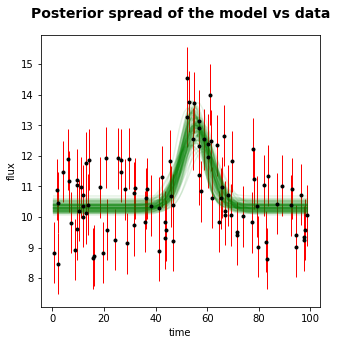

In [22]:
plt.rcParams['figure.figsize'] = [5, 5]
import random
random_samples = np.array(random.sample(samples_gaussian_equal.tolist(), k = 100))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.errorbar(time, flux, d_flux, fmt='.k', lw=1, ecolor='red')

xgrid = np.linspace(min(time), max(time), len(time))

[plt.plot(xgrid, gaussian(xgrid, rs), color = 'green', alpha = 0.1) for rs in (random_samples)];
plt.xlabel('time')
plt.ylabel('flux')
plt.title('Posterior spread of the model vs data',fontsize = 14, fontweight="bold",  y=1.04)